# Credit Card Fraud Detection: Capstone Project (BA)

## Section 1: Business Understanding 

### Project Pipeline: 


1. UNDERSTANDING DATA:
   
     - In this step, you need to load the data and understand the features present in it. This will help you choose the features that you need for your final model.

 
2. EXPLORATORY DATA ANALYTICS (EDA):
   
    - Normally, in this step, you need to perform univariate and bivariate analyses of the data, followed by feature transformations, if necessary. You can also check whether or not there is any skewness in the data and try to mitigate it, as skewed data can cause problems during the model-building phase.


3.  TRAIN/TEST DATA SPLITTING:
  
  - In this step, you need to split the data set into training data and testing data in order to check the performance of your models with unseen data. You can use the stratified k-fold cross-validation method at this stage. For this, you need to choose an appropriate k value such that the minority class is correctly represented in the test folds.


4.  MODEL BUILDING OR HYPERPARAMETER TUNING:
  
  - This is the final step, at which you can try different models and fine-tune their hyperparameters until you get the desired level of performance out of the model on the given data set. Ensure that you start with a baseline linear model before going towards ensembles. You should check if you can get a better performance out of the model by using various sampling techniques.

 
5.  MODEL EVALUATION:
   
     - Evaluate the performance of the models using appropriate evaluation metrics. Note that since the data is imbalanced, it is important to identify which transactions are fraudulent transactions more accurately than identifying non-fraudulent transactions. Choose an appropriate evaluation metric that reflects this business goal.


6.  BUSINESS IMPACT:
   
   - After the model has been built and evaluated with the appropriate metrics, you need to demonstrate its potential benefits by performing a cost-benefit analysis which can then be presented to the relevant business stakeholders.
   

### OBJECTIVE: 

    - This project requires us to analyse the business impact of the fradulent transactions from data downloaded from:
        https://www.kaggle.com/datasets/kartik2112/fraud-detection/data

    - Based on our analysis, we are to present Business Insight and Strategies to Bank for adopting Optimal ways to mitigate fraud risks by detecting fradulent transactions based on our Model Observations.


#### The steps can broadly be outlined below:

1. Reading and Understanding Data
2. Data Cleaning
3. Data Visualization
   - Univariate Analysis - Numerical - Categorical
   - Multivariate Analysis - Visualising Numerical - Numerical Variables - Visualising Categorical- Categorical Variables - Visualising Numerical - Categorical Variables
4. Preparing Data
5. Cost Benefit Analysis
6. Preparation for Data Modelling
   - Creating Dummy for few variables and using Label encoding for few variables
   - Splitting the Data into X & y
   - Test-Train Split
   - Checking for Class imbalance in Train & Test and treating it - SMOTE - ADASYN
7. Modelling:
   - Model 1: Decision Tree
   - Model 2: Random Forest
   - Model 3: XGBoost
8. Recommendations based on Cost Benefit Analysis to Business
   - Questions that needs to be answered:
    -  a. Cost incurred per month before the model was deployed?
    -  b. Average number of transactions per month detected as fraudulent by the model (TF)
    -  c. Cost of providing customer executive support per fraudulent transactions detected by the model
    -  d. Total Cost of providing customer executive support per fraudulent transactions detected by the model (TF*$1.5)
    -  e. Average number of transactions per month that are fraudulent but are not detected by the Model
    -  f. Cost incurred due to fraudulent transactions left undetected by the Model (FN*c)
    -  g. Cost Incurred per month after the model is built and deployed (d + f)
    -  h. Final Savings = Cost incurred before - Cost incurred after (a - g)
     

# Reading and Understanding Data

### 1. Train Dataset

 - Location: /home/anuragb/Downloads/archive/Capstone-6/fraudTrain.csv


####  - Import all the libraries needed for this project

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
sns.set_context("paper")
style.use('fivethirtyeight')
sns.set_theme()
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, RocCurveDisplay, roc_auc_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore")

/home/anuragb/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/anuragb/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/anuragb/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


#### - Reading the fraudTrain.csv Data

In [17]:
df_train = pd.read_csv(r"/home/anuragb/Downloads/archive/Capstone-6/fraudTrain.csv")
df_train

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  ...  \
0           Jennifer      Banks      F                 561 Perry Cove  ...   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393  ...   
2             Edward    Sanchez      M       594 White Dale Suite 530  ...   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038  ...   
4              Tyler     Garcia      M               408 Bradley Rest  ...   
...              ...        ...    ...                            ...  ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072  ...   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651  ...   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639  ...   
1296673       Joseph     Murray      M           42933 Ryan Underpass  ...   
1296674      Jeffrey      Smith      M           135 Joseph Mountains  ...   

             lat      long  city_pop                                job  \
0        36.0788  -81.1781      3495          Psychologist, counselling   
1        48.8878 -118.2105       149  Special educational needs teacher   
2        42.1808 -112.2620      4154        Nature conservation officer   
3        46.2306 -112.1138      1939                    Patent attorney   
4        38.4207  -79.4629        99     Dance movement psychotherapist   
...          ...       ...       ...                                ...   
1296670  37.7175 -112.4777       258                       Geoscientist   
1296671  39.2667  -77.5101       100   Production assistant, television   
1296672  32.9396 -105.8189       899                    Naval architect   
1296673  43.3526 -102.5411      1126              Volunteer coordinator   
1296674  45.8433 -113.8748       218           Therapist, horticultural   

                dob                         trans_num   unix_time  merch_lat  \
0        1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1        1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2        1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3        1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4        1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...             ...                          

##### - Inspecting fraud_train head

In [18]:
df_train.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

##### - Inspecting dataset for any null and duplicate values

In [19]:
df_train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [20]:
df_train.describe(include='all')

Unnamed: 0 trans_date_trans_time        cc_num           merchant  \
count   1.296675e+06               1296675  1.296675e+06            1296675   
unique           NaN               1274791           NaN                693   
top              NaN   2019-04-22 16:02:01           NaN  fraud_Kilback LLC   
freq             NaN                     4           NaN               4403   
mean    6.483370e+05                   NaN  4.171920e+17                NaN   
std     3.743180e+05                   NaN  1.308806e+18                NaN   
min     0.000000e+00                   NaN  6.041621e+10                NaN   
25%     3.241685e+05                   NaN  1.800429e+14                NaN   
50%     6.483370e+05                   NaN  3.521417e+15                NaN   
75%     9.725055e+05                   NaN  4.642255e+15                NaN   
max     1.296674e+06                   NaN  4.992346e+18                NaN   

             category           amt        first     last   gender  \
count         1296675  1.296675e+06      1296675  1296675  1296675   
unique             14           NaN          352      481        2   
top     gas_transport           NaN  Christopher    Smith        F   
freq           131659           NaN        26669    28794   709863   
mean              NaN  7.035104e+01          NaN      NaN      NaN   
std               NaN  1.603160e+02          NaN      NaN      NaN   
min               NaN  1.000000e+00          NaN      NaN      NaN   
25%               NaN  9.650000e+00          NaN      NaN      NaN   
50%               NaN  4.752000e+01          NaN      NaN      NaN   
75%               NaN  8.314000e+01          NaN      NaN      NaN   
max               NaN  2.894890e+04          NaN      NaN      NaN   

                            street  ...           lat          long  \
count                      1296675  ...  1.296675e+06  1.296675e+06   
unique                         983  ...           NaN           NaN   
top     0069 Robin Brooks Apt. 695  ...           NaN           NaN   
freq                          3123  ...           NaN           NaN   
mean                           NaN  ...  3.853762e+01 -9.022634e+01   
std                            NaN  ...  5.075808e+00  1.375908e+01   
min                            NaN  ...  2.002710e+01 -1.656723e+02   
25%                            NaN  ...  3.462050e+01 -9.679800e+01   
50%                            NaN  ...  3.935430e+01 -8.747690e+01   
75%                            NaN  ...  4.194040e+01 -8.015800e+01   
max                            NaN  ...  6.669330e+01 -6.795030e+01   

            city_pop                job         dob  \
count   1.296675e+06            1296675     1296675   
unique           NaN                494         968   
top              NaN  Film/video editor  1977-03-23   
freq             NaN               9779        5636   
mean    8.882444e+04                NaN         NaN   
std     3.019564e+05                NaN         NaN   
min     2.300000e+01                NaN         NaN   
25%     7.430000e+02                NaN         NaN   
50%     2.456000e+03                NaN         NaN   
75%     2.032800e+04                NaN         NaN   
max     2.906700e+06                NaN         NaN   

                               trans_num     unix_time     merch_lat  \
count                            1296675  1.296675e+06  1.296675e+06   
unique                           1296675           NaN           NaN   
top     0b242abb623afc578575680df30655b9           NaN           NaN   
freq                                   1           NaN           NaN   
mean                                 NaN  1.349244e+09  3.853734e+01   
std                                  NaN  1.284128e+07  5.109788e+00   
min                                  NaN  1.325376e+09  1.902779e+01   
25%                                  NaN  1.338751e+09  3.473357e+01   
50%                                  NaN  1.349250e+09  3.

In [21]:
df_train.shape

(1296675, 23)

In [22]:
sum(df_train.duplicated(subset = 'cc_num')) == 0

False

- No duplicate values
- No null values
- There are 1296675 rows and 23 columns in the data.

#### - Reading the fraudTrain.csv Data
 - Location: /home/anuragb/Downloads/archive/Capstone-6/fraudTest.csv

In [23]:
df_test = pd.read_csv(r"/home/anuragb/Downloads/archive/Capstone-6/fraudTest.csv")
df_test

Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28   Ashley   
3                          fraud_Haley Group        misc_pos   60.05    Brian   
4                      fraud_Johnston-Casper          travel    3.19   Nathan   
...                                      ...             ...     ...      ...   
555714                 fraud_Reilly and Sons  health_fitness   43.77  Michael   
555715                  fraud_Hoppe-Parisian       kids_pets  111.84     Jose   
555716                       fraud_Rau-Robel       kids_pets   86.88      Ann   
555717                 fraud_Breitenberg LLC          travel    7.99     Eric   
555718                     fraud_Dare-Marvin   entertainment   38.13   Samuel   

            last gender                       street  ...      lat      long  \
0        Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1       Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2          Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3       Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4         Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   
...          ...    ...                          ...  ...      ...       ...   
555714     Olson      M          558 Michael Estates  ...  40.4931  -91.8912   
555715   Vasquez      M          572 Davis Mountains  ...  29.0393  -95.4401   
555716    Lawson      F   144 Evans Islands Apt. 683  ...  46.1966 -118.9017   
555717   Preston      M   7020 Doyle Stream Apt. 951  ...  44.6255 -116.4493   
555718      Frey      M     830 Myers Plaza Apt. 384  ...  35.6665  -97.4798   

        city_pop                     job         dob  \
0         333497     Mechanical engineer  1968-03-19   
1            302  Sales professional, IT  1990-01-17   
2          34496       Librarian, public  1970-10-21   
3          54767            Set designer  1987-07-25   
4           1126      Furniture designer  1955-07-06   
...          ...                     ...         ...   
555714       519            Town planner  1966-02-13   
555715     28739          Futures trader  1999-12-27   
555716      3684                Musician  1981-11-29   
555717       129            Cartographer  1965-12-15   
555718    116001             Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1

##### - Inspecting fraud_test head

In [24]:
df_test.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob  \
0    333497     Mechanical engineer  1968-03-19   
1       302  Sales professional, IT  1990-01-17   
2     34496       Librarian, public  1970-10-21   
3     54767            Set designer  1987-07-25   
4      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

##### - Inspecting dataset for any null and duplicate values

In [25]:
df_test.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [26]:
df_test.describe(include='all')

Unnamed: 0 trans_date_trans_time        cc_num           merchant  \
count   555719.000000                555719  5.557190e+05             555719   
unique            NaN                544760           NaN                693   
top               NaN   2020-12-19 16:02:22           NaN  fraud_Kilback LLC   
freq              NaN                     4           NaN               1859   
mean    277859.000000                   NaN  4.178387e+17                NaN   
std     160422.401459                   NaN  1.309837e+18                NaN   
min          0.000000                   NaN  6.041621e+10                NaN   
25%     138929.500000                   NaN  1.800429e+14                NaN   
50%     277859.000000                   NaN  3.521417e+15                NaN   
75%     416788.500000                   NaN  4.635331e+15                NaN   
max     555718.000000                   NaN  4.992346e+18                NaN   

             category            amt        first    last  gender  \
count          555719  555719.000000       555719  555719  555719   
unique             14            NaN          341     471       2   
top     gas_transport            NaN  Christopher   Smith       F   
freq            56370            NaN        11443   12146  304886   
mean              NaN      69.392810          NaN     NaN     NaN   
std               NaN     156.745941          NaN     NaN     NaN   
min               NaN       1.000000          NaN     NaN     NaN   
25%               NaN       9.630000          NaN     NaN     NaN   
50%               NaN      47.290000          NaN     NaN     NaN   
75%               NaN      83.010000          NaN     NaN     NaN   
max               NaN   22768.110000          NaN     NaN     NaN   

                 street  ...            lat           long      city_pop  \
count            555719  ...  555719.000000  555719.000000  5.557190e+05   
unique              924  ...            NaN            NaN           NaN   
top     444 Robert Mews  ...            NaN            NaN           NaN   
freq               1474  ...            NaN            NaN           NaN   
mean                NaN  ...      38.543253     -90.231325  8.822189e+04   
std                 NaN  ...       5.061336      13.721780  3.003909e+05   
min                 NaN  ...      20.027100    -165.672300  2.300000e+01   
25%                 NaN  ...      34.668900     -96.798000  7.410000e+02   
50%                 NaN  ...      39.371600     -87.476900  2.408000e+03   
75%                 NaN  ...      41.894800     -80.175200  1.968500e+04   
max                 NaN  ...      65.689900     -67.950300  2.906700e+06   

                      job         dob                         trans_num  \
count              555719      555719                            555719   
unique                478         910                            555719   
top     Film/video editor  1977-03-23  2da90c7d74bd46a0caf3777415b3ebd3   
freq                 4119        2408                                 1   
mean                  NaN         NaN                               NaN   
std                   NaN         NaN                               NaN   
min                   NaN         NaN                               NaN   
25%                   NaN         NaN                               NaN   
50%                   NaN         NaN                               NaN   
75%                   NaN         NaN                               NaN   
max                   NaN         NaN                               NaN   

           unix_time      merch_lat     merch_long       is_fraud  
count   5.557190e+05  555719.000000  555719.000000  555719.000000  
unique           NaN            NaN            NaN            NaN  
top              NaN            NaN            NaN            NaN  
freq             NaN            NaN            NaN            NaN  
mean    1.380679e+09      38.542798     -90.231380       0.003860  

In [27]:
df_test.shape

(555719, 23)

In [28]:
sum(df_test.duplicated(subset = 'cc_num')) == 0

False

- No duplicate values
- No null values
- There are 555719 rows and 23 columns in the data.

### Concatenate fraud_train and fraud_test datasets

In [29]:
df_data = pd.concat([df_train, df_test])

In [30]:
df_data

Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2019-01-01 00:00:18  2703186189652095   
1                1   2019-01-01 00:00:44      630423337322   
2                2   2019-01-01 00:00:51    38859492057661   
3                3   2019-01-01 00:01:16  3534093764340240   
4                4   2019-01-01 00:03:06   375534208663984   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt      first  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge   entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist        misc_pos   41.96      Tyler   
...                                    ...             ...     ...        ...   
555714               fraud_Reilly and Sons  health_fitness   43.77    Michael   
555715                fraud_Hoppe-Parisian       kids_pets  111.84       Jose   
555716                     fraud_Rau-Robel       kids_pets   86.88        Ann   
555717               fraud_Breitenberg LLC          travel    7.99       Eric   
555718                   fraud_Dare-Marvin   entertainment   38.13     Samuel   

           last gender                        street  ...      lat      long  \
0         Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1          Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2       Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3         White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4        Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   
...         ...    ...                           ...  ...      ...       ...   
555714    Olson      M           558 Michael Estates  ...  40.4931  -91.8912   
555715  Vasquez      M           572 Davis Mountains  ...  29.0393  -95.4401   
555716   Lawson      F    144 Evans Islands Apt. 683  ...  46.1966 -118.9017   
555717  Preston      M    7020 Doyle Stream Apt. 951  ...  44.6255 -116.4493   
555718     Frey      M      830 Myers Plaza Apt. 384  ...  35.6665  -97.4798   

        city_pop                                job         dob  \
0           3495          Psychologist, counselling  1988-03-09   
1            149  Special educational needs teacher  1978-06-21   
2           4154        Nature conservation officer  1962-01-19   
3           1939                    Patent attorney  1967-01-12   
4             99     Dance movement psychotherapist  1986-03-28   
...          ...                                ...         ...   
555714       519                       Town planner  1966-02-13   
555715     28739                     Futures trader  1999-12-27   
555716      3684                           Musician  1981-11-29   
555717       129                       Cartographer  1965-12-15   
555718    116001                        Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                  ...         .

In [31]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [32]:
df_data.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [33]:
df_data.describe().transpose()

count          mean           std           min           25%  \
Unnamed: 0  1852394.0  5.371934e+05  3.669110e+05  0.000000e+00  2.315490e+05   
cc_num      1852394.0  4.173860e+17  1.309115e+18  6.041621e+10  1.800429e+14   
amt         1852394.0  7.006357e+01  1.592540e+02  1.000000e+00  9.640000e+00   
zip         1852394.0  4.881326e+04  2.688185e+04  1.257000e+03  2.623700e+04   
lat         1852394.0  3.853931e+01  5.071470e+00  2.002710e+01  3.466890e+01   
long        1852394.0 -9.022783e+01  1.374789e+01 -1.656723e+02 -9.679800e+01   
city_pop    1852394.0  8.864367e+04  3.014876e+05  2.300000e+01  7.410000e+02   
unix_time   1852394.0  1.358674e+09  1.819508e+07  1.325376e+09  1.343017e+09   
merch_lat   1852394.0  3.853898e+01  5.105604e+00  1.902742e+01  3.474012e+01   
merch_long  1852394.0 -9.022794e+01  1.375969e+01 -1.666716e+02 -9.689944e+01   
is_fraud    1852394.0  5.210015e-03  7.199217e-02  0.000000e+00  0.000000e+00   

                     50%           75%           max  
Unnamed: 0  4.630980e+05  8.335758e+05  1.296674e+06  
cc_num      3.521417e+15  4.642255e+15  4.992346e+18  
amt         4.745000e+01  8.310000e+01  2.894890e+04  
zip         4.817400e+04  7.204200e+04  9.992100e+04  
lat         3.935430e+01  4.194040e+01  6.669330e+01  
long       -8.747690e+01 -8.015800e+01 -6.795030e+01  
city_pop    2.443000e+03  2.032800e+04  2.906700e+06  
unix_time   1.357089e+09  1.374581e+09  1.388534e+09  
merch_lat   3.936890e+01  4.195626e+01  6.751027e+01  
merch_long -8.744069e+01 -8.024511e+01 -6.695090e+01  
is_fraud    0.000000e+00  0.000000e+00  1.000000e+00

#### - Correlation of all the data
        - there is much more no fraud records than fraud records
        - 'amt' is the largest correlated feature with data labelm

- There are 1852394 rows × 23 columns
- No duplicate values

In [34]:
print(round(100*(df_data.isnull().sum()/len(df_data.index)), 2))

Unnamed: 0               0.0
trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64


In [35]:
df_data.isnull().all(axis=0).any()

False

In [36]:
df_data.shape

(1852394, 23)

- There are no null values

##### Identifying columns which has only one unique value

In [37]:
print(df_data.nunique(dropna=False).sort_values())

is_fraud                       2
gender                         2
category                      14
state                         51
first                        355
last                         486
job                          497
merchant                     693
city_pop                     891
city                         906
lat                          983
long                         983
dob                          984
zip                          985
cc_num                       999
street                       999
amt                        60616
Unnamed: 0               1296675
merch_lat                1754157
merch_long               1809753
trans_date_trans_time    1819551
unix_time                1819583
trans_num                1852394
dtype: int64


- Unnamed: 0               1296675
    - Dropping this column

In [38]:
df_data= df_data.drop(['Unnamed: 0'],axis=1)

In [39]:
df_data.shape

(1852394, 22)

##### Checking for any null values:

In [40]:
df_data.isnull().all(axis=0).any()

False

##### Validating column Unnamed is deleted

In [41]:
print(df_data.nunique(dropna=False).sort_values())

is_fraud                       2
gender                         2
category                      14
state                         51
first                        355
last                         486
job                          497
merchant                     693
city_pop                     891
city                         906
lat                          983
long                         983
dob                          984
zip                          985
cc_num                       999
street                       999
amt                        60616
merch_lat                1754157
merch_long               1809753
trans_date_trans_time    1819551
unix_time                1819583
trans_num                1852394
dtype: int64


##### We also do not need 'First' and 'Last' name column in the given dataset.
        - deleting column 'first', 'last'

In [42]:
df_data= df_data.drop(['first'],axis=1)
df_data= df_data.drop(['last'],axis=1)

In [43]:
print(df_data.nunique(dropna=False).sort_values())

is_fraud                       2
gender                         2
category                      14
state                         51
job                          497
merchant                     693
city_pop                     891
city                         906
long                         983
lat                          983
dob                          984
zip                          985
street                       999
cc_num                       999
amt                        60616
merch_lat                1754157
merch_long               1809753
trans_date_trans_time    1819551
unix_time                1819583
trans_num                1852394
dtype: int64


In [44]:
df_data.shape

(1852394, 20)

#### Date and Time format of Column - trans_date_trans_time and dob(Date of Birth) to format - %Y-%m-%d

In [45]:
df_data['trans_date_trans_time'] = pd.to_datetime(df_data['trans_date_trans_time'], errors='coerce')
df_data['trans_date_trans_time'] = pd.to_datetime(df_data['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

In [46]:
df_data['dob'] = pd.to_datetime(df_data['dob'], errors='coerce')
df_data['dob'] = pd.to_datetime(df_data['dob'], format='%Y-%m-%d %H:%M:%S')

#### Adding Column trans_Date', 'trans_Time

In [47]:
df_data['trans_Date']=df_data.trans_date_trans_time.dt.date
df_data['trans_Time']=df_data.trans_date_trans_time.dt.time
df_data.trans_Date = pd.to_datetime(df_data['trans_Date'],format='%Y-%m-%d')

In [48]:
df_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip  ...  \
0                     561 Perry Cove  Moravian Falls    NC  28654  ...   
1       43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2           594 White Dale Suite 530      Malad City    ID  83252  ...   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                   408 Bradley Rest        Doe Hill    VA  24433  ...   
...                              ...             ...   ...    ...  ...   
555714           558 Michael Estates           Luray    MO  63453  ...   
555715           572 Davis Mountains    Lake Jackson    TX  77566  ...   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

        city_pop                                job        dob  \
0           3495          Psychologist, counselling 1988-03-09   
1            149  Special educational needs teacher 1978-06-21   
2           4154        Nature conservation officer 1962-01-19   
3           1939                    Patent attorney 1967-01-12   
4             99     Dance movement psychotherapist 1986-03-28   
...          ...                                ...        ...   
555714       519                       Town planner 1966-02-13   
555715     28739                     Futures trader 1999-12-27   
555716      3684                           Musician 1981-11-29   
555717       129                       Cartographer 1965-12-15   
555718    116001                        Media buyer 1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
555716  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054   
555717  1

In [49]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             float

In [50]:
grp_by_cc=df_data.groupby(['cc_num'])
fraudDf=pd.DataFrame(grp_by_cc['is_fraud'].nunique())
fraudDf.shape

(999, 1)

In [51]:
fraud_proportions = fraudDf['is_fraud'].value_counts(normalize = True) * 100

In [52]:
fraud_proportions

is_fraud
2    88.588589
1    11.411411
Name: proportion, dtype: float64

In [53]:
fraud_percentage = df_data['is_fraud'].value_counts() / len(df_data) * 100
fraud_percentage

is_fraud
0    99.478999
1     0.521001
Name: count, dtype: float64

#### 
    - A total of 999 Unique Credit card holders
    - 88.58% of card holders have been defrauded atleast once.
    - 99.47% of non-fraud transactions
    - 0.52% of fraudulant transactions

#### Graph representation of the above output is shown below:

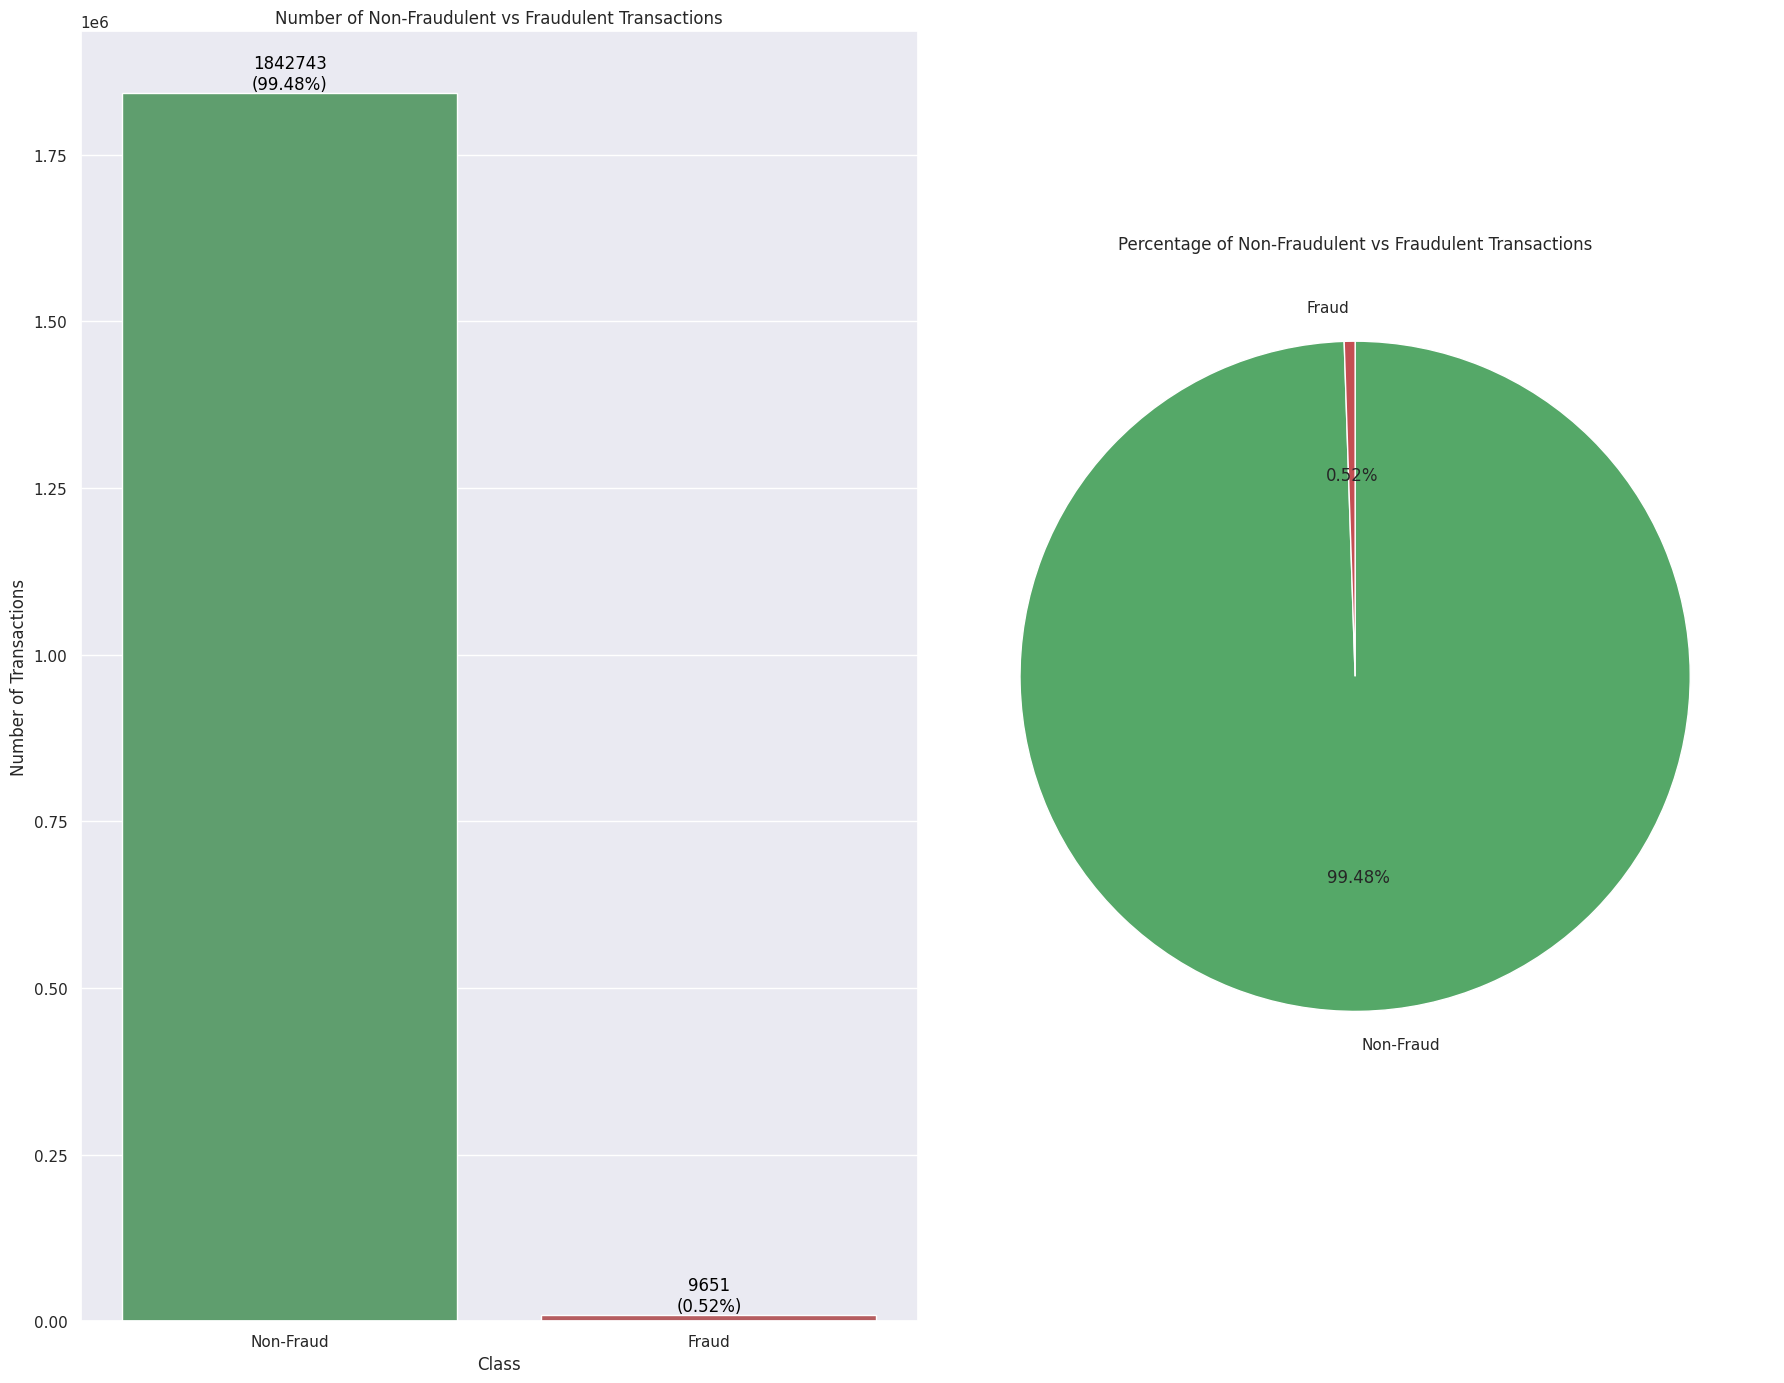

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(18, 14))
sns.barplot(x=['Non-Fraud', 'Fraud'], y=df_data['is_fraud'].value_counts(), palette=['g', 'r'], ax=axes[0])
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_title('Number of Non-Fraudulent vs Fraudulent Transactions')

for i, (count, percent) in enumerate(zip(df_data['is_fraud'].value_counts(), fraud_percentage)):
    axes[0].annotate(f'{count}\n({percent:.2f}%)', 
                     xy=(i, count), 
                     ha='center', 
                     va='bottom', 
                     fontsize=12, 
                     color='black')
axes[1].pie(df_data['is_fraud'].value_counts(), labels=['Non-Fraud', 'Fraud'], autopct='%1.2f%%', colors=['g', 'r'], startangle=90, counterclock=False)
axes[1].set_title('Percentage of Non-Fraudulent vs Fraudulent Transactions')
plt.tight_layout()
plt.show()

#####
    - Total Transactions = Number of Non-fraudulent Transactions + Number of Fraudulant Transactions
        - ie 1842743 + 9651 = 18,52,394
    - This dataset is imbalanced hence it needs to be handled before modelling

In [55]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             float

##### Checking the Skewness of following variables 'job', 'category', 'state', 'city'

In [56]:
df = df_data[['job', 'category', 'state', 'city']]
for c in df.columns:
    print("-----------------------------------------------------")
    print(f"---- {c} ---")
    print(df[c].value_counts(normalize=True))

-----------------------------------------------------
---- job ---
job
Film/video editor             0.007503
Exhibition designer           0.007108
Surveyor, land/geomatics      0.006713
Naval architect               0.006712
Materials engineer            0.006322
                                ...   
Veterinary surgeon            0.000004
Engineer, water               0.000004
Contracting civil engineer    0.000004
Ship broker                   0.000004
Warehouse manager             0.000004
Name: proportion, Length: 497, dtype: float64
-----------------------------------------------------
---- category ---
category
gas_transport     0.101506
grocery_pos       0.095115
home              0.094721
shopping_pos      0.089864
kids_pets         0.087307
shopping_net      0.075212
entertainment     0.072403
food_dining       0.070573
personal_care     0.070225
health_fitness    0.066159
misc_pos          0.061666
misc_net          0.048939
grocery_net       0.035024
travel            0.03

##### Binning of job column as it is having 497 unique values

In [57]:
df_data['job'].describe()

count               1852394
unique                  497
top       Film/video editor
freq                  13898
Name: job, dtype: object

In [58]:
df_data['job'][df_data['job'].str.contains('(Teacher|teacher|Lecturer|lecturer|Professor|professor)',regex=True)].value_counts()

job
Secondary school teacher                  8056
Early years teacher                       8041
Special educational needs teacher         7283
Teacher, special educational needs        6578
Further education lecturer                5865
English as a second language teacher      5837
Lecturer, further education               5130
Private music teacher                     5119
Lecturer, higher education                4404
Teacher, early years/pre                  3662
Teacher, secondary school                 3655
Teacher, primary school                   2194
Teacher, English as a foreign language    1469
TEFL teacher                               760
Primary school teacher                     737
English as a foreign language teacher      737
Teacher, adult education                   737
Professor Emeritus                         734
Associate Professor                        734
Name: count, dtype: int64

In [59]:

job_replacements = {
    'Teacher': ["Secondary school teacher","Early years teacher","TEFL teacher", "Special educational needs teacher",
                "Teacher, special educational needs", "Further education lecturer","English as a second language teacher",
                "Associate Professor", "Lecturer, further education","Private music teacher","Lecturer, higher education",
                "Teacher, early years/pre","Teacher, secondary school","Teacher, primary school",
                "Teacher, English as a foreign language","Primary school teacher","Professor Emeritus",
                "English as a foreign language teacher","Teacher, adult education"],
    
    'Engineer': ["Materials engineer","Mining engineer","Water engineer","Engineer, land", "Mechanical engineer",
                 "Engineer, automotive","Petroleum engineer","Energy engineer", "Chemical engineer","Engineer, biomedical",
                 "Drilling engineer","Electrical engineer", "Engineer, production","Engineer, control and instrumentation",
                 "Engineering geologist", "Structural engineer","Engineer, mining","Engineer, electronics","Site engineer",
                 "Geologist, engineering","Electronics engineer","Manufacturing engineer","Engineer, site", "Maintenance engineer",
                 "Engineer, petroleum","Communications engineer","Network engineer", "Civil engineer, contracting","Engineer, technical sales",
                 "Biomedical engineer", "Engineer, drilling","Aeronautical engineer","Production engineer","Engineer, maintenance",
                 "Engineer, agricultural","Engineer, civil (contracting)","Engineer, communications", "Building services engineer",
                 "Control and instrumentation engineer","Engineer, structural", "Engineer, building services","Manufacturing systems engineer",
                 "Engineer, aeronautical", "Engineer, broadcasting (operations)","Engineer, manufacturing","Broadcast engineer", 
                 "Engineer, civil (consulting)","Engineer, materials","Software engineer","Engineer, water", 'Contracting civil engineer'],
    
    'Scientist': ["Scientist, audiological","Audiological scientist","Data scientist", "Scientist, research (maths)","Geoscientist",
                  "Research scientist (physical sciences)", "Scientist, marine","Scientist, biomedical","Biomedical scientist",
                  "Product/process development scientist","Soil scientist","Scientist, physiological", "Research scientist (life sciences)",
                  "Scientist, research (physical sciences)", "Physiological scientist","Research scientist (maths)","Research scientist (medical)",
                  "Scientist, research (medical)","Water quality scientist", "Scientist, clinical (histocompatibility and immunogenetics)"],
    
    'Officer': ['Chief Executive Officer','Armed forces technical officer', 'Personnel officer','Information officer','Local government officer',
                "Police officer", 'Public relations officer','Education officer, community',"Tourism officer", 'Field trials officer','Charity officer',
                'Nature conservation officer', 'Environmental education officer',"Environmental education officer", "Museum education officer",
                "Medical technical officer","Chief Operating Officer", 'Race relations officer','Prison officer','Chief Strategy Officer',
                "Immigration officer", 'Probation officer','Exhibitions officer, museum/gallery','Fisheries officer', 'Research officer, trade union ',
                'Research officer, political party', "Historic buildings inspector/conservation officer","Trading standards officer", "Careers information officer",
                "Regulatory affairs officer","Human resources officer", "Armed forces training and education officer","Chief Technology Officer", 
                "Chief Financial Officer","Equality and diversity officer","Waste management officer", "Chief Marketing Officer","Museum/gallery exhibitions officer", 
                "Sports development officer","Arts development officer","Community education officer", "Emergency planning/management officer",
                "Armed forces logistics/support/administrative officer", "Conservation officer, historic buildings","Training and development officer", 
                "Social research officer, government",'Education officer, museum'],
    
    'Surveyor': ["Surveyor, land/geomatics","Building surveyor","Quantity surveyor", "Land/geomatics surveyor","Surveyor, minerals","Insurance risk surveyor",
                 "Commercial/residential surveyor","Building control surveyor","Surveyor, rural practice", "Planning and development surveyor","Surveyor, mining",
                 "Rural practice surveyor", "Hydrographic surveyor","Minerals surveyor","Surveyor, hydrographic"],
    
    'Designer': ["Exhibition designer","Designer, ceramics/pottery","Ceramics designer", "Designer, industrial/product","Designer, jewellery","Designer, exhibition/display",
                 "Designer, furniture","Web designer","Product designer","Glass blower/designer", "Furniture designer","Industrial/product designer","Set designer",
                 "Designer, textile", "Designer, interior/spatial","Jewellery designer","Designer, multimedia", "Designer, television/film set","Interior and spatial designer",
                 "Textile designer"],
    
    'Manager': ["Facilities manager","Travel agency manager","Call centre manager","Heritage manager","Production manager","Energy manager","Television floor manager",
                "Leisure centre manager","Tourist information centre manager","Farm manager","Fitness centre manager","Health service manager","Information systems manager",
                "Theme park manager","Pension scheme manager","Public house manager","Quarry manager","Records manager","Logistics and distribution manager","Location manager",
                "Theatre manager","Retail manager","Art gallery manager","Stage manager","Tour manager","Outdoor activities/education manager","Product manager","Hotel manager",
                "Restaurant manager, fast food","Purchasing manager","Catering manager","Environmental manager","Estate manager/land agent","Forest/woodland manager","Warehouse manager"],
    
    'Psychologist': ["Psychologist, forensic","Counselling psychologist", "Educational psychologist","Occupational psychologist","Forensic psychologist", "Psychologist, counselling",
                     "Sport and exercise psychologist", "Psychologist, sport and exercise","Psychologist, clinical","Clinical psychologist"],
    
    'Editor': ["Film/video editor","Magazine features editor","Editor, commissioning","Video editor","Editor, film/video","Editor, magazine features","Commissioning editor"],
    
    'Therapist': ["Psychotherapist, child","Therapist, occupational","Physiotherapist", "Child psychotherapist","Phytotherapist","Therapist, horticultural","Therapist, art", 
                  "Therapist, sports","Music therapist","Horticultural therapist","Art therapist", "Nutritional therapist","Dance movement psychotherapist","Psychotherapist", 
                  "Therapist, drama","Therapist, music","Occupational therapist"],
    
    'Nurse': ["Learning disability nurse","Nurse, children's","Paediatric nurse", "Mental health nurse","Psychiatric nurse","Nurse, mental health"],
    
    'Assistant': ["Television production assistant","Radio broadcast assistant","Politician's assistant","Production assistant, radio","Production assistant, television"],
    
    'Executive': ["Public relations account executive","Advertising account executive", "Sales executive","Chartered legal executive (England and Wales)", "Marketing executive","Sales promotion account executive"],
    
    'Librarian': ["Librarian, public","Librarian, academic","Public librarian","Academic librarian"],
    
    'Researcher': ["Social researcher","Programme researcher, broadcasting/film/video", "Market researcher","Operational researcher","Telecommunications researcher"],
    
    'Consultant': ["Environmental consultant","Agricultural consultant","IT consultant", "Pensions consultant","Public affairs consultant","Management consultant", "Horticultural consultant"],
    
    'Conservator': ["Museum/gallery conservator","Furniture conservator/restorer","Conservator, museum/gallery","Conservator, furniture"],
    
    'Banker': ["Investment banker, corporate","Corporate investment banker", "Retail banker","Investment banker, operational","Operational investment banker"],
    
    'Chemist': ["Geochemist","Clinical biochemist","Biochemist, clinical", "Chemist, analytical","Analytical chemist"],
    
    'Chartered Accountant': ["Chartered public finance accountant","Chartered accountant", "Accountant, chartered public finance","Accountant, chartered certified", "Accountant, chartered"],
    
    'Administrator': ["Administrator","Administrator, local government", "Administrator, education","Administrator, charities/voluntary organisations", "Database administrator","Secretary/administrator","Sports administrator", 
                      "Education administrator","Civil Service administrator","Administrator, arts"],
    
    'Writer': ["Copywriter, advertising","Science writer","Insurance underwriter", "Advertising copywriter","Writer"],
    
    'Doctor': ["Surgeon","Hospital doctor","Doctor, general practice","Doctor, hospital", "Tree surgeon","Neurosurgeon","Veterinary surgeon","General practice doctor"],
    
    'Buyer': ["Buyer, industrial","Media buyer","Retail buyer","Buyer, retail","Industrial buyer"],
    
    'Geneticist': ["Cytogeneticist","Plant breeder/geneticist","Geneticist, molecular","Clinical cytogeneticist"],
    
    'Pharmacist': ["Pharmacist, community","Community pharmacist","Pharmacist, hospital", "Hospital pharmacist"],
    
    'Physicist': ["Physicist, medical","Health physicist","Medical physicist", "Geophysicist/field seismologist"],
    
    'Analyst': ["Systems analyst","Risk analyst","Investment analyst","Intelligence analyst"],
    
    'Technologist': ["Clothing/textile technologist","Colour technologist","Animal technologist","Garment/textile technologist","Architectural technologist"],
    
    'Technician': ["Accounting technician","Scientific laboratory technician", "Teaching laboratory technician"],
    
    'Horticulturist': ['Amenity horticulturist','Commercial horticulturist','Horticulturist, commercial'],
    
    'Merchandiser': ['Retail merchandiser','Merchandiser, retail','Visual merchandiser'],
    
    'Cabin crew': ['Cabin crew','Air cabin crew']
}

# Function to replace job titles
def map_job_title(title):
    for category, titles in job_replacements.items():
        if title in titles:
            return category
    return title

# Apply the mapping
df_data['job'] = df_data['job'].map(map_job_title)

print(df_data)


       trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4             

In [60]:
df_data['job'].value_counts(normalize=True)

job
Engineer                0.107049
Officer                 0.082633
Manager                 0.047814
Scientist               0.047388
Designer                0.041880
                          ...   
Legal secretary         0.000006
Homeopath               0.000006
Solicitor               0.000006
Broadcast journalist    0.000005
Ship broker             0.000004
Name: proportion, Length: 179, dtype: float64

In [61]:
job_freqs = df_data.job.value_counts(normalize=True)

In [62]:
job_freqs.cumsum()

job
Engineer                0.107049
Officer                 0.189682
Manager                 0.237495
Scientist               0.284883
Designer                0.326764
                          ...   
Legal secretary         0.999979
Homeopath               0.999985
Solicitor               0.999991
Broadcast journalist    0.999996
Ship broker             1.000000
Name: proportion, Length: 179, dtype: float64

In [63]:
top_jobs = job_freqs.cumsum()[:91].index
top_jobs

Index(['Engineer', 'Officer', 'Manager', 'Scientist', 'Designer', 'Teacher',
       'Surveyor', 'Therapist', 'Psychologist', 'Editor', 'Consultant',
       'Doctor', 'Administrator', 'Writer', 'Researcher', 'Technologist',
       'Nurse', 'Librarian', 'Assistant', 'Chartered Accountant', 'Analyst',
       'Physicist', 'Buyer', 'Executive', 'Horticulturist', 'Naval architect',
       'Technician', 'Financial adviser', 'Systems developer', 'IT trainer',
       'Chemist', 'Geneticist', 'Podiatrist', 'Comptroller', 'Banker',
       'Paramedic', 'Sub', 'Musician', 'Barrister', 'Immunologist',
       'Pharmacist', 'Financial trader', 'Sales professional, IT',
       'Counsellor', 'Claims inspector/assessor', 'Make', 'Firefighter',
       'Merchandiser', 'Medical sales representative', 'Trade mark attorney',
       'Chartered loss adjuster', 'Dealer', 'Multimedia programmer',
       'Radio producer', 'Fine artist', 'Technical brewer', 'Toxicologist',
       'Conservator', 'Senior tax professi

In [64]:
df_data['job'].value_counts(normalize=True)

job
Engineer                0.107049
Officer                 0.082633
Manager                 0.047814
Scientist               0.047388
Designer                0.041880
                          ...   
Legal secretary         0.000006
Homeopath               0.000006
Solicitor               0.000006
Broadcast journalist    0.000005
Ship broker             0.000004
Name: proportion, Length: 179, dtype: float64

In [65]:
df_data['job'].describe()

count      1852394
unique         179
top       Engineer
freq        198297
Name: job, dtype: object

In [66]:
df_data.shape

(1852394, 22)

##### Keeping those unique values as it is which explains 90% of the variable job and merging other unique values into OTHERS

In [67]:
df_data['job'] = np.where(df_data.job.isin(top_jobs), df_data.job, 'OTHERS')

In [68]:
df_data['job'].describe()

count      1852394
unique          92
top       Engineer
freq        198297
Name: job, dtype: object

- Job variable unique values is reduced to 92 unique value

In [69]:
df_data['job'].value_counts(normalize=True)

job
Engineer                    0.107049
OTHERS                      0.104027
Officer                     0.082633
Manager                     0.047814
Scientist                   0.047388
                              ...   
Gaffer                      0.002373
Producer, radio             0.002372
Radiographer, diagnostic    0.002372
Music tutor                 0.002371
Journalist, newspaper       0.002369
Name: proportion, Length: 92, dtype: float64

In [70]:
df_data.shape

(1852394, 22)

In [71]:
df_data['state'].describe()

count     1852394
unique         51
top            TX
freq       135269
Name: state, dtype: object

In [72]:
df_data['state'].value_counts(normalize=True)

state
TX    0.073024
NY    0.064467
PA    0.061635
CA    0.043455
OH    0.035968
MI    0.035535
IL    0.033585
FL    0.032809
AL    0.031592
MO    0.029639
MN    0.024527
AR    0.024083
NC    0.023286
VA    0.022542
WI    0.022532
SC    0.022528
KY    0.022123
IN    0.021345
IA    0.020948
OK    0.020541
MD    0.020160
GA    0.020158
WV    0.019720
NJ    0.018965
NE    0.018584
KS    0.017782
MS    0.016207
LA    0.016170
WY    0.014995
WA    0.014597
OR    0.014256
TN    0.013449
ME    0.012650
NM    0.012647
ND    0.011435
CO    0.010671
SD    0.009487
MA    0.009481
VT    0.009076
MT    0.009073
AZ    0.008293
UT    0.008290
NH    0.006331
CT    0.005927
NV    0.004350
ID    0.004338
DC    0.002769
HI    0.001970
AK    0.001600
RI    0.000402
DE    0.000005
Name: proportion, dtype: float64

### Binning State Column

- State column has 51 unique values
- US is often divided into geographical regions.
- Using these regions, we will be dividing them into FOUR different regions:
    - North-East
    - South
    - Midwest
    - West

In [73]:
def label_states(row):
    northeast_states = ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
    midwest_states = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']
    south_states = ['AL', 'AR', 'DE', 'DC', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV']
    
    if row['state'] in northeast_states:
        return 'Northeast'
    elif row['state'] in midwest_states:
        return 'Midwest'
    elif row['state'] in south_states:
        return 'South'
    else:
        return 'West'

In [74]:
# Apply the label_states function to create the 'state_bin' column
df_data['state_bin'] = df_data.apply(lambda row: label_states(row), axis=1)

# Display the modified DataFrame
print(df_data)

       trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4             

In [75]:
df_data['state_bin'].describe()

count     1852394
unique          4
top         South
freq       706068
Name: state_bin, dtype: object

- State variable unique values is reduced to 4 unique value

In [76]:
df_data['state_bin'].value_counts(normalize=True)

state_bin
South        0.381165
Midwest      0.281367
Northeast    0.188934
West         0.148533
Name: proportion, dtype: float64

In [77]:
df_data.shape

(1852394, 23)

- Cleaning the data
- Data-type changes of columns
- Binning applied on state and job column
- Left with 1852394 rows and 23 columns

### Exploratory Data Analysis

    - If there is some obvious multicollinearity going on, this is the first place to catch it
    - Here we will also identify if some predictors directly have a strong association with the outcome variable

#### Checking the coorelations between the variables

In [78]:
numeric_df = df_data.select_dtypes(include=['float64', 'int64'])
cor = numeric_df.corr()
cor

cc_num       amt       zip       lat      long  city_pop  \
cc_num      1.000000  0.001826  0.041504 -0.058744 -0.048429 -0.009118   
amt         0.001826  1.000000  0.001979 -0.000670 -0.000735  0.004921   
zip         0.041504  0.001979  1.000000 -0.114554 -0.909795  0.077601   
lat        -0.058744 -0.000670 -0.114554  1.000000 -0.014744 -0.154816   
long       -0.048429 -0.000735 -0.909795 -0.014744  1.000000 -0.052359   
city_pop   -0.009118  0.004921  0.077601 -0.154816 -0.052359  1.000000   
unix_time   0.000284 -0.002411  0.001017  0.000741 -0.000574 -0.001636   
merch_lat  -0.058415 -0.000613 -0.113934  0.993582 -0.014585 -0.153863   
merch_long -0.048421 -0.000711 -0.908981 -0.014709  0.999118 -0.052329   
is_fraud   -0.001125  0.209308 -0.002190  0.002904  0.001022  0.000325   

            unix_time  merch_lat  merch_long  is_fraud  
cc_num       0.000284  -0.058415   -0.048421 -0.001125  
amt         -0.002411  -0.000613   -0.000711  0.209308  
zip          0.001017  -0.113934   -0.908981 -0.002190  
lat          0.000741   0.993582   -0.014709  0.002904  
long        -0.000574  -0.014585    0.999118  0.001022  
city_pop    -0.001636  -0.153863   -0.052329  0.000325  
unix_time    1.000000   0.000696   -0.000571 -0.013329  
merch_lat    0.000696   1.000000   -0.014554  0.002778  
merch_long  -0.000571  -0.014554    1.000000  0.000999  
is_fraud    -0.013329   0.002778    0.000999  1.000000

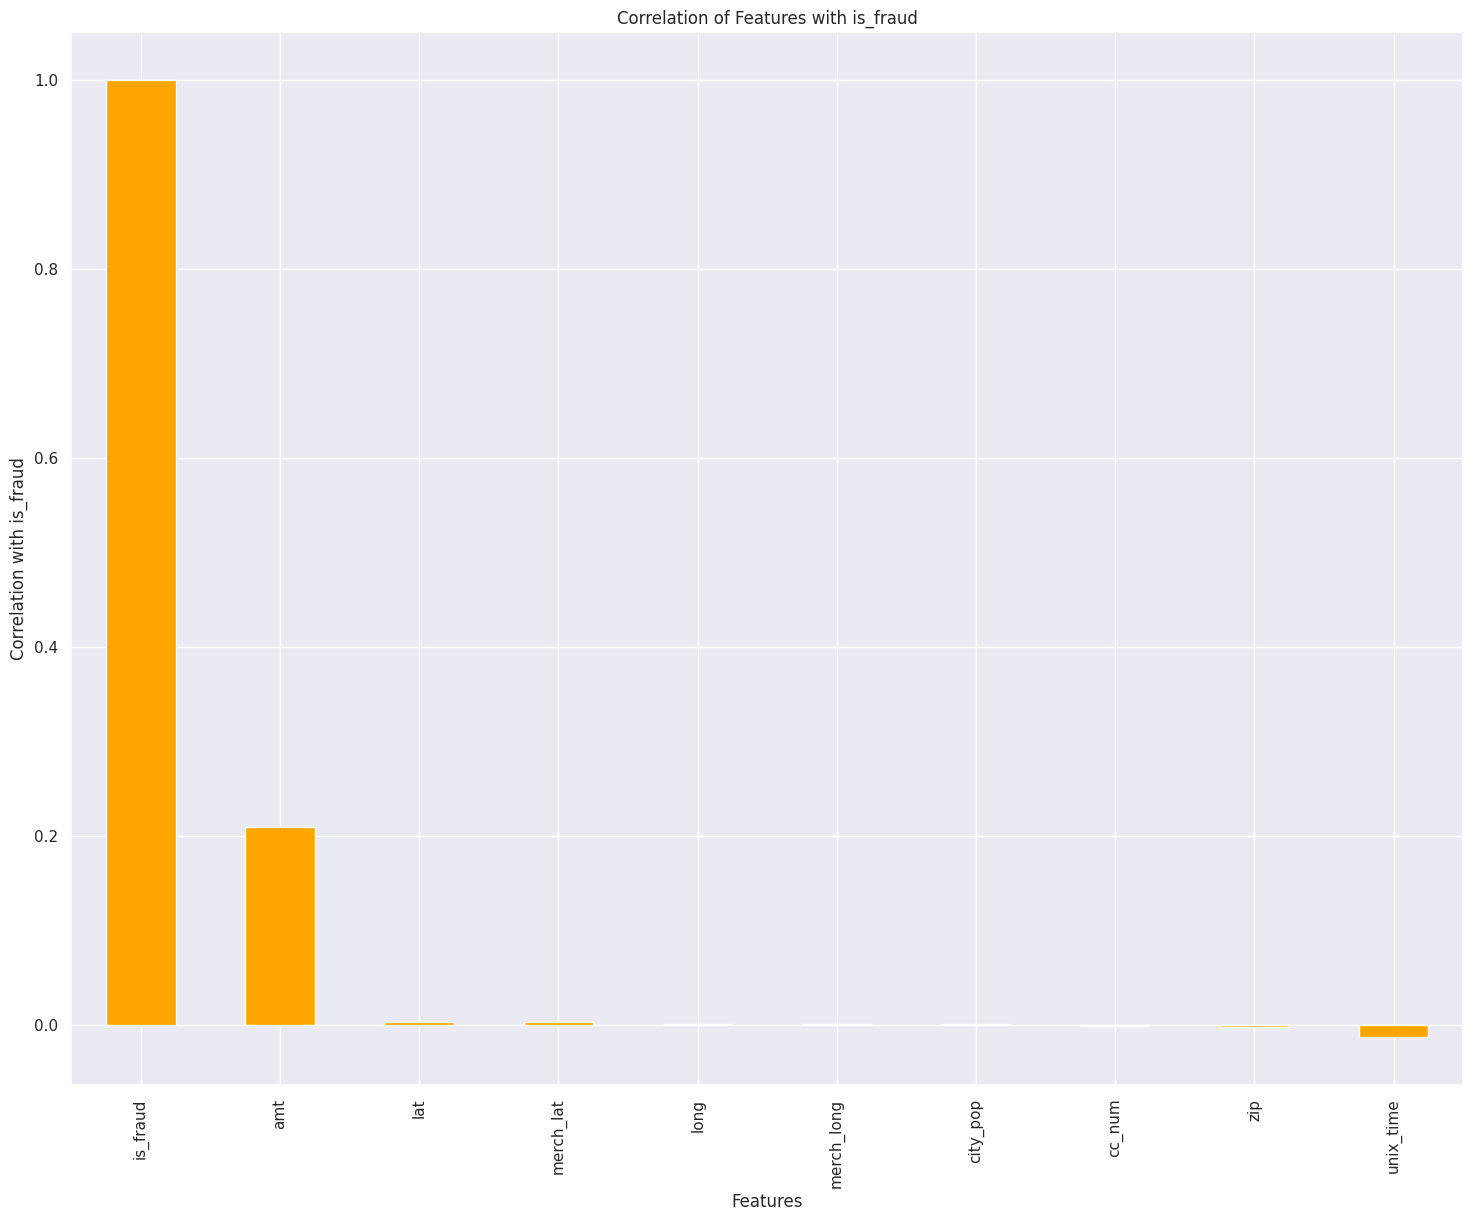

In [79]:
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
cor = numeric_df.corr()

# Plot the correlation of each column with 'is_fraud'
plt.figure(figsize=(16, 13))
cor['is_fraud'].sort_values(ascending=False).plot(kind='bar', color='orange')
plt.xlabel('Features')
plt.ylabel('Correlation with is_fraud')
plt.title('Correlation of Features with is_fraud')
plt.show()

- 'amt', 'unix_time' are positively correlated with 'is_fraud'.

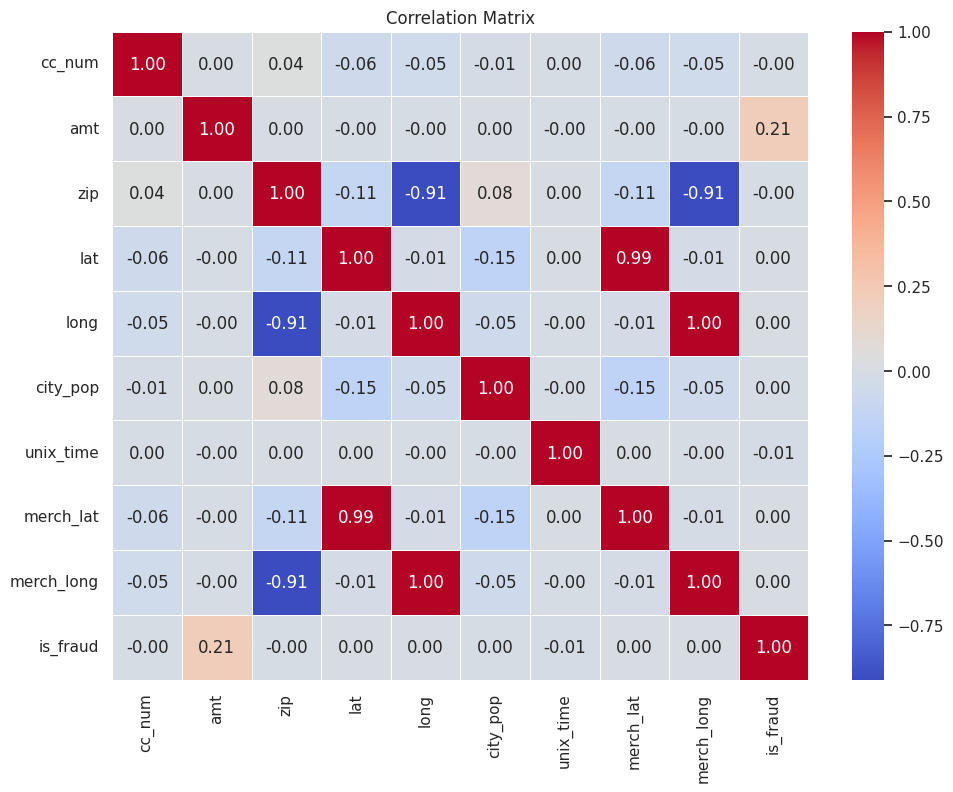

In [80]:
# Select only numeric columns
numeric_df = df_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
cor_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- zip, merch_long & zip, long & merch_lat and lat are highly correlated variables
- zip and long >= -0.75
- merch_long and zip >= -0.75
- merch_lat and lat= 1

In [81]:
df_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip  ...  \
0                     561 Perry Cove  Moravian Falls    NC  28654  ...   
1       43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2           594 White Dale Suite 530      Malad City    ID  83252  ...   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                   408 Bradley Rest        Doe Hill    VA  24433  ...   
...                              ...             ...   ...    ...  ...   
555714           558 Michael Estates           Luray    MO  63453  ...   
555715           572 Davis Mountains    Lake Jackson    TX  77566  ...   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

                   job        dob                         trans_num  \
0         Psychologist 1988-03-09  0b242abb623afc578575680df30655b9   
1              Teacher 1978-06-21  1f76529f8574734946361c461b024d99   
2              Officer 1962-01-19  a1a22d70485983eac12b5b88dad1cf95   
3               OTHERS 1967-01-12  6b849c168bdad6f867558c3793159a81   
4            Therapist 1986-03-28  a41d7549acf90789359a9aa5346dcb46   
...                ...        ...                               ...   
555714    Town planner 1966-02-13  9b1f753c79894c9f4b71f04581835ada   
555715  Futures trader 1999-12-27  2090647dac2c89a1d86c514c427f5b91   
555716        Musician 1981-11-29  6c5b7c8add471975aa0fec023b2e8408   
555717          OTHERS 1965-12-15  14392d723bb7737606b2700ac791b7aa   
555718           Buyer 1993-05-10  1765bb45b3aa3224b4cdcb6e7a96cee3   

         unix_time  merch_lat  merch_long  is_fraud  trans_Date  trans_Time  \
0       1325376018  36.011293  -82.048315         0  2019-01-01    00:00:18   
1       1325376044  49.159047 -118.186462         0  2019-01-01    00:00:44   
2       1325376051  43.150704 -112.154481         0  2019-01-01    00:00:51   
3       1325376076  47.034331 -112.561071         0  2019-01-01    00:01:16   
4       1325376186  38.674999  -78.632459         0  2019-01-01    00:03:06   
...            ...        ...         ...       ...         ...         ...   
555714  1388534347  39.946837  -91.333331         0  2020-12-31    23:59:07   
555715  1388534349  29.661049  -96.186633         0  2020-12-31    23:59:09   
555716  1388534355  46.65834

In [82]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             float

### Univariate Analysis - Numerical Variables

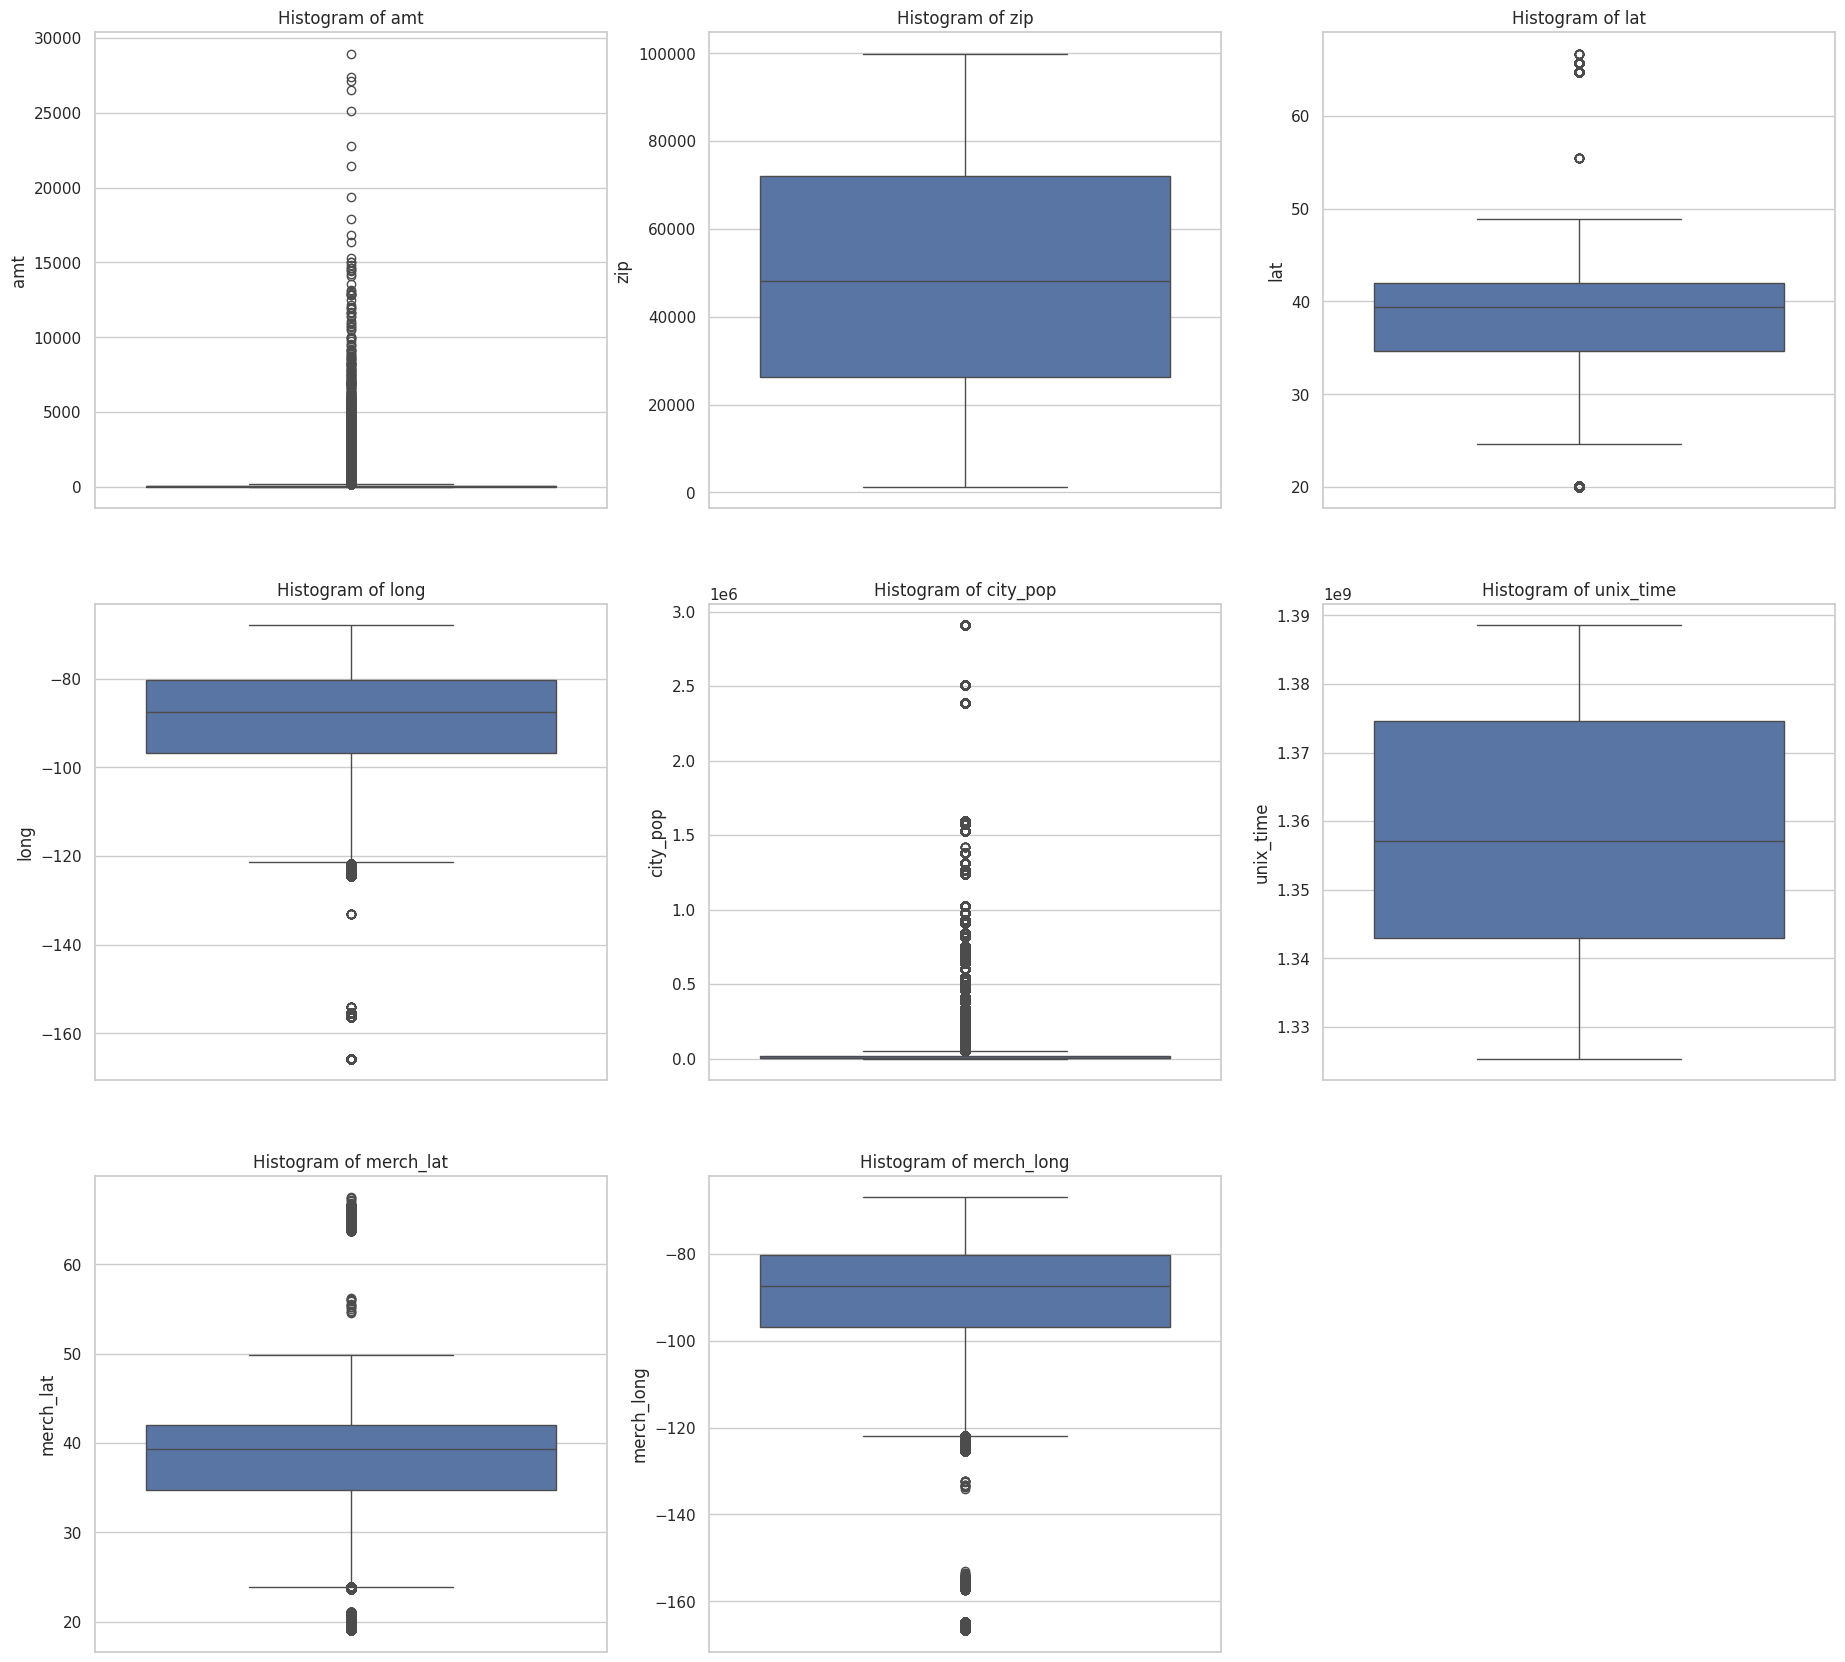

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.boxplot(df_data[column].dropna(), ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].tick_params(axis='x', rotation=90)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


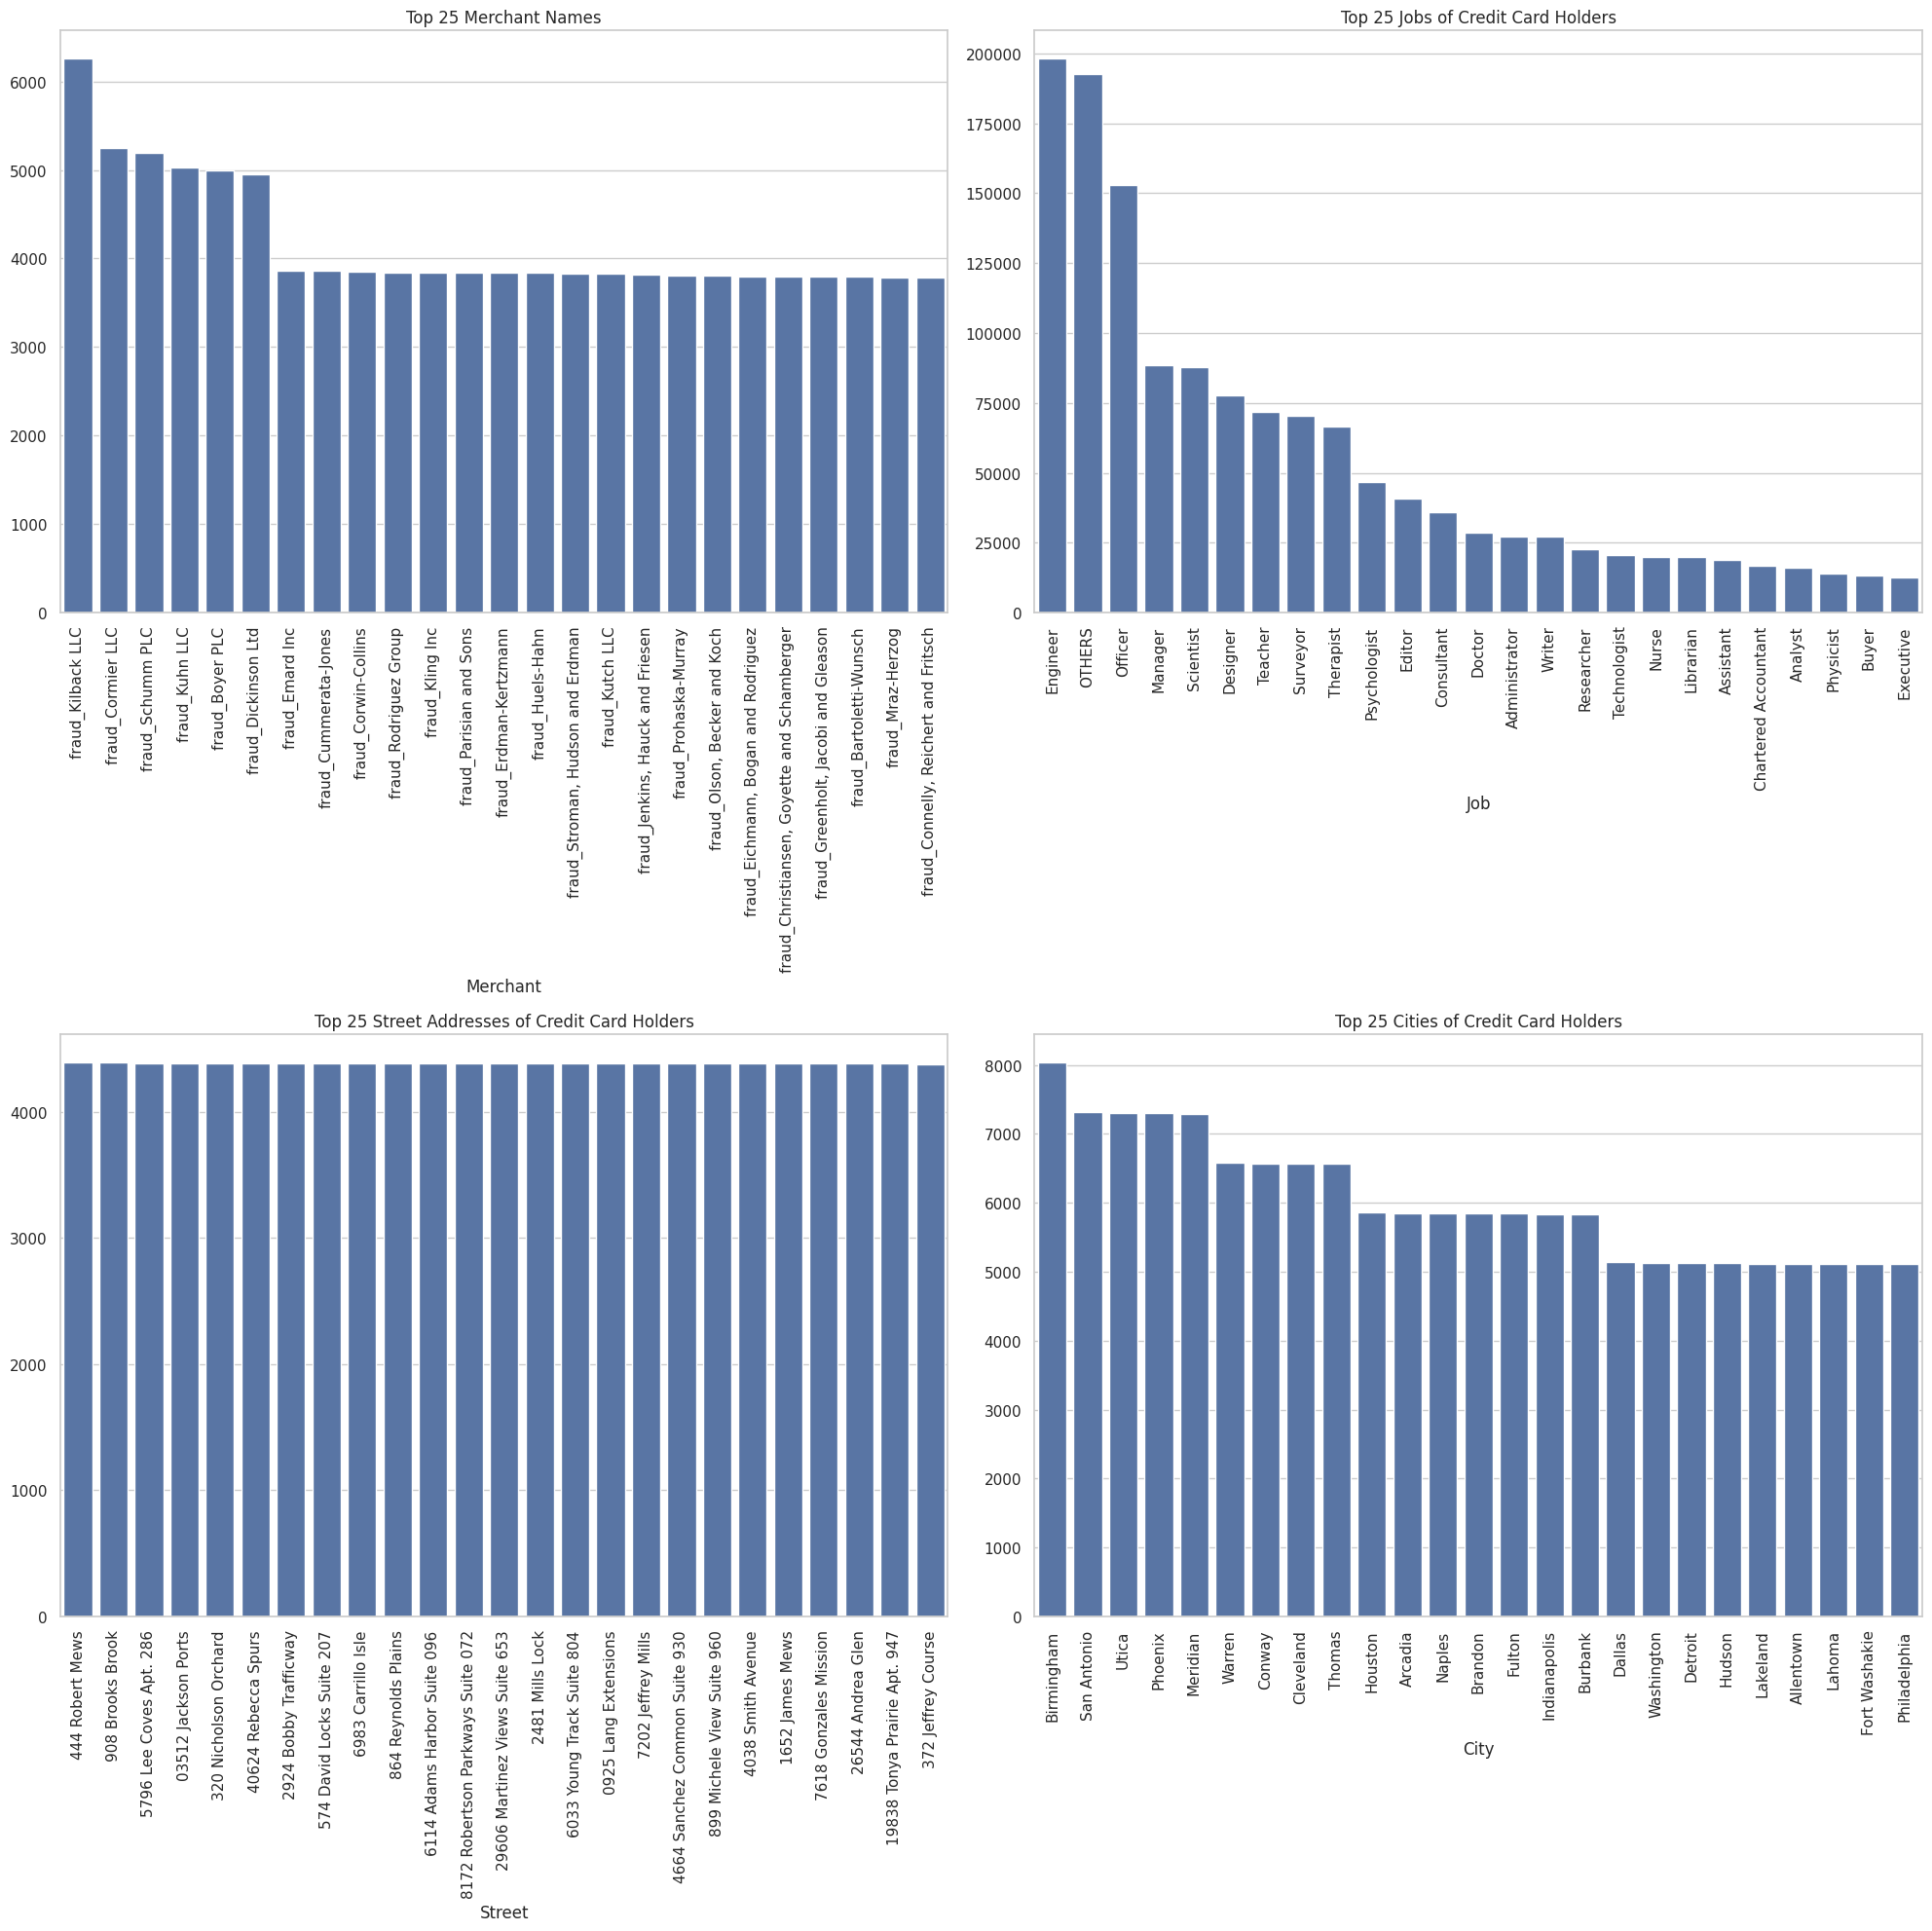

In [84]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with a specified size
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Plot the top 25 merchant names
sns.barplot(x=df_data['merchant'].value_counts().head(25).index,
            y=df_data['merchant'].value_counts().head(25).values,
            ax=axes[0, 0])
axes[0, 0].set_xlabel('Merchant')
axes[0, 0].set_title('Top 25 Merchant Names')
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot the top 25 jobs of credit card holders
sns.barplot(x=df_data['job'].value_counts().head(25).index,
            y=df_data['job'].value_counts().head(25).values,
            ax=axes[0, 1])
axes[0, 1].set_xlabel('Job')
axes[0, 1].set_title('Top 25 Jobs of Credit Card Holders')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot the top 25 street addresses of credit card holders
sns.barplot(x=df_data['street'].value_counts().head(25).index,
            y=df_data['street'].value_counts().head(25).values,
            ax=axes[1, 0])
axes[1, 0].set_xlabel('Street')
axes[1, 0].set_title('Top 25 Street Addresses of Credit Card Holders')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot the top 25 cities of credit card holders
sns.barplot(x=df_data['city'].value_counts().head(25).index,
            y=df_data['city'].value_counts().head(25).values,
            ax=axes[1, 1])
axes[1, 1].set_xlabel('City')
axes[1, 1].set_title('Top 25 Cities of Credit Card Holders')
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust the layout to avoid overlap
fig.tight_layout()

# Display the plots
plt.show()

- Above graph shows Top 25 Merchant Names, Jobs of Credit Card Holder, Street Address of Credit Card Holder, City of Credit Card Holder.

#### Univariate Analysis - Categorical Variables

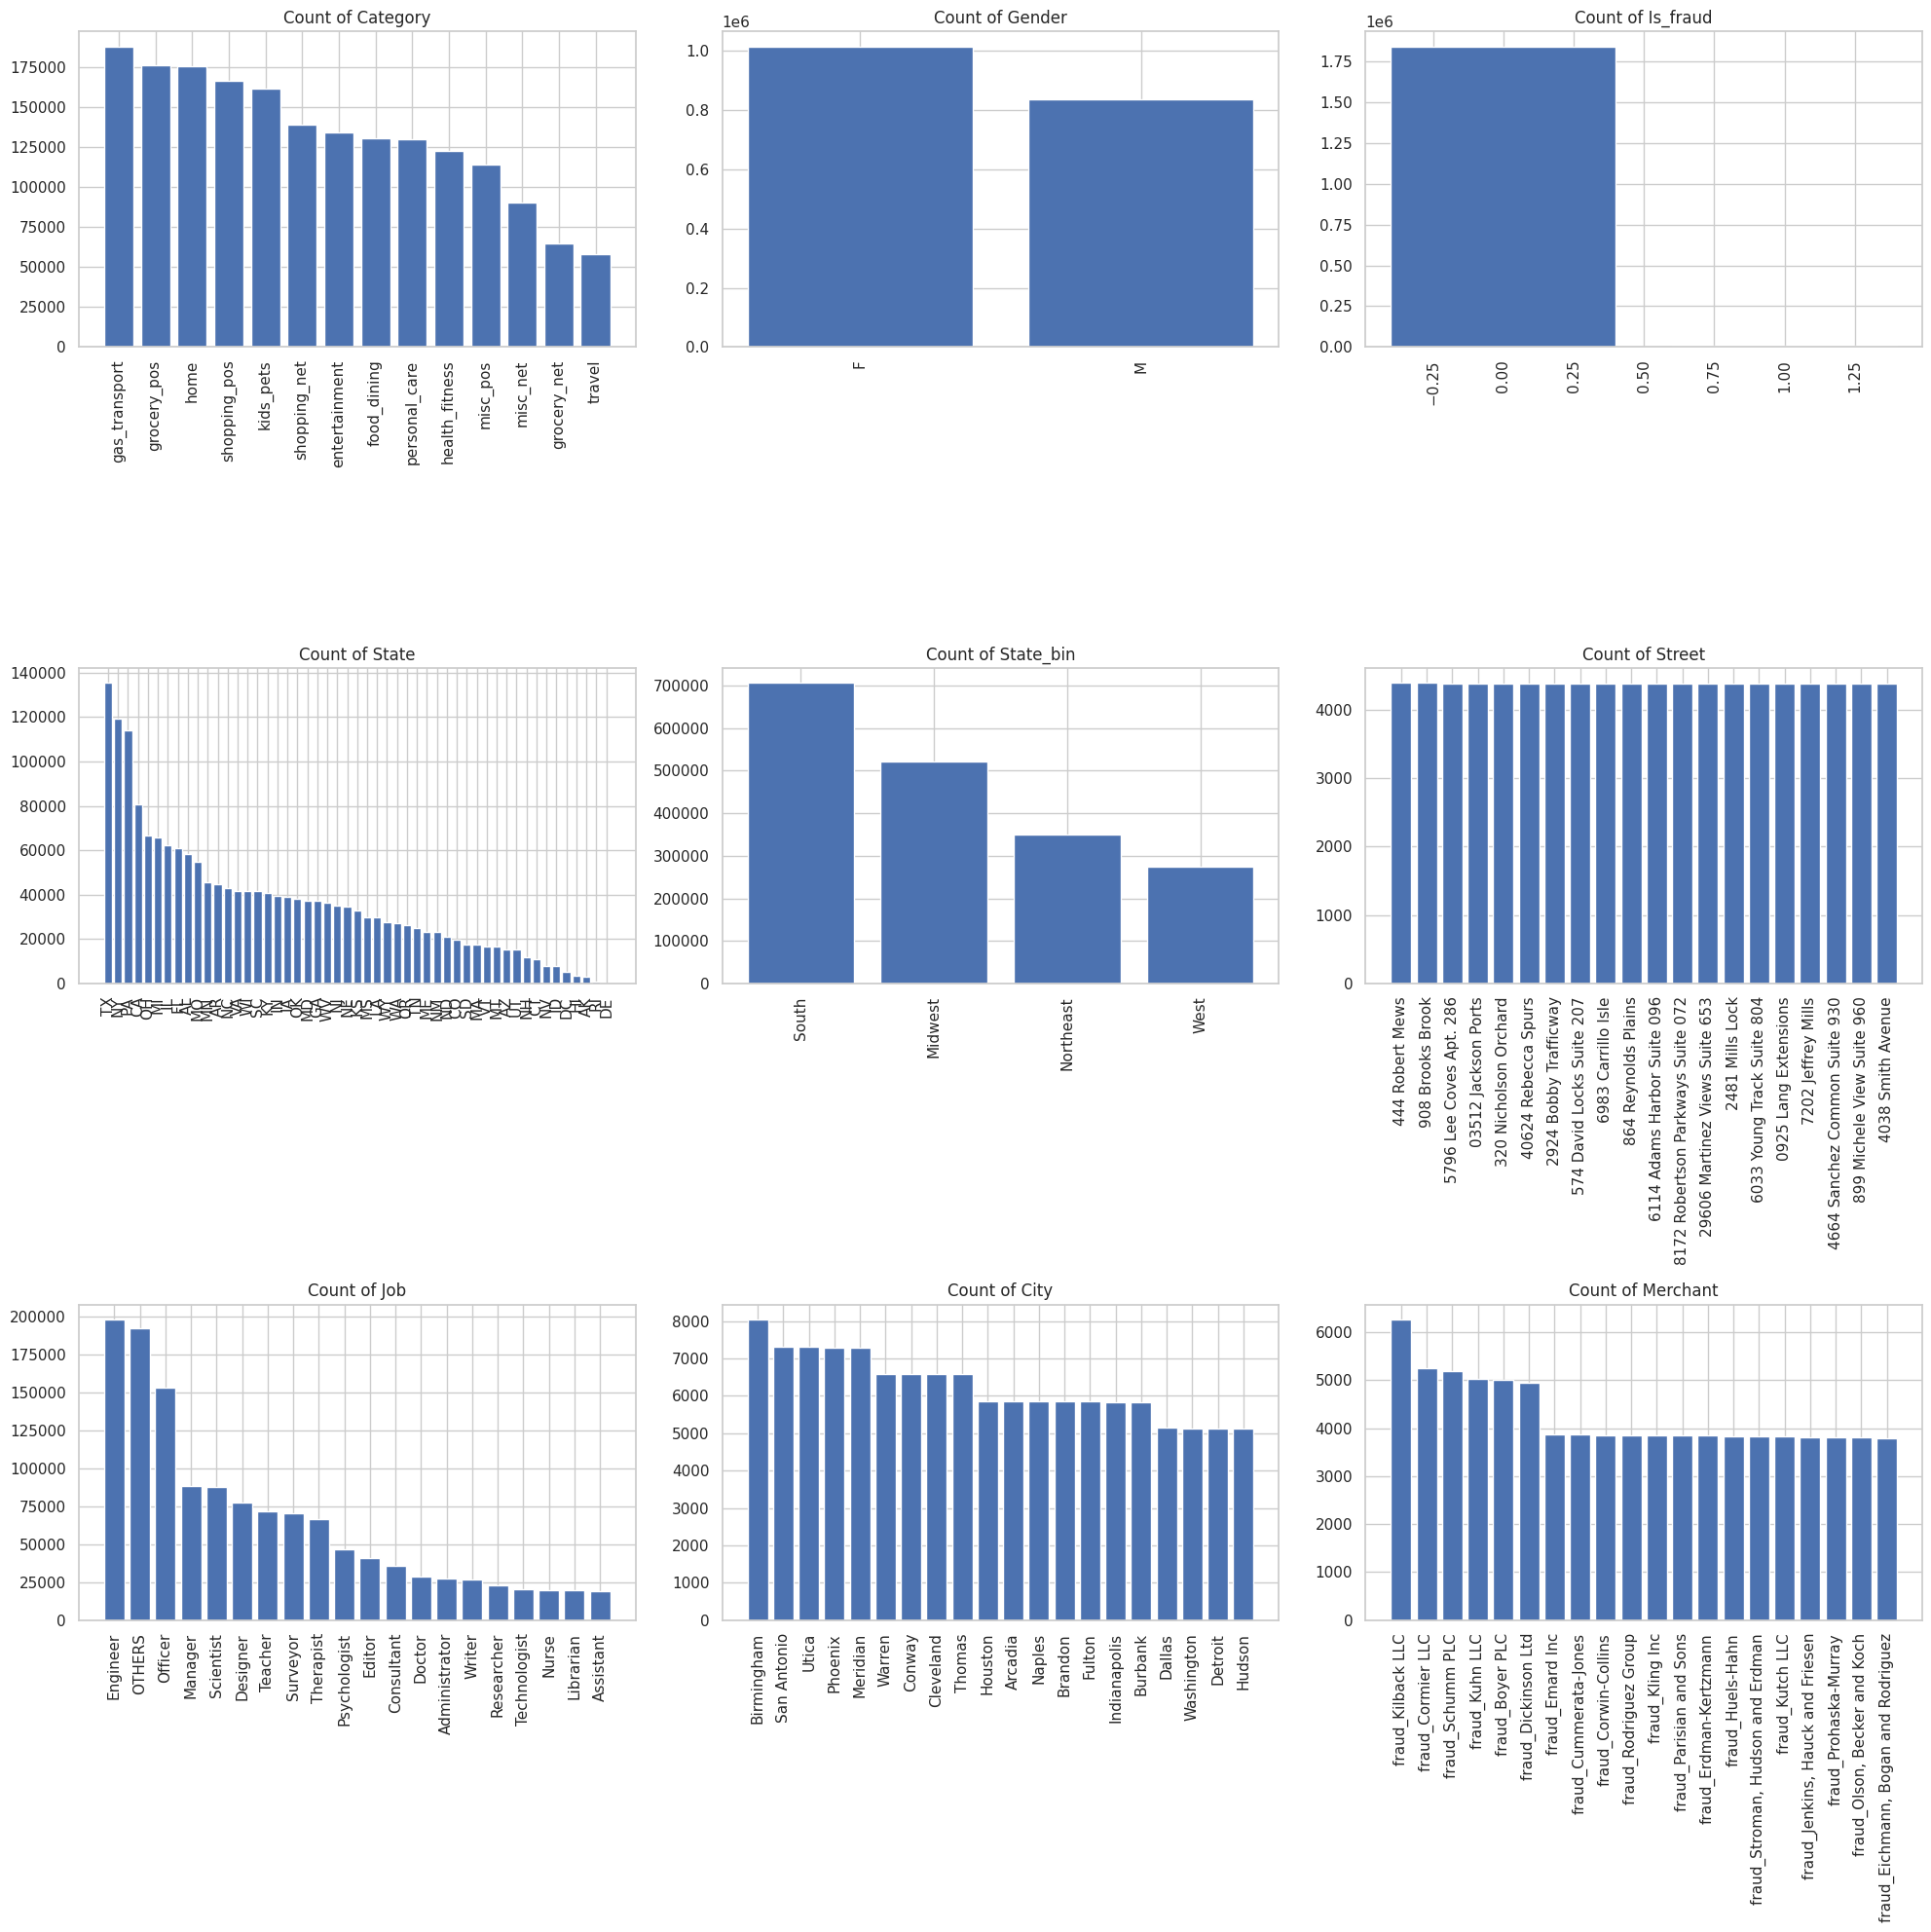

In [85]:
# Create a figure with a specified size
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# List of columns to plot
columns = ['category', 'gender', 'is_fraud', 'state', 'state_bin', 'street', 'job', 'city', 'merchant']

# Custom orders for specific columns
order = {
    "street": df_data.street.value_counts().iloc[:20].index,
    "job": df_data.job.value_counts().iloc[:20].index,
    "city": df_data.city.value_counts().iloc[:20].index,
    "merchant": df_data.merchant.value_counts().iloc[:20].index
}

# Plotting each column
for i, column in enumerate(columns):
    ax = axes.flatten()[i]
    if column in order:
        ax.bar(order[column], df_data[column].value_counts()[order[column]])
    else:
        ax.bar(df_data[column].value_counts().index, df_data[column].value_counts())
    ax.set_title(f'Count of {column.capitalize()}')
    ax.tick_params(axis='x', rotation=90)

# Adjust the layout to avoid overlap
fig.tight_layout()

# Display the plots
plt.show()

- The above plot shows:
- 
        --The count of transaction based on categorical varibales i.e category, is_fraud,gender, state, state_bin.
        --The count of transaction in top 25 of street, job, city, merchant.

### Multivariate Analysis

#### Multivariate Analysis- Categorical Variables

In [86]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             float

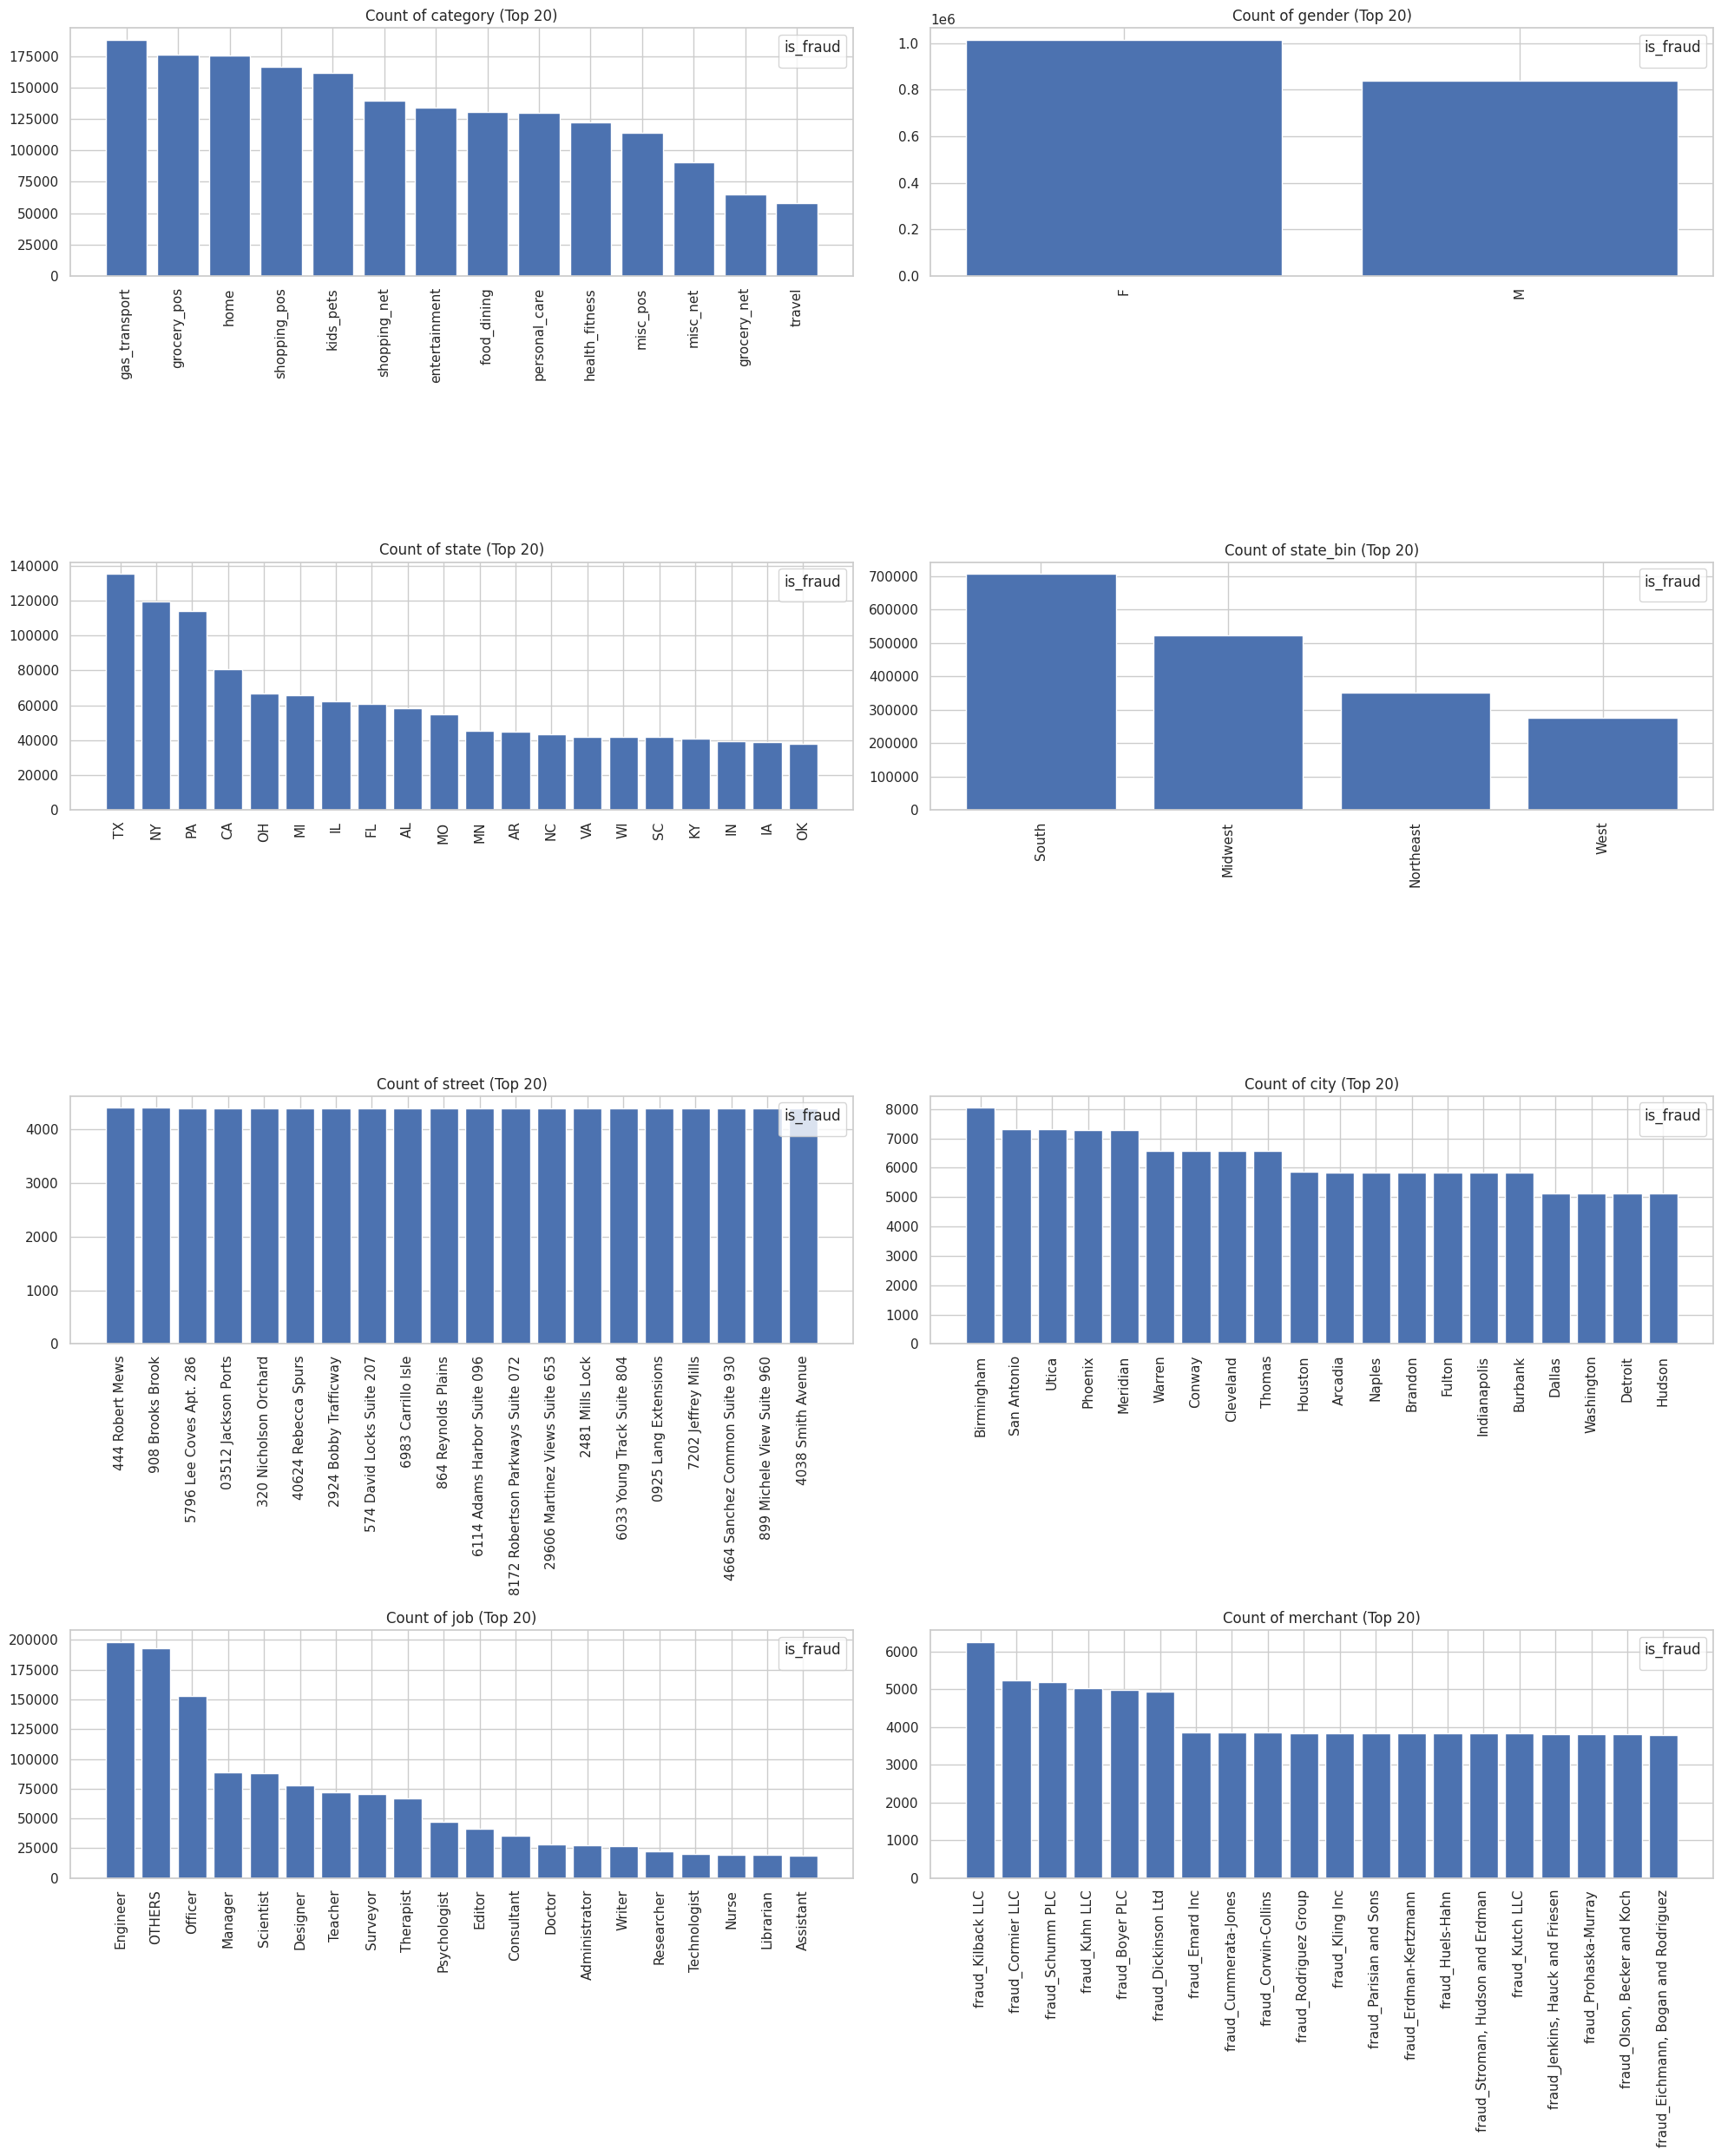

In [87]:

# Define the columns and subplot dimensions
columns = ["category", "gender", "state", "state_bin", "street", "city", "job", "merchant"]
rows, cols = 4, 2

# Create the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(20, 25))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through the columns and create subplots
for i, column in enumerate(columns):
    counts = df_data[column].value_counts().iloc[:20]
    ax = axes[i]
    ax.bar(counts.index, counts.values)
    ax.set_xticklabels(counts.index, rotation=90)
    ax.set_title(f"Count of {column} (Top 20)")
    ax.legend(title="is_fraud", loc="upper right")

# Hide any unused subplots
for j in range(len(columns), len(axes)):
    axes[j].axis("off")

# Adjust layout and display
plt.tight_layout()
plt.show()

##### Multivariate Analysis- Numerical Variables

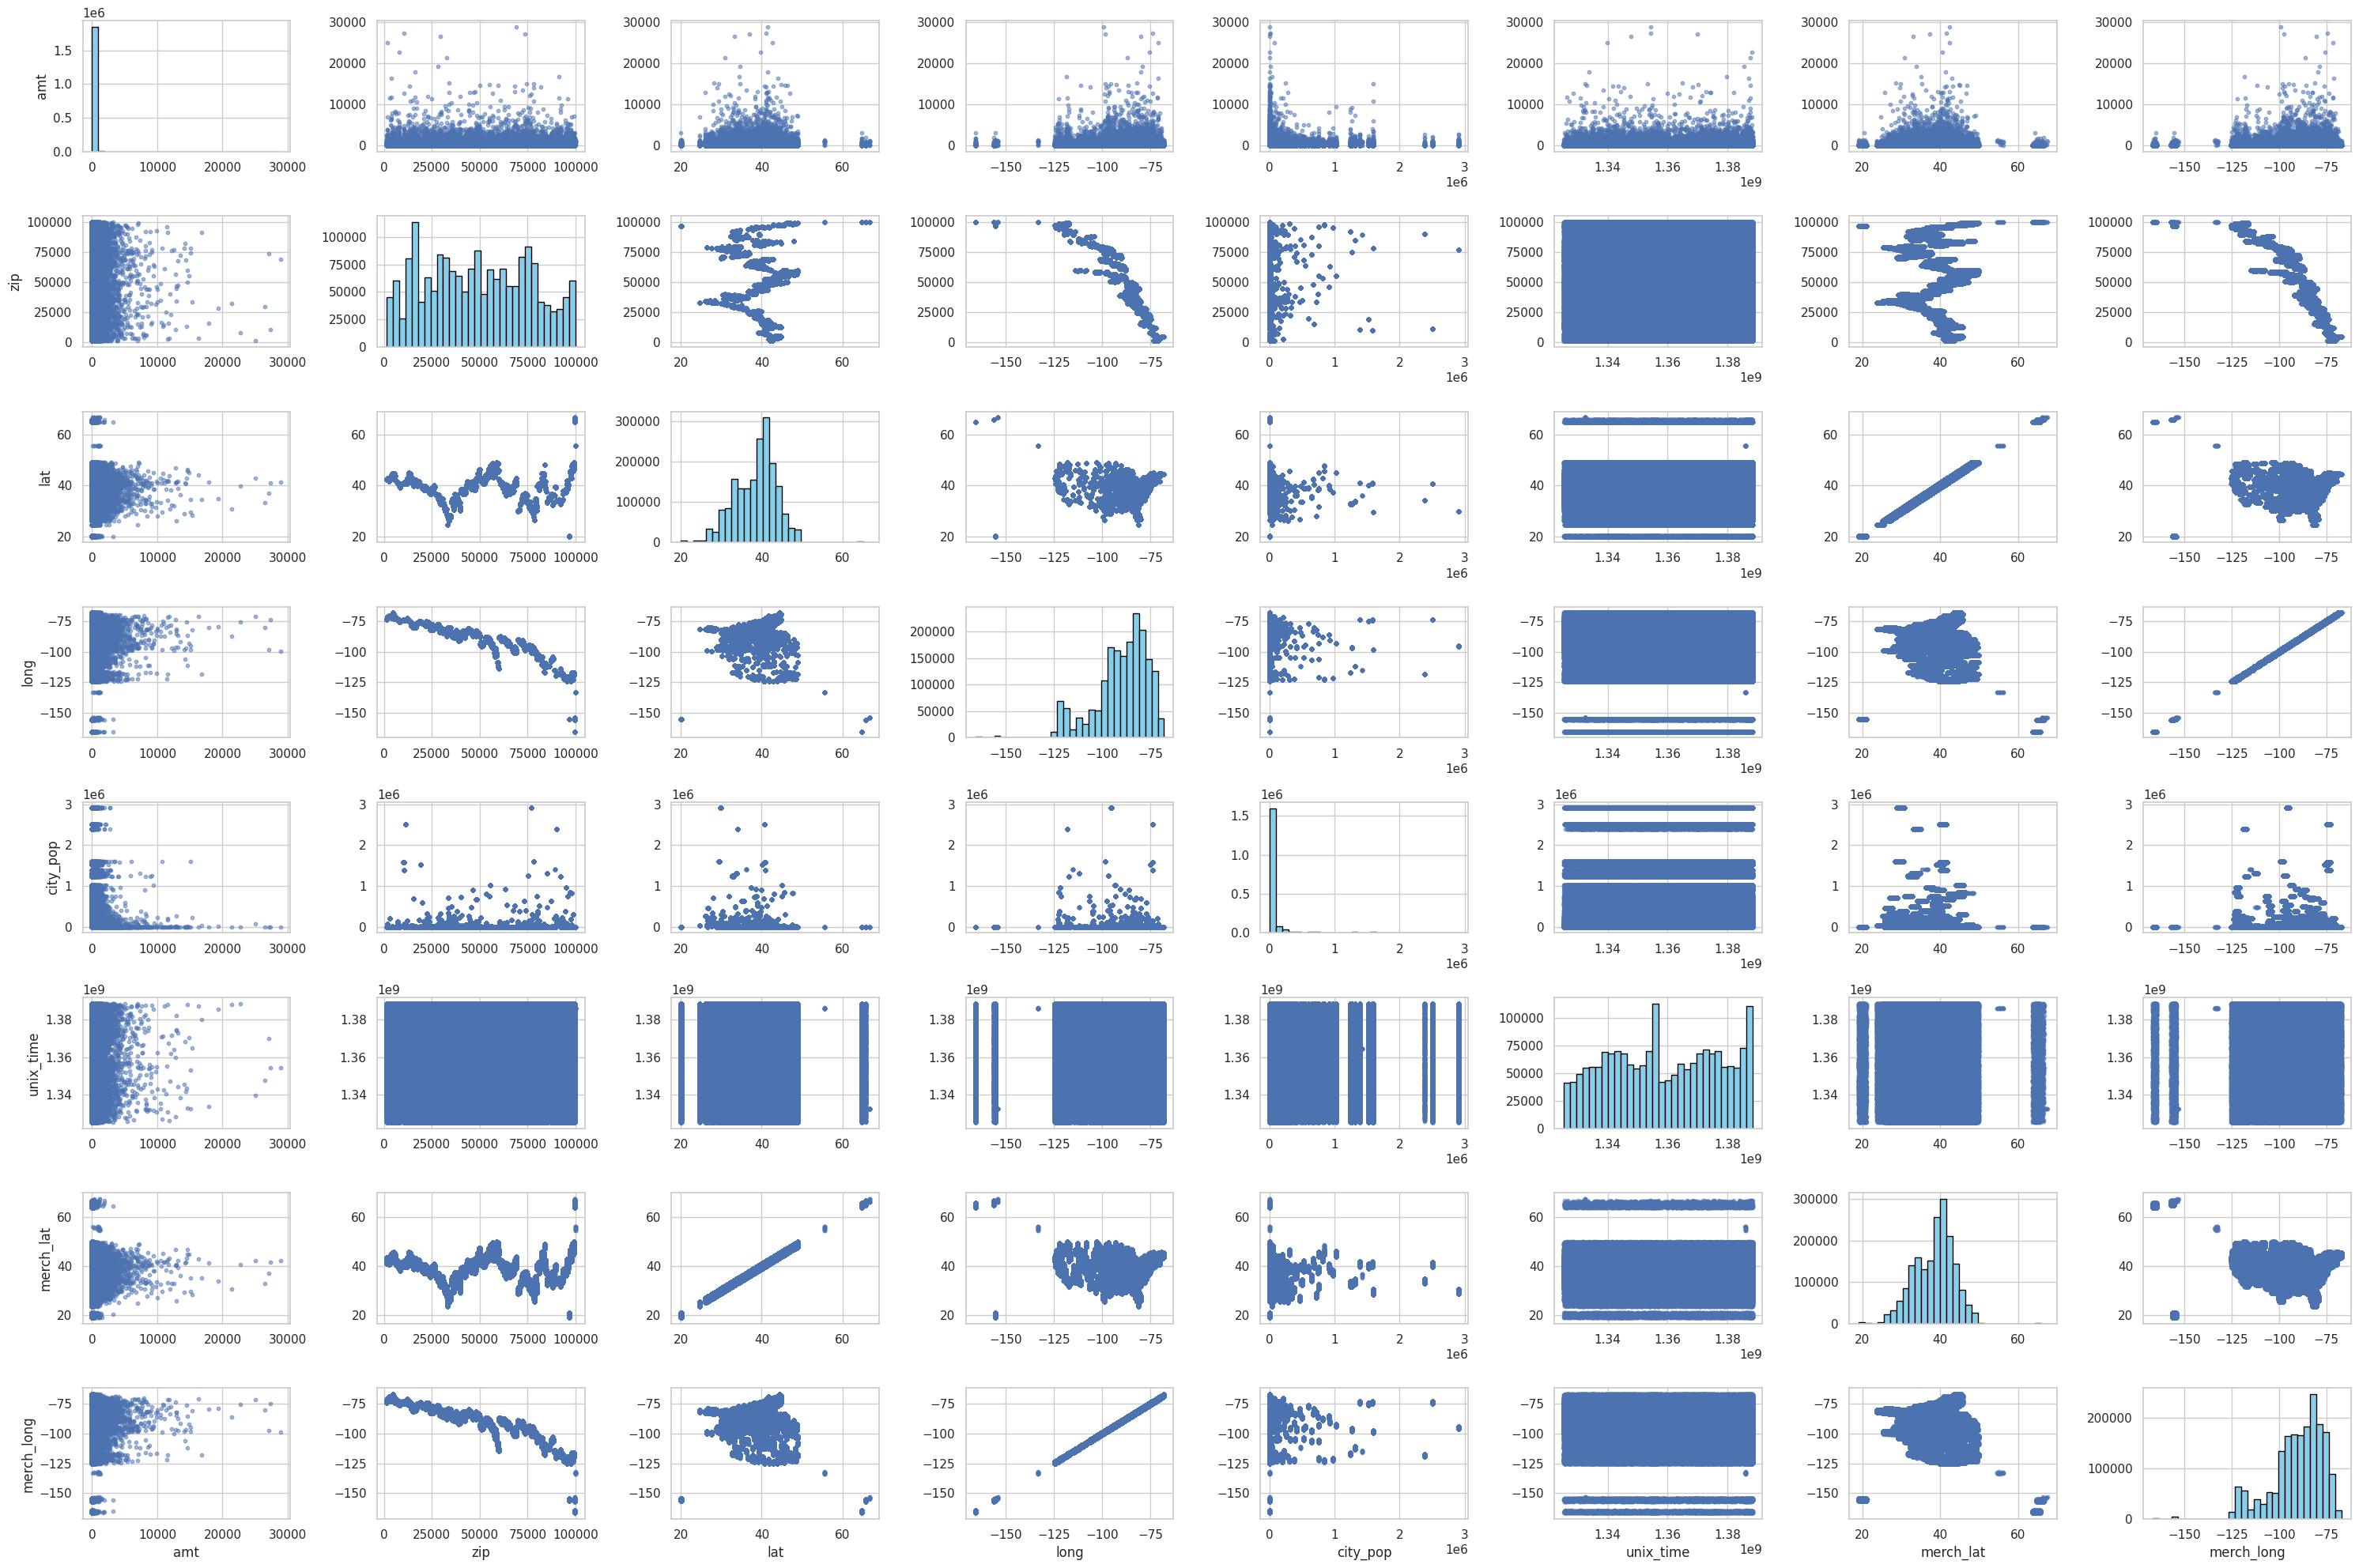

In [88]:
# Define the numeric variables
num_var = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

# Create a pairplot using matplotlib
plt.figure(figsize=(30, 20))
for i in range(len(num_var)):
    for j in range(len(num_var)):
        plt.subplot(len(num_var), len(num_var), i * len(num_var) + j + 1)
        if i == j:
            plt.hist(df_data[num_var[i]], bins=30, color='skyblue', edgecolor='black')
        else:
            plt.scatter(df_data[num_var[j]], df_data[num_var[i]], s=10, alpha=0.5)
        if j == 0:
            plt.ylabel(num_var[i])
        if i == len(num_var) - 1:
            plt.xlabel(num_var[j])

plt.tight_layout()
plt.show()

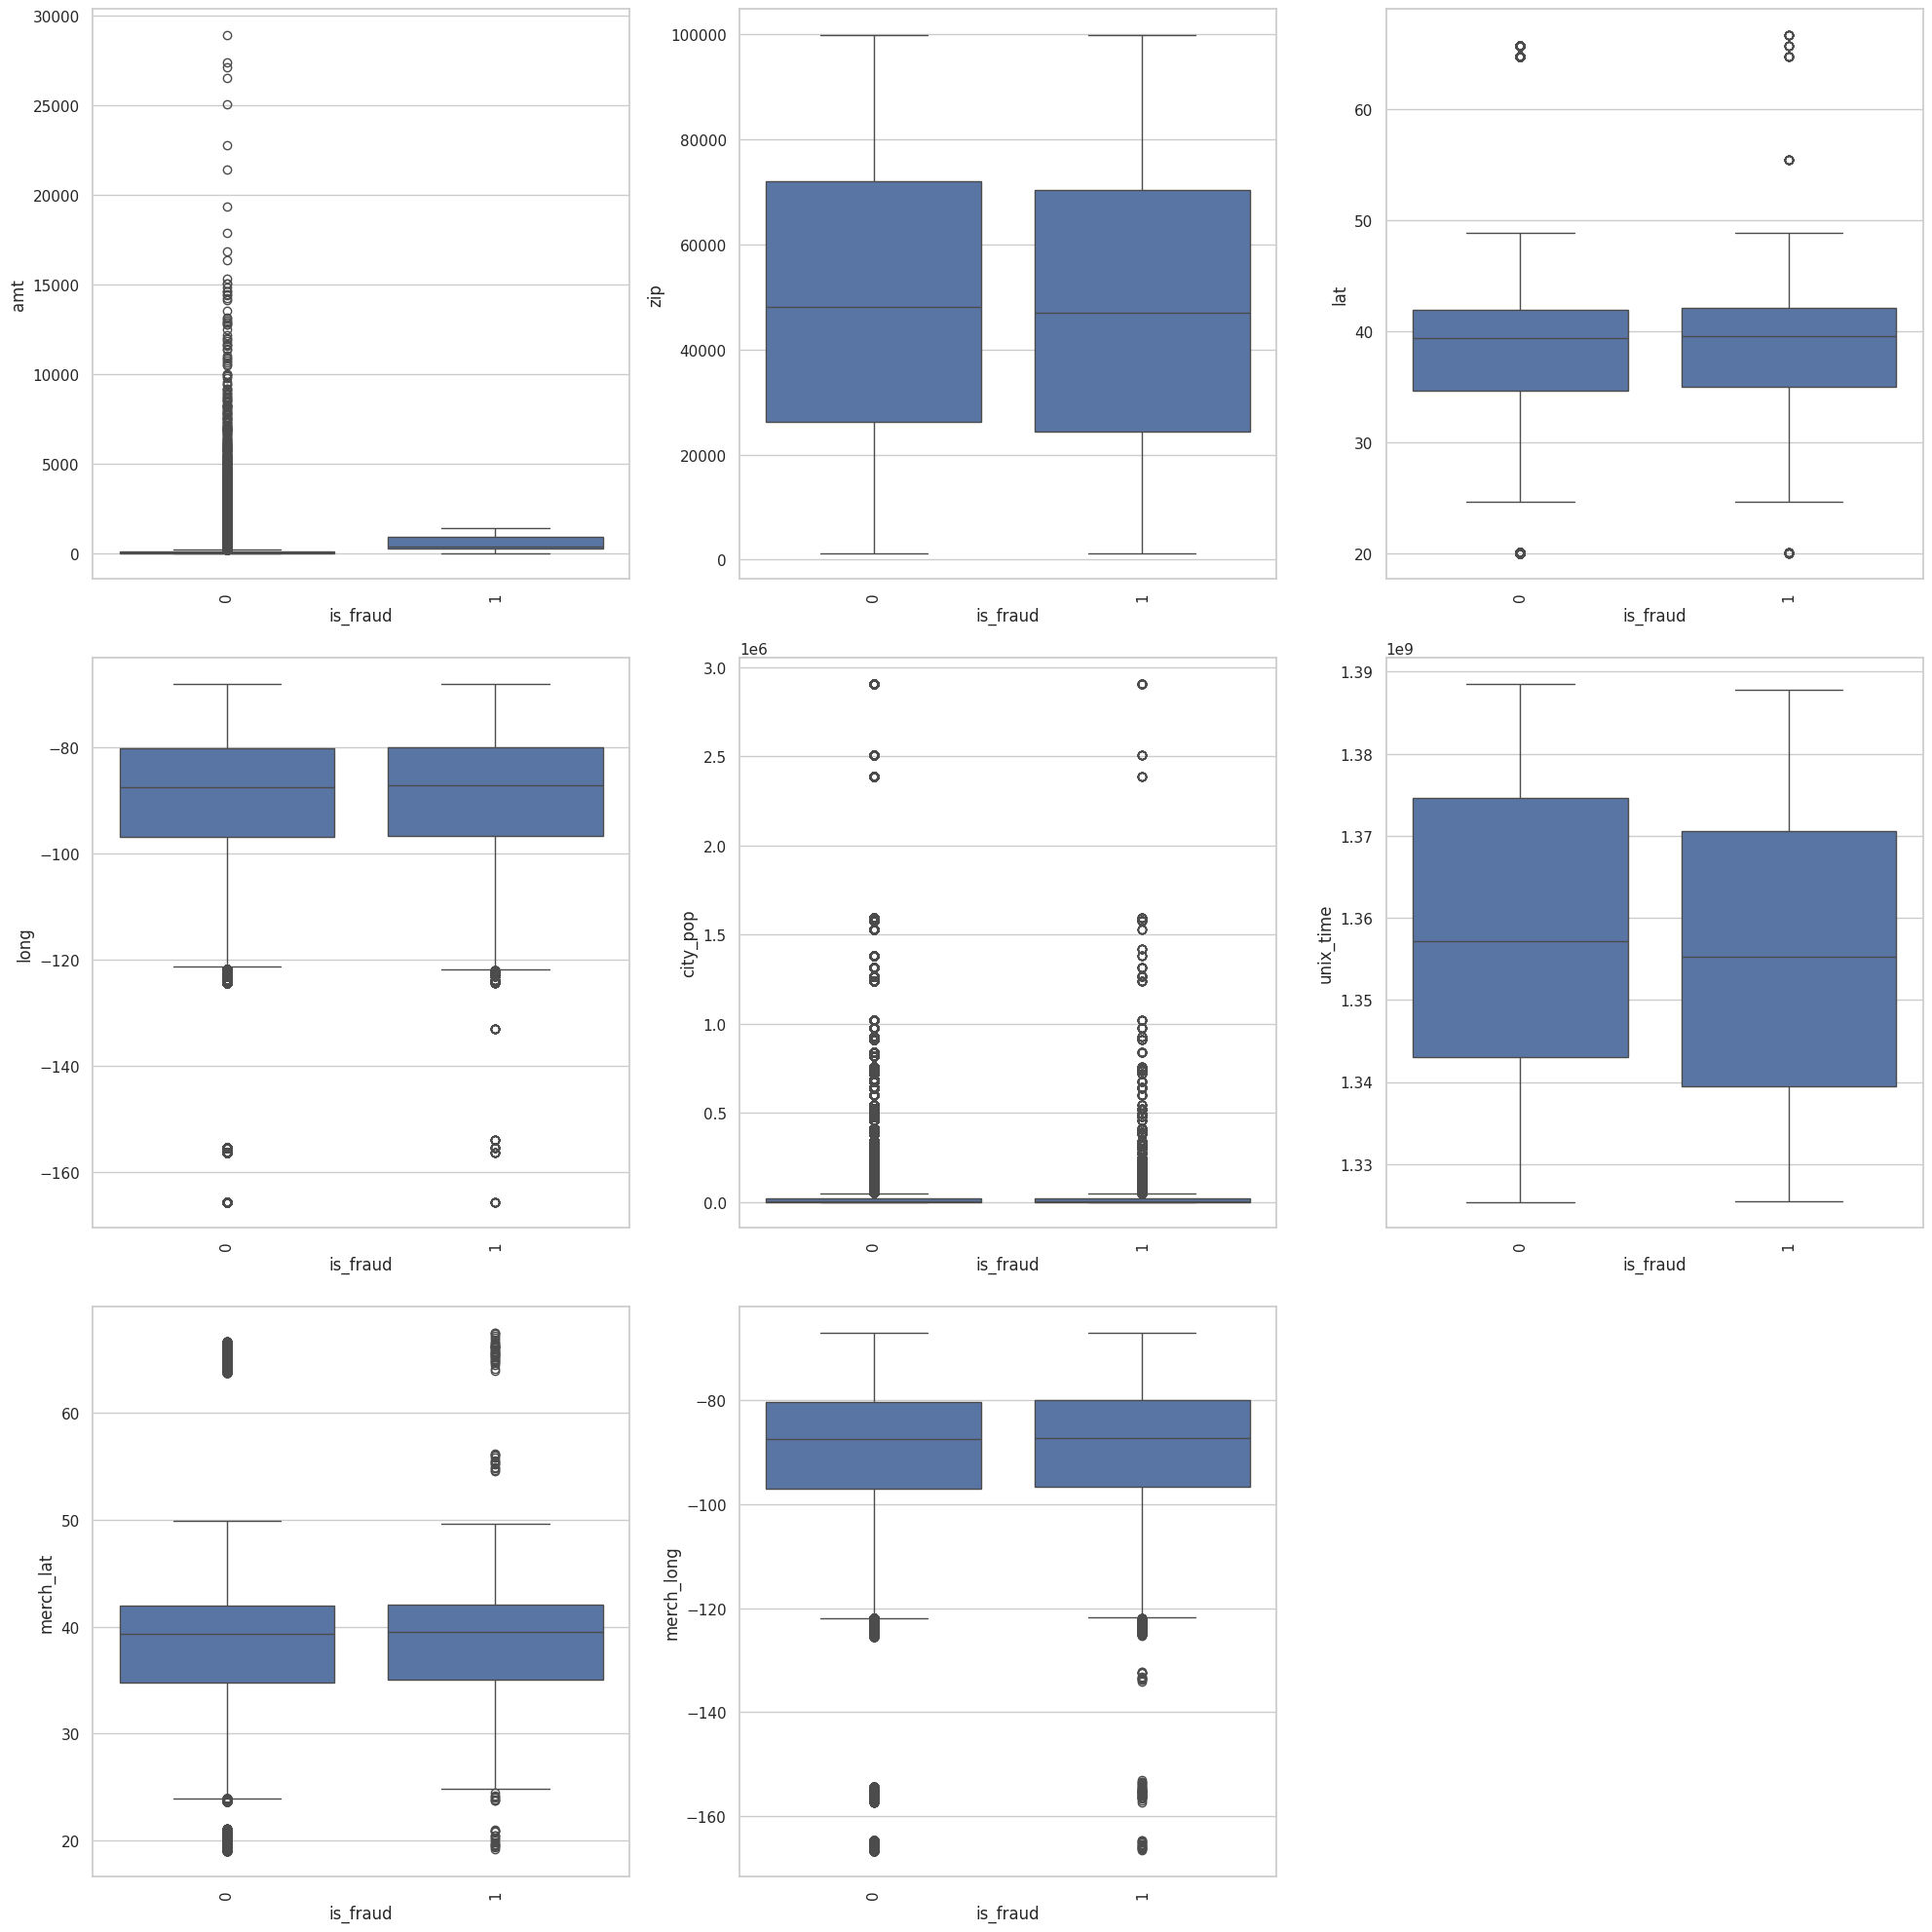

In [89]:
# Set the figure size
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# Flatten the axes array
axes = axes.flatten()

# List of numerical columns
num_cols = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

# Loop through each numerical column and create a boxplot
for i, col in enumerate(num_cols):
    sns.boxplot(x='is_fraud', y=col, data=df_data, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_xlabel('is_fraud')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- The above plot shows the boxplots between the target varibale `is_fraud` and the numerical variables i.e amt, zip, lat, long, city_pop, unix_time, merchat_lat, merchant_long.

### Data Preparation

- We can derive following Variables

    1. Age on transaction day from "dob" variable and binning of age variable

    2. trans_Year, trans_year_month, trans_Month, trans_Hour, trans_Day, trans_weekday of transaction from trans_date_trans_time variable

    3. dis i.e distance between credit card lat, long to merchant lat and long

    4. prev_merch_lat, prev_merch_long i.e Previous longitude/latitude of merchant and time_since_prev_transaction i.e time since previous transaction in hours

    5. distance_between_merchants by calculating distance between current and previous purchase location

    6. Historical variables such as hist_trans_30d, hist_trans_24h, hist_trans_avg_amt_30d, hist_trans_avg_amt_24h


#### Deriving age on transaction day from "dob" variable and binning of age variable

In [90]:
df_data["age"] = df_data["dob"].apply(lambda x : (pd.Timestamp.now().year - x.year))

In [91]:
df_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip  ...  \
0                     561 Perry Cove  Moravian Falls    NC  28654  ...   
1       43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2           594 White Dale Suite 530      Malad City    ID  83252  ...   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                   408 Bradley Rest        Doe Hill    VA  24433  ...   
...                              ...             ...   ...    ...  ...   
555714           558 Michael Estates           Luray    MO  63453  ...   
555715           572 Davis Mountains    Lake Jackson    TX  77566  ...   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

              dob                         trans_num   unix_time  merch_lat  \
0      1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1      1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2      1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3      1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4      1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...           ...                               ...         ...        ...   
555714 1966-02-13  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837   
555715 1999-12-27  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049   
555716 1981-11-29  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340   
555717 1965-12-15  14392d723bb7737606b2700ac791b7aa  1388534364  44.470525   
555718 1993-05-10  1765bb45b3aa3224b4cdcb6e7a96cee3  1388534374  36.210097   

        merch_long is_fraud  trans_Date  trans_Time  state_bin  age  
0       -82.048315        0  2019-01-01    00:00:18      South   36  
1      -118.186462        0  2019-01-01    00:00:44       West   46  
2      -112.154481        0  2019-01-01    00:00:51       West   62  
3      -112.561071        0  2019-01-01    00:01:16       West   57  
4       -78.632459        0  2019-01-01    00:03:06      South   38  
...            ...      ...         ...         ...        ...  ...  
555714  -91.333331        0  2020-12-31    23:59:07    Midwest   58  
555715  -96.186633        0  2020-12-31    23:59:09      South   25  
555716 -119.715054       

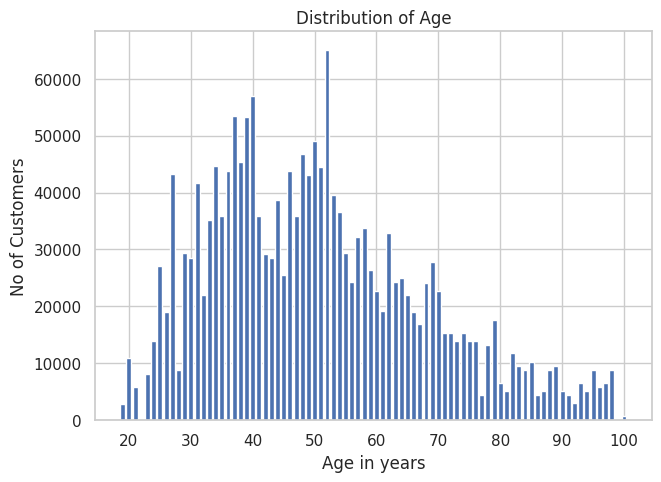

In [92]:
# Calculate the value counts
age_counts = df_data['age'].value_counts()

# Extract the ages and their counts
ages = age_counts.index
counts = age_counts.values

# Create the bar plot
plt.bar(ages, counts)

# Set labels and title
plt.xlabel('Age in years')
plt.ylabel('No of Customers')
plt.title('Distribution of Age')

# Show the plot
plt.show()

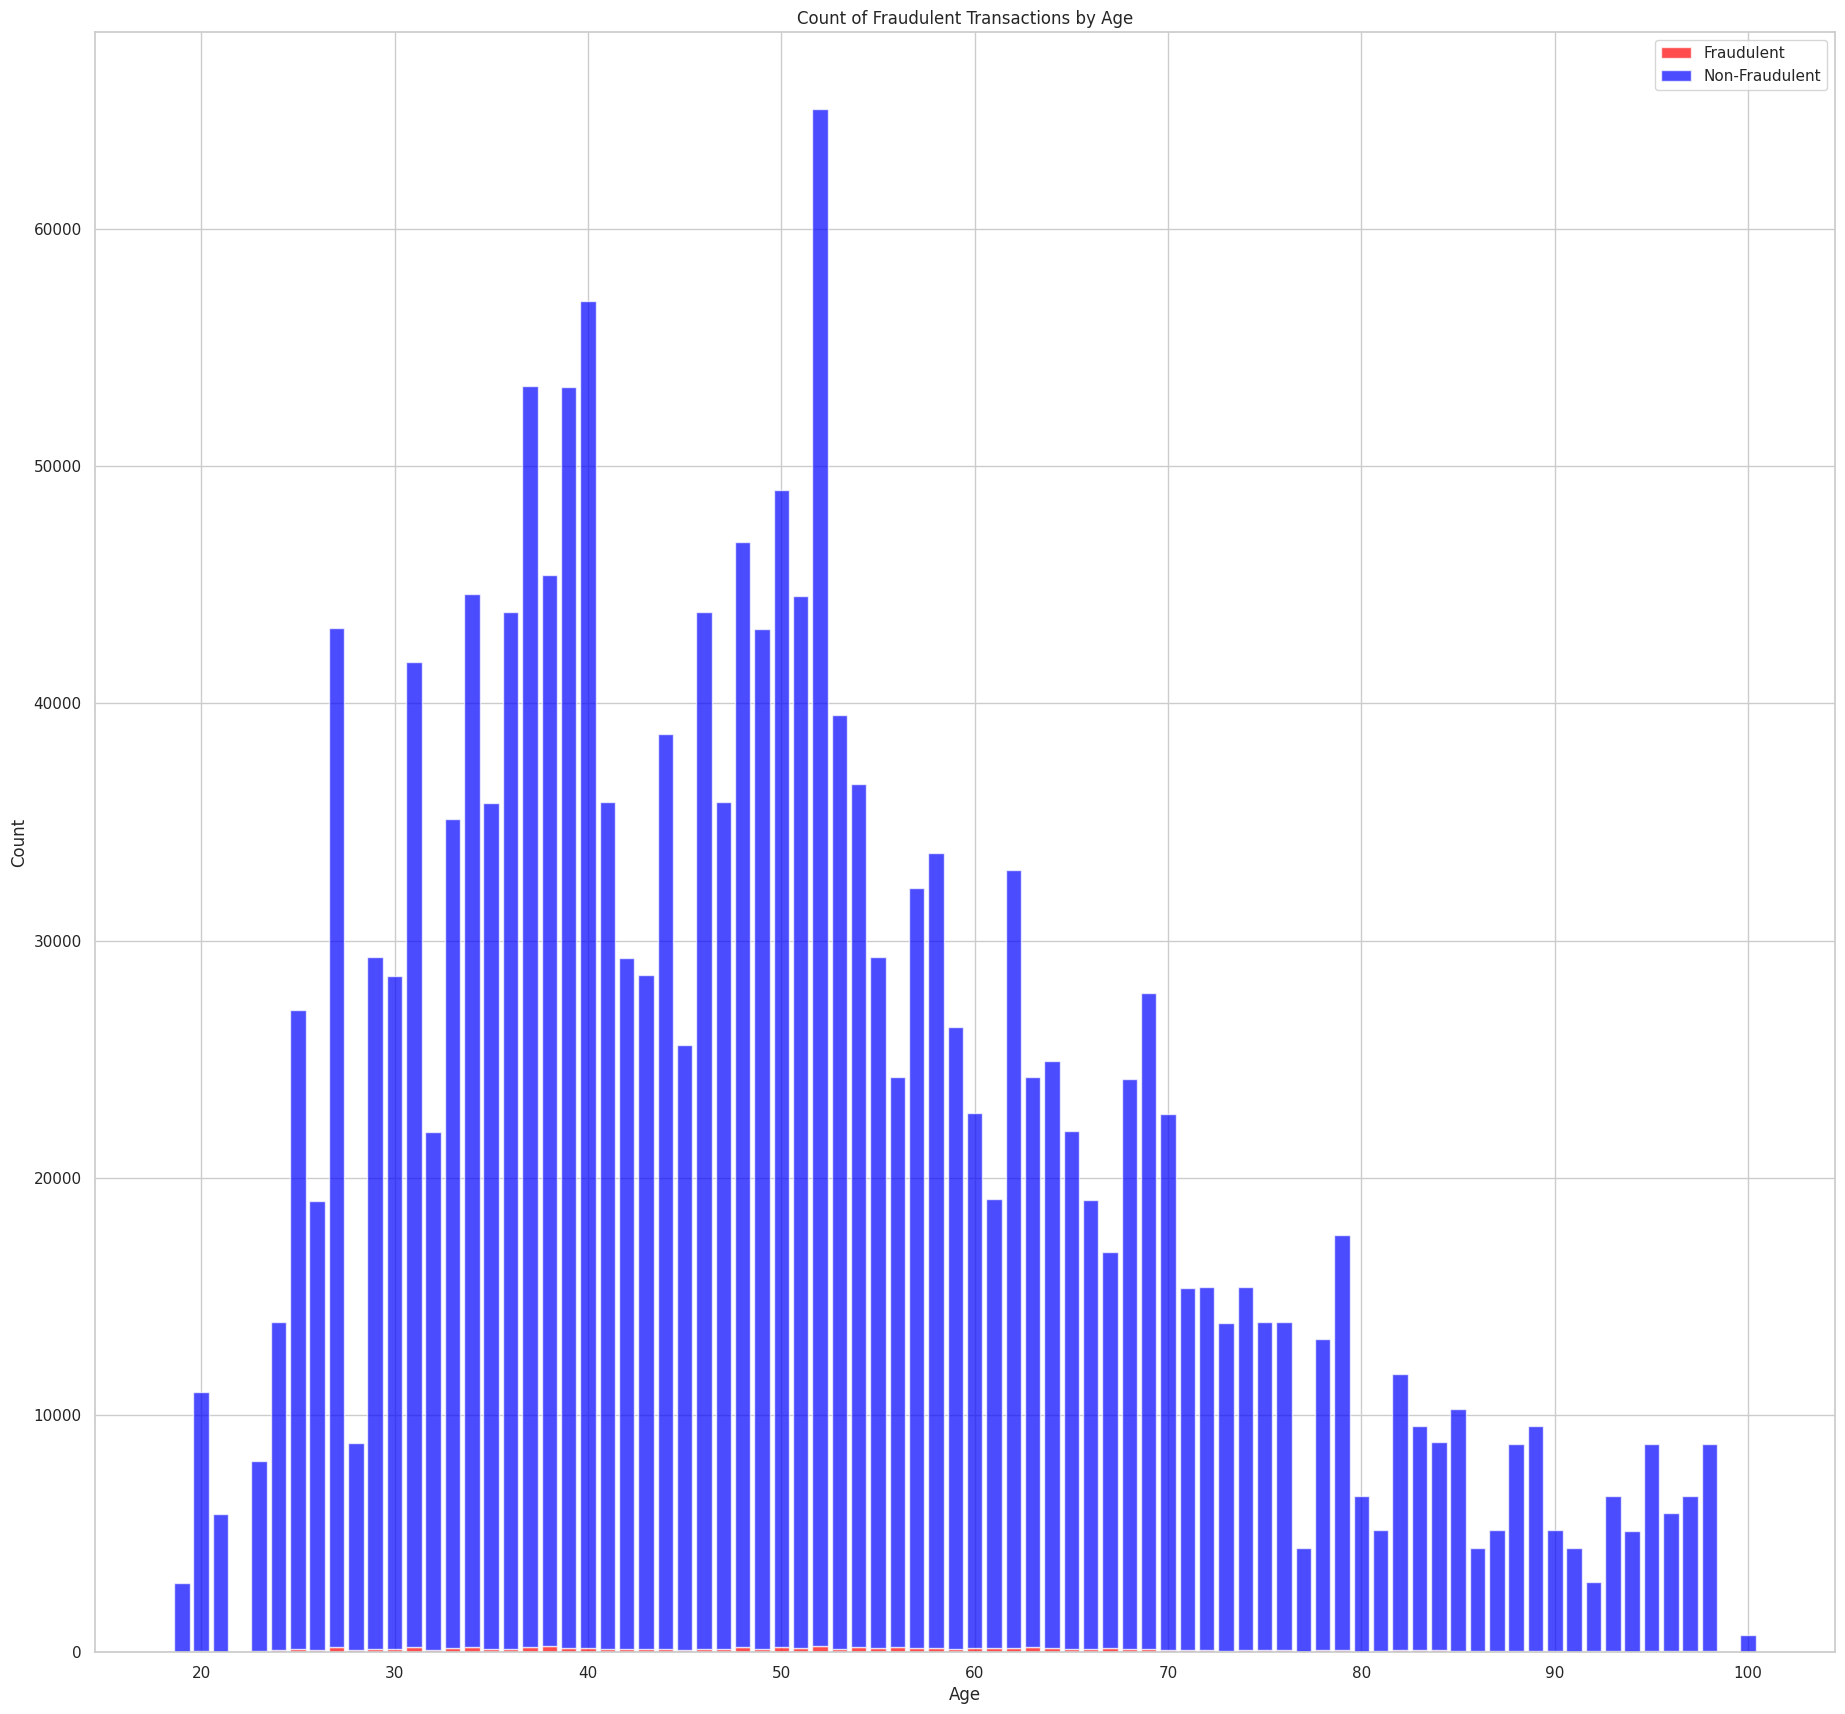

In [93]:
# Set the figure size
plt.figure(figsize=(20, 20))

# Count the occurrences of each age for fraudulent and non-fraudulent transactions
fraud_counts = df_data[df_data['is_fraud'] == 1]['age'].value_counts()
non_fraud_counts = df_data[df_data['is_fraud'] == 0]['age'].value_counts()

# Align the indices
all_indices = set(fraud_counts.index) | set(non_fraud_counts.index)

# Fill missing indices with zero count
for idx in all_indices:
    if idx not in fraud_counts:
        fraud_counts[idx] = 0
    if idx not in non_fraud_counts:
        non_fraud_counts[idx] = 0

# Sort the indices
all_indices = sorted(all_indices)

# Plot the count of fraudulent transactions by age
plt.bar(all_indices, fraud_counts[all_indices], label='Fraudulent', color='red', alpha=0.7)

# Plot the count of non-fraudulent transactions by age
plt.bar(all_indices, non_fraud_counts[all_indices], bottom=fraud_counts[all_indices], label='Non-Fraudulent', color='blue', alpha=0.7)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Fraudulent Transactions by Age')
plt.legend()

# Show the plot
plt.show()

#### Binning of age variable for better insights

In [94]:
bin_manual = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labs = ['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100']
df_data['age_bin'] = pd.cut(df_data.age, bins=bin_manual, labels=labs)

In [95]:
df_data[['age_bin','age']].head()

age_bin  age
0   30-40   36
1   40-50   46
2   60-70   62
3   50-60   57
4   30-40   38

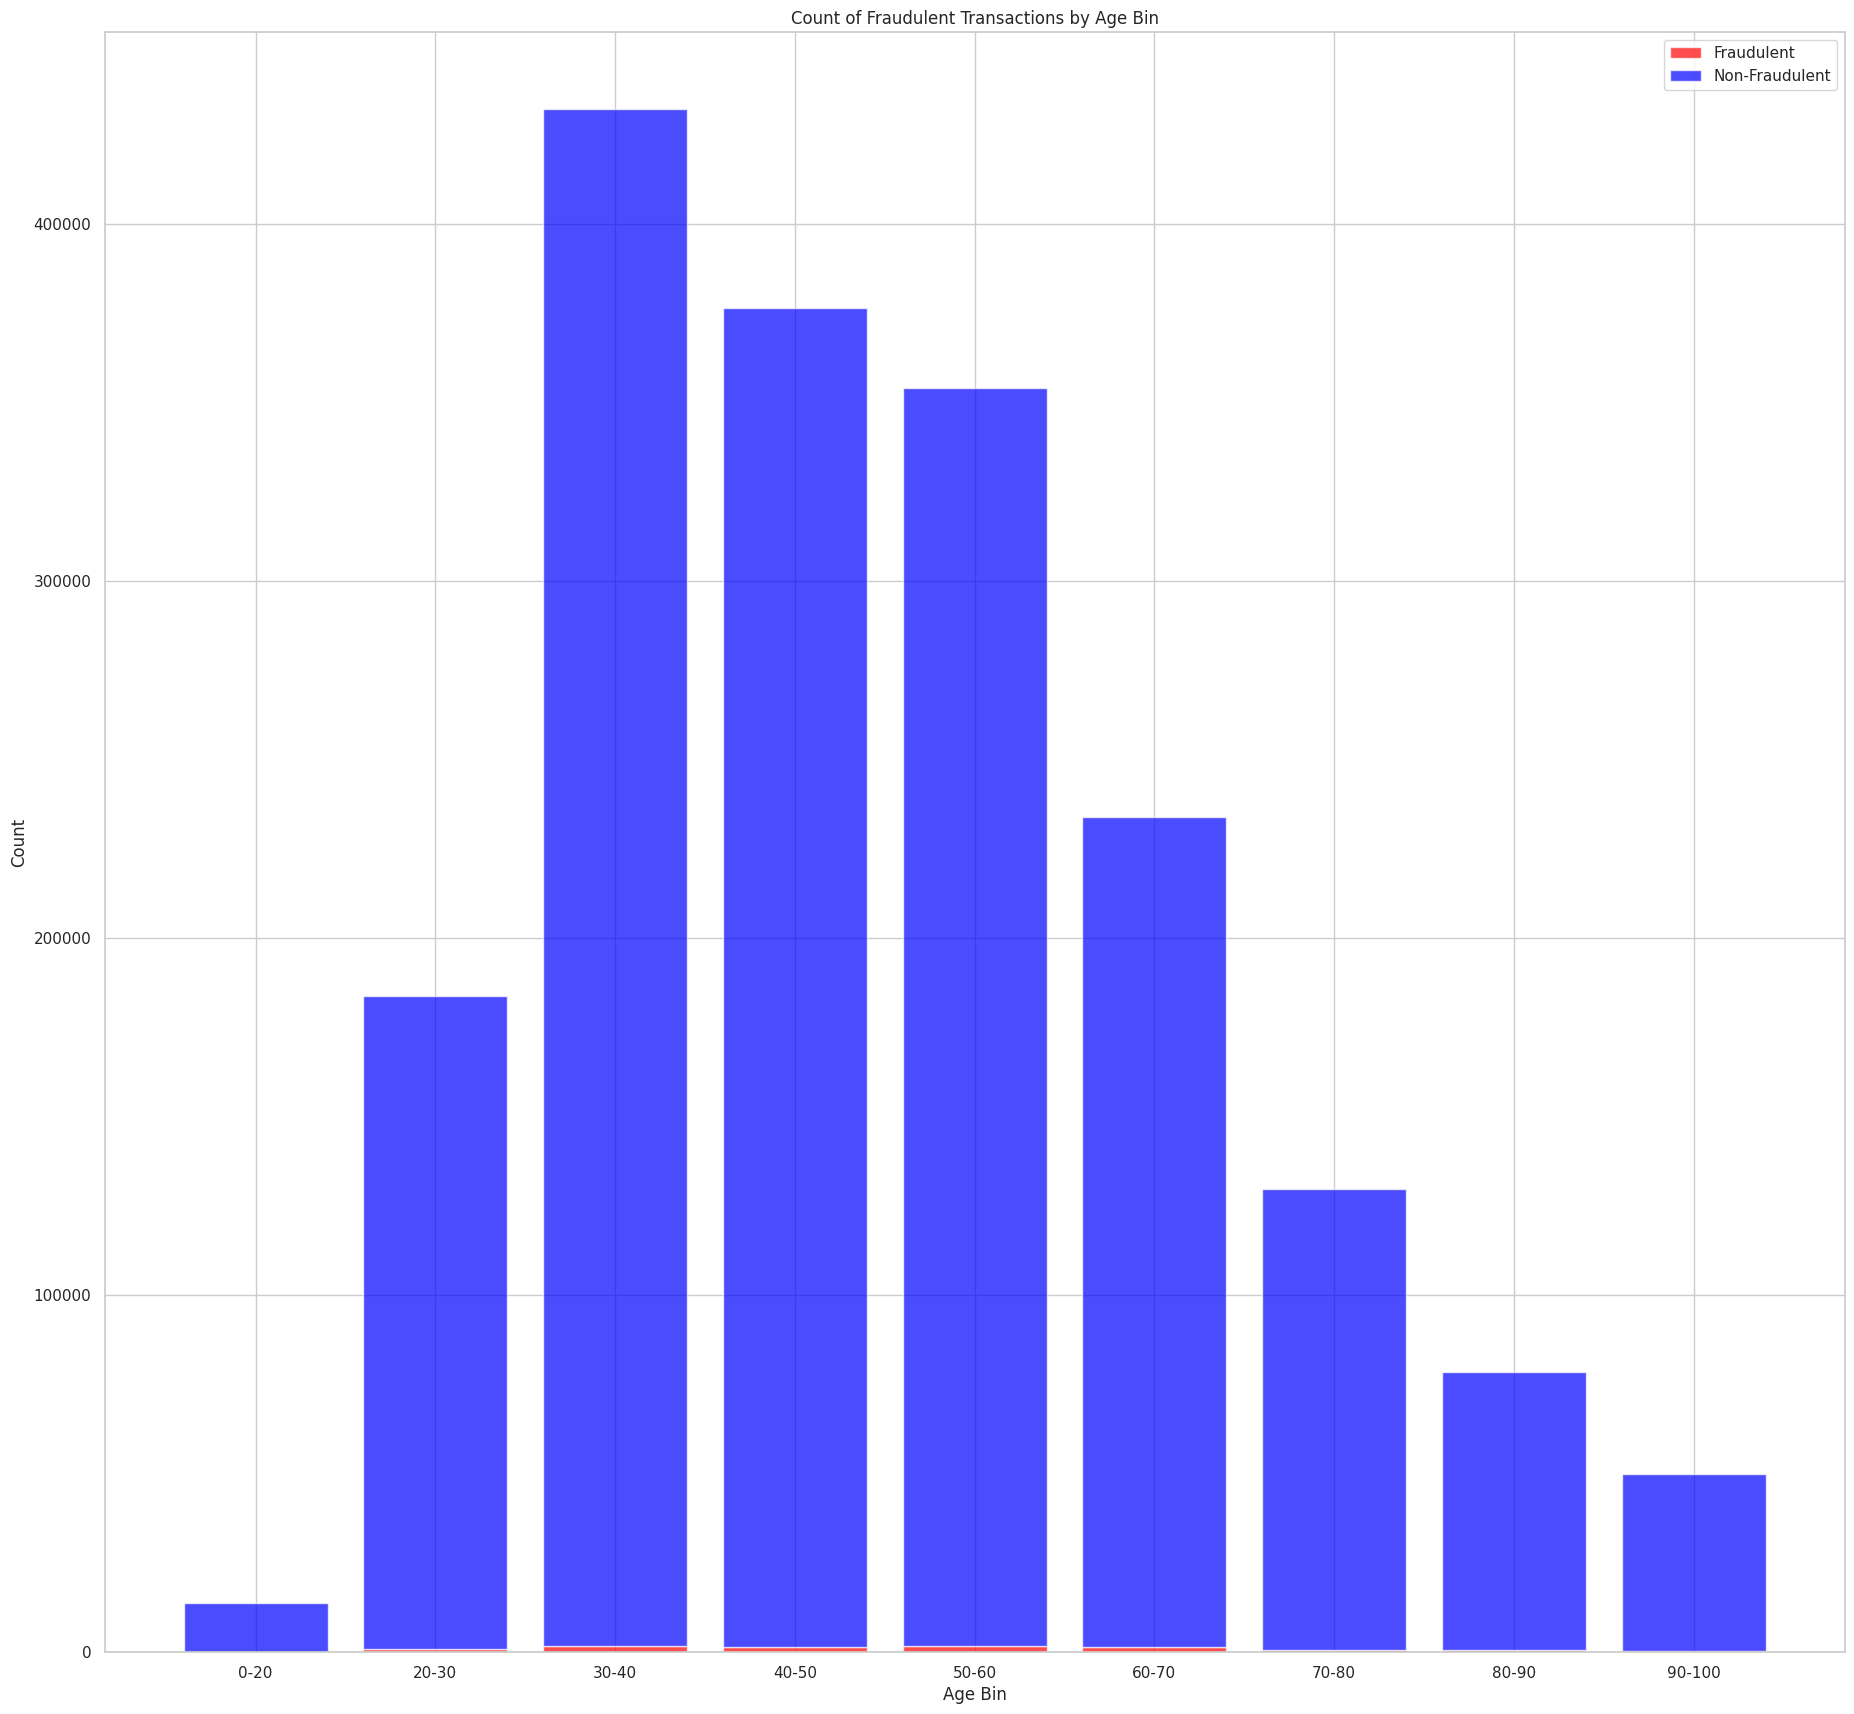

In [96]:
# Set the figure size
plt.figure(figsize=(20, 20))

# Count the occurrences of each age_bin for fraudulent and non-fraudulent transactions
fraud_counts = df_data[df_data['is_fraud'] == 1]['age_bin'].value_counts()
non_fraud_counts = df_data[df_data['is_fraud'] == 0]['age_bin'].value_counts()

# Get unique age_bins
age_bins = sorted(df_data['age_bin'].unique())

# Plot the count of fraudulent transactions by age_bin
plt.bar(age_bins, fraud_counts.reindex(age_bins, fill_value=0), label='Fraudulent', color='red', alpha=0.7)

# Plot the count of non-fraudulent transactions by age_bin
plt.bar(age_bins, non_fraud_counts.reindex(age_bins, fill_value=0), bottom=fraud_counts.reindex(age_bins, fill_value=0), label='Non-Fraudulent', color='blue', alpha=0.7)

# Set labels and title
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.title('Count of Fraudulent Transactions by Age Bin')
plt.legend()

# Show the plot
plt.show()

- From the above graph we can infer that majority of the credit card holders belongs to the age of 30 to 50 years.¶
- The age of the credit card holders where fraudulent transactions took place mostly belongs to the age of 20 to 70 years.¶

In [97]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             float

#### Deriving trans_Year, trans_year_month, trans_Month, trans_Hour, trans_Day, trans_weekday of transaction from trans_date_trans_time variable

In [98]:
df_data['trans_Year']=df_data.trans_Date.dt.year
df_data['trans_year_month'] = df_data.trans_Date.dt.to_period('M')
df_data['trans_Month']=df_data.trans_Date.dt.month
df_data['trans_Hour']=df_data.trans_date_trans_time.dt.hour
df_data['trans_Day']=df_data.trans_Date.dt.day
df_data['trans_weekday'] = df_data.trans_Date.dt.day_name()

df_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip  ...  \
0                     561 Perry Cove  Moravian Falls    NC  28654  ...   
1       43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2           594 White Dale Suite 530      Malad City    ID  83252  ...   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                   408 Bradley Rest        Doe Hill    VA  24433  ...   
...                              ...             ...   ...    ...  ...   
555714           558 Michael Estates           Luray    MO  63453  ...   
555715           572 Davis Mountains    Lake Jackson    TX  77566  ...   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

        trans_Time  state_bin  age age_bin trans_Year trans_year_month  \
0         00:00:18      South   36   30-40       2019          2019-01   
1         00:00:44       West   46   40-50       2019          2019-01   
2         00:00:51       West   62   60-70       2019          2019-01   
3         00:01:16       West   57   50-60       2019          2019-01   
4         00:03:06      South   38   30-40       2019          2019-01   
...            ...        ...  ...     ...        ...              ...   
555714    23:59:07    Midwest   58   50-60       2020          2020-12   
555715    23:59:09      South   25   20-30       2020          2020-12   
555716    23:59:15       West   43   40-50       2020          2020-12   
555717    23:59:24       West   59   50-60       2020          2020-12   
555718    23:59:34      South   31   30-40       2020          2020-12   

        trans_Month  trans_Hour  trans_Day  trans_weekday  
0                 1           0          1        Tuesday  
1                 1           0          1        Tuesday  
2                 1           0          1        Tuesday  
3                 1           0          1        Tuesday  
4                 1           0          1        Tuesday  
...             ...         ...        ...            ...  
555714           12          23         31       Thursday  
555715           12          23         31       Thursday  
555716           12          23         31       Thursday  
555717           12          23         31       Thursday  
555718           12          23         31 

In [99]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             float

#### Deriving dis i.e. distance between credit card lat, long to merchant lat and long

In [100]:
from geopy.distance import geodesic

def haversine_distance(lat, long, merch_lat, merch_long): 
    # Convert coordinates to tuples
    coords1 = (lat, long)
    coords2 = (merch_lat, merch_long)
    
    # Calculate the distance using geodesic function
    distance = geodesic(coords1, coords2).kilometers
    
    return round(distance, 2)

In [101]:
df_data['dist']=df_data[['lat', 'long', 'merch_lat', 'merch_long']].apply(lambda x:haversine_distance(x[0], x[1], x[2], x[3]), axis=1)

In [102]:
df_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip  ...  \
0                     561 Perry Cove  Moravian Falls    NC  28654  ...   
1       43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2           594 White Dale Suite 530      Malad City    ID  83252  ...   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                   408 Bradley Rest        Doe Hill    VA  24433  ...   
...                              ...             ...   ...    ...  ...   
555714           558 Michael Estates           Luray    MO  63453  ...   
555715           572 Davis Mountains    Lake Jackson    TX  77566  ...   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

        state_bin  age  age_bin trans_Year trans_year_month trans_Month  \
0           South   36    30-40       2019          2019-01           1   
1            West   46    40-50       2019          2019-01           1   
2            West   62    60-70       2019          2019-01           1   
3            West   57    50-60       2019          2019-01           1   
4           South   38    30-40       2019          2019-01           1   
...           ...  ...      ...        ...              ...         ...   
555714    Midwest   58    50-60       2020          2020-12          12   
555715      South   25    20-30       2020          2020-12          12   
555716       West   43    40-50       2020          2020-12          12   
555717       West   59    50-60       2020          2020-12          12   
555718      South   31    30-40       2020          2020-12          12   

        trans_Hour  trans_Day  trans_weekday    dist  
0                0          1        Tuesday   78.77  
1                0          1        Tuesday   30.22  
2                0          1        Tuesday  108.10  
3                0          1        Tuesday   95.69  
4                0          1        Tuesday   77.70  
...            ...        ...            ...     ...  
555714          23         31       Thursday   77.03  
555715          23         31       Thursday  100.02  
555716          23         31       Thursday   80.89  
555717          23         31       Thursday   53.06  
555718          23         31       Thursday   72.38  

[1852394 rows x 32 columns]

####  Deriving prev_merch_lat, prev_merch_long i.e Previous longitude/latitude of merchant and time_since_prev_transaction i.e time since previous transaction in hours

In [103]:
# Get previous longitude/latitude and time elapsed of a transaction
df_data['prev_merch_lat'] = grp_by_cc['merch_lat'].shift().fillna(df_data['merch_lat'])
df_data['prev_merch_long'] = grp_by_cc['merch_long'].shift().fillna(df_data['merch_long'])

# Time since previous transaction in hours
df_data['time_since_prev_transaction'] = grp_by_cc['trans_Hour'].transform(lambda x: round(x.diff().fillna(0), 1))

In [104]:
df_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip  ...  \
0                     561 Perry Cove  Moravian Falls    NC  28654  ...   
1       43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2           594 White Dale Suite 530      Malad City    ID  83252  ...   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                   408 Bradley Rest        Doe Hill    VA  24433  ...   
...                              ...             ...   ...    ...  ...   
555714           558 Michael Estates           Luray    MO  63453  ...   
555715           572 Davis Mountains    Lake Jackson    TX  77566  ...   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

        trans_Year  trans_year_month  trans_Month trans_Hour trans_Day  \
0             2019           2019-01            1          0         1   
1             2019           2019-01            1          0         1   
2             2019           2019-01            1          0         1   
3             2019           2019-01            1          0         1   
4             2019           2019-01            1          0         1   
...            ...               ...          ...        ...       ...   
555714        2020           2020-12           12         23        31   
555715        2020           2020-12           12         23        31   
555716        2020           2020-12           12         23        31   
555717        2020           2020-12           12         23        31   
555718        2020           2020-12           12         23        31   

       trans_weekday    dist  prev_merch_lat  prev_merch_long  \
0            Tuesday   78.77       36.011293       -82.048315   
1            Tuesday   30.22       49.159047      -118.186462   
2            Tuesday  108.10       43.150704      -112.154481   
3            Tuesday   95.69       47.034331      -112.561071   
4            Tuesday   77.70       38.674999       -78.632459   
...              ...     ...             ...              ...   
555714      Thursday   77.03       40.395006       -91.537312   
555715      Thursday  100.02       28.599619       -95.170763   
555716      Thursday   80.89       45.716706      -119.886246   
555717      Thursday   53.06       45.152800      -11

#### Deriving distance_between_merchants by calculating distance between current and previous purchase location

In [105]:
df_data['distance_between_merchants']=df_data.apply(lambda x:haversine_distance(x.prev_merch_lat,x.prev_merch_long,x.merch_lat,x.merch_long), axis=1)

In [106]:
df_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip  ...  \
0                     561 Perry Cove  Moravian Falls    NC  28654  ...   
1       43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2           594 White Dale Suite 530      Malad City    ID  83252  ...   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                   408 Bradley Rest        Doe Hill    VA  24433  ...   
...                              ...             ...   ...    ...  ...   
555714           558 Michael Estates           Luray    MO  63453  ...   
555715           572 Davis Mountains    Lake Jackson    TX  77566  ...   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

        trans_year_month  trans_Month  trans_Hour trans_Day trans_weekday  \
0                2019-01            1           0         1       Tuesday   
1                2019-01            1           0         1       Tuesday   
2                2019-01            1           0         1       Tuesday   
3                2019-01            1           0         1       Tuesday   
4                2019-01            1           0         1       Tuesday   
...                  ...          ...         ...       ...           ...   
555714           2020-12           12          23        31      Thursday   
555715           2020-12           12          23        31      Thursday   
555716           2020-12           12          23        31      Thursday   
555717           2020-12           12          23        31      Thursday   
555718           2020-12           12          23        31      Thursday   

          dist  prev_merch_lat  prev_merch_long  time_since_prev_transaction  \
0        78.77       36.011293       -82.048315                          0.0   
1        30.22       49.159047      -118.186462                          0.0   
2       108.10       43.150704      -112.154481                          0.0   
3        95.69       47.034331      -112.561071                          0.0   
4        77.70       38.674999       -78.632459                          0.0   
...        ...             ...              ...                          ...   
555714   77.03       40.395006       -91.537312                          4.0   
555715  100.02       28.599

#### Deriving Historical variables such as hist_trans_30d, hist_trans_24h, hist_trans_avg_amt_30d and hist_trans_avg_amt_24h

In [107]:
df2 = df_data.copy()

In [108]:
df2.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip  ...  trans_year_month  trans_Month  trans_Hour trans_Day  \
0    NC  28654  ...           2019-01            1           0         1   
1    WA  99160  ...           2019-01            1           0         1   
2    ID  83252  ...           2019-01            1           0         1   
3    MT  59632  ...           2019-01            1           0         1   
4    VA  24433  ...           2019-01            1           0         1   

  trans_weekday    dist  prev_merch_lat  prev_merch_long  \
0       Tuesday   78.77       36.011293       -82.048315   
1       Tuesday   30.22       49.159047      -118.186462   
2       Tuesday  108.10       43.150704      -112.154481   
3       Tuesday   95.69       47.034331      -112.561071   
4       Tuesday   77.70       38.674999       -78.632459   

   time_since_prev_transaction  distance_between_merchants  
0                          0.0                         0.0  
1                          0.0                         0.0  
2                          0.0                         0.0  
3                          0.0                         0.0  
4                          0.0                         0.0  

[5 rows x 36 columns]

In [109]:
df2.index = pd.to_datetime(df2['trans_date_trans_time'])
df2 = df2.rename_axis(index={'trans_date_trans_time': 'time_index'})
df2 = df2.sort_index()
df2.head()

trans_date_trans_time            cc_num  \
time_index                                                    
2019-01-01 00:00:18   2019-01-01 00:00:18  2703186189652095   
2019-01-01 00:00:44   2019-01-01 00:00:44      630423337322   
2019-01-01 00:00:51   2019-01-01 00:00:51    38859492057661   
2019-01-01 00:01:16   2019-01-01 00:01:16  3534093764340240   
2019-01-01 00:03:06   2019-01-01 00:03:06   375534208663984   

                                               merchant       category  \
time_index                                                               
2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

                        amt gender                        street  \
time_index                                                         
2019-01-01 00:00:18    4.97      F                561 Perry Cove   
2019-01-01 00:00:44  107.23      F  43039 Riley Greens Suite 393   
2019-01-01 00:00:51  220.11      M      594 White Dale Suite 530   
2019-01-01 00:01:16   45.00      M   9443 Cynthia Court Apt. 038   
2019-01-01 00:03:06   41.96      M              408 Bradley Rest   

                               city state    zip  ...  trans_year_month  \
time_index                                        ...                     
2019-01-01 00:00:18  Moravian Falls    NC  28654  ...           2019-01   
2019-01-01 00:00:44          Orient    WA  99160  ...           2019-01   
2019-01-01 00:00:51      Malad City    ID  83252  ...           2019-01   
2019-01-01 00:01:16         Boulder    MT  59632  ...           2019-01   
2019-01-01 00:03:06        Doe Hill    VA  24433  ...           2019-01   

                     trans_Month  trans_Hour trans_Day trans_weekday    dist  \
time_index                                                                     
2019-01-01 00:00:18            1           0         1       Tuesday   78.77   
2019-01-01 00:00:44            1           0         1       Tuesday   30.22   
2019-01-01 00:00:51            1           0         1       Tuesday  108.10   
2019-01-01 00:01:16            1           0         1       Tuesday   95.69   
2019-01-01 00:03:06            1           0         1       Tuesday   77.70   

                     prev_merch_lat  prev_merch_long  \
time_index                                             
2019-01-01 00:00:18       36.011293       -82.048315   
2019-01-01 00:00:44       49.159047      -118.186462   
2019-01-01 00:00:51       43.150704      -112.154481   
2019-01-01 00:01:16       47.034331      -112.561071   
2019-01-01 00:03:06       38.674999       -78.632459   

                     time_since_prev_transaction  distance_between_merchants  
time_index                                                                    
2019-01-01 00:00:18                          0.0                         0.0  
2019-01-01 00:00:44                          0.0                         0.0  
2019-01-01 00:00:51                          0.0                         0.0  
2019-01-01 00:01:16                          0.0                         0.0  
2019-01-01 00:03:06                          0.0                         0.0  

[5 rows x 36 columns]

In [110]:
df2['val_for_agg'] = 1

#### 30 Day Transactions by Customers

In [111]:
df_hist_trans_30d = \
    df2 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('30D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_30d']

In [112]:
df_hist_trans_30d = df_hist_trans_30d.groupby(['cc_num','trans_date_trans_time'])['hist_trans_30d'].min().reset_index()
df_hist_trans_30d

cc_num trans_date_trans_time  hist_trans_30d
0                60416207185   2019-01-01 12:47:15             0.0
1                60416207185   2019-01-02 08:44:57             1.0
2                60416207185   2019-01-02 08:47:36             2.0
3                60416207185   2019-01-02 12:38:14             3.0
4                60416207185   2019-01-02 13:10:46             4.0
...                      ...                   ...             ...
1852345  4992346398065154184   2020-12-31 02:10:10           184.0
1852346  4992346398065154184   2020-12-31 05:13:35           185.0
1852347  4992346398065154184   2020-12-31 11:15:44           185.0
1852348  4992346398065154184   2020-12-31 11:17:25           182.0
1852349  4992346398065154184   2020-12-31 13:24:36           183.0

[1852350 rows x 3 columns]

In [113]:
df_hist_trans_30d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   cc_num                 int64         
 1   trans_date_trans_time  datetime64[ns]
 2   hist_trans_30d         float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


#### 24 Hours Orders by Customers

In [114]:

df_hist_orders_24h = \
    df2 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

In [115]:

df_hist_orders_24h = df_hist_orders_24h.groupby(['cc_num','trans_date_trans_time'])['hist_trans_24h'].min().reset_index()
df_hist_orders_24h

cc_num trans_date_trans_time  hist_trans_24h
0                60416207185   2019-01-01 12:47:15             0.0
1                60416207185   2019-01-02 08:44:57             1.0
2                60416207185   2019-01-02 08:47:36             2.0
3                60416207185   2019-01-02 12:38:14             3.0
4                60416207185   2019-01-02 13:10:46             4.0
...                      ...                   ...             ...
1852345  4992346398065154184   2020-12-31 02:10:10             7.0
1852346  4992346398065154184   2020-12-31 05:13:35             7.0
1852347  4992346398065154184   2020-12-31 11:15:44             7.0
1852348  4992346398065154184   2020-12-31 11:17:25             8.0
1852349  4992346398065154184   2020-12-31 13:24:36             9.0

[1852350 rows x 3 columns]

In [116]:

df_hist_orders_24h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   cc_num                 int64         
 1   trans_date_trans_time  datetime64[ns]
 2   hist_trans_24h         float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


####  30 Day Orders Amt Avg by Customers

In [117]:
df_hist_trans_amt_avg_30d = \
    df2 \
    .groupby(['cc_num'])['amt']\
    .rolling('30D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_30d']

In [118]:
df_hist_trans_amt_avg_30d = df_hist_trans_amt_avg_30d.groupby(
                                               ['cc_num','trans_date_trans_time'])['hist_trans_avg_amt_30d'].min().reset_index()
df_hist_trans_amt_avg_30d

cc_num trans_date_trans_time  hist_trans_avg_amt_30d
0                60416207185   2019-01-01 12:47:15                0.000000
1                60416207185   2019-01-02 08:44:57                7.270000
2                60416207185   2019-01-02 08:47:36               30.105000
3                60416207185   2019-01-02 12:38:14               47.430000
4                60416207185   2019-01-02 13:10:46               44.270000
...                      ...                   ...                     ...
1852345  4992346398065154184   2020-12-31 02:10:10               73.768533
1852346  4992346398065154184   2020-12-31 05:13:35               73.727135
1852347  4992346398065154184   2020-12-31 11:15:44               73.734757
1852348  4992346398065154184   2020-12-31 11:17:25               73.884890
1852349  4992346398065154184   2020-12-31 13:24:36               74.297978

[1852350 rows x 3 columns]

In [119]:
df_hist_trans_amt_avg_30d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   cc_num                  int64         
 1   trans_date_trans_time   datetime64[ns]
 2   hist_trans_avg_amt_30d  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


#### 24 Hours Orders Amt Avg by Customers

In [120]:
df_hist_trans_amt_avg_24h = \
    df2 \
    .groupby(['cc_num'])['amt']\
    .rolling('24H')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_24h']

In [121]:
df_hist_trans_amt_avg_24h = df_hist_trans_amt_avg_24h.groupby(
                                               ['cc_num','trans_date_trans_time'])['hist_trans_avg_amt_24h'].min().reset_index()
df_hist_trans_amt_avg_24h

cc_num trans_date_trans_time  hist_trans_avg_amt_24h
0                60416207185   2019-01-01 12:47:15                0.000000
1                60416207185   2019-01-02 08:44:57                7.270000
2                60416207185   2019-01-02 08:47:36               30.105000
3                60416207185   2019-01-02 12:38:14               47.430000
4                60416207185   2019-01-02 13:10:46               44.270000
...                      ...                   ...                     ...
1852345  4992346398065154184   2020-12-31 02:10:10               95.651429
1852346  4992346398065154184   2020-12-31 05:13:35               91.812857
1852347  4992346398065154184   2020-12-31 11:15:44               84.262857
1852348  4992346398065154184   2020-12-31 11:17:25               85.725000
1852349  4992346398065154184   2020-12-31 13:24:36               92.808889

[1852350 rows x 3 columns]

In [122]:
df_hist_trans_amt_avg_24h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   cc_num                  int64         
 1   trans_date_trans_time   datetime64[ns]
 2   hist_trans_avg_amt_24h  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


#### Merging Historical Variables to the main dataframe with Transactions by ['cc_num','trans_date_trans_time']

In [123]:
df_hist_trans_30d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   cc_num                 int64         
 1   trans_date_trans_time  datetime64[ns]
 2   hist_trans_30d         float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


In [124]:
df_data=pd.merge(df_data, df_hist_trans_30d, on=['cc_num', 'trans_date_trans_time'], how= 'left')
df_data

trans_date_trans_time            cc_num  \
0         2019-01-01 00:00:18  2703186189652095   
1         2019-01-01 00:00:44      630423337322   
2         2019-01-01 00:00:51    38859492057661   
3         2019-01-01 00:01:16  3534093764340240   
4         2019-01-01 00:03:06   375534208663984   
...                       ...               ...   
1852389   2020-12-31 23:59:07    30560609640617   
1852390   2020-12-31 23:59:09  3556613125071656   
1852391   2020-12-31 23:59:15  6011724471098086   
1852392   2020-12-31 23:59:24     4079773899158   
1852393   2020-12-31 23:59:34  4170689372027579   

                                   merchant        category     amt gender  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                      fraud_Lind-Buckridge   entertainment  220.11      M   
3        fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                       fraud_Keeling-Crist        misc_pos   41.96      M   
...                                     ...             ...     ...    ...   
1852389               fraud_Reilly and Sons  health_fitness   43.77      M   
1852390                fraud_Hoppe-Parisian       kids_pets  111.84      M   
1852391                     fraud_Rau-Robel       kids_pets   86.88      F   
1852392               fraud_Breitenberg LLC          travel    7.99      M   
1852393                   fraud_Dare-Marvin   entertainment   38.13      M   

                               street            city state    zip  ...  \
0                      561 Perry Cove  Moravian Falls    NC  28654  ...   
1        43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2            594 White Dale Suite 530      Malad City    ID  83252  ...   
3         9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                    408 Bradley Rest        Doe Hill    VA  24433  ...   
...                               ...             ...   ...    ...  ...   
1852389           558 Michael Estates           Luray    MO  63453  ...   
1852390           572 Davis Mountains    Lake Jackson    TX  77566  ...   
1852391    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
1852392    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
1852393      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

         trans_Month  trans_Hour  trans_Day trans_weekday    dist  \
0                  1           0          1       Tuesday   78.77   
1                  1           0          1       Tuesday   30.22   
2                  1           0          1       Tuesday  108.10   
3                  1           0          1       Tuesday   95.69   
4                  1           0          1       Tuesday   77.70   
...              ...         ...        ...           ...     ...   
1852389           12          23         31      Thursday   77.03   
1852390           12          23         31      Thursday  100.02   
1852391           12          23         31      Thursday   80.89   
1852392           12          23         31      Thursday   53.06   
1852393           12          23         31      Thursday   72.38   

        prev_merch_lat  prev_merch_long  time_since_prev_transaction  \
0            36.011293       -82.048315                          0.0   
1            49.159047      -118.186462                          0.0   
2            43.150704      -112.154481                          0.0   
3            47.034331      -112.561071                          0.0   
4            38.674999       -78.632459                          0.0   
...                ...              ...                          ...   
1852389      40.395006       -91.537312                          4.0   
1852390      28.599619       -95.170763                          2.0   
1852391      45.716706      -119.886246                          0.0   
1852392 

In [125]:
df_data.shape

(1852394, 37)

In [126]:
df_hist_trans_30d[df_hist_trans_30d['cc_num']==38859492057661]

cc_num trans_date_trans_time  hist_trans_30d
443618  38859492057661   2019-01-01 00:00:51             8.0
443619  38859492057661   2019-01-04 05:32:14             1.0
443620  38859492057661   2019-01-04 17:32:51             2.0
443621  38859492057661   2019-01-05 03:25:17             3.0
443622  38859492057661   2019-01-05 05:05:19             4.0
...                ...                   ...             ...
444348  38859492057661   2020-12-28 21:34:43            47.0
444349  38859492057661   2020-12-29 06:50:33            48.0
444350  38859492057661   2020-12-29 17:22:06            49.0
444351  38859492057661   2020-12-31 10:11:14            50.0
444352  38859492057661   2020-12-31 12:04:41            46.0

[735 rows x 3 columns]

In [127]:
df_data[df_data['cc_num']==38859492057661]

trans_date_trans_time          cc_num  \
2         2019-01-01 00:00:51  38859492057661   
5013      2019-01-04 05:32:14  38859492057661   
5733      2019-01-04 17:32:51  38859492057661   
6389      2019-01-05 03:25:17  38859492057661   
6474      2019-01-05 05:05:19  38859492057661   
...                       ...             ...   
1839040   2020-12-28 21:34:43  38859492057661   
1841195   2020-12-29 06:50:33  38859492057661   
1843933   2020-12-29 17:22:06  38859492057661   
1850115   2020-12-31 10:11:14  38859492057661   
1850333   2020-12-31 12:04:41  38859492057661   

                                  merchant        category     amt gender  \
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
5013     fraud_Schaefer, McGlynn and Bosco   gas_transport   64.26      M   
5733                     fraud_Dare-Gibson  health_fitness   10.16      M   
6389                      fraud_Harris Inc   gas_transport   81.85      M   
6474                    fraud_Donnelly LLC   entertainment  188.25      M   
...                                    ...             ...     ...    ...   
1839040             fraud_Bogisich-Weimann       kids_pets   71.63      M   
1841195                  fraud_Bradtke PLC     grocery_pos  101.61      M   
1843933                  fraud_Berge-Hills       kids_pets  188.06      M   
1850115               fraud_Stiedemann Ltd     food_dining   18.40      M   
1850333                     fraud_Will Ltd     food_dining   31.56      M   

                           street        city state    zip  ...  trans_Month  \
2        594 White Dale Suite 530  Malad City    ID  83252  ...            1   
5013     594 White Dale Suite 530  Malad City    ID  83252  ...            1   
5733     594 White Dale Suite 530  Malad City    ID  83252  ...            1   
6389     594 White Dale Suite 530  Malad City    ID  83252  ...            1   
6474     594 White Dale Suite 530  Malad City    ID  83252  ...            1   
...                           ...         ...   ...    ...  ...          ...   
1839040  594 White Dale Suite 530  Malad City    ID  83252  ...           12   
1841195  594 White Dale Suite 530  Malad City    ID  83252  ...           12   
1843933  594 White Dale Suite 530  Malad City    ID  83252  ...           12   
1850115  594 White Dale Suite 530  Malad City    ID  83252  ...           12   
1850333  594 White Dale Suite 530  Malad City    ID  83252  ...           12   

         trans_Hour  trans_Day trans_weekday    dist prev_merch_lat  \
2                 0          1       Tuesday  108.10      43.150704   
5013              5          4        Friday   78.75      43.150704   
5733             17          4        Friday   71.96      41.785311   
6389              3          5      Saturday  105.52      41.932075   
6474              5          5      Saturday   65.32      43.129486   
...             ...        ...           ...     ...            ...   
1839040          21         28        Monday   43.43      41.881625   
1841195           6         29       Tuesday  108.45      42.419812   
1843933          17         29       Tuesday   92.68      41.419063   
1850115          10         31      Thursday   71.10      42.950748   
1850333          12         31      Thursday  100.66      41.955145   

         prev_merch_long  time_since_prev_transaction  \
2            -112.154481                          0.0   
5013         -112.154481                          5.0   
5733         -113.050652                         12.0   
6389         -111.459315                        -14.0   
6474         -112.325972                          2.0   
...                  ...                          ...   
1839040      -112.653738                          6.0   
1841195      -112.678783                        -15.0   
1843933      -113.078380                         11.0   
1850115      -112.696817                         -7.0   
1850333      -111.458004                          2.0

In [128]:
df_hist_orders_24h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   cc_num                 int64         
 1   trans_date_trans_time  datetime64[ns]
 2   hist_trans_24h         float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


In [129]:
df_data.shape

(1852394, 37)

In [130]:
df_data=pd.merge(df_data, df_hist_orders_24h, on=['cc_num', 'trans_date_trans_time'], how='left')
df_data

trans_date_trans_time            cc_num  \
0         2019-01-01 00:00:18  2703186189652095   
1         2019-01-01 00:00:44      630423337322   
2         2019-01-01 00:00:51    38859492057661   
3         2019-01-01 00:01:16  3534093764340240   
4         2019-01-01 00:03:06   375534208663984   
...                       ...               ...   
1852389   2020-12-31 23:59:07    30560609640617   
1852390   2020-12-31 23:59:09  3556613125071656   
1852391   2020-12-31 23:59:15  6011724471098086   
1852392   2020-12-31 23:59:24     4079773899158   
1852393   2020-12-31 23:59:34  4170689372027579   

                                   merchant        category     amt gender  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                      fraud_Lind-Buckridge   entertainment  220.11      M   
3        fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                       fraud_Keeling-Crist        misc_pos   41.96      M   
...                                     ...             ...     ...    ...   
1852389               fraud_Reilly and Sons  health_fitness   43.77      M   
1852390                fraud_Hoppe-Parisian       kids_pets  111.84      M   
1852391                     fraud_Rau-Robel       kids_pets   86.88      F   
1852392               fraud_Breitenberg LLC          travel    7.99      M   
1852393                   fraud_Dare-Marvin   entertainment   38.13      M   

                               street            city state    zip  ...  \
0                      561 Perry Cove  Moravian Falls    NC  28654  ...   
1        43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2            594 White Dale Suite 530      Malad City    ID  83252  ...   
3         9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                    408 Bradley Rest        Doe Hill    VA  24433  ...   
...                               ...             ...   ...    ...  ...   
1852389           558 Michael Estates           Luray    MO  63453  ...   
1852390           572 Davis Mountains    Lake Jackson    TX  77566  ...   
1852391    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
1852392    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
1852393      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

         trans_Hour  trans_Day  trans_weekday    dist prev_merch_lat  \
0                 0          1        Tuesday   78.77      36.011293   
1                 0          1        Tuesday   30.22      49.159047   
2                 0          1        Tuesday  108.10      43.150704   
3                 0          1        Tuesday   95.69      47.034331   
4                 0          1        Tuesday   77.70      38.674999   
...             ...        ...            ...     ...            ...   
1852389          23         31       Thursday   77.03      40.395006   
1852390          23         31       Thursday  100.02      28.599619   
1852391          23         31       Thursday   80.89      45.716706   
1852392          23         31       Thursday   53.06      45.152800   
1852393          23         31       Thursday   72.38      35.358399   

        prev_merch_long  time_since_prev_transaction  \
0            -82.048315                          0.0   
1           -118.186462                          0.0   
2           -112.154481                          0.0   
3           -112.561071                          0.0   
4            -78.632459                          0.0   
...                 ...                          ...   
1852389      -91.537312                          4.0   
1852390      -95.170763                          2.0   
1852391     -119.886246                          0.0   
1852392     -116.250539                          3.0   
1852393      -96.720178                          1.0   

         distance_b

In [131]:
df_data.shape

(1852394, 38)

In [132]:
df_hist_orders_24h[df_hist_orders_24h['cc_num']==38859492057661]

cc_num trans_date_trans_time  hist_trans_24h
443618  38859492057661   2019-01-01 00:00:51             5.0
443619  38859492057661   2019-01-04 05:32:14             1.0
443620  38859492057661   2019-01-04 17:32:51             1.0
443621  38859492057661   2019-01-05 03:25:17             2.0
443622  38859492057661   2019-01-05 05:05:19             3.0
...                ...                   ...             ...
444348  38859492057661   2020-12-28 21:34:43             3.0
444349  38859492057661   2020-12-29 06:50:33             1.0
444350  38859492057661   2020-12-29 17:22:06             2.0
444351  38859492057661   2020-12-31 10:11:14             3.0
444352  38859492057661   2020-12-31 12:04:41             1.0

[735 rows x 3 columns]

In [133]:
df_data[df_data['cc_num']==38859492057661]

trans_date_trans_time          cc_num  \
2         2019-01-01 00:00:51  38859492057661   
5013      2019-01-04 05:32:14  38859492057661   
5733      2019-01-04 17:32:51  38859492057661   
6389      2019-01-05 03:25:17  38859492057661   
6474      2019-01-05 05:05:19  38859492057661   
...                       ...             ...   
1839040   2020-12-28 21:34:43  38859492057661   
1841195   2020-12-29 06:50:33  38859492057661   
1843933   2020-12-29 17:22:06  38859492057661   
1850115   2020-12-31 10:11:14  38859492057661   
1850333   2020-12-31 12:04:41  38859492057661   

                                  merchant        category     amt gender  \
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
5013     fraud_Schaefer, McGlynn and Bosco   gas_transport   64.26      M   
5733                     fraud_Dare-Gibson  health_fitness   10.16      M   
6389                      fraud_Harris Inc   gas_transport   81.85      M   
6474                    fraud_Donnelly LLC   entertainment  188.25      M   
...                                    ...             ...     ...    ...   
1839040             fraud_Bogisich-Weimann       kids_pets   71.63      M   
1841195                  fraud_Bradtke PLC     grocery_pos  101.61      M   
1843933                  fraud_Berge-Hills       kids_pets  188.06      M   
1850115               fraud_Stiedemann Ltd     food_dining   18.40      M   
1850333                     fraud_Will Ltd     food_dining   31.56      M   

                           street        city state    zip  ...  trans_Hour  \
2        594 White Dale Suite 530  Malad City    ID  83252  ...           0   
5013     594 White Dale Suite 530  Malad City    ID  83252  ...           5   
5733     594 White Dale Suite 530  Malad City    ID  83252  ...          17   
6389     594 White Dale Suite 530  Malad City    ID  83252  ...           3   
6474     594 White Dale Suite 530  Malad City    ID  83252  ...           5   
...                           ...         ...   ...    ...  ...         ...   
1839040  594 White Dale Suite 530  Malad City    ID  83252  ...          21   
1841195  594 White Dale Suite 530  Malad City    ID  83252  ...           6   
1843933  594 White Dale Suite 530  Malad City    ID  83252  ...          17   
1850115  594 White Dale Suite 530  Malad City    ID  83252  ...          10   
1850333  594 White Dale Suite 530  Malad City    ID  83252  ...          12   

         trans_Day  trans_weekday    dist prev_merch_lat prev_merch_long  \
2                1        Tuesday  108.10      43.150704     -112.154481   
5013             4         Friday   78.75      43.150704     -112.154481   
5733             4         Friday   71.96      41.785311     -113.050652   
6389             5       Saturday  105.52      41.932075     -111.459315   
6474             5       Saturday   65.32      43.129486     -112.325972   
...            ...            ...     ...            ...             ...   
1839040         28         Monday   43.43      41.881625     -112.653738   
1841195         29        Tuesday  108.45      42.419812     -112.678783   
1843933         29        Tuesday   92.68      41.419063     -113.078380   
1850115         31       Thursday   71.10      42.950748     -112.696817   
1850333         31       Thursday  100.66      41.955145     -111.458004   

         time_since_prev_transaction  distance_between_merchants  \
2                                0.0                        0.00   
5013                             5.0                      168.63   
5733                            12.0                      133.13   
6389                           -14.0                      150.87   
6474                             2.0                      170.80   
...                              ...                         ...   
1839040                          6.0                       59.82   
1841195                        -15.0                      115.99   
1843933             

In [134]:
df_data.shape

(1852394, 38)

In [135]:
df_hist_trans_amt_avg_30d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   cc_num                  int64         
 1   trans_date_trans_time   datetime64[ns]
 2   hist_trans_avg_amt_30d  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


In [136]:
df_data=pd.merge(df_data, df_hist_trans_amt_avg_30d, on=['cc_num', 'trans_date_trans_time'], how='left')
df_data

trans_date_trans_time            cc_num  \
0         2019-01-01 00:00:18  2703186189652095   
1         2019-01-01 00:00:44      630423337322   
2         2019-01-01 00:00:51    38859492057661   
3         2019-01-01 00:01:16  3534093764340240   
4         2019-01-01 00:03:06   375534208663984   
...                       ...               ...   
1852389   2020-12-31 23:59:07    30560609640617   
1852390   2020-12-31 23:59:09  3556613125071656   
1852391   2020-12-31 23:59:15  6011724471098086   
1852392   2020-12-31 23:59:24     4079773899158   
1852393   2020-12-31 23:59:34  4170689372027579   

                                   merchant        category     amt gender  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                      fraud_Lind-Buckridge   entertainment  220.11      M   
3        fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                       fraud_Keeling-Crist        misc_pos   41.96      M   
...                                     ...             ...     ...    ...   
1852389               fraud_Reilly and Sons  health_fitness   43.77      M   
1852390                fraud_Hoppe-Parisian       kids_pets  111.84      M   
1852391                     fraud_Rau-Robel       kids_pets   86.88      F   
1852392               fraud_Breitenberg LLC          travel    7.99      M   
1852393                   fraud_Dare-Marvin   entertainment   38.13      M   

                               street            city state    zip  ...  \
0                      561 Perry Cove  Moravian Falls    NC  28654  ...   
1        43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2            594 White Dale Suite 530      Malad City    ID  83252  ...   
3         9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                    408 Bradley Rest        Doe Hill    VA  24433  ...   
...                               ...             ...   ...    ...  ...   
1852389           558 Michael Estates           Luray    MO  63453  ...   
1852390           572 Davis Mountains    Lake Jackson    TX  77566  ...   
1852391    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
1852392    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
1852393      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

         trans_Day  trans_weekday    dist prev_merch_lat prev_merch_long  \
0                1        Tuesday   78.77      36.011293      -82.048315   
1                1        Tuesday   30.22      49.159047     -118.186462   
2                1        Tuesday  108.10      43.150704     -112.154481   
3                1        Tuesday   95.69      47.034331     -112.561071   
4                1        Tuesday   77.70      38.674999      -78.632459   
...            ...            ...     ...            ...             ...   
1852389         31       Thursday   77.03      40.395006      -91.537312   
1852390         31       Thursday  100.02      28.599619      -95.170763   
1852391         31       Thursday   80.89      45.716706     -119.886246   
1852392         31       Thursday   53.06      45.152800     -116.250539   
1852393         31       Thursday   72.38      35.358399      -96.720178   

        time_since_prev_transaction  distance_between_merchants  \
0                               0.0                        0.00   
1                               0.0                        0.00   
2                               0.0                        0.00   
3                               0.0                        0.00   
4                               0.0                        0.00   
...                             ...                         ...   
1852389                         4.0                       52.71   
1852390                         2.0                      153.67   
1852391                         0.0      

In [137]:
df_data.shape

(1852394, 39)

In [138]:
df_hist_trans_amt_avg_30d[df_hist_trans_amt_avg_30d['cc_num']==38859492057661]

cc_num trans_date_trans_time  hist_trans_avg_amt_30d
443618  38859492057661   2019-01-01 00:00:51              377.925000
443619  38859492057661   2019-01-04 05:32:14              220.110000
443620  38859492057661   2019-01-04 17:32:51              142.185000
443621  38859492057661   2019-01-05 03:25:17               98.176667
443622  38859492057661   2019-01-05 05:05:19               94.095000
...                ...                   ...                     ...
444348  38859492057661   2020-12-28 21:34:43               72.140851
444349  38859492057661   2020-12-29 06:50:33               72.130208
444350  38859492057661   2020-12-29 17:22:06               72.731837
444351  38859492057661   2020-12-31 10:11:14               75.038400
444352  38859492057661   2020-12-31 12:04:41               81.195435

[735 rows x 3 columns]

In [139]:
df_data[df_data['cc_num']==38859492057661]

trans_date_trans_time          cc_num  \
2         2019-01-01 00:00:51  38859492057661   
5013      2019-01-04 05:32:14  38859492057661   
5733      2019-01-04 17:32:51  38859492057661   
6389      2019-01-05 03:25:17  38859492057661   
6474      2019-01-05 05:05:19  38859492057661   
...                       ...             ...   
1839040   2020-12-28 21:34:43  38859492057661   
1841195   2020-12-29 06:50:33  38859492057661   
1843933   2020-12-29 17:22:06  38859492057661   
1850115   2020-12-31 10:11:14  38859492057661   
1850333   2020-12-31 12:04:41  38859492057661   

                                  merchant        category     amt gender  \
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
5013     fraud_Schaefer, McGlynn and Bosco   gas_transport   64.26      M   
5733                     fraud_Dare-Gibson  health_fitness   10.16      M   
6389                      fraud_Harris Inc   gas_transport   81.85      M   
6474                    fraud_Donnelly LLC   entertainment  188.25      M   
...                                    ...             ...     ...    ...   
1839040             fraud_Bogisich-Weimann       kids_pets   71.63      M   
1841195                  fraud_Bradtke PLC     grocery_pos  101.61      M   
1843933                  fraud_Berge-Hills       kids_pets  188.06      M   
1850115               fraud_Stiedemann Ltd     food_dining   18.40      M   
1850333                     fraud_Will Ltd     food_dining   31.56      M   

                           street        city state    zip  ...  trans_Day  \
2        594 White Dale Suite 530  Malad City    ID  83252  ...          1   
5013     594 White Dale Suite 530  Malad City    ID  83252  ...          4   
5733     594 White Dale Suite 530  Malad City    ID  83252  ...          4   
6389     594 White Dale Suite 530  Malad City    ID  83252  ...          5   
6474     594 White Dale Suite 530  Malad City    ID  83252  ...          5   
...                           ...         ...   ...    ...  ...        ...   
1839040  594 White Dale Suite 530  Malad City    ID  83252  ...         28   
1841195  594 White Dale Suite 530  Malad City    ID  83252  ...         29   
1843933  594 White Dale Suite 530  Malad City    ID  83252  ...         29   
1850115  594 White Dale Suite 530  Malad City    ID  83252  ...         31   
1850333  594 White Dale Suite 530  Malad City    ID  83252  ...         31   

         trans_weekday    dist prev_merch_lat prev_merch_long  \
2              Tuesday  108.10      43.150704     -112.154481   
5013            Friday   78.75      43.150704     -112.154481   
5733            Friday   71.96      41.785311     -113.050652   
6389          Saturday  105.52      41.932075     -111.459315   
6474          Saturday   65.32      43.129486     -112.325972   
...                ...     ...            ...             ...   
1839040         Monday   43.43      41.881625     -112.653738   
1841195        Tuesday  108.45      42.419812     -112.678783   
1843933        Tuesday   92.68      41.419063     -113.078380   
1850115       Thursday   71.10      42.950748     -112.696817   
1850333       Thursday  100.66      41.955145     -111.458004   

        time_since_prev_transaction  distance_between_merchants  \
2                               0.0                        0.00   
5013                            5.0                      168.63   
5733                           12.0                      133.13   
6389                          -14.0                      150.87   
6474                            2.0                      170.80   
...                             ...                         ...   
1839040                         6.0                       59.82   
1841195                       -15.0                      115.99   
1843933                        11.0                      173.03   
1850115                        -7.0                      150.38   
1850333                         2.0    

In [140]:
df_hist_trans_amt_avg_24h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   cc_num                  int64         
 1   trans_date_trans_time   datetime64[ns]
 2   hist_trans_avg_amt_24h  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


In [141]:
df_data.shape

(1852394, 39)

In [142]:
df_data=pd.merge(df_data, df_hist_trans_amt_avg_24h, on=['cc_num', 'trans_date_trans_time'], how='left')
df_data

trans_date_trans_time            cc_num  \
0         2019-01-01 00:00:18  2703186189652095   
1         2019-01-01 00:00:44      630423337322   
2         2019-01-01 00:00:51    38859492057661   
3         2019-01-01 00:01:16  3534093764340240   
4         2019-01-01 00:03:06   375534208663984   
...                       ...               ...   
1852389   2020-12-31 23:59:07    30560609640617   
1852390   2020-12-31 23:59:09  3556613125071656   
1852391   2020-12-31 23:59:15  6011724471098086   
1852392   2020-12-31 23:59:24     4079773899158   
1852393   2020-12-31 23:59:34  4170689372027579   

                                   merchant        category     amt gender  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                      fraud_Lind-Buckridge   entertainment  220.11      M   
3        fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                       fraud_Keeling-Crist        misc_pos   41.96      M   
...                                     ...             ...     ...    ...   
1852389               fraud_Reilly and Sons  health_fitness   43.77      M   
1852390                fraud_Hoppe-Parisian       kids_pets  111.84      M   
1852391                     fraud_Rau-Robel       kids_pets   86.88      F   
1852392               fraud_Breitenberg LLC          travel    7.99      M   
1852393                   fraud_Dare-Marvin   entertainment   38.13      M   

                               street            city state    zip  ...  \
0                      561 Perry Cove  Moravian Falls    NC  28654  ...   
1        43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2            594 White Dale Suite 530      Malad City    ID  83252  ...   
3         9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                    408 Bradley Rest        Doe Hill    VA  24433  ...   
...                               ...             ...   ...    ...  ...   
1852389           558 Michael Estates           Luray    MO  63453  ...   
1852390           572 Davis Mountains    Lake Jackson    TX  77566  ...   
1852391    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
1852392    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
1852393      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

         trans_weekday    dist  prev_merch_lat prev_merch_long  \
0              Tuesday   78.77       36.011293      -82.048315   
1              Tuesday   30.22       49.159047     -118.186462   
2              Tuesday  108.10       43.150704     -112.154481   
3              Tuesday   95.69       47.034331     -112.561071   
4              Tuesday   77.70       38.674999      -78.632459   
...                ...     ...             ...             ...   
1852389       Thursday   77.03       40.395006      -91.537312   
1852390       Thursday  100.02       28.599619      -95.170763   
1852391       Thursday   80.89       45.716706     -119.886246   
1852392       Thursday   53.06       45.152800     -116.250539   
1852393       Thursday   72.38       35.358399      -96.720178   

        time_since_prev_transaction distance_between_merchants  \
0                               0.0                       0.00   
1                               0.0                       0.00   
2                               0.0                       0.00   
3                               0.0                       0.00   
4                               0.0                       0.00   
...                             ...                        ...   
1852389                         4.0                      52.71   
1852390                         2.0                     153.67   
1852391                         0.0                     105.50   
1852392                         3.0                     100.31   
1852393                         1.0   

In [143]:
df_data.shape

(1852394, 40)

In [144]:
df_hist_trans_amt_avg_24h[df_hist_trans_amt_avg_24h['cc_num']==38859492057661]

cc_num trans_date_trans_time  hist_trans_avg_amt_24h
443618  38859492057661   2019-01-01 00:00:51              445.778000
443619  38859492057661   2019-01-04 05:32:14              220.110000
443620  38859492057661   2019-01-04 17:32:51               64.260000
443621  38859492057661   2019-01-05 03:25:17               37.210000
443622  38859492057661   2019-01-05 05:05:19               52.090000
...                ...                   ...                     ...
444348  38859492057661   2020-12-28 21:34:43               30.326667
444349  38859492057661   2020-12-29 06:50:33               71.630000
444350  38859492057661   2020-12-29 17:22:06               86.620000
444351  38859492057661   2020-12-31 10:11:14              120.433333
444352  38859492057661   2020-12-31 12:04:41               18.400000

[735 rows x 3 columns]

In [145]:
df_data[df_data['cc_num']==38859492057661]

trans_date_trans_time          cc_num  \
2         2019-01-01 00:00:51  38859492057661   
5013      2019-01-04 05:32:14  38859492057661   
5733      2019-01-04 17:32:51  38859492057661   
6389      2019-01-05 03:25:17  38859492057661   
6474      2019-01-05 05:05:19  38859492057661   
...                       ...             ...   
1839040   2020-12-28 21:34:43  38859492057661   
1841195   2020-12-29 06:50:33  38859492057661   
1843933   2020-12-29 17:22:06  38859492057661   
1850115   2020-12-31 10:11:14  38859492057661   
1850333   2020-12-31 12:04:41  38859492057661   

                                  merchant        category     amt gender  \
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
5013     fraud_Schaefer, McGlynn and Bosco   gas_transport   64.26      M   
5733                     fraud_Dare-Gibson  health_fitness   10.16      M   
6389                      fraud_Harris Inc   gas_transport   81.85      M   
6474                    fraud_Donnelly LLC   entertainment  188.25      M   
...                                    ...             ...     ...    ...   
1839040             fraud_Bogisich-Weimann       kids_pets   71.63      M   
1841195                  fraud_Bradtke PLC     grocery_pos  101.61      M   
1843933                  fraud_Berge-Hills       kids_pets  188.06      M   
1850115               fraud_Stiedemann Ltd     food_dining   18.40      M   
1850333                     fraud_Will Ltd     food_dining   31.56      M   

                           street        city state    zip  ...  \
2        594 White Dale Suite 530  Malad City    ID  83252  ...   
5013     594 White Dale Suite 530  Malad City    ID  83252  ...   
5733     594 White Dale Suite 530  Malad City    ID  83252  ...   
6389     594 White Dale Suite 530  Malad City    ID  83252  ...   
6474     594 White Dale Suite 530  Malad City    ID  83252  ...   
...                           ...         ...   ...    ...  ...   
1839040  594 White Dale Suite 530  Malad City    ID  83252  ...   
1841195  594 White Dale Suite 530  Malad City    ID  83252  ...   
1843933  594 White Dale Suite 530  Malad City    ID  83252  ...   
1850115  594 White Dale Suite 530  Malad City    ID  83252  ...   
1850333  594 White Dale Suite 530  Malad City    ID  83252  ...   

         trans_weekday    dist  prev_merch_lat prev_merch_long  \
2              Tuesday  108.10       43.150704     -112.154481   
5013            Friday   78.75       43.150704     -112.154481   
5733            Friday   71.96       41.785311     -113.050652   
6389          Saturday  105.52       41.932075     -111.459315   
6474          Saturday   65.32       43.129486     -112.325972   
...                ...     ...             ...             ...   
1839040         Monday   43.43       41.881625     -112.653738   
1841195        Tuesday  108.45       42.419812     -112.678783   
1843933        Tuesday   92.68       41.419063     -113.078380   
1850115       Thursday   71.10       42.950748     -112.696817   
1850333       Thursday  100.66       41.955145     -111.458004   

        time_since_prev_transaction distance_between_merchants  \
2                               0.0                       0.00   
5013                            5.0                     168.63   
5733                           12.0                     133.13   
6389                          -14.0                     150.87   
6474                            2.0                     170.80   
...                             ...                        ...   
1839040                         6.0                      59.82   
1841195                       -15.0                     115.99   
1843933                        11.0                     173.03   
1850115                        -7.0                     150.38   
1850333                         2.0                     165.55   

         hist_trans_30d  hist_trans_24h  hist_trans_avg_amt_30d  \
2                   8.0             

In [146]:
df_data

trans_date_trans_time            cc_num  \
0         2019-01-01 00:00:18  2703186189652095   
1         2019-01-01 00:00:44      630423337322   
2         2019-01-01 00:00:51    38859492057661   
3         2019-01-01 00:01:16  3534093764340240   
4         2019-01-01 00:03:06   375534208663984   
...                       ...               ...   
1852389   2020-12-31 23:59:07    30560609640617   
1852390   2020-12-31 23:59:09  3556613125071656   
1852391   2020-12-31 23:59:15  6011724471098086   
1852392   2020-12-31 23:59:24     4079773899158   
1852393   2020-12-31 23:59:34  4170689372027579   

                                   merchant        category     amt gender  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                      fraud_Lind-Buckridge   entertainment  220.11      M   
3        fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                       fraud_Keeling-Crist        misc_pos   41.96      M   
...                                     ...             ...     ...    ...   
1852389               fraud_Reilly and Sons  health_fitness   43.77      M   
1852390                fraud_Hoppe-Parisian       kids_pets  111.84      M   
1852391                     fraud_Rau-Robel       kids_pets   86.88      F   
1852392               fraud_Breitenberg LLC          travel    7.99      M   
1852393                   fraud_Dare-Marvin   entertainment   38.13      M   

                               street            city state    zip  ...  \
0                      561 Perry Cove  Moravian Falls    NC  28654  ...   
1        43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2            594 White Dale Suite 530      Malad City    ID  83252  ...   
3         9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                    408 Bradley Rest        Doe Hill    VA  24433  ...   
...                               ...             ...   ...    ...  ...   
1852389           558 Michael Estates           Luray    MO  63453  ...   
1852390           572 Davis Mountains    Lake Jackson    TX  77566  ...   
1852391    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
1852392    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
1852393      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

         trans_weekday    dist  prev_merch_lat prev_merch_long  \
0              Tuesday   78.77       36.011293      -82.048315   
1              Tuesday   30.22       49.159047     -118.186462   
2              Tuesday  108.10       43.150704     -112.154481   
3              Tuesday   95.69       47.034331     -112.561071   
4              Tuesday   77.70       38.674999      -78.632459   
...                ...     ...             ...             ...   
1852389       Thursday   77.03       40.395006      -91.537312   
1852390       Thursday  100.02       28.599619      -95.170763   
1852391       Thursday   80.89       45.716706     -119.886246   
1852392       Thursday   53.06       45.152800     -116.250539   
1852393       Thursday   72.38       35.358399      -96.720178   

        time_since_prev_transaction distance_between_merchants  \
0                               0.0                       0.00   
1                               0.0                       0.00   
2                               0.0                       0.00   
3                               0.0                       0.00   
4                               0.0                       0.00   
...                             ...                        ...   
1852389                         4.0                      52.71   
1852390                         2.0                     153.67   
1852391                         0.0                     105.50   
1852392                         3.0                     100.31   
1852393                         1.0   

### Conducting appropriate exploratory analysis with Feature Engineered

In [147]:
df_nonfraud = df_data[df_data.is_fraud == 0]
df_fraud = df_data[df_data.is_fraud == 1]

#### Fraud transactions in 2019 and 2020

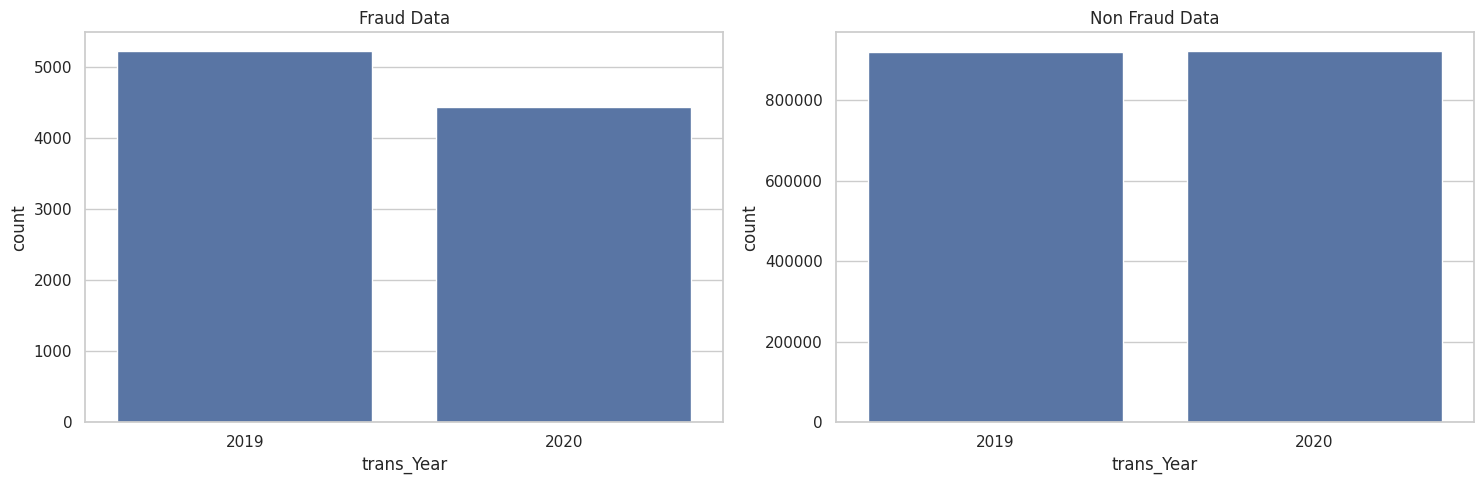

In [148]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for fraud data
sns.countplot(x='trans_Year', data=df_fraud, ax=axes[0])
axes[0].set_title('Fraud Data')

# Plot for non-fraud data
sns.countplot(x='trans_Year', data=df_nonfraud, ax=axes[1])
axes[1].set_title('Non Fraud Data')

plt.tight_layout()
plt.show()

- In comparison with 2020, count of fraud transactions in 2019 is on the higher side.
- Whereas count of non-fraudulent transaction are almost same in 2019 & 2020.

#### Fraud transaction based on gender

In [149]:
df_gender = df_data[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

Gender  gender_count    percent
0      F       1014749  54.780408
1      M        837645  45.219592

In [150]:

df_fraud_gender = df_data[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100


df_fraud_gender

Gender  is_fraud    count  gender_count  percent_grp
0      F         0  1009850       1014749    99.517221
1      F         1     4899       1014749     0.482779
2      M         0   832893        837645    99.432695
3      M         1     4752        837645     0.567305

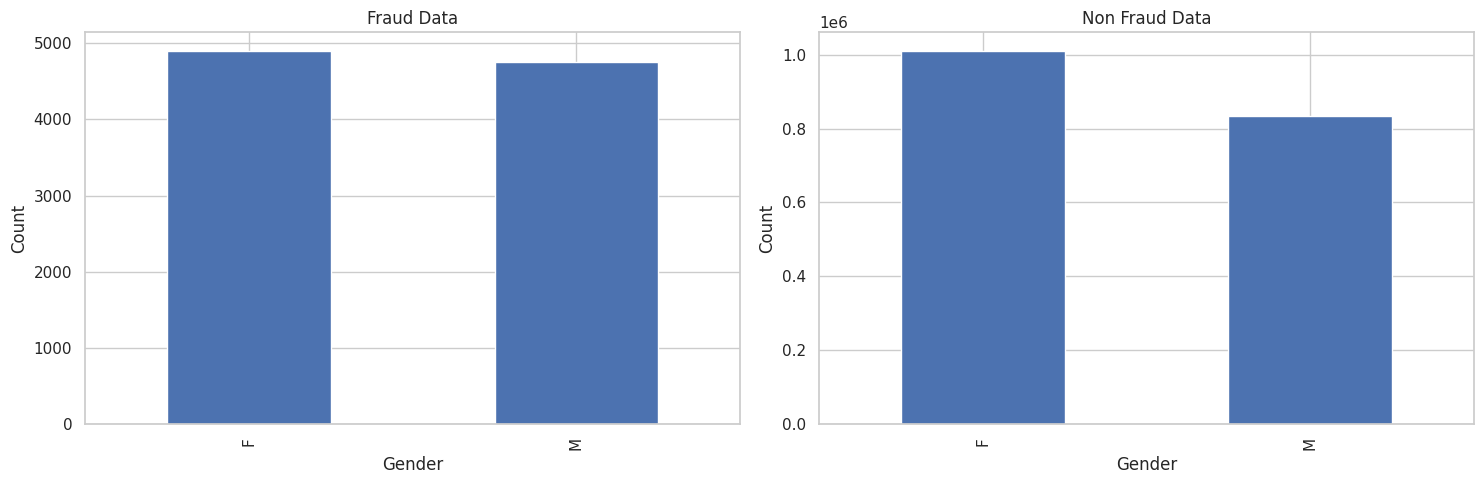

In [151]:
# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot countplot for fraud data
df_fraud['gender'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plot countplot for non-fraud data
df_nonfraud['gender'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- Frauds Transcations are done on both male and female card holders
- count of fraud transcations is slightly more on Female's credit card holders

#### Fraud transcations in different months

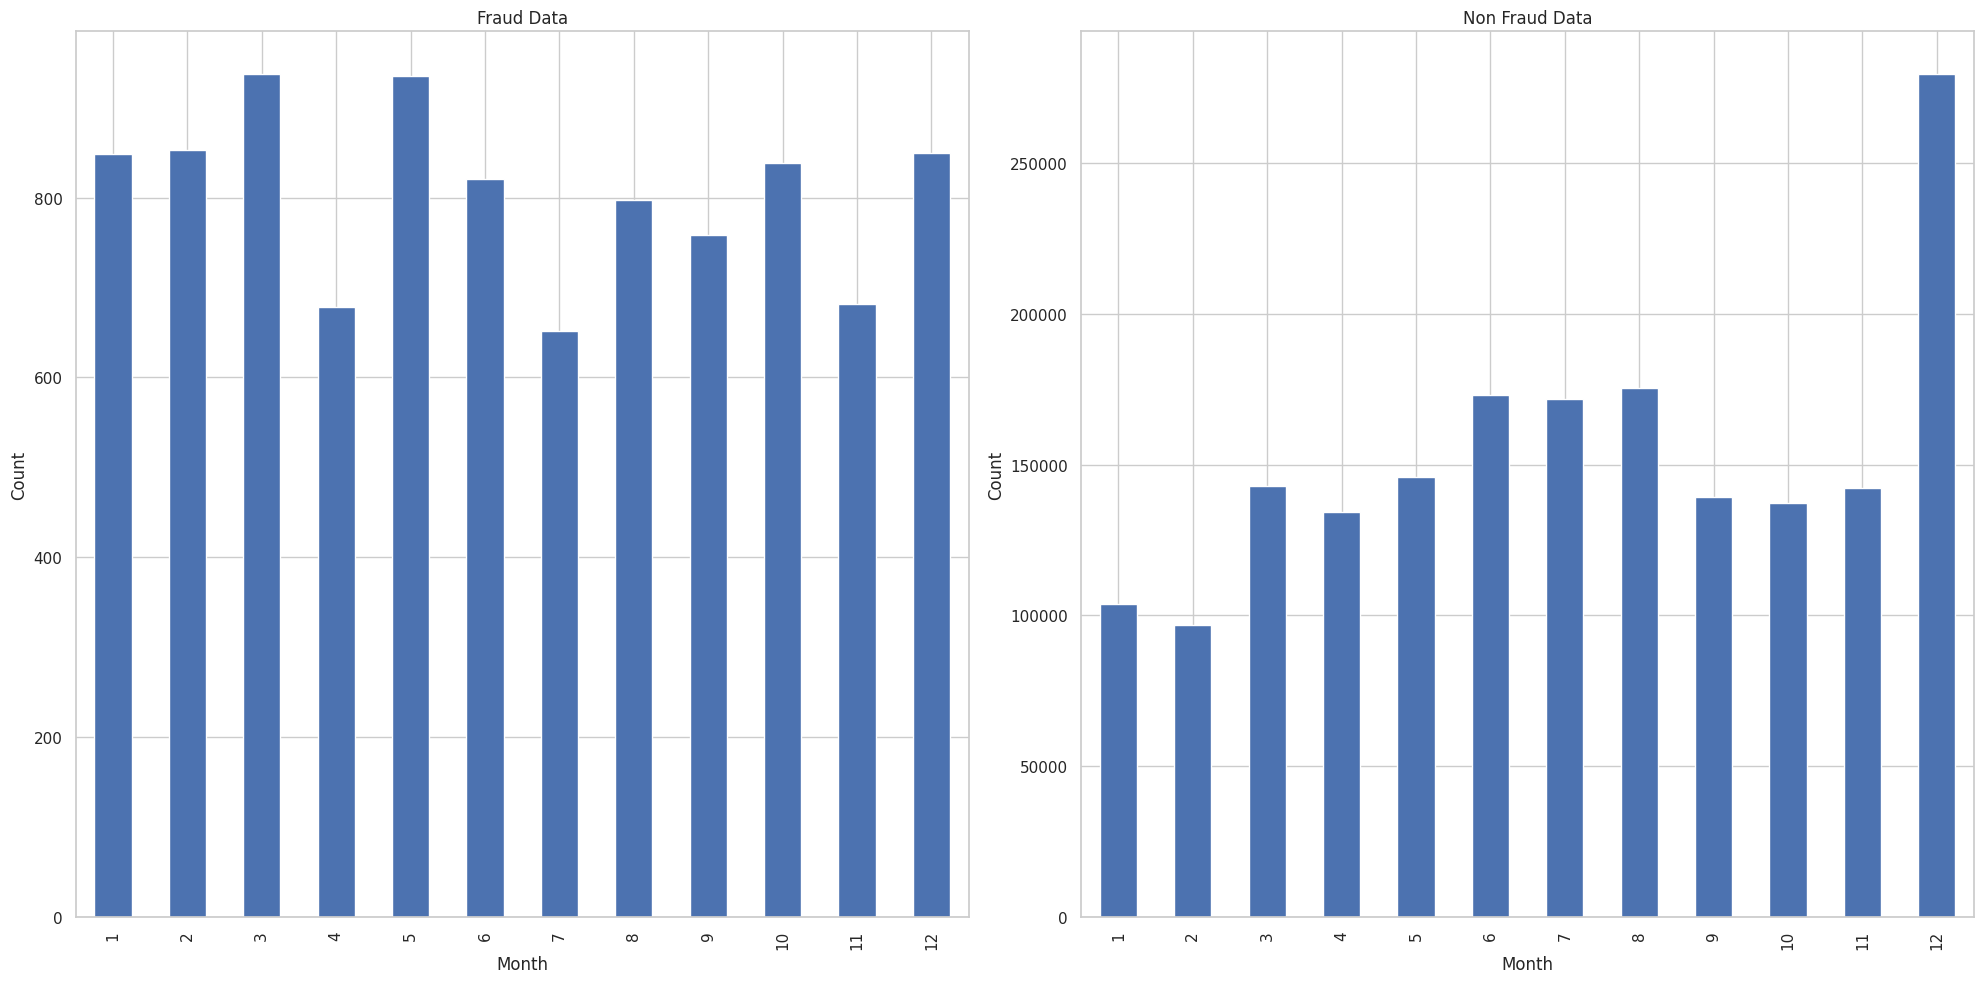

In [152]:
# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot countplot for fraud data
df_fraud['trans_Month'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')

# Plot countplot for non-fraud data
df_nonfraud['trans_Month'].value_counts().sort_index().plot(kind='bar', ax=axes[1])
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- Count of frauds transcations are more in 1st, 2nd, 3rd and 5th, 10th and 12th month where count of normal transcation is less.
- Count of frauds transcations is more in 12th month where count of normal transcation is also more

#### Fraud transactions in different weekdays

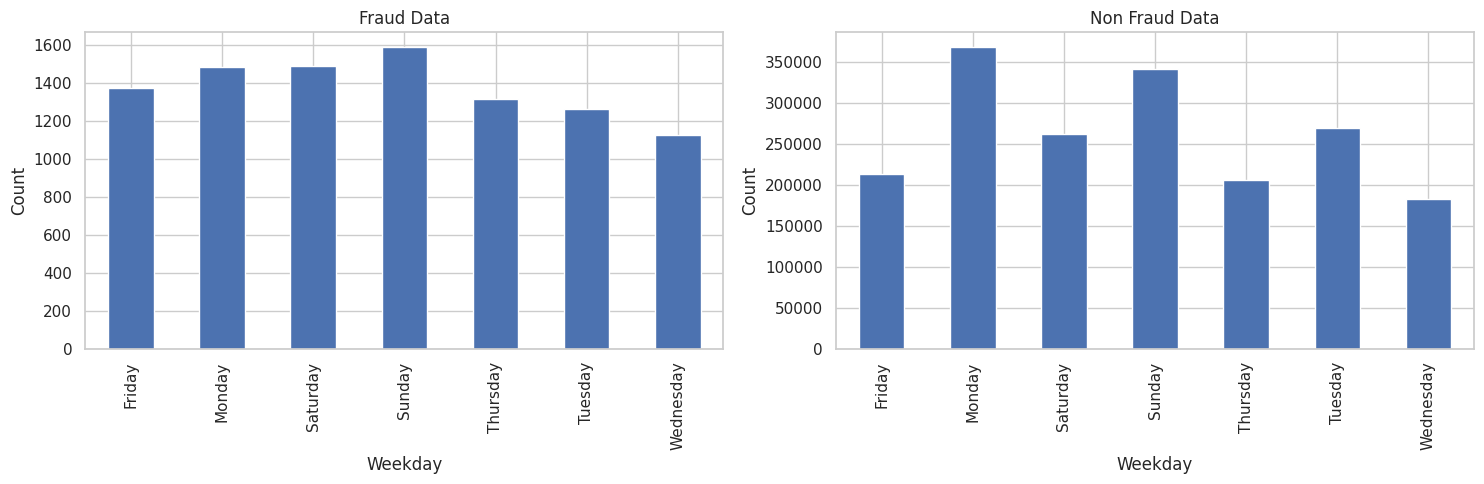

In [153]:
# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot countplot for fraud data
df_fraud['trans_weekday'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('Weekday')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot countplot for non-fraud data
df_nonfraud['trans_weekday'].value_counts().sort_index().plot(kind='bar', ax=axes[1])
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('Weekday')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- Count of frauds transactions are more on Sunday, Saturday and Monday
- count of normal transcation is less in Saturday and more in Sunday and Monday

#### Fraud transaction in different day of the month

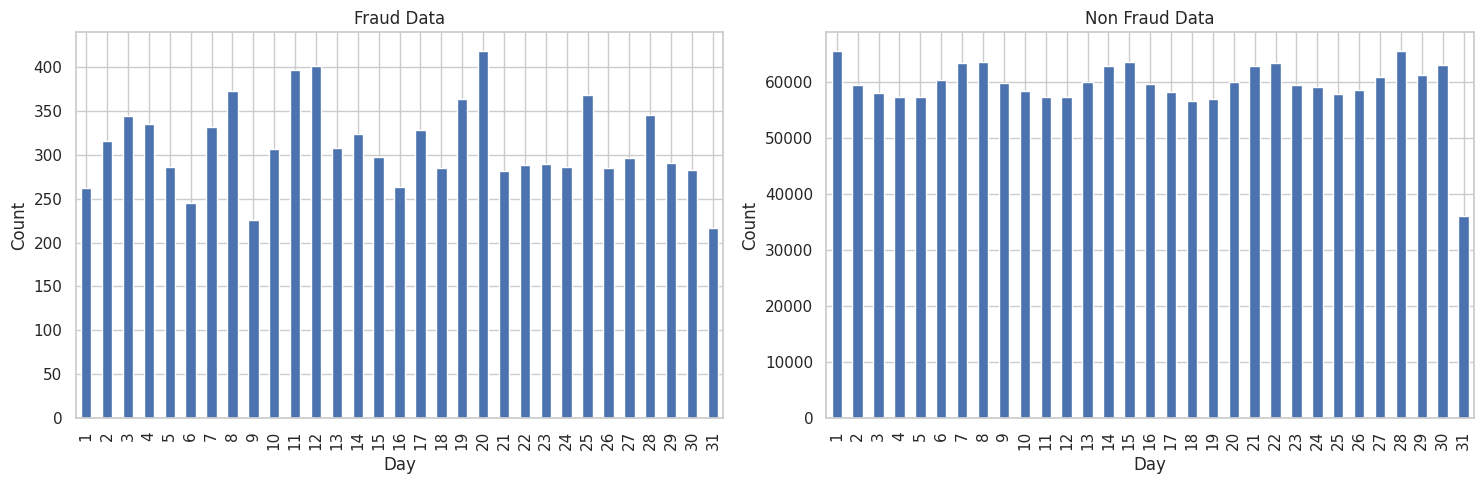

In [154]:
# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot countplot for fraud data
df_fraud['trans_Day'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot countplot for non-fraud data
df_nonfraud['trans_Day'].value_counts().sort_index().plot(kind='bar', ax=axes[1])
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- Count of Frauds transactions are more on 11th, 12th and 20th days of month.

#### Hourly based Fraud Transactions

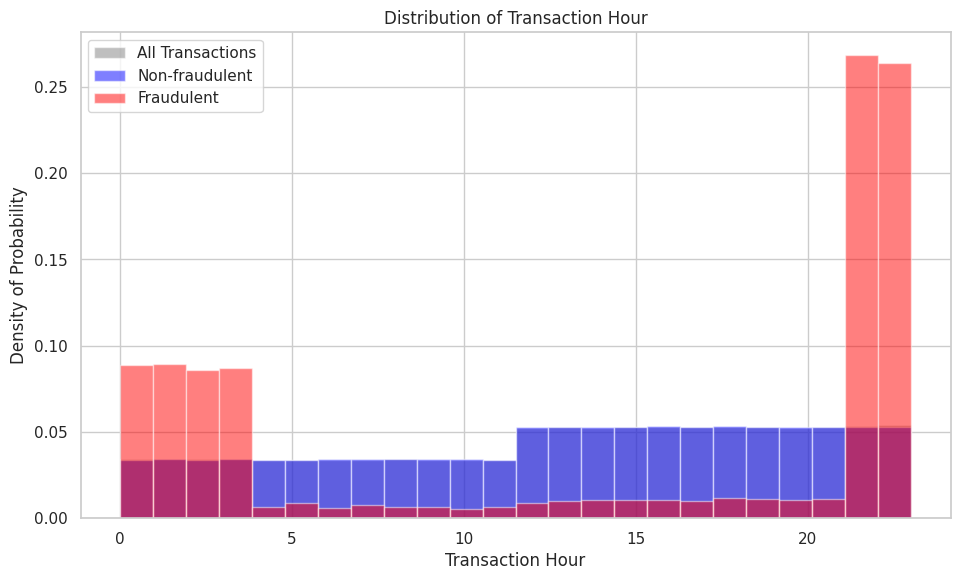

In [155]:
# Distribution plot for all transactions
plt.figure(figsize=(10, 6))
plt.title('Distribution of Transaction Hour')
plt.hist(df_data['trans_Hour'], bins=24, density=True, alpha=0.5, label='All Transactions', color='gray')

# Define target_0 and target_1
target_0 = df_data[df_data['is_fraud'] == 0]
target_1 = df_data[df_data['is_fraud'] == 1]

# Distribution plot for non-fraudulent transactions
plt.hist(target_0['trans_Hour'], bins=24, density=True, alpha=0.5, label='Non-fraudulent', color='blue')

# Distribution plot for fraudulent transactions
plt.hist(target_1['trans_Hour'], bins=24, density=True, alpha=0.5, label='Fraudulent', color='red')

plt.xlabel('Transaction Hour')
plt.ylabel('Density of Probability')
plt.legend()
plt.show()

- CFrauds Transcations are done at odd hours of the day i.e between 22 - 3 Hr.

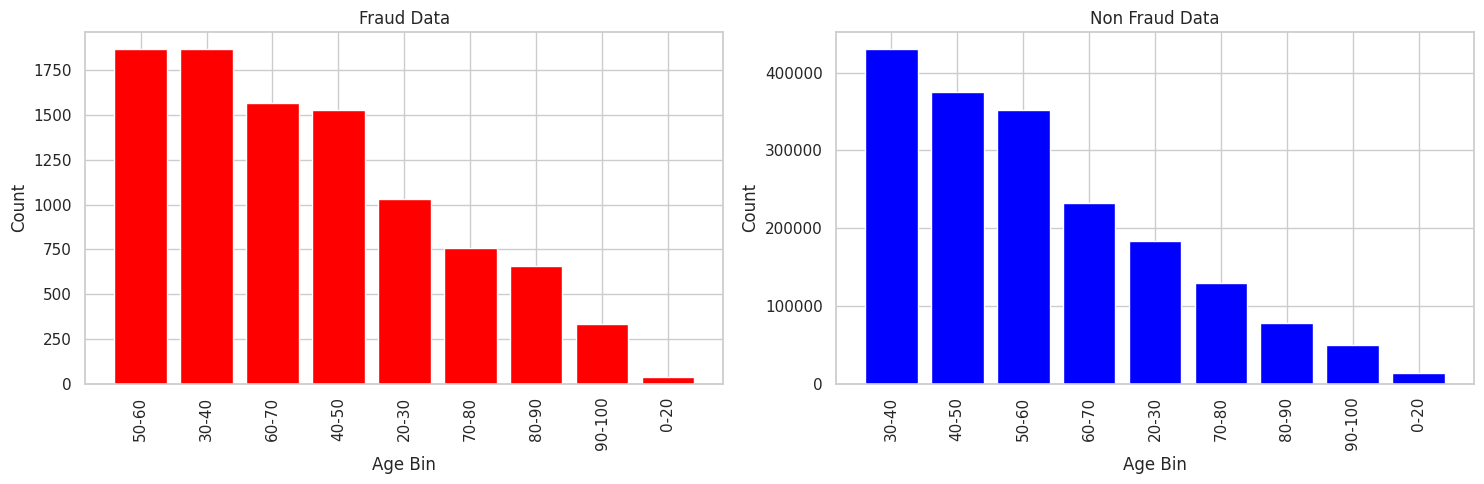

In [156]:
# Create a figure and axis for plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot count of transactions by age bin for fraud data
axes[0].bar(df_fraud['age_bin'].value_counts().index, df_fraud['age_bin'].value_counts().values, color='red')
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('Age Bin')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot count of transactions by age bin for non-fraud data
axes[1].bar(df_nonfraud['age_bin'].value_counts().index, df_nonfraud['age_bin'].value_counts().values, color='blue')
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('Age Bin')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

- Count of Frauds transactions are more on credit card holder's age group of 20 to 60
- Count of Frauds transactions are more on credit card holder's age group of 50 to 60 where as count of normal transactions is less in them.

#### Fraud Transactions in different categories

In [157]:
df_category = df_data[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

Category  category_count    percent
2    gas_transport          188029  10.150594
4      grocery_pos          176191   9.511529
6             home          175460   9.472067
12    shopping_pos          166463   8.986371
7        kids_pets          161727   8.730702
11    shopping_net          139322   7.521186
0    entertainment          134118   7.240252
1      food_dining          130729   7.057300
10   personal_care          130085   7.022534
5   health_fitness          122553   6.615925
9         misc_pos          114229   6.166561
8         misc_net           90654   4.893883
3      grocery_net           64878   3.502387
13          travel           57956   3.128708

In [158]:

df_fraud_category = df_data[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100
df_fraud_category.sort_values(by = ['category_count'], ascending=False)

Category  is_fraud   count  category_count    percent  percent_grp
4    gas_transport         0  187257          188029  10.150594    99.589425
5    gas_transport         1     772          188029  10.150594     0.410575
8      grocery_pos         0  173963          176191   9.511529    98.735463
9      grocery_pos         1    2228          176191   9.511529     1.264537
13            home         1     265          175460   9.472067     0.151032
12            home         0  175195          175460   9.472067    99.848968
25    shopping_pos         1    1056          166463   8.986371     0.634375
24    shopping_pos         0  165407          166463   8.986371    99.365625
14       kids_pets         0  161423          161727   8.730702    99.812029
15       kids_pets         1     304          161727   8.730702     0.187971
23    shopping_net         1    2219          139322   7.521186     1.592713
22    shopping_net         0  137103          139322   7.521186    98.407287
1    entertainment         1     292          134118   7.240252     0.217719
0    entertainment         0  133826          134118   7.240252    99.782281
3      food_dining         1     205          130729   7.057300     0.156813
2      food_dining         0  130524          130729   7.057300    99.843187
20   personal_care         0  129795          130085   7.022534    99.777069
21   personal_care         1     290          130085   7.022534     0.222931
11  health_fitness         1     185          122553   6.615925     0.150955
10  health_fitness         0  122368          122553   6.615925    99.849045
18        misc_pos         0  113907          114229   6.166561    99.718110
19        misc_pos         1     322          114229   6.166561     0.281890
16        misc_net         0   89472           90654   4.893883    98.696141
17        misc_net         1    1182           90654   4.893883     1.303859
7      grocery_net         1     175           64878   3.502387     0.269737
6      grocery_net         0   64703           64878   3.502387    99.730263
26          travel         0   57800           57956   3.128708    99.730830
27          travel         1     156           57956   3.128708     0.269170

In [159]:
df_fraud_cat=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'], ascending=False)
df_fraud_cat

Category  is_fraud  count  category_count    percent  percent_grp
23    shopping_net         1   2219          139322   7.521186     1.592713
17        misc_net         1   1182           90654   4.893883     1.303859
9      grocery_pos         1   2228          176191   9.511529     1.264537
25    shopping_pos         1   1056          166463   8.986371     0.634375
5    gas_transport         1    772          188029  10.150594     0.410575
19        misc_pos         1    322          114229   6.166561     0.281890
7      grocery_net         1    175           64878   3.502387     0.269737
27          travel         1    156           57956   3.128708     0.269170
21   personal_care         1    290          130085   7.022534     0.222931
1    entertainment         1    292          134118   7.240252     0.217719
15       kids_pets         1    304          161727   8.730702     0.187971
3      food_dining         1    205          130729   7.057300     0.156813
13            home         1    265          175460   9.472067     0.151032
11  health_fitness         1    185          122553   6.615925     0.150955

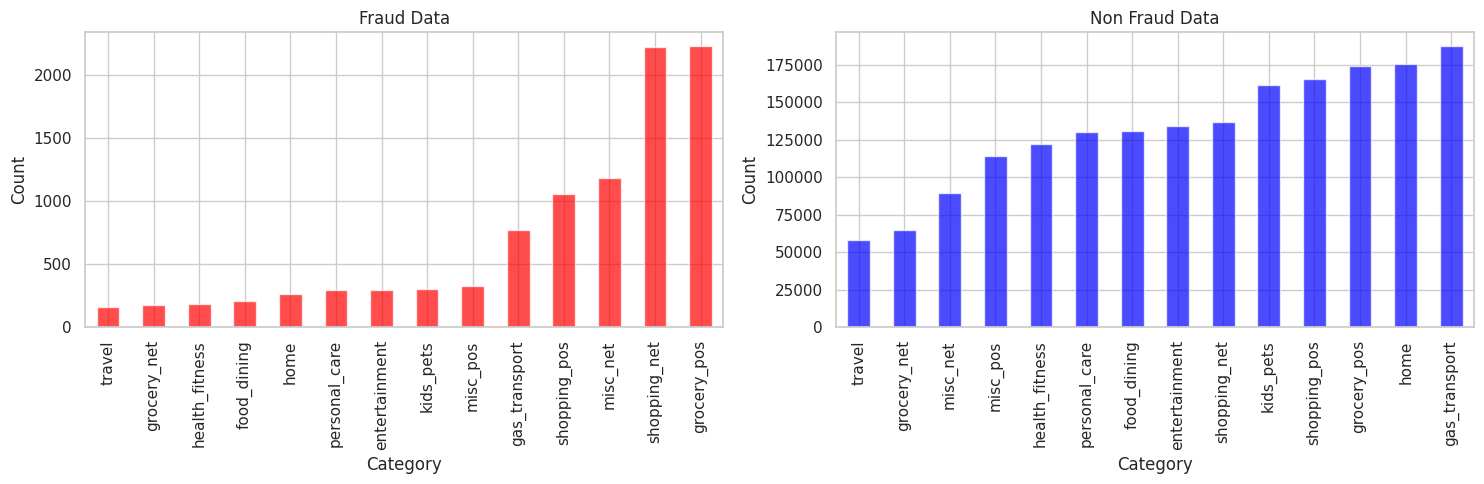

In [160]:
# Create a figure and axis for plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot bar plot for 'category' feature in fraud data
df_fraud['category'].value_counts().sort_values().plot(kind='bar', ax=axes[0], color='red', alpha=0.7)
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot bar plot for 'category' feature in non-fraud data
df_nonfraud['category'].value_counts().sort_values().plot(kind='bar', ax=axes[1], color='blue', alpha=0.7)
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

- Count of Frauds transactions are done more at grocery_pos, shopping_net, misc_net, shopping_pos, gas_transport Categories
- Count of Frauds transactions is more in shopping_net where count of normal transaction is less.
- Count of Frauds transactions is slightly less in gas_transport, shopping_pos where count of normal transaction is more.

#### Fraud Transactions in different job

In [161]:
df_job = df_data[['job','trans_num']].groupby(['job']).count().reset_index()
df_job.columns = ['Job','job_count']

df_job['percent'] = (df_job['job_count']/df_job['job_count'].sum())*100

df_job.sort_values(by = ['percent'], ascending=False)

Job  job_count    percent
29                  Engineer     198297  10.704904
59                    OTHERS     192699  10.402701
61                   Officer     153068   8.263253
50                   Manager      88570   4.781380
77                 Scientist      87781   4.738787
..                       ...        ...        ...
38                    Gaffer       4395   0.237261
72  Radiographer, diagnostic       4394   0.237207
69           Producer, radio       4394   0.237207
55               Music tutor       4392   0.237099
45     Journalist, newspaper       4389   0.236937

[92 rows x 3 columns]

In [162]:

df_fraud_job = df_data[['job','is_fraud','trans_num']].groupby(['job','is_fraud']).count().reset_index()
df_fraud_job.columns = ['Job','is_fraud','count']

df_fraud_job = df_fraud_job.merge(df_job[['Job','job_count','percent']],how='inner',\
                                  left_on='Job',right_on='Job')


df_fraud_job['percent_grp'] = (df_fraud_job['count']/df_fraud_job['job_count'])*100
df_fraud_job.sort_values(by = ['job_count'], ascending=False)

Job  is_fraud   count  job_count    percent  \
58                   Engineer         0  197336     198297  10.704904   
59                   Engineer         1     961     198297  10.704904   
118                    OTHERS         0  191464     192699  10.402701   
119                    OTHERS         1    1235     192699  10.402701   
123                   Officer         1     927     153068   8.263253   
..                        ...       ...     ...        ...        ...   
145  Radiographer, diagnostic         1      21       4394   0.237207   
110               Music tutor         0    4372       4392   0.237099   
111               Music tutor         1      20       4392   0.237099   
91      Journalist, newspaper         1      16       4389   0.236937   
90      Journalist, newspaper         0    4373       4389   0.236937   

     percent_grp  
58     99.515373  
59      0.484627  
118    99.359104  
119     0.640896  
123     0.605613  
..           ...  
145     0.477924  
110    99.544627  
111     0.455373  
91      0.364548  
90     99.635452  

[184 rows x 6 columns]

In [163]:
df_fraud_job[df_fraud_job['is_fraud'] == 1].sort_values(by = ['percent_grp'], ascending=False)

Job  is_fraud  count  job_count  \
157  Senior tax professional/tax inspector         1     57       5877   
37                             Conservator         1     55       5880   
61                               Executive         1    112      12474   
29                                 Chemist         1     86      10276   
63                   Exercise physiologist         1     41       5132   
..                                     ...       ...    ...        ...   
27                 Chartered loss adjuster         1     15       7296   
147              Radiographer, therapeutic         1     12       5839   
181                    Trade mark attorney         1     15       7304   
71                             Firefighter         1     13       8021   
103           Medical sales representative         1     10       7309   

      percent  percent_grp  
157  0.317265     0.969883  
37   0.317427     0.935374  
61   0.673399     0.897868  
29   0.554742     0.836902  
63   0.277047     0.798909  
..        ...          ...  
27   0.393869     0.205592  
147  0.315214     0.205515  
181  0.394301     0.205367  
71   0.433007     0.162075  
103  0.394570     0.136818  

[92 rows x 6 columns]

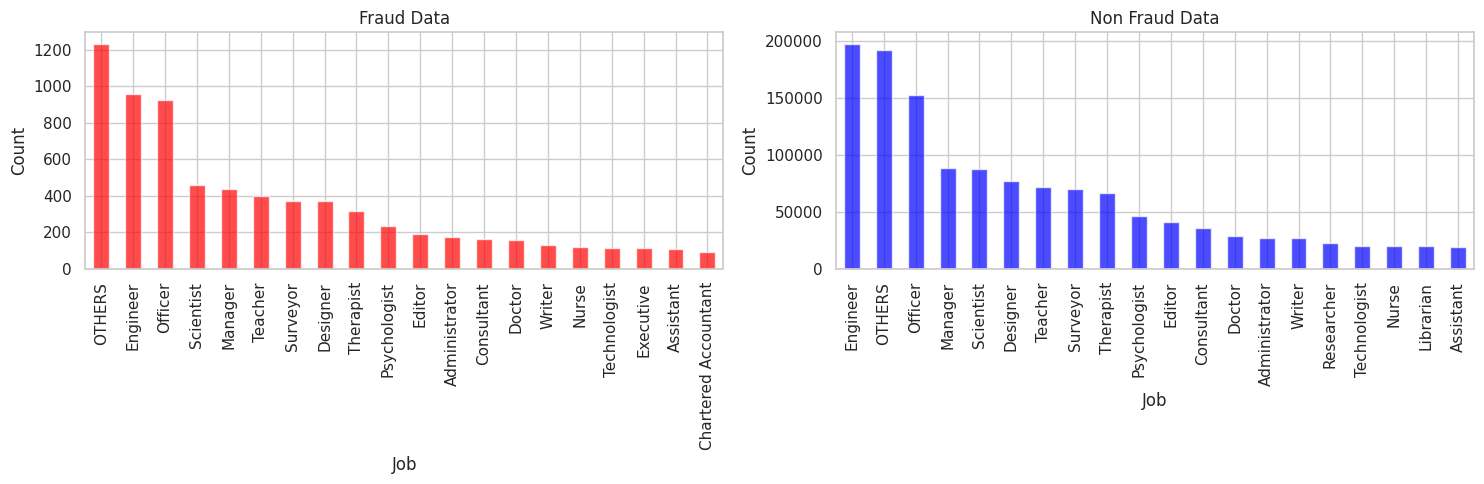

In [164]:
# Get the top 20 job categories for fraud and non-fraud data
top_fraud_jobs = df_fraud['job'].value_counts().iloc[:20]
top_nonfraud_jobs = df_nonfraud['job'].value_counts().iloc[:20]

# Create a figure and axis for plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot bar plot for top job categories in fraud data
top_fraud_jobs.plot(kind='bar', ax=axes[0], color='red', alpha=0.7)
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('Job')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot bar plot for top job categories in non-fraud data
top_nonfraud_jobs.plot(kind='bar', ax=axes[1], color='blue', alpha=0.7)
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('Job')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

- Count of Frauds transactions are done more to people with occupations as Engineer, officer, others, scientist, Manager, Teacher

#### Fraud Transactions in different State

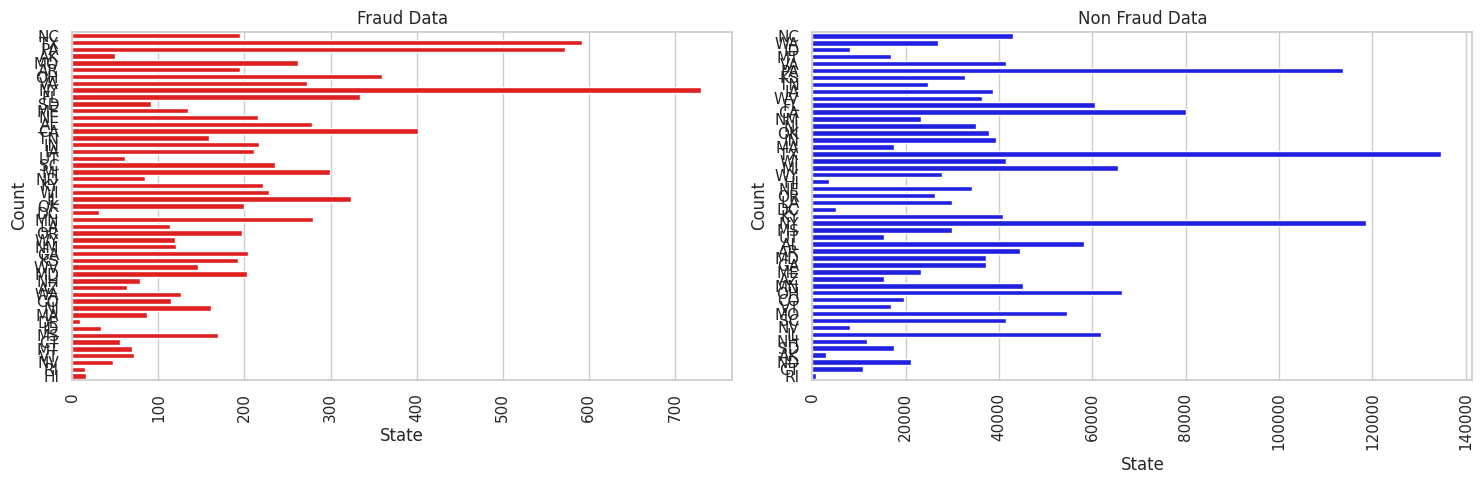

In [165]:
# Define colors for fraud and non-fraud data
fraud_color = 'red'
nonfraud_color = 'blue'

# Create a figure and axis for plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot countplot for state in fraud data
sns.countplot(df_fraud['state'], ax=axes[0], color=fraud_color)
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot countplot for state in non-fraud data
sns.countplot(df_nonfraud['state'], ax=axes[1], color=nonfraud_color)
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

- Count of Frauds transactions are more in NY, TX and PA States.

#### Fraud Transactions in different State_bin(region)

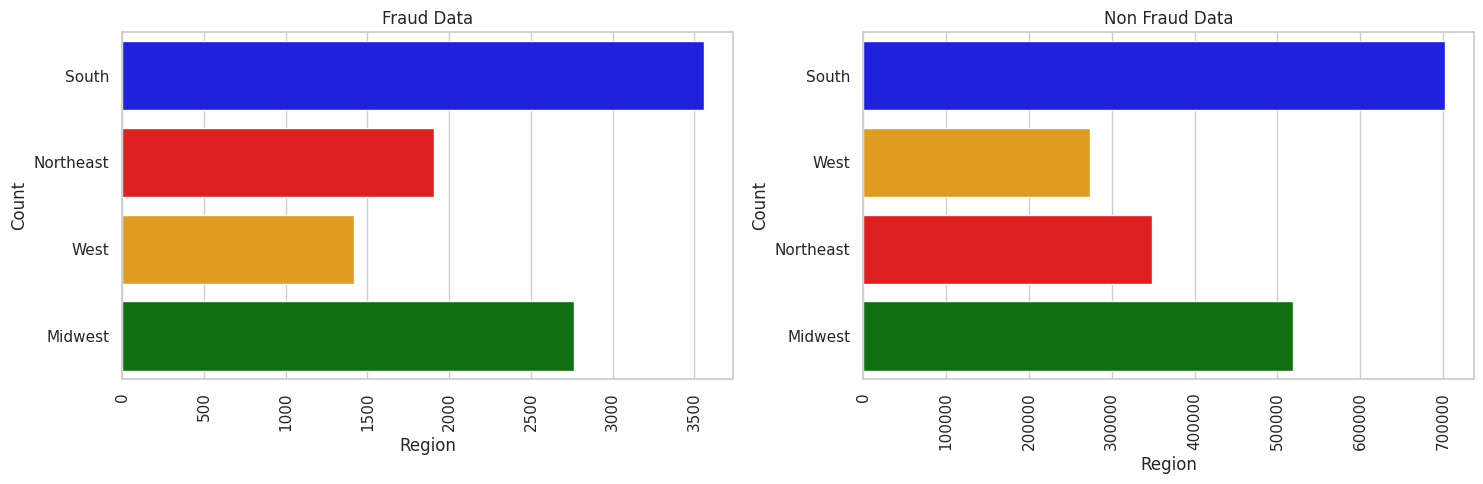

In [166]:
# Define colors for different regions
region_colors = {
    'Northeast': 'red',
    'South': 'blue',
    'Midwest': 'green',
    'West': 'orange'
}

# Create a figure and axis for plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot countplot for state_bin in fraud data
sns.countplot(df_fraud['state_bin'], ax=axes[0], palette=region_colors)
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot countplot for state_bin in non-fraud data
sns.countplot(df_nonfraud['state_bin'], ax=axes[1], palette=region_colors)
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

- Count of Frauds transactions are more in South and Midwest region.

#### Fraud Transactions in different city (top 20)

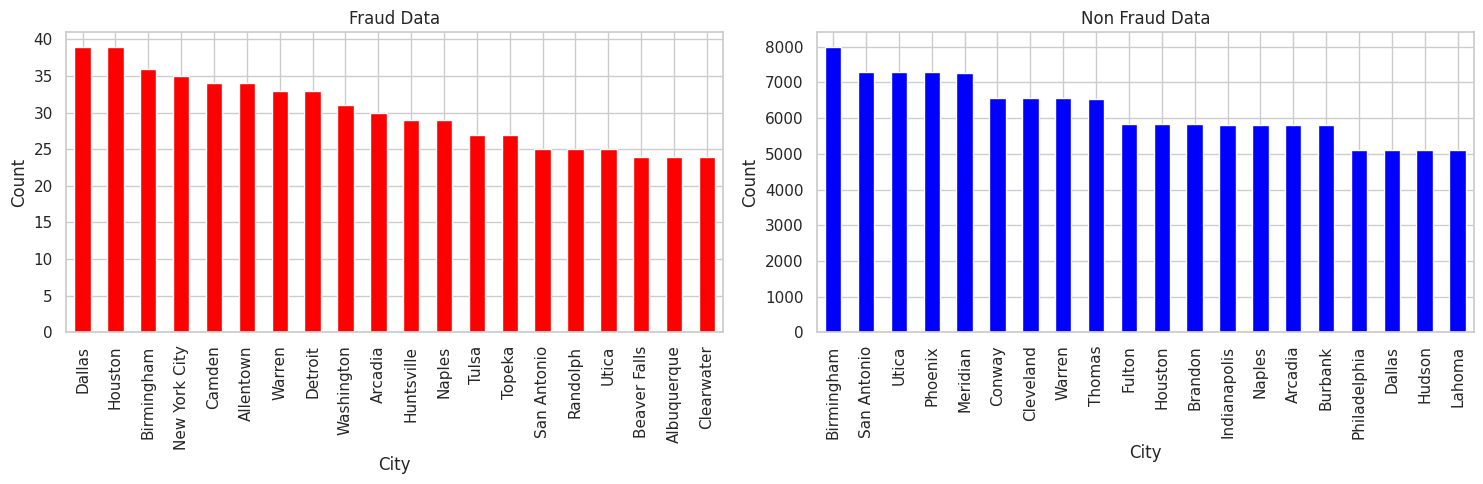

In [167]:
# Create a figure and axis for plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot countplot for city in fraud data
df_fraud['city'].value_counts().head(20).plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot countplot for city in non-fraud data
df_nonfraud['city'].value_counts().head(20).plot(kind='bar', ax=axes[1], color='blue')
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

- Count of Frauds transactions are more in Dallas, Houston and Birmingham and New York City.

#### Fraud Transactions in different street(top 20)

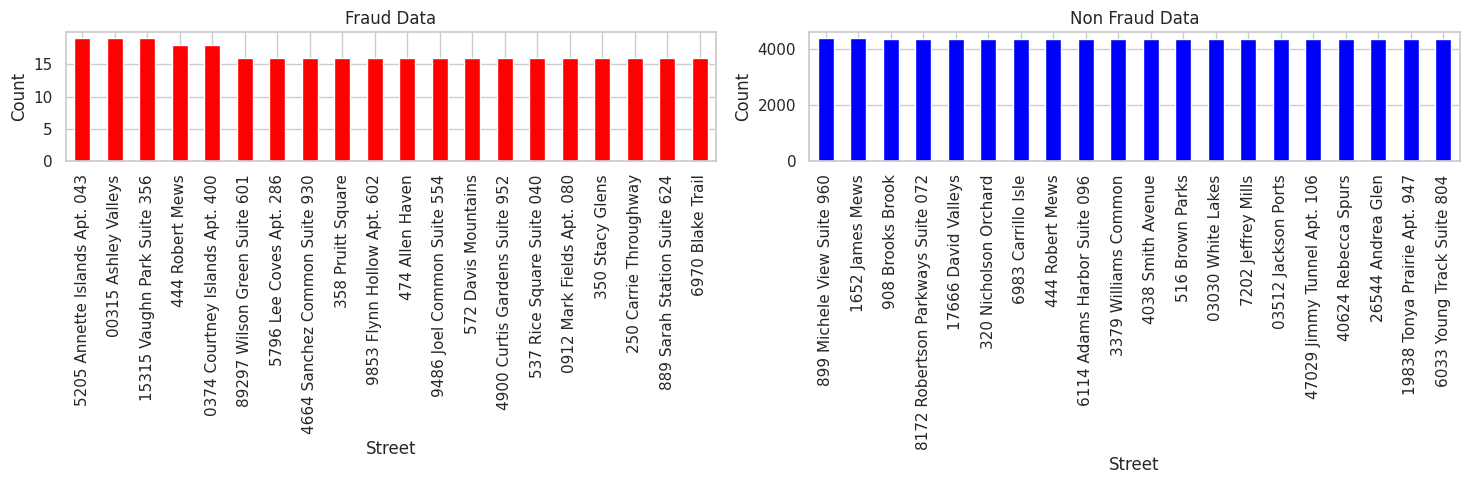

In [168]:
# Create a figure and axis for plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot countplot for street in fraud data
df_fraud['street'].value_counts().head(20).plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('Street')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot countplot for street in non-fraud data
df_nonfraud['street'].value_counts().head(20).plot(kind='bar', ax=axes[1], color='blue')
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('Street')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

- Count of Frauds transactions are more in 00315 Ashley Valleys, 15315 Vaughn Park Suite 356 and 5205 Annette Islands Apt. 043 street.

#### Fraud Transactions in different Merchant(top 20)

In [169]:
df_merchant = df_data[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percent'], ascending=False)

Merchant  merchant_count   percent
316                      fraud_Kilback LLC            6262  0.338049
105                      fraud_Cormier LLC            5246  0.283201
571                       fraud_Schumm PLC            5195  0.280448
349                         fraud_Kuhn LLC            5031  0.271594
70                         fraud_Boyer PLC            4999  0.269867
..                                     ...             ...       ...
143    fraud_Douglas, DuBuque and McKenzie            1101  0.059437
633                     fraud_Treutel-King            1098  0.059275
544                 fraud_Satterfield-Lowe            1095  0.059113
221     fraud_Hahn, Douglas and Schowalter            1091  0.058897
516  fraud_Ritchie, Bradtke and Stiedemann            1090  0.058843

[693 rows x 3 columns]

In [170]:

df_fraud_merchant = df_data[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100
df_fraud_merchant.sort_values(by = ['merchant_count'], ascending=False)

Merchant  is_fraud  count  merchant_count  \
631                       fraud_Kilback LLC         1     62            6262   
630                       fraud_Kilback LLC         0   6200            6262   
211                       fraud_Cormier LLC         1     53            5246   
210                       fraud_Cormier LLC         0   5193            5246   
1135                       fraud_Schumm PLC         0   5154            5195   
...                                     ...       ...    ...             ...   
1082                 fraud_Satterfield-Lowe         0   1091            1095   
1083                 fraud_Satterfield-Lowe         1      4            1095   
442      fraud_Hahn, Douglas and Schowalter         1      5            1091   
441      fraud_Hahn, Douglas and Schowalter         0   1086            1091   
1027  fraud_Ritchie, Bradtke and Stiedemann         0   1090            1090   

       percent  percent_grp  
631   0.338049     0.990099  
630   0.338049    99.009901  
211   0.283201     1.010294  
210   0.283201    98.989706  
1135  0.280448    99.210780  
...        ...          ...  
1082  0.059113    99.634703  
1083  0.059113     0.365297  
442   0.058897     0.458295  
441   0.058897    99.541705  
1027  0.058843   100.000000  

[1378 rows x 6 columns]

In [171]:
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending=False)

Merchant  is_fraud  count  merchant_count  \
673                     fraud_Kozey-Boehm         1     60            2758   
490     fraud_Herman, Treutel and Dickens         1     38            1870   
1226                     fraud_Terry-Huel         1     56            2864   
607                 fraud_Kerluke-Abshire         1     50            2635   
884   fraud_Mosciski, Ziemann and Farrell         1     53            2821   
...                                   ...       ...    ...             ...   
775        fraud_Lesch, D'Amore and Brown         1      1            2659   
1089        fraud_Schaefer, Fay and Hilll         1      1            2664   
950       fraud_Parker, Nolan and Trantow         1      1            2795   
1335                    fraud_Windler LLC         1      1            3170   
977   fraud_Prosacco, Kreiger and Kovacek         1      1            3454   

       percent  percent_grp  
673   0.148888     2.175489  
490   0.100950     2.032086  
1226  0.154611     1.955307  
607   0.142248     1.897533  
884   0.152289     1.878766  
...        ...          ...  
775   0.143544     0.037608  
1089  0.143814     0.037538  
950   0.150886     0.035778  
1335  0.171130     0.031546  
977   0.186461     0.028952  

[685 rows x 6 columns]

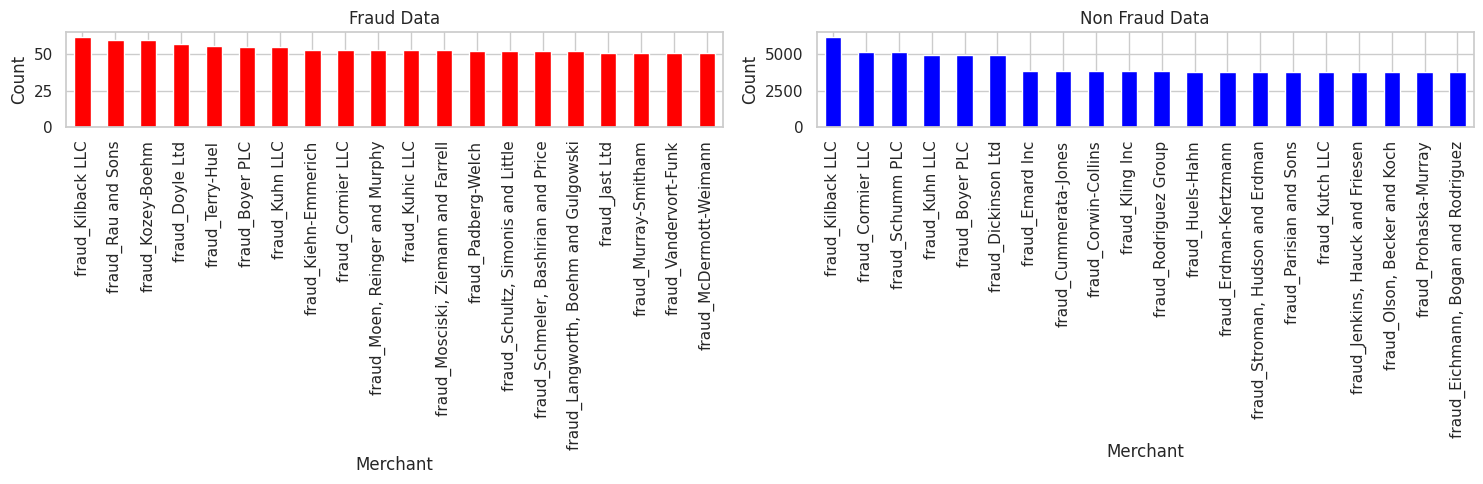

In [172]:
# Create a figure and axis for plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot countplot for merchant in fraud data
df_fraud['merchant'].value_counts().head(20).plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('Merchant')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot countplot for merchant in non-fraud data
df_nonfraud['merchant'].value_counts().head(20).plot(kind='bar', ax=axes[1], color='blue')
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('Merchant')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

- Count of Frauds transactions are more in fraud_Kilback LLC, fraud_Kozey-Boehm and fraud_Rau and Sons merchants.

#### Distribution of Overall amount, Fraud amount and non Fraud amount.

In [173]:
# Compute overall amt distribution
overall_amt_desc = df_data['amt'].describe(percentiles=[0.5, 0.95, 0.999]).reset_index()
overall_amt_desc.rename(columns={'index': 'Row Type', 'amt': 'Overall Amt Distribution'}, inplace=True)

# Compute non-fraud amt distribution
non_fraud_amt_desc = df_data.loc[df_data['is_fraud'] == 0, 'amt'].describe(percentiles=[0.5, 0.95, 0.999])
non_fraud_amt_desc = non_fraud_amt_desc.reset_index().rename(columns={'index': 'Row Type', 'amt': 'Non Fraud Amt Distribution'})

# Compute fraud amt distribution
fraud_amt_desc = df_data.loc[df_data['is_fraud'] == 1, 'amt'].describe(percentiles=[0.5, 0.95, 0.999])
fraud_amt_desc = fraud_amt_desc.reset_index().rename(columns={'index': 'Row Type', 'amt': 'Fraud Amt Distribution'})

# Concatenate the results into a single DataFrame
result_df = pd.concat([overall_amt_desc, non_fraud_amt_desc, fraud_amt_desc], axis=1)

In [174]:
result_df

Row Type  Overall Amt Distribution Row Type  Non Fraud Amt Distribution  \
0    count              1.852394e+06    count                1.842743e+06   
1     mean              7.006357e+01     mean                6.765128e+01   
2      std              1.592540e+02      std                1.535481e+02   
3      min              1.000000e+00      min                1.000000e+00   
4      50%              4.745000e+01      50%                4.724000e+01   
5      95%              1.953400e+02      95%                1.895900e+02   
6    99.9%              1.517241e+03    99.9%                1.519623e+03   
7      max              2.894890e+04      max                2.894890e+04   

  Row Type  Fraud Amt Distribution  
0    count             9651.000000  
1     mean              530.661412  
2      std              391.028873  
3      min                1.060000  
4      50%              390.000000  
5      95%             1084.090000  
6    99.9%             1293.127000  
7      max             1376.040000

- Distribution and Mean of Fraud Transaction's Amount is way different from the Non Fraud Transaction's Amount
  1. Mean of Non Fraud Transactions: 6.76
  2. Mean of Fraud Transactions: 530.6 

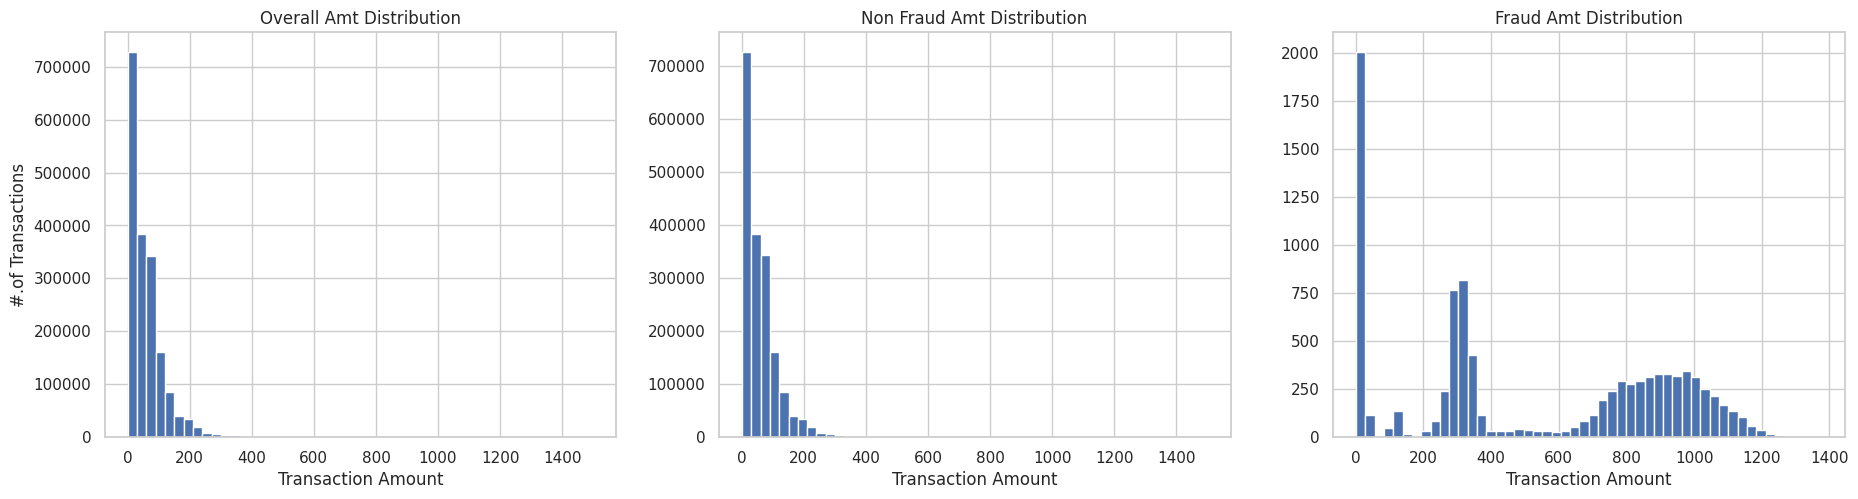

In [175]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df_data[df_data['amt']<=1500]['amt'], bins=50)
ax[1].hist(df_data[(df_data['is_fraud']==0) & (df_data['amt']<=1500)]['amt'], bins=50)
ax[2].hist(df_data[(df_data['is_fraud']==1) & (df_data['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

- Distribution of amount for fraud transaction is more widely spread as compare to non fraud transaction and major frauds happen at lower amounts.

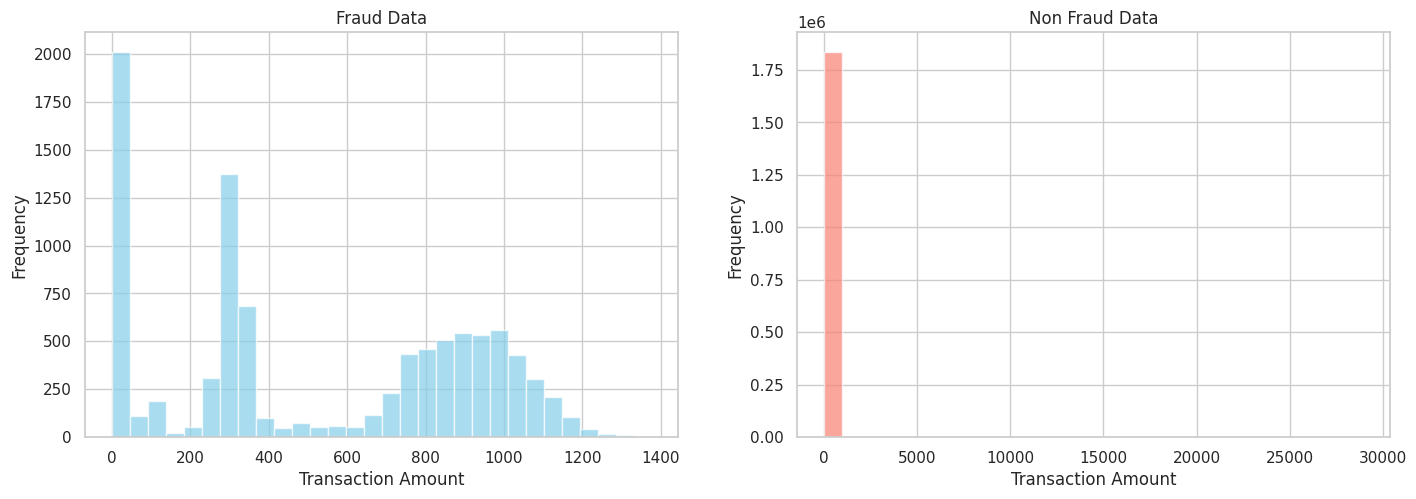

In [176]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot distribution of transaction amounts for fraud data
axes[0].hist(df_fraud['amt'], bins=30, color='skyblue', alpha=0.7)
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('Transaction Amount')
axes[0].set_ylabel('Frequency')

# Plot distribution of transaction amounts for non-fraud data
axes[1].hist(df_nonfraud['amt'], bins=30, color='salmon', alpha=0.7)
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('Transaction Amount')
axes[1].set_ylabel('Frequency')

plt.show()

- Distribution of amount for fraud transaction is more widely spread as compare to non fraud transaction and major frauds happen at lower amounts and major frauds happen at lower amounts.

#### Fraud Transactions in different city population

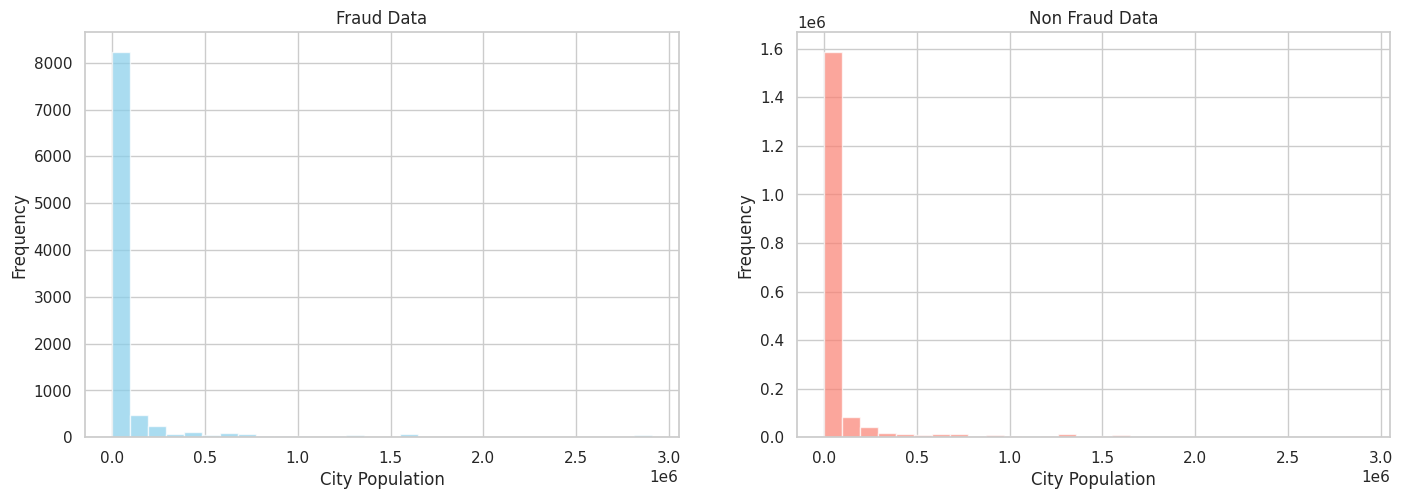

In [177]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot distribution of city population for fraud data
axes[0].hist(df_fraud['city_pop'], bins=30, color='skyblue', alpha=0.7)
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('City Population')
axes[0].set_ylabel('Frequency')

# Plot distribution of city population for non-fraud data
axes[1].hist(df_nonfraud['city_pop'], bins=30, color='salmon', alpha=0.7)
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('City Population')
axes[1].set_ylabel('Frequency')

plt.show()

- Distribution of city_pop is same for fraud and non fraud Transcations data .

#### Fraud Transactions in different 30 Days Transactions by Customers

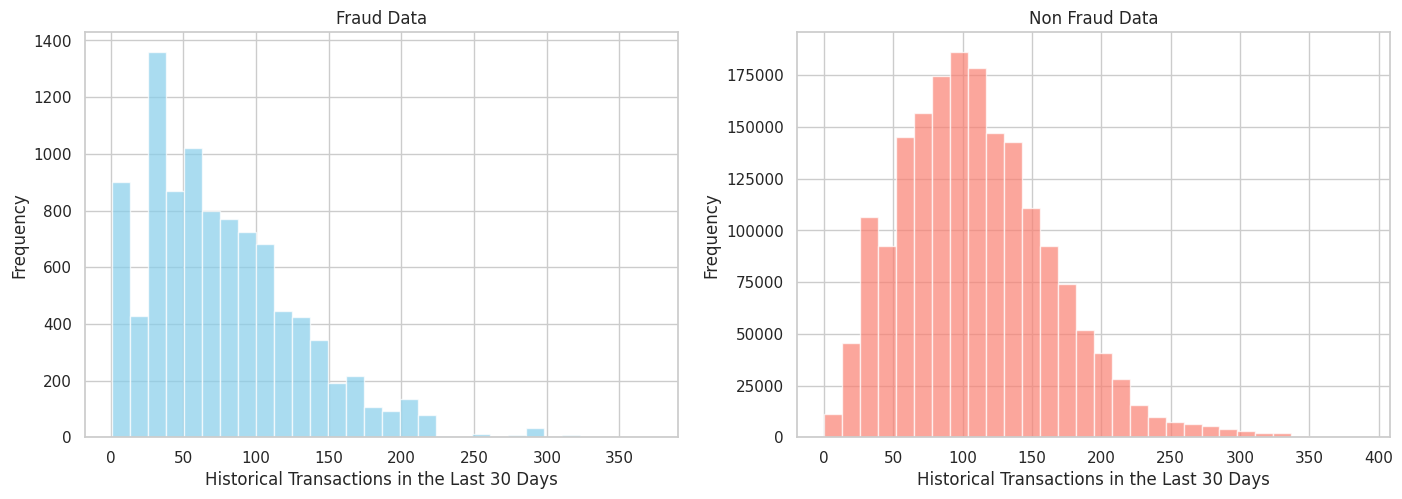

In [178]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot distribution of historical transactions in the last 30 days for fraud data
axes[0].hist(df_fraud['hist_trans_30d'], bins=30, color='skyblue', alpha=0.7)
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('Historical Transactions in the Last 30 Days')
axes[0].set_ylabel('Frequency')

# Plot distribution of historical transactions in the last 30 days for non-fraud data
axes[1].hist(df_nonfraud['hist_trans_30d'], bins=30, color='salmon', alpha=0.7)
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('Historical Transactions in the Last 30 Days')
axes[1].set_ylabel('Frequency')

plt.show()

- Distribution of hist_trans_30d for fraud and non fraud Transcations data.

#### Fraud Transactions in different 24 Hours Orders by Customers

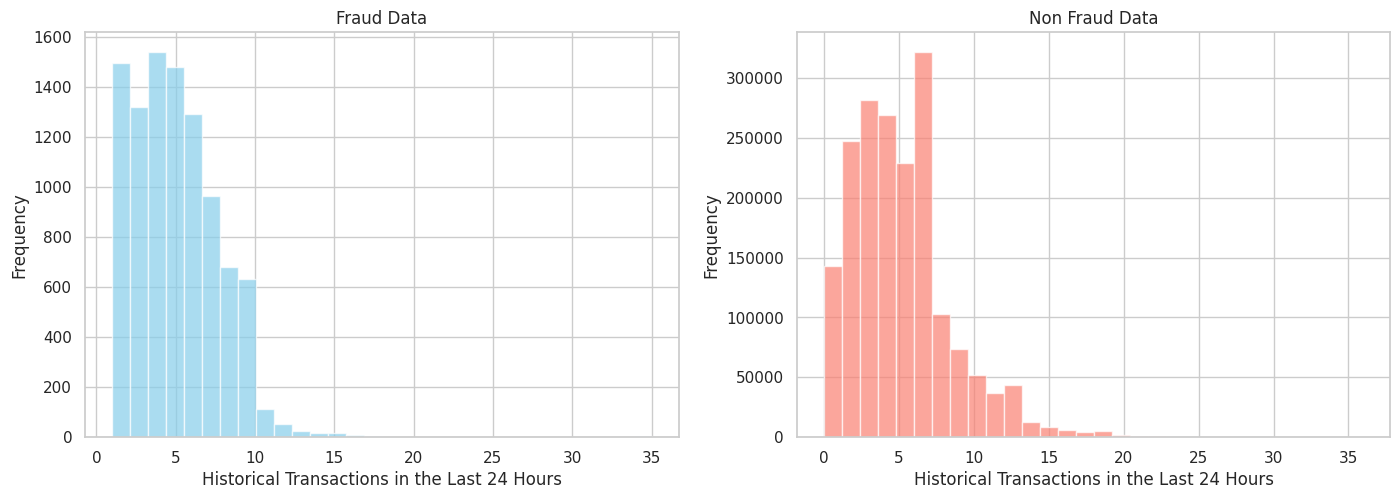

In [179]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot distribution of historical transactions in the last 24 hours for fraud data
axes[0].hist(df_fraud['hist_trans_24h'], bins=30, color='skyblue', alpha=0.7)
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('Historical Transactions in the Last 24 Hours')
axes[0].set_ylabel('Frequency')

# Plot distribution of historical transactions in the last 24 hours for non-fraud data
axes[1].hist(df_nonfraud['hist_trans_24h'], bins=30, color='salmon', alpha=0.7)
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('Historical Transactions in the Last 24 Hours')
axes[1].set_ylabel('Frequency')

plt.show()

- Distribution of hist_trans_24h for fraud and non fraud Transcations data.

#### Fraud Transactions in different 30 Day Orders Amt Avg by Customers

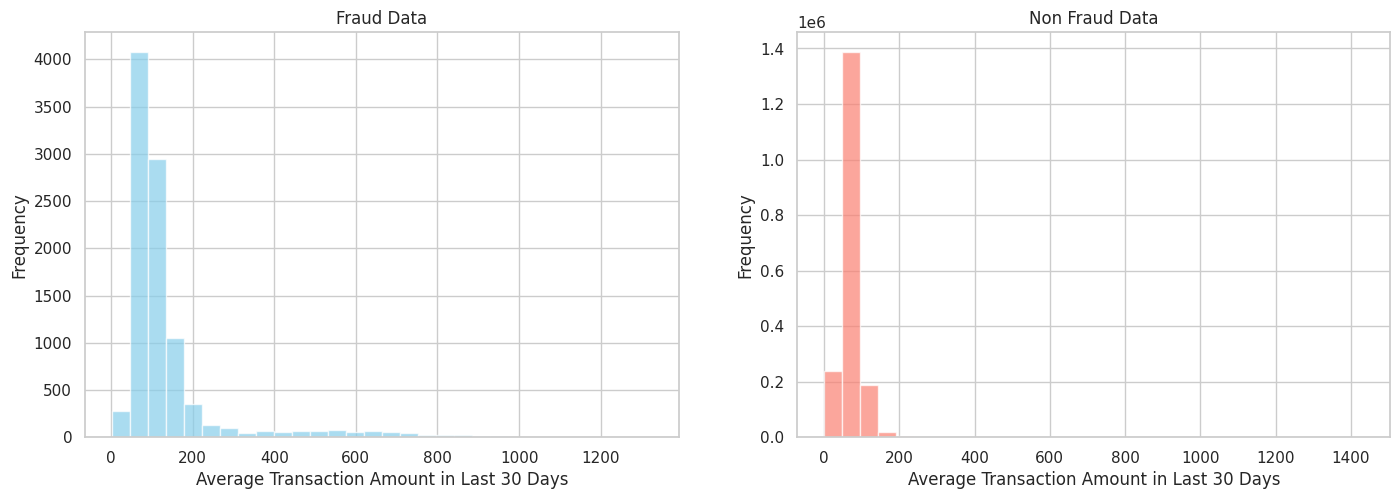

In [180]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot distribution of average transaction amount over the last 30 days for fraud data
axes[0].hist(df_fraud['hist_trans_avg_amt_30d'], bins=30, color='skyblue', alpha=0.7)
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('Average Transaction Amount in Last 30 Days')
axes[0].set_ylabel('Frequency')

# Plot distribution of average transaction amount over the last 30 days for non-fraud data
axes[1].hist(df_nonfraud['hist_trans_avg_amt_30d'], bins=30, color='salmon', alpha=0.7)
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('Average Transaction Amount in Last 30 Days')
axes[1].set_ylabel('Frequency')

plt.show()

- Distribution of hist_trans_avg_amt_30d for fraud and non fraud Transcations data.

#### Fraud Transactions in different 24 Hours Orders by Customers

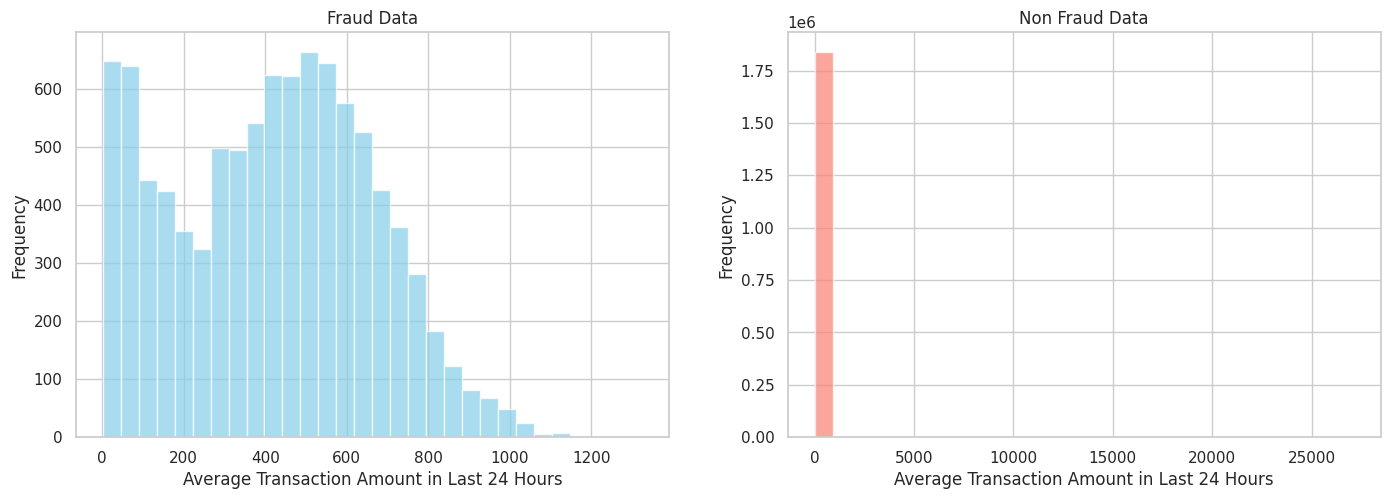

In [181]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot distribution of average transaction amount over the last 24 hours for fraud data
axes[0].hist(df_fraud['hist_trans_avg_amt_24h'], bins=30, color='skyblue', alpha=0.7)
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('Average Transaction Amount in Last 24 Hours')
axes[0].set_ylabel('Frequency')

# Plot distribution of average transaction amount over the last 24 hours for non-fraud data
axes[1].hist(df_nonfraud['hist_trans_avg_amt_24h'], bins=30, color='salmon', alpha=0.7)
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('Average Transaction Amount in Last 24 Hours')
axes[1].set_ylabel('Frequency')

plt.show()

- Distribution of hist_trans_avg_amt_24h for fraud Transcations data is widely spread and major frauds happen at lower amounts as compare to non fraud Transcations data.

#### Fraud Transactions in different dist'

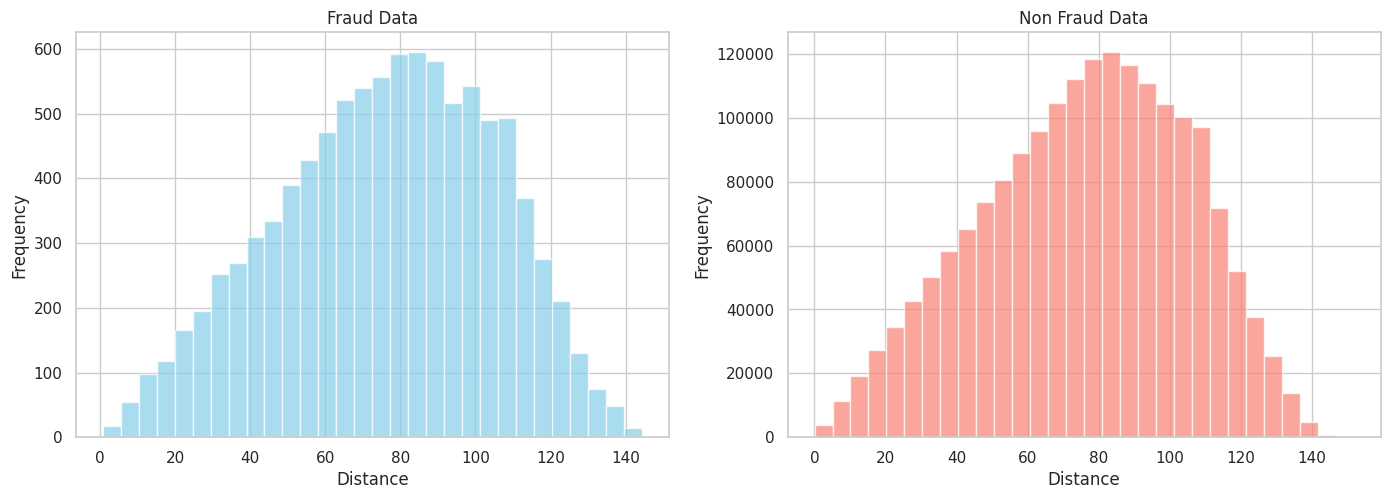

In [182]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot distribution of 'dist' column for fraud data
axes[0].hist(df_fraud['dist'], bins=30, color='skyblue', alpha=0.7)
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('Distance')
axes[0].set_ylabel('Frequency')

# Plot distribution of 'dist' column for non-fraud data
axes[1].hist(df_nonfraud['dist'], bins=30, color='salmon', alpha=0.7)
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('Distance')
axes[1].set_ylabel('Frequency')

plt.show()

- Distribution of Dist is same for fraud transcation data and non fraud transcation data.

#### Fraud Transactions in different time_since_prev_transaction

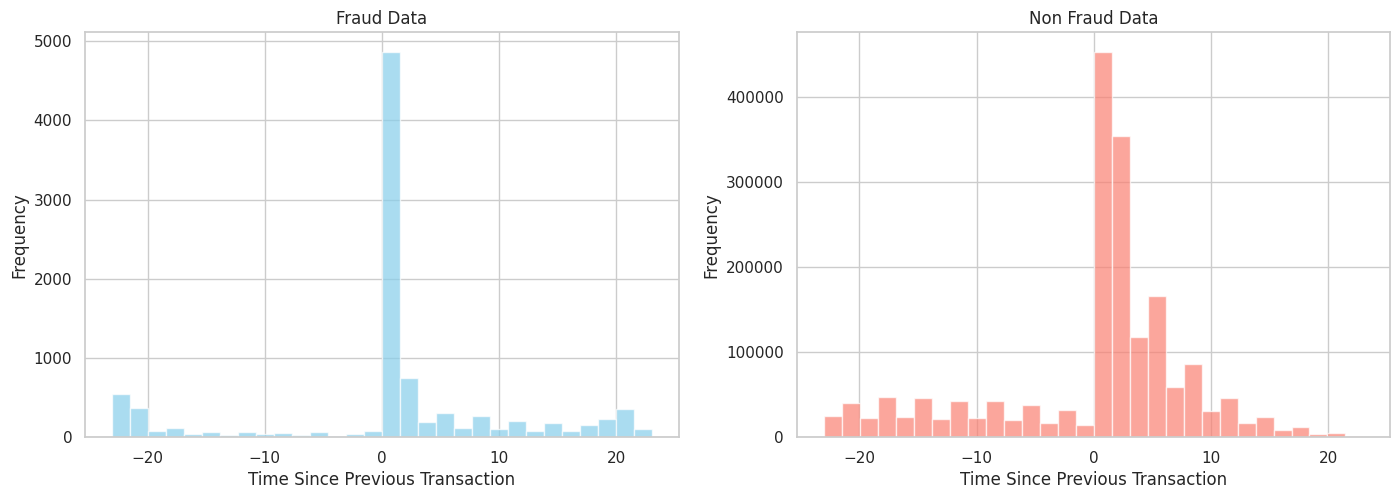

In [183]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot distribution of 'time_since_prev_transaction' column for fraud data
axes[0].hist(df_fraud['time_since_prev_transaction'], bins=30, color='skyblue', alpha=0.7)
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('Time Since Previous Transaction')
axes[0].set_ylabel('Frequency')

# Plot distribution of 'time_since_prev_transaction' column for non-fraud data
axes[1].hist(df_nonfraud['time_since_prev_transaction'], bins=30, color='salmon', alpha=0.7)
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('Time Since Previous Transaction')
axes[1].set_ylabel('Frequency')

plt.show()

- Distribution of time_since_prev_transaction is also approximately same in both fraud transcation data and non fraud transcation data.

#### Fraud Transactions in different distance_between_merchants

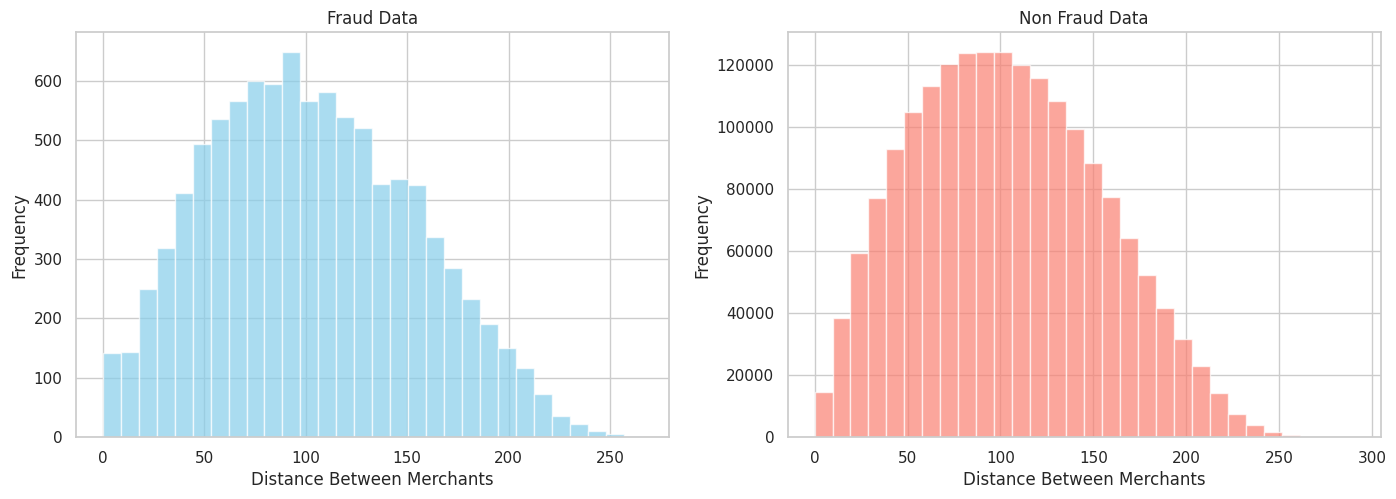

In [184]:

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot distribution of 'distance_between_merchants' column for fraud data
axes[0].hist(df_fraud['distance_between_merchants'], bins=30, color='skyblue', alpha=0.7)
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('Distance Between Merchants')
axes[0].set_ylabel('Frequency')

# Plot distribution of 'distance_between_merchants' column for non-fraud data
axes[1].hist(df_nonfraud['distance_between_merchants'], bins=30, color='salmon', alpha=0.7)
axes[1].set_title('Non Fraud Data')
axes[1].set_xlabel('Distance Between Merchants')
axes[1].set_ylabel('Frequency')

plt.show()

- Distribution of distance_between_merchants is also approximately same in both fraud transcation data and non fraud transcation data.

#### Amount Spent on different category and State_bin(Region) for Fraud Transactions data

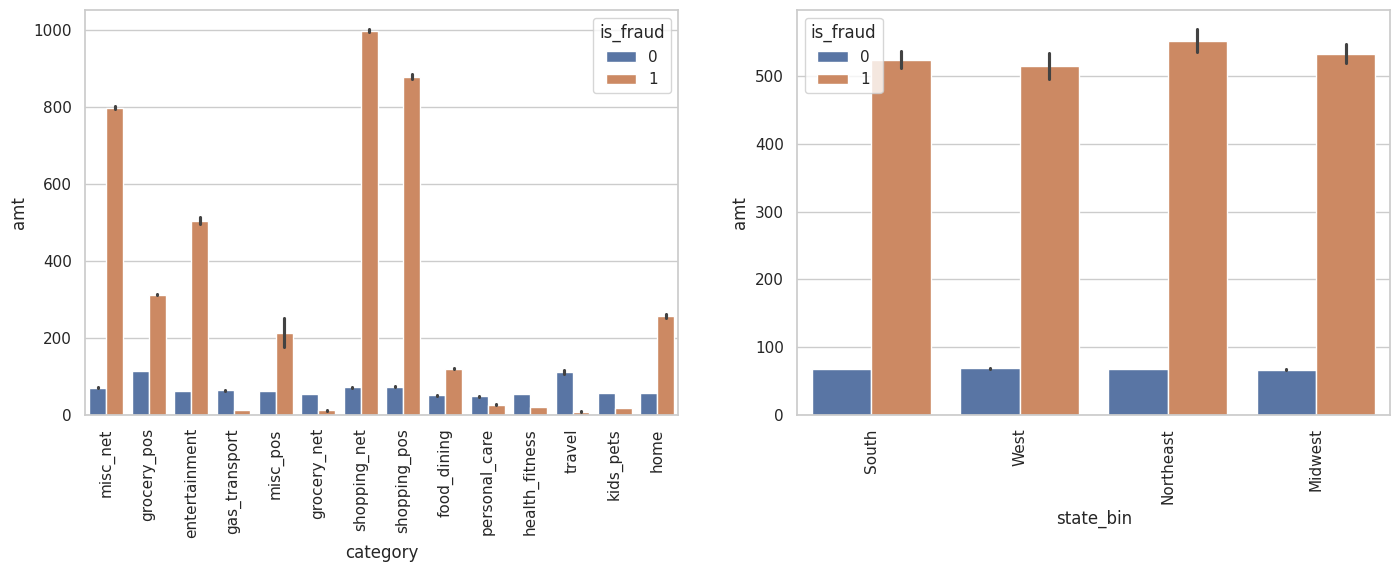

In [185]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='category', y='amt', hue='is_fraud', data=df_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='state_bin',y='amt',hue='is_fraud',data=df_data)
plt.xticks(rotation = 90)
plt.show()

- The maximum amount spend were on shopping_net, shopping_pos, misc_net category for fruad transactions.
- The amount spend in all the regions are same but in Northeast region is slightly more than others for fruad transactions.

#### Amount Spent in different states and trans_Day for Fraud Transactions data 6/span>

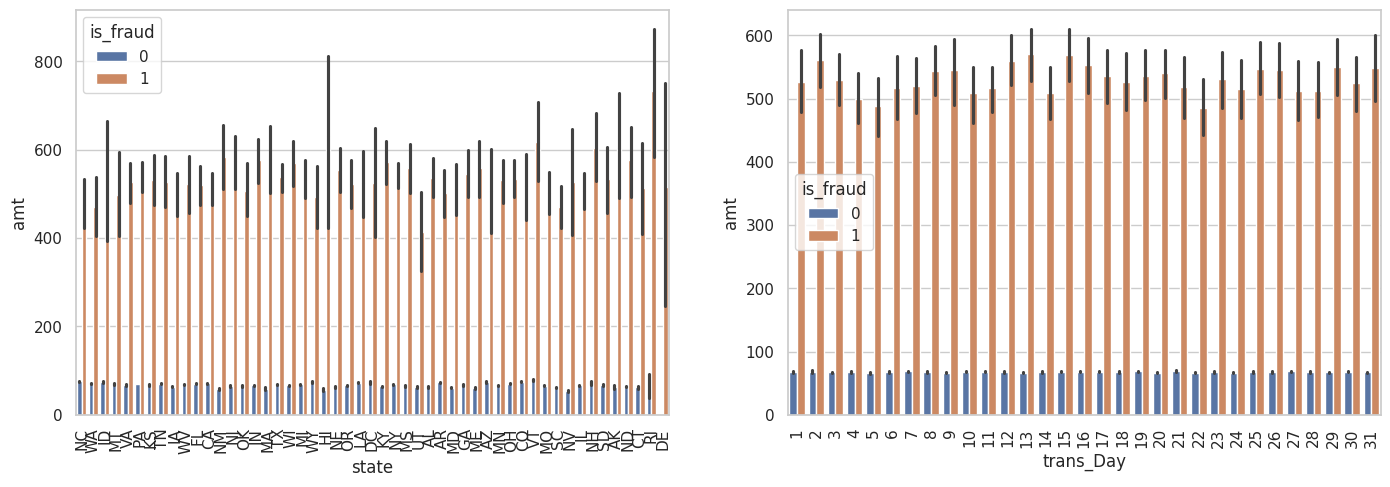

In [186]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='state',y='amt',hue='is_fraud',data=df_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='trans_Day',y='amt',hue='is_fraud',data=df_data)
plt.xticks(rotation = 90)
plt.show()

- The maximum amount spend for fraud transactions were at RI, HI, DE and VT State.
- The maximum amount spend for fraud transactions were same through out the days of month.

#### Amount Spent under age_bin and trans_Year for Fraud Transactions data

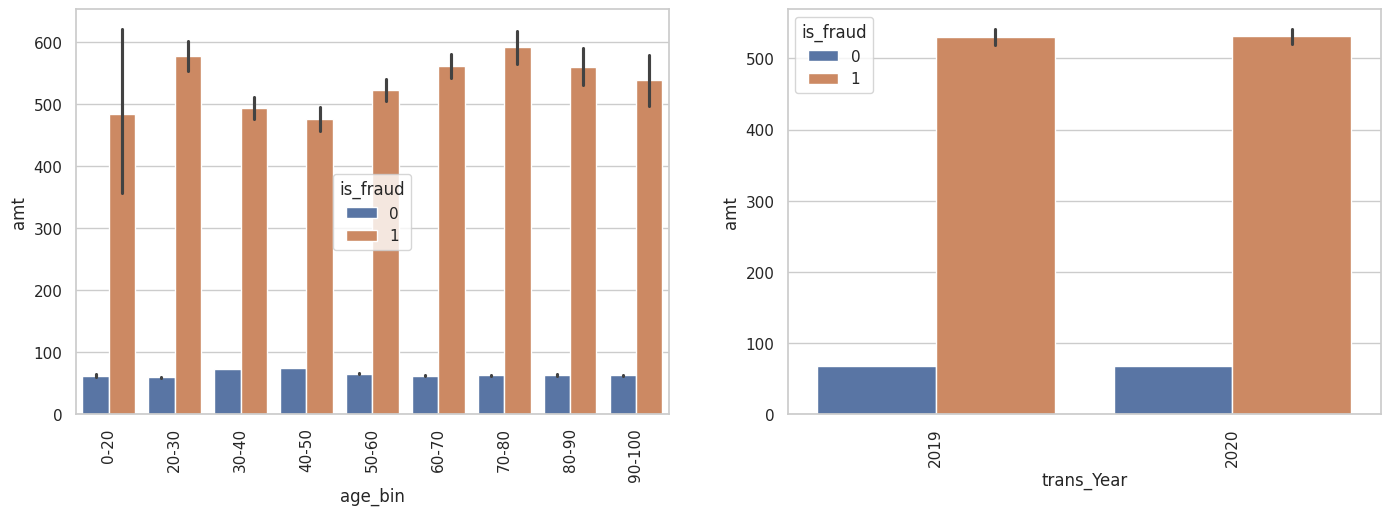

In [187]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='age_bin', y='amt', hue='is_fraud', data=df_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='trans_Year',y='amt',hue='is_fraud',data=df_data)
plt.xticks(rotation = 90)
plt.show()

- The maximum amount spend for fruad transactions belongs to credit card holders "0-20", "60-70" and "70-80" age bin.
- The amount spend for fruad transactions were same for both the years.

#### Amount Spent of people with different job of credit card holders and at merchant for Fraud Transactions data

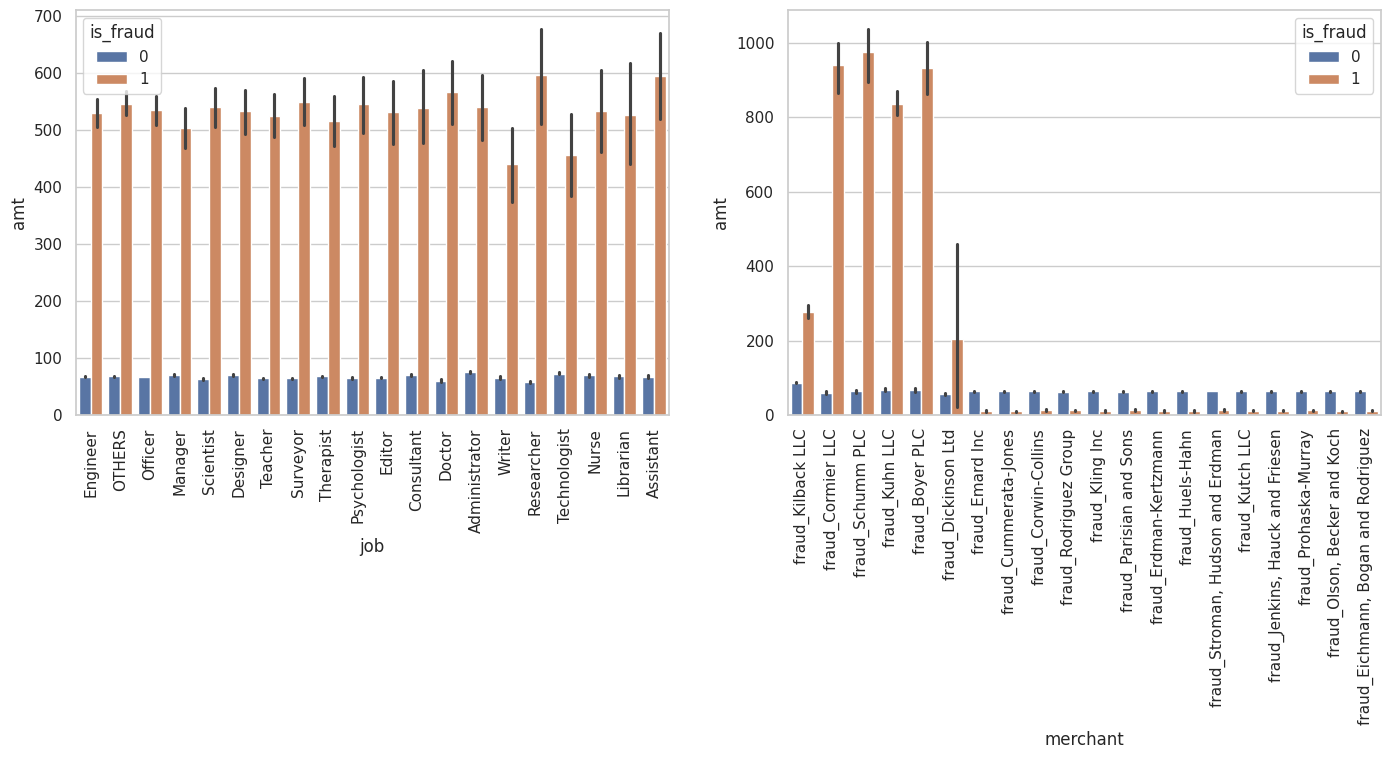

In [188]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='job', y='amt', hue='is_fraud', data=df_data, 
                                                order=df_data.job.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='merchant',y='amt',hue='is_fraud',data=df_data, 
                                            order=df_data.merchant.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)
plt.show()

- The maximum amount spend for fraud transactions were of people with the job of credit card holders of Researcher, Assistant.
- The maximum amount spend for fraud transactions were at 'fraud_Kilback LLC', 'fraud_Cormier LLC', 'fraud_Schumm PLC', 'fraud_Kuhn LLC', 'fraud_Boyer PLC' and 'fraud_Dickinson Ltd' Merchant.

#### Amount Spent at different trans_Hour and in gender of credit card holders for Fraud Transactions data

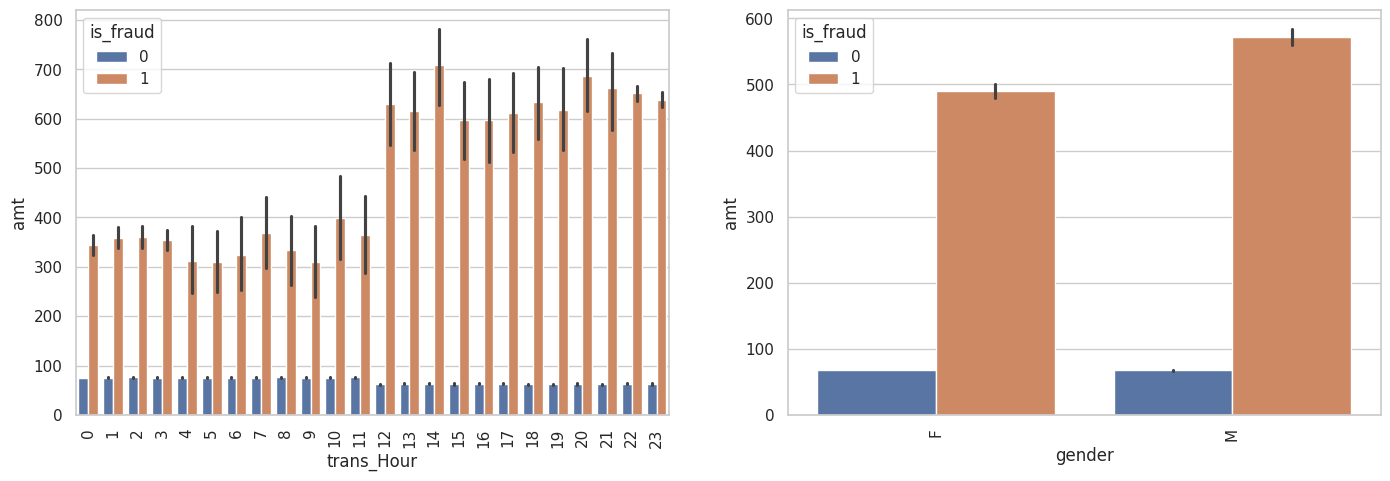

In [189]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='trans_Hour',y='amt',hue='is_fraud',data=df_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='gender',y='amt',hue='is_fraud',data=df_data)
plt.xticks(rotation = 90)
plt.show()

- The maximum amount spend for fruad transactions were done mostly between 12 to 23 Hr
- The maximum amount spend for fruad transactions were done on Male's Credit card Holders.

#### Amount Spent at different trans_Month and trans_weekday for Fraud Transactions data

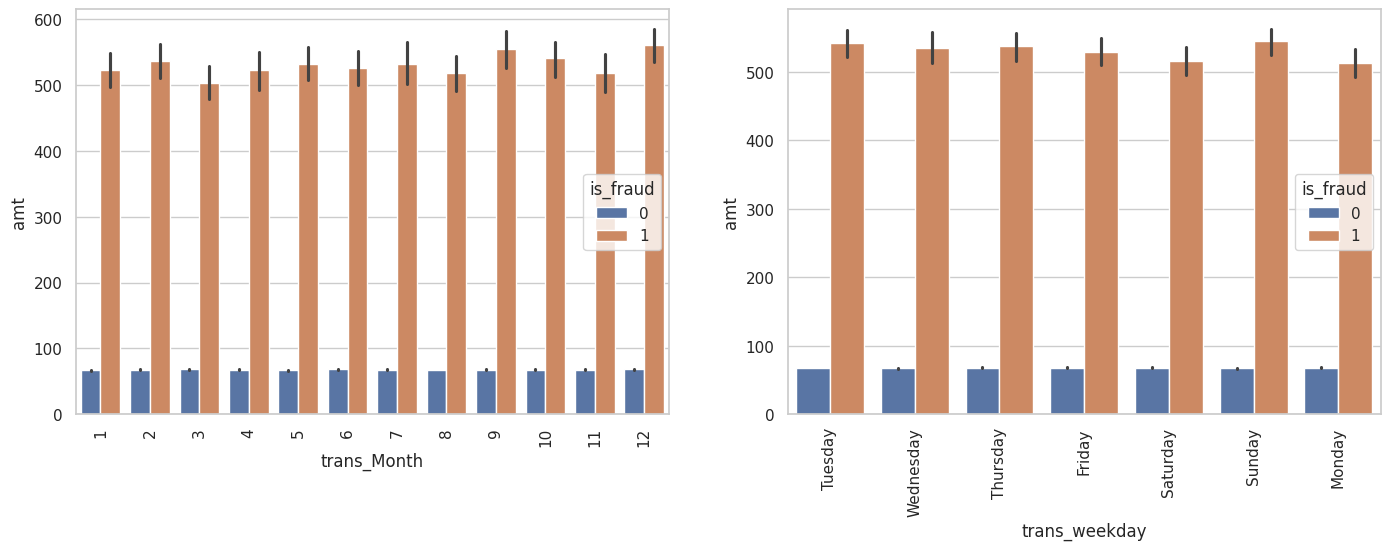

In [190]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='trans_Month', y='amt',hue='is_fraud',data=df_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='trans_weekday', y='amt',hue='is_fraud',data=df_data)
plt.xticks(rotation = 90)
plt.show()

- Nearly same amount spend for fruad transactions were done through out the Month
- Nearly same amount spend for fruad transactions were done through out the Weekday.

#### Amount spent throughout the year

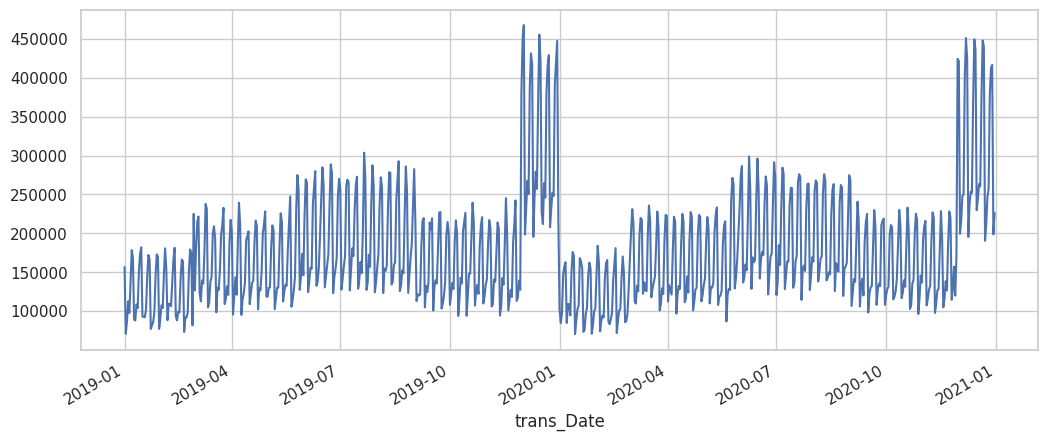

In [191]:
df_data.groupby('trans_Date')['amt'].sum().plot(figsize=[11,5])
plt.show()

- The above Graph shows the amount spend throughout the year, In jan 2020 and dec 2020 amount spend was more.

#### Number of Transactions done through out the year

In [192]:
df_timeline01 = df_data.groupby(df_data['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['trans_year_month','num_of_transactions','customers']
df_timeline01.head()

trans_year_month  num_of_transactions  customers
0          2019-01                52525        913
1          2019-02                49866        918
2          2019-03                70939        916
3          2019-04                68078        913
4          2019-05                72532        910

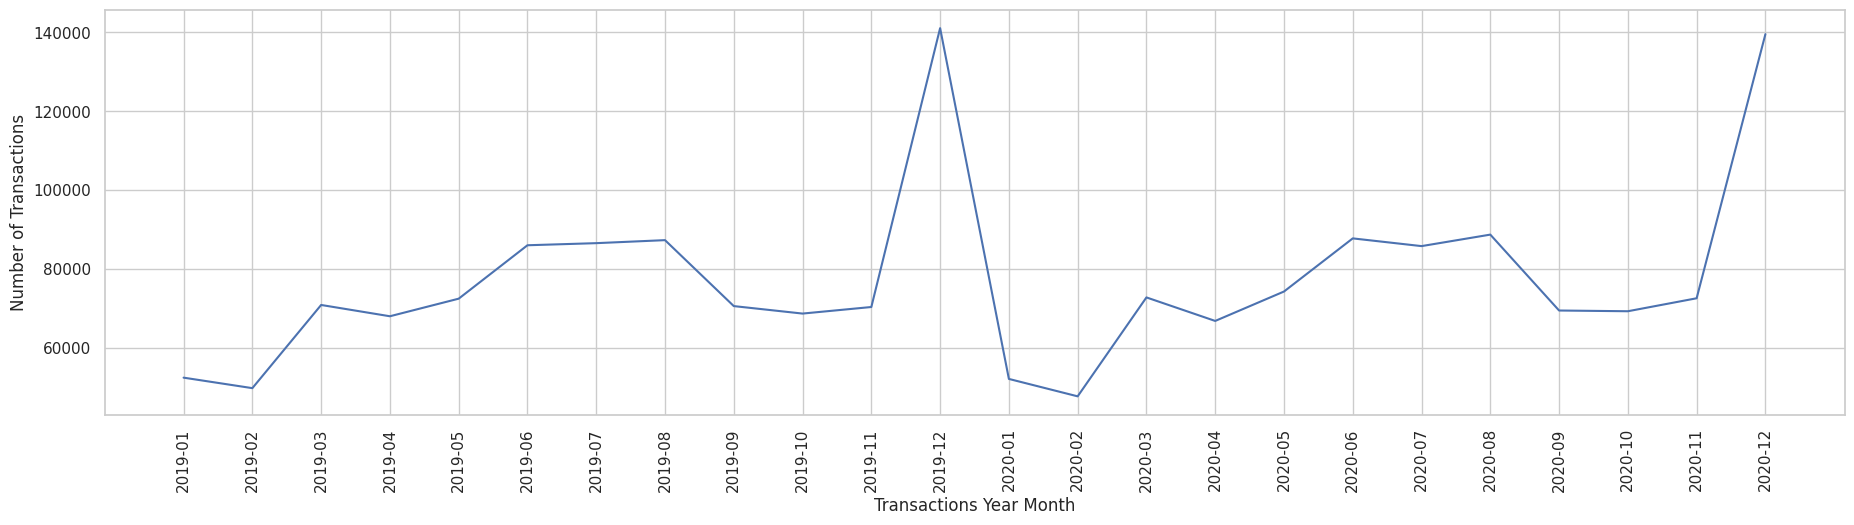

In [193]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['trans_year_month'], rotation = 90)

ax.set_xlabel('Transactions Year Month')
ax.set_ylabel('Number of Transactions')
plt.show()

- No of transactions done month_year wise has increased at dec month of 2019 and 2020, in rest of the months there are normal transactions.

#### Number of Customers Done the Transactions throughout the year

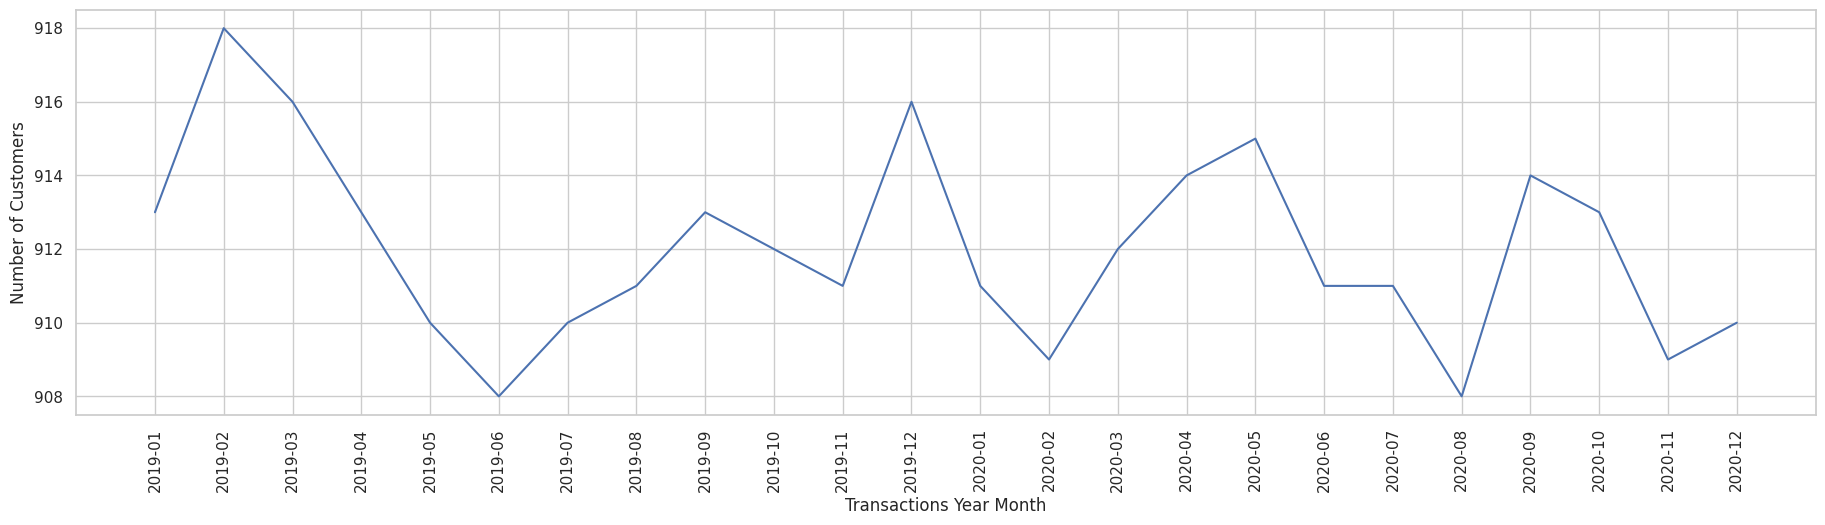

In [194]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['trans_year_month'], rotation = 90)

ax.set_xlabel('Transactions Year Month')
ax.set_ylabel('Number of Customers')
plt.show()

- February month has highest no of customers latterly decreased and then increased in september and december 2019 .
- In 2020 may and september month has higher number of customers who did transactions.

#### Number of Customers Done the Transactions throughout the year

In [195]:
df_fraud_transactions = df_data[df_data['is_fraud']==1]

df_timeline = df_fraud_transactions.groupby(df_fraud_transactions['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline.columns = ['trans_year_month','num_of_fraud_transactions','fraud_customers']
df_timeline.head()

trans_year_month  num_of_fraud_transactions  fraud_customers
0          2019-01                        506               50
1          2019-02                        517               53
2          2019-03                        494               49
3          2019-04                        376               41
4          2019-05                        408               42

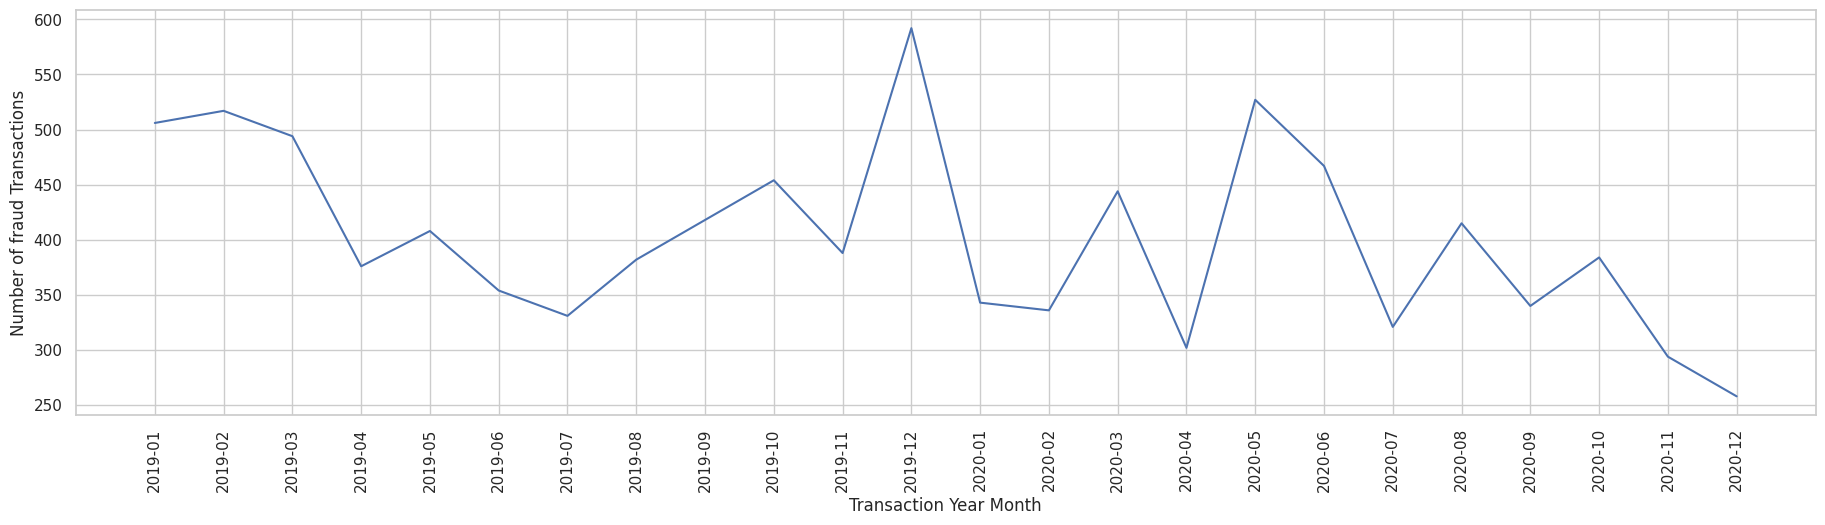

In [196]:
x = np.arange(0,len(df_timeline),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline['num_of_fraud_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline['trans_year_month'], rotation = 90)
#plt.xticks(rotation = 90)

ax.set_xlabel('Transaction Year Month')
ax.set_ylabel('Number of fraud Transactions')
plt.show()

- Fraud transactions were on higher side during new year eve. Specifically in Dec month . Later peaks were observed in march, may, august and October months of 2020.

#### Number of Fraud Customers through out the year

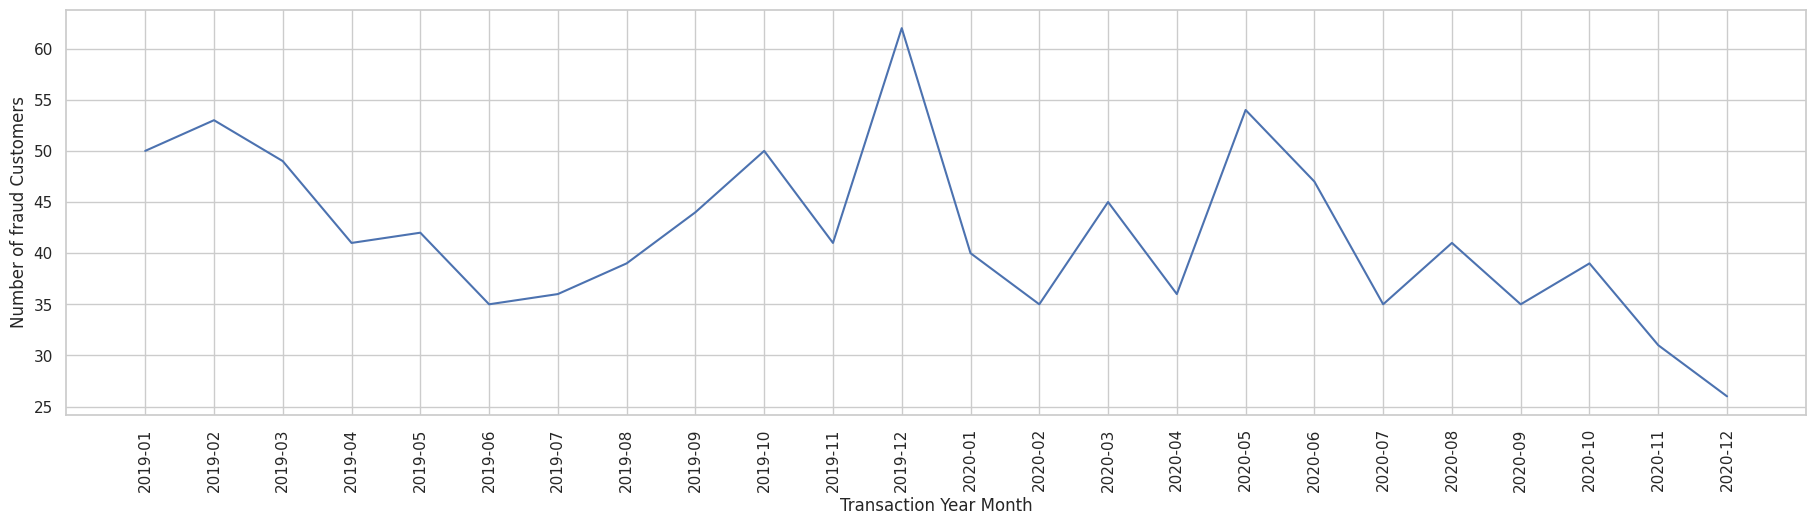

In [197]:
x = np.arange(0,len(df_timeline),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline['trans_year_month'], rotation = 90)
#plt.xticks(rotation = 90)

ax.set_xlabel('Transaction Year Month')
ax.set_ylabel('Number of fraud Customers')
plt.show()

-  Transactions done by Fraud customers are majorly in Feb_19, Oct_19, Dec_19, March_20 and May_20.

In [198]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 40 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   trans_date_trans_time        datetime64[ns]
 1   cc_num                       int64         
 2   merchant                     object        
 3   category                     object        
 4   amt                          float64       
 5   gender                       object        
 6   street                       object        
 7   city                         object        
 8   state                        object        
 9   zip                          int64         
 10  lat                          float64       
 11  long                         float64       
 12  city_pop                     int64         
 13  job                          object        
 14  dob                          datetime64[ns]
 15  trans_num                    object        
 16  

## Cost Benefit Analysis(part 1)

### Average number of transactions per month

In [199]:
df.shape

(1852394, 4)

In [200]:

df= pd.pivot_table(data=df_data, values='trans_num', index=pd.Grouper(key='trans_Date', 
                                                    freq='1M'), columns='cc_num', aggfunc='count')
df.head()

cc_num      60416207185          60422928733          60423098130          \
trans_Date                                                                  
2019-01-31                 56.0                 49.0                 28.0   
2019-02-28                 59.0                 60.0                 21.0   
2019-03-31                 86.0                 90.0                 30.0   
2019-04-30                102.0                 96.0                 21.0   
2019-05-31                 81.0                 91.0                 32.0   

cc_num      60427851591          60487002085          60490596305          \
trans_Date                                                                  
2019-01-31                 24.0                 18.0                 39.0   
2019-02-28                 19.0                 19.0                 40.0   
2019-03-31                 30.0                 32.0                 59.0   
2019-04-30                 44.0                 25.0                 54.0   
2019-05-31                 26.0                 19.0                 57.0   

cc_num      60495593109          501802953619         501818133297         \
trans_Date                                                                  
2019-01-31                 18.0                 60.0                  NaN   
2019-02-28                 18.0                 57.0                  NaN   
2019-03-31                 26.0                 93.0                  NaN   
2019-04-30                 23.0                 87.0                  NaN   
2019-05-31                 29.0                 74.0                  NaN   

cc_num      501828204849         ...  4890424426862856940  \
trans_Date                       ...                        
2019-01-31                 20.0  ...                 66.0   
2019-02-28                 20.0  ...                 66.0   
2019-03-31                 33.0  ...                 70.0   
2019-04-30                 28.0  ...                 86.0   
2019-05-31                 28.0  ...                 80.0   

cc_num      4897067971111209737  4906628655840914250  4911818930706644725  \
trans_Date                                                                  
2019-01-31                 48.0                 95.0                  NaN   
2019-02-28                 36.0                 86.0                  NaN   
2019-03-31                 52.0                142.0                  9.0   
2019-04-30                 55.0                132.0                  NaN   
2019-05-31                 56.0                138.0                  NaN   

cc_num      4956828990005111019  4958589671582726883  4973530368125489546  \
trans_Date                                                                  
2019-01-31                112.0                 56.0                 54.0   
2019-02-28                 98.0                 57.0                 27.0   
2019-03-31                152.0                 88.0                 57.0   
2019-04-30                136.0                 81.0                 48.0   
2019-05-31                154.0                 92.0                 60.0   

cc_num      4980323467523543940  4989847570577635369  4992346398065154184  
trans_Date                                                                 
2019-01-31                 24.0                 38.0                 81.0  
2019-02-28                 13.0                 45.0                 84.0  
2019-03-31                 30.0                 55.0                113.0  
2019-04-30                 21.0                 44.0                114.0  
2019-05-31                 30.0                 63.0                110.0  

[5 rows x 999 columns]

In [201]:
df.shape

(24, 999)

In [202]:
mean_per_month =df.sum(axis=1)
mean_per_month

trans_Date
2019-01-31     52525.0
2019-02-28     49866.0
2019-03-31     70939.0
2019-04-30     68078.0
2019-05-31     72532.0
2019-06-30     86064.0
2019-07-31     86596.0
2019-08-31     87359.0
2019-09-30     70652.0
2019-10-31     68758.0
2019-11-30     70421.0
2019-12-31    141060.0
2020-01-31     52202.0
2020-02-29     47791.0
2020-03-31     72850.0
2020-04-30     66892.0
2020-05-31     74343.0
2020-06-30     87805.0
2020-07-31     85848.0
2020-08-31     88759.0
2020-09-30     69533.0
2020-10-31     69348.0
2020-11-30     72635.0
2020-12-31    139538.0
Freq: ME, dtype: float64

In [203]:
total=mean_per_month.sum(axis=0)
total

1852394.0

In [204]:
Average_number_of_transactions_per_month= total/24

In [205]:
Average_number_of_transactions_per_month

77183.08333333333

### Average number of fraudulent transaction per month

In [206]:
fraudulent_transactions= df_data[df_data["is_fraud"]==1]

In [207]:
df1= pd.pivot_table(data=fraudulent_transactions, values='trans_num', index=pd.Grouper(key='trans_Date', freq='1M'), columns='cc_num', aggfunc='count')
df1.head()

cc_num      60416207185          60422928733          60423098130          \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  9.0                  NaN                 10.0   
2019-04-30                  NaN                 12.0                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      60427851591          60487002085          60490596305          \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  NaN                  NaN                  NaN   
2019-04-30                 14.0                  NaN                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      60495593109          501802953619         501818133297         \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  NaN                  NaN                  NaN   
2019-04-30                  NaN                  NaN                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      501828204849         ...  4890424426862856940  \
trans_Date                       ...                        
2019-01-31                  NaN  ...                  NaN   
2019-02-28                  NaN  ...                  NaN   
2019-03-31                  NaN  ...                  NaN   
2019-04-30                  NaN  ...                  NaN   
2019-05-31                  NaN  ...                  NaN   

cc_num      4897067971111209737  4906628655840914250  4911818930706644725  \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  NaN                  NaN                  9.0   
2019-04-30                  NaN                  NaN                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      4956828990005111019  4958589671582726883  4973530368125489546  \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  NaN                  NaN                  NaN   
2019-04-30                  NaN                  NaN                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      4980323467523543940  4989847570577635369  4992346398065154184  
trans_Date                                                                 
2019-01-31                  NaN                  NaN                  NaN  
2019-02-28                  NaN                  NaN                  NaN  
2019-03-31                  NaN                  NaN                  NaN  
2019-04-30                  NaN                  NaN                  NaN  
2019-05-31                  NaN                  NaN                  NaN  

[5 rows x 976 columns]

In [208]:
mean_per_month =df1.sum(axis=1)
mean_per_month

trans_Date
2019-01-31    506.0
2019-02-28    517.0
2019-03-31    494.0
2019-04-30    376.0
2019-05-31    408.0
2019-06-30    354.0
2019-07-31    331.0
2019-08-31    382.0
2019-09-30    418.0
2019-10-31    454.0
2019-11-30    388.0
2019-12-31    592.0
2020-01-31    343.0
2020-02-29    336.0
2020-03-31    444.0
2020-04-30    302.0
2020-05-31    527.0
2020-06-30    467.0
2020-07-31    321.0
2020-08-31    415.0
2020-09-30    340.0
2020-10-31    384.0
2020-11-30    294.0
2020-12-31    258.0
Freq: ME, dtype: float64

In [209]:
total=mean_per_month.sum(axis=0)
total

9651.0

In [210]:
Average_number_of_fraud_transactions_per_month= total/24

In [211]:
Average_number_of_fraud_transactions_per_month

402.125

#### Average amount per fraud transaction

In [212]:
fraudulent_transactions.head(2)

trans_date_trans_time           cc_num                          merchant  \
2449   2019-01-02 01:06:37    4613314721966            fraud_Rutherford-Mertz   
2472   2019-01-02 01:47:29  340187018810220  fraud_Jenkins, Hauck and Friesen   

           category     amt gender                     street           city  \
2449    grocery_pos  281.06      M  542 Steve Curve Suite 011  Collettsville   
2472  gas_transport   11.52      F  27954 Hall Mill Suite 575    San Antonio   

     state    zip  ...  trans_weekday   dist  prev_merch_lat prev_merch_long  \
2449    NC  28611  ...      Wednesday  68.96       35.773439      -80.895816   
2472    TX  78208  ...      Wednesday  78.44       29.819364      -99.142791   

     time_since_prev_transaction distance_between_merchants  hist_trans_30d  \
2449                       -11.0                      77.21             1.0   
2472                         0.0                       0.00           113.0   

      hist_trans_24h  hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  
2449             1.0               71.030000                 71.0300  
2472             4.0               63.897522                101.4975  

[2 rows x 40 columns]

In [213]:
fraudulent_transactions.shape

(9651, 40)

In [214]:
df2= pd.pivot_table(data=fraudulent_transactions, values='amt', index=pd.Grouper(key='trans_Date', freq='1M'), columns='cc_num', aggfunc='sum')
df2.head()

cc_num      60416207185          60422928733          60423098130          \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31              1899.73                  NaN              4598.08   
2019-04-30                  NaN              7500.18                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      60427851591          60487002085          60490596305          \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  NaN                  NaN                  NaN   
2019-04-30              9645.79                  NaN                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      60495593109          501802953619         501818133297         \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  NaN                  NaN                  NaN   
2019-04-30                  NaN                  NaN                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      501828204849         ...  4890424426862856940  \
trans_Date                       ...                        
2019-01-31                  NaN  ...                  NaN   
2019-02-28                  NaN  ...                  NaN   
2019-03-31                  NaN  ...                  NaN   
2019-04-30                  NaN  ...                  NaN   
2019-05-31                  NaN  ...                  NaN   

cc_num      4897067971111209737  4906628655840914250  4911818930706644725  \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  NaN                  NaN              4817.48   
2019-04-30                  NaN                  NaN                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      4956828990005111019  4958589671582726883  4973530368125489546  \
trans_Date                                                                  
2019-01-31                  NaN                  NaN                  NaN   
2019-02-28                  NaN                  NaN                  NaN   
2019-03-31                  NaN                  NaN                  NaN   
2019-04-30                  NaN                  NaN                  NaN   
2019-05-31                  NaN                  NaN                  NaN   

cc_num      4980323467523543940  4989847570577635369  4992346398065154184  
trans_Date                                                                 
2019-01-31                  NaN                  NaN                  NaN  
2019-02-28                  NaN                  NaN                  NaN  
2019-03-31                  NaN                  NaN                  NaN  
2019-04-30                  NaN                  NaN                  NaN  
2019-05-31                  NaN                  NaN                  NaN  

[5 rows x 976 columns]

In [215]:
sum_per_month =df2.sum(axis=1)
sum_per_month

trans_Date
2019-01-31    261780.38
2019-02-28    274051.08
2019-03-31    237637.59
2019-04-30    202067.29
2019-05-31    210549.11
2019-06-30    178204.60
2019-07-31    188701.59
2019-08-31    203951.13
2019-09-30    217675.37
2019-10-31    257739.72
2019-11-30    200307.47
2019-12-31    335157.54
2020-01-31    182595.36
2020-02-29    183950.11
2020-03-31    234090.10
2020-04-30    152173.98
2020-05-31    287226.38
2020-06-30    253504.74
2020-07-31    158669.49
2020-08-31    208785.43
2020-09-30    202700.99
2020-10-31    195572.97
2020-11-30    153182.19
2020-12-31    141138.68
Freq: ME, dtype: float64

In [216]:
total=sum_per_month.sum(axis=0)
total

5121413.289999999

In [217]:
Average_amount_per_fraud_transaction= total/9651

In [218]:
Average_amount_per_fraud_transaction

530.6614122888819

## Cost Benefit Analysis

##### Questions for which we have successfully derived the answer:
    1. Average number of transactions per month - 77183
    2. Average number of fraudulent transaction per month - ~ 402.13
    3. Average amount per fraud transaction - ~531

In [219]:
df_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_Date', 'trans_Time', 'state_bin', 'age', 'age_bin',
       'trans_Year', 'trans_year_month', 'trans_Month', 'trans_Hour',
       'trans_Day', 'trans_weekday', 'dist', 'prev_merch_lat',
       'prev_merch_long', 'time_since_prev_transaction',
       'distance_between_merchants', 'hist_trans_30d', 'hist_trans_24h',
       'hist_trans_avg_amt_30d', 'hist_trans_avg_amt_24h'],
      dtype='object')

In [220]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 40 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   trans_date_trans_time        datetime64[ns]
 1   cc_num                       int64         
 2   merchant                     object        
 3   category                     object        
 4   amt                          float64       
 5   gender                       object        
 6   street                       object        
 7   city                         object        
 8   state                        object        
 9   zip                          int64         
 10  lat                          float64       
 11  long                         float64       
 12  city_pop                     int64         
 13  job                          object        
 14  dob                          datetime64[ns]
 15  trans_num                    object        
 16  

In [221]:
df_data

trans_date_trans_time            cc_num  \
0         2019-01-01 00:00:18  2703186189652095   
1         2019-01-01 00:00:44      630423337322   
2         2019-01-01 00:00:51    38859492057661   
3         2019-01-01 00:01:16  3534093764340240   
4         2019-01-01 00:03:06   375534208663984   
...                       ...               ...   
1852389   2020-12-31 23:59:07    30560609640617   
1852390   2020-12-31 23:59:09  3556613125071656   
1852391   2020-12-31 23:59:15  6011724471098086   
1852392   2020-12-31 23:59:24     4079773899158   
1852393   2020-12-31 23:59:34  4170689372027579   

                                   merchant        category     amt gender  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                      fraud_Lind-Buckridge   entertainment  220.11      M   
3        fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                       fraud_Keeling-Crist        misc_pos   41.96      M   
...                                     ...             ...     ...    ...   
1852389               fraud_Reilly and Sons  health_fitness   43.77      M   
1852390                fraud_Hoppe-Parisian       kids_pets  111.84      M   
1852391                     fraud_Rau-Robel       kids_pets   86.88      F   
1852392               fraud_Breitenberg LLC          travel    7.99      M   
1852393                   fraud_Dare-Marvin   entertainment   38.13      M   

                               street            city state    zip  ...  \
0                      561 Perry Cove  Moravian Falls    NC  28654  ...   
1        43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2            594 White Dale Suite 530      Malad City    ID  83252  ...   
3         9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                    408 Bradley Rest        Doe Hill    VA  24433  ...   
...                               ...             ...   ...    ...  ...   
1852389           558 Michael Estates           Luray    MO  63453  ...   
1852390           572 Davis Mountains    Lake Jackson    TX  77566  ...   
1852391    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
1852392    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
1852393      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

         trans_weekday    dist  prev_merch_lat prev_merch_long  \
0              Tuesday   78.77       36.011293      -82.048315   
1              Tuesday   30.22       49.159047     -118.186462   
2              Tuesday  108.10       43.150704     -112.154481   
3              Tuesday   95.69       47.034331     -112.561071   
4              Tuesday   77.70       38.674999      -78.632459   
...                ...     ...             ...             ...   
1852389       Thursday   77.03       40.395006      -91.537312   
1852390       Thursday  100.02       28.599619      -95.170763   
1852391       Thursday   80.89       45.716706     -119.886246   
1852392       Thursday   53.06       45.152800     -116.250539   
1852393       Thursday   72.38       35.358399      -96.720178   

        time_since_prev_transaction distance_between_merchants  \
0                               0.0                       0.00   
1                               0.0                       0.00   
2                               0.0                       0.00   
3                               0.0                       0.00   
4                               0.0                       0.00   
...                             ...                        ...   
1852389                         4.0                      52.71   
1852390                         2.0                     153.67   
1852391                         0.0                     105.50   
1852392                         3.0                     100.31   
1852393                         1.0   

## Preparing the data for modelling

In [222]:
df_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_Date', 'trans_Time', 'state_bin', 'age', 'age_bin',
       'trans_Year', 'trans_year_month', 'trans_Month', 'trans_Hour',
       'trans_Day', 'trans_weekday', 'dist', 'prev_merch_lat',
       'prev_merch_long', 'time_since_prev_transaction',
       'distance_between_merchants', 'hist_trans_30d', 'hist_trans_24h',
       'hist_trans_avg_amt_30d', 'hist_trans_avg_amt_24h'],
      dtype='object')

In [223]:
df_data.shape

(1852394, 40)

### Checking the correlations between the variables

In [224]:
# Select only the numeric columns
numeric_df = df_data.select_dtypes(include=['number'])

# Compute the correlation matrix
cor = numeric_df.corr()
print(cor)

                               cc_num       amt       zip       lat      long  \
cc_num                       1.000000  0.001826  0.041504 -0.058744 -0.048429   
amt                          0.001826  1.000000  0.001979 -0.000670 -0.000735   
zip                          0.041504  0.001979  1.000000 -0.114554 -0.909795   
lat                         -0.058744 -0.000670 -0.114554  1.000000 -0.014744   
long                        -0.048429 -0.000735 -0.909795 -0.014744  1.000000   
city_pop                    -0.009118  0.004921  0.077601 -0.154816 -0.052359   
unix_time                    0.000284 -0.002411  0.001017  0.000741 -0.000574   
merch_lat                   -0.058415 -0.000613 -0.113934  0.993582 -0.014585   
merch_long                  -0.048421 -0.000711 -0.908981 -0.014709  0.999118   
is_fraud                    -0.001125  0.209308 -0.002190  0.002904  0.001022   
age                         -0.000143 -0.010662  0.010347  0.047124 -0.029445   
trans_Year                  

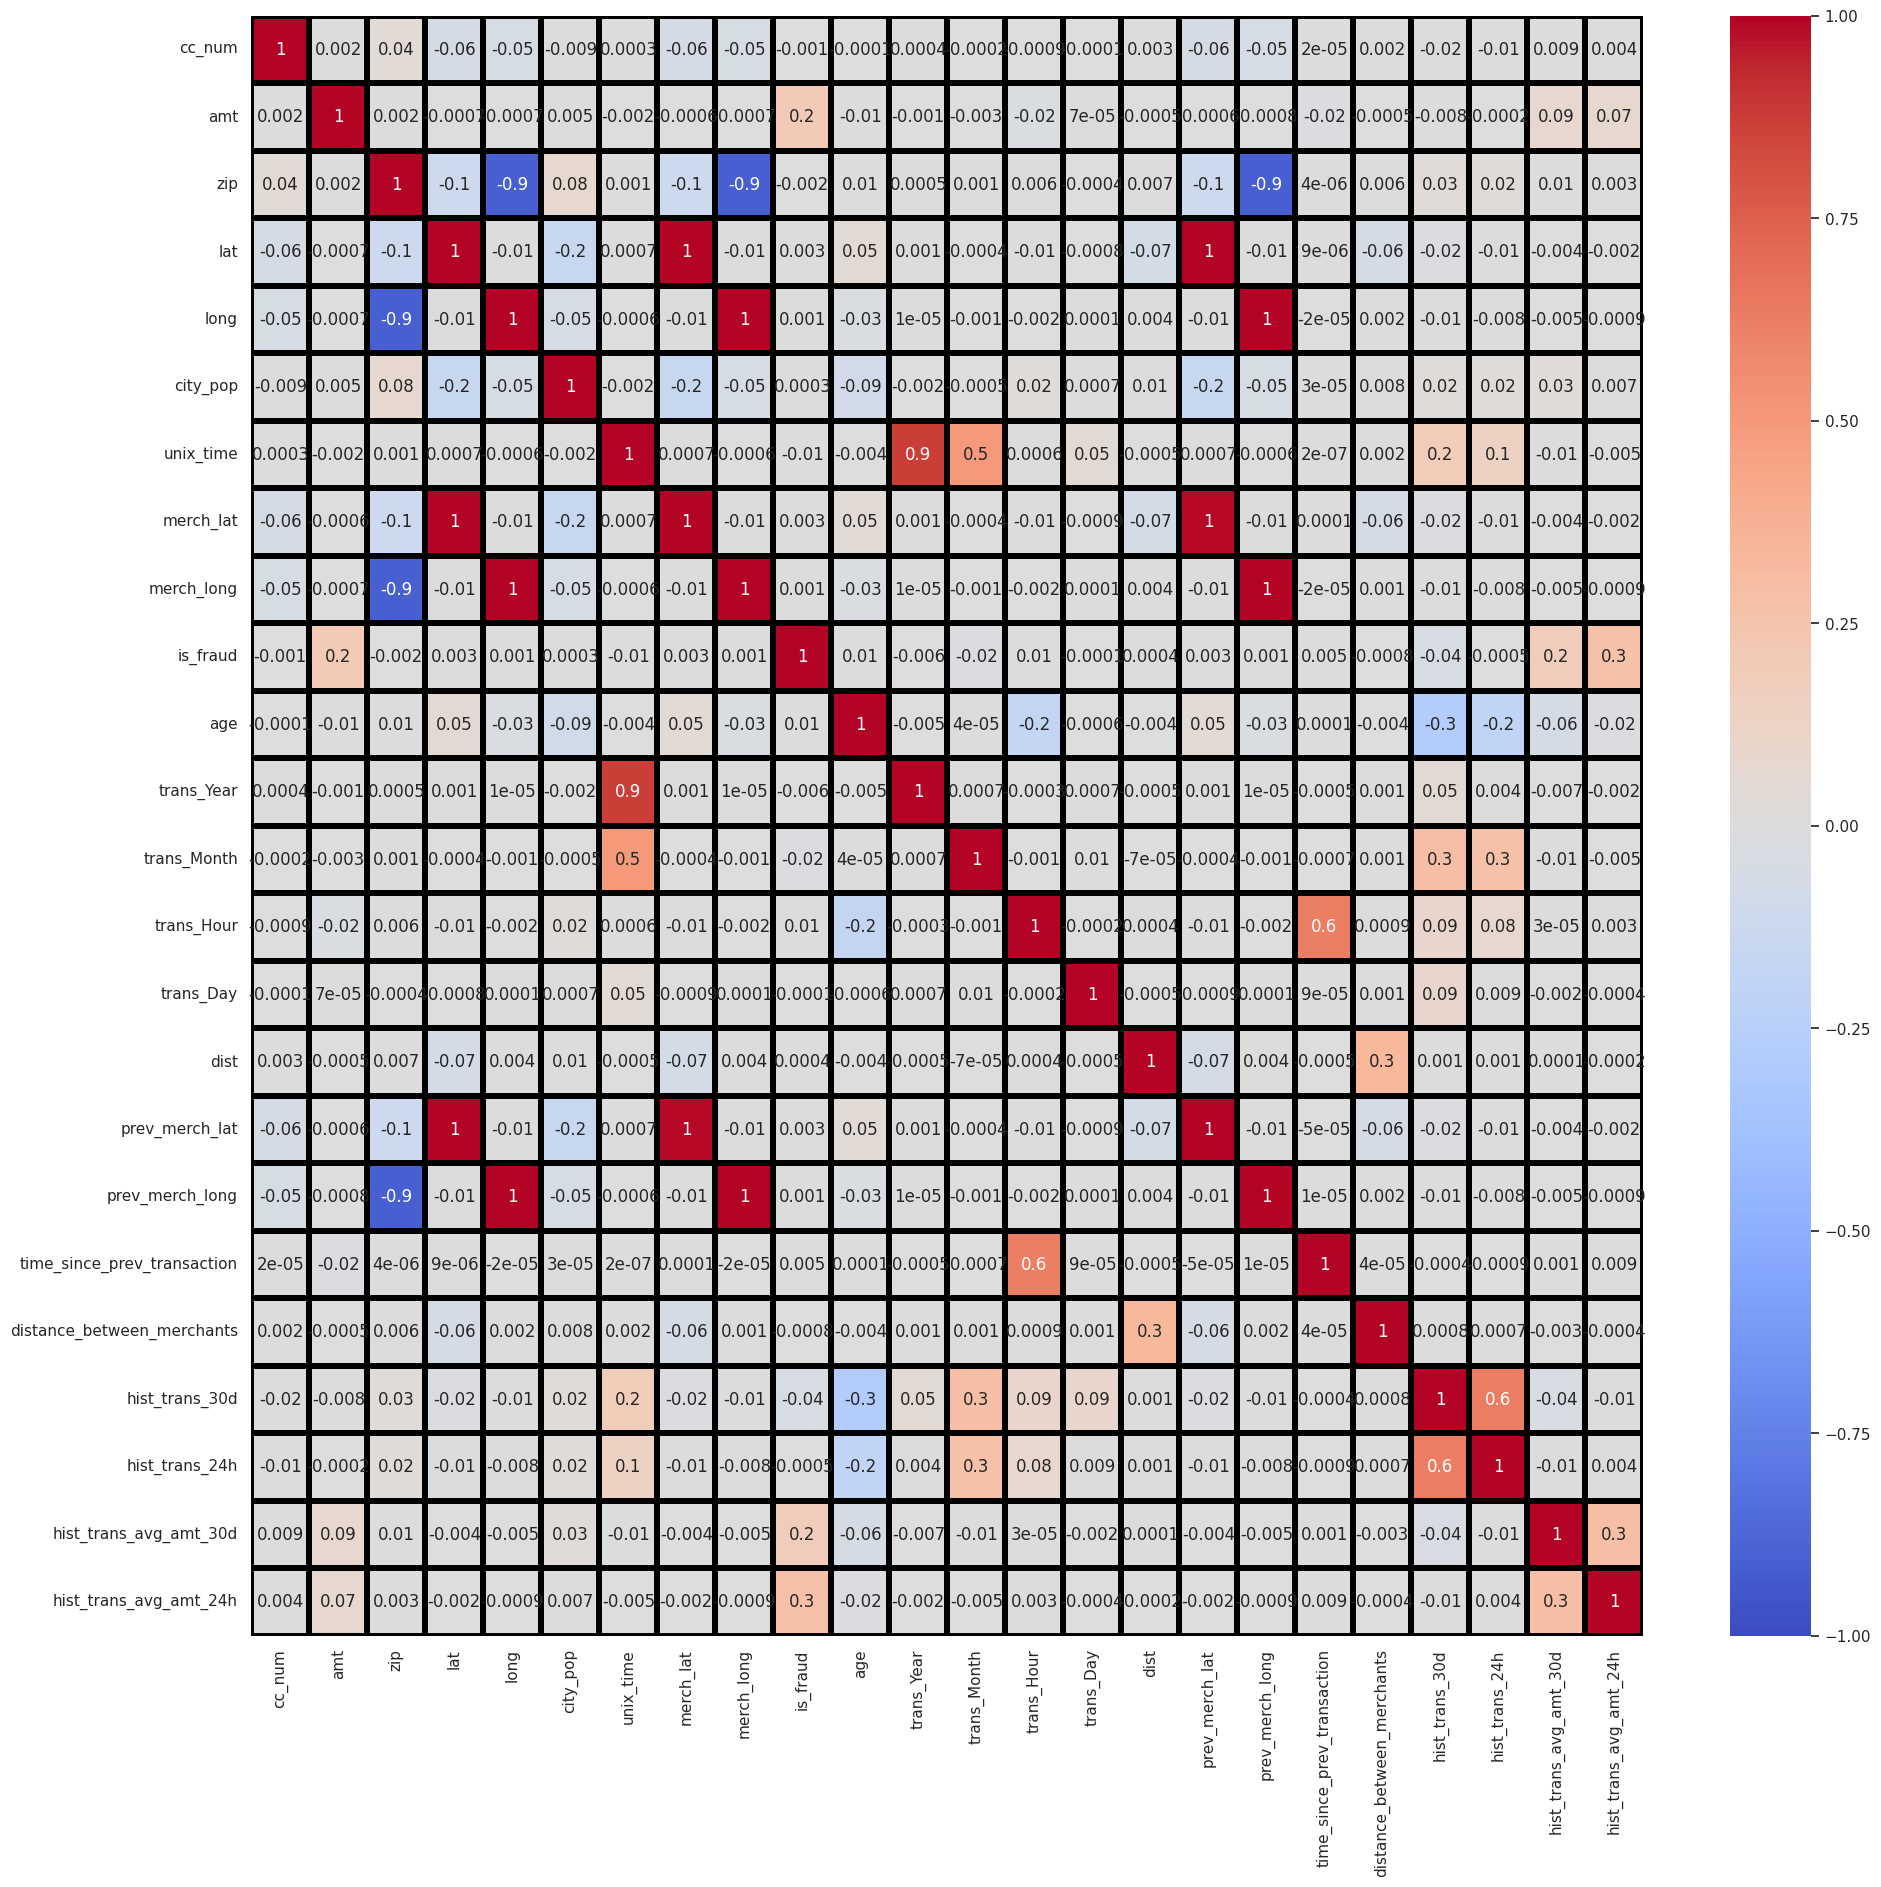

In [225]:
# Select only the numeric columns
numeric_df = df_data.select_dtypes(include=['number'])

# Compute the correlation matrix
cor = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(cor, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, linewidths=3, linecolor='black', cmap='coolwarm')
plt.show()

#### Dropping the variables who have high correlation values

In [226]:
df_data= df_data.drop(['prev_merch_lat','prev_merch_long','merch_lat','merch_long','zip'],axis=1)
df_data= df_data.drop(['age_bin','trans_Date','unix_time', 'trans_Day','trans_year_month'],axis=1)
df_data= df_data.drop(['trans_Time','trans_date_trans_time','dob', 'state_bin'],axis=1)

df_data.shape

(1852394, 26)

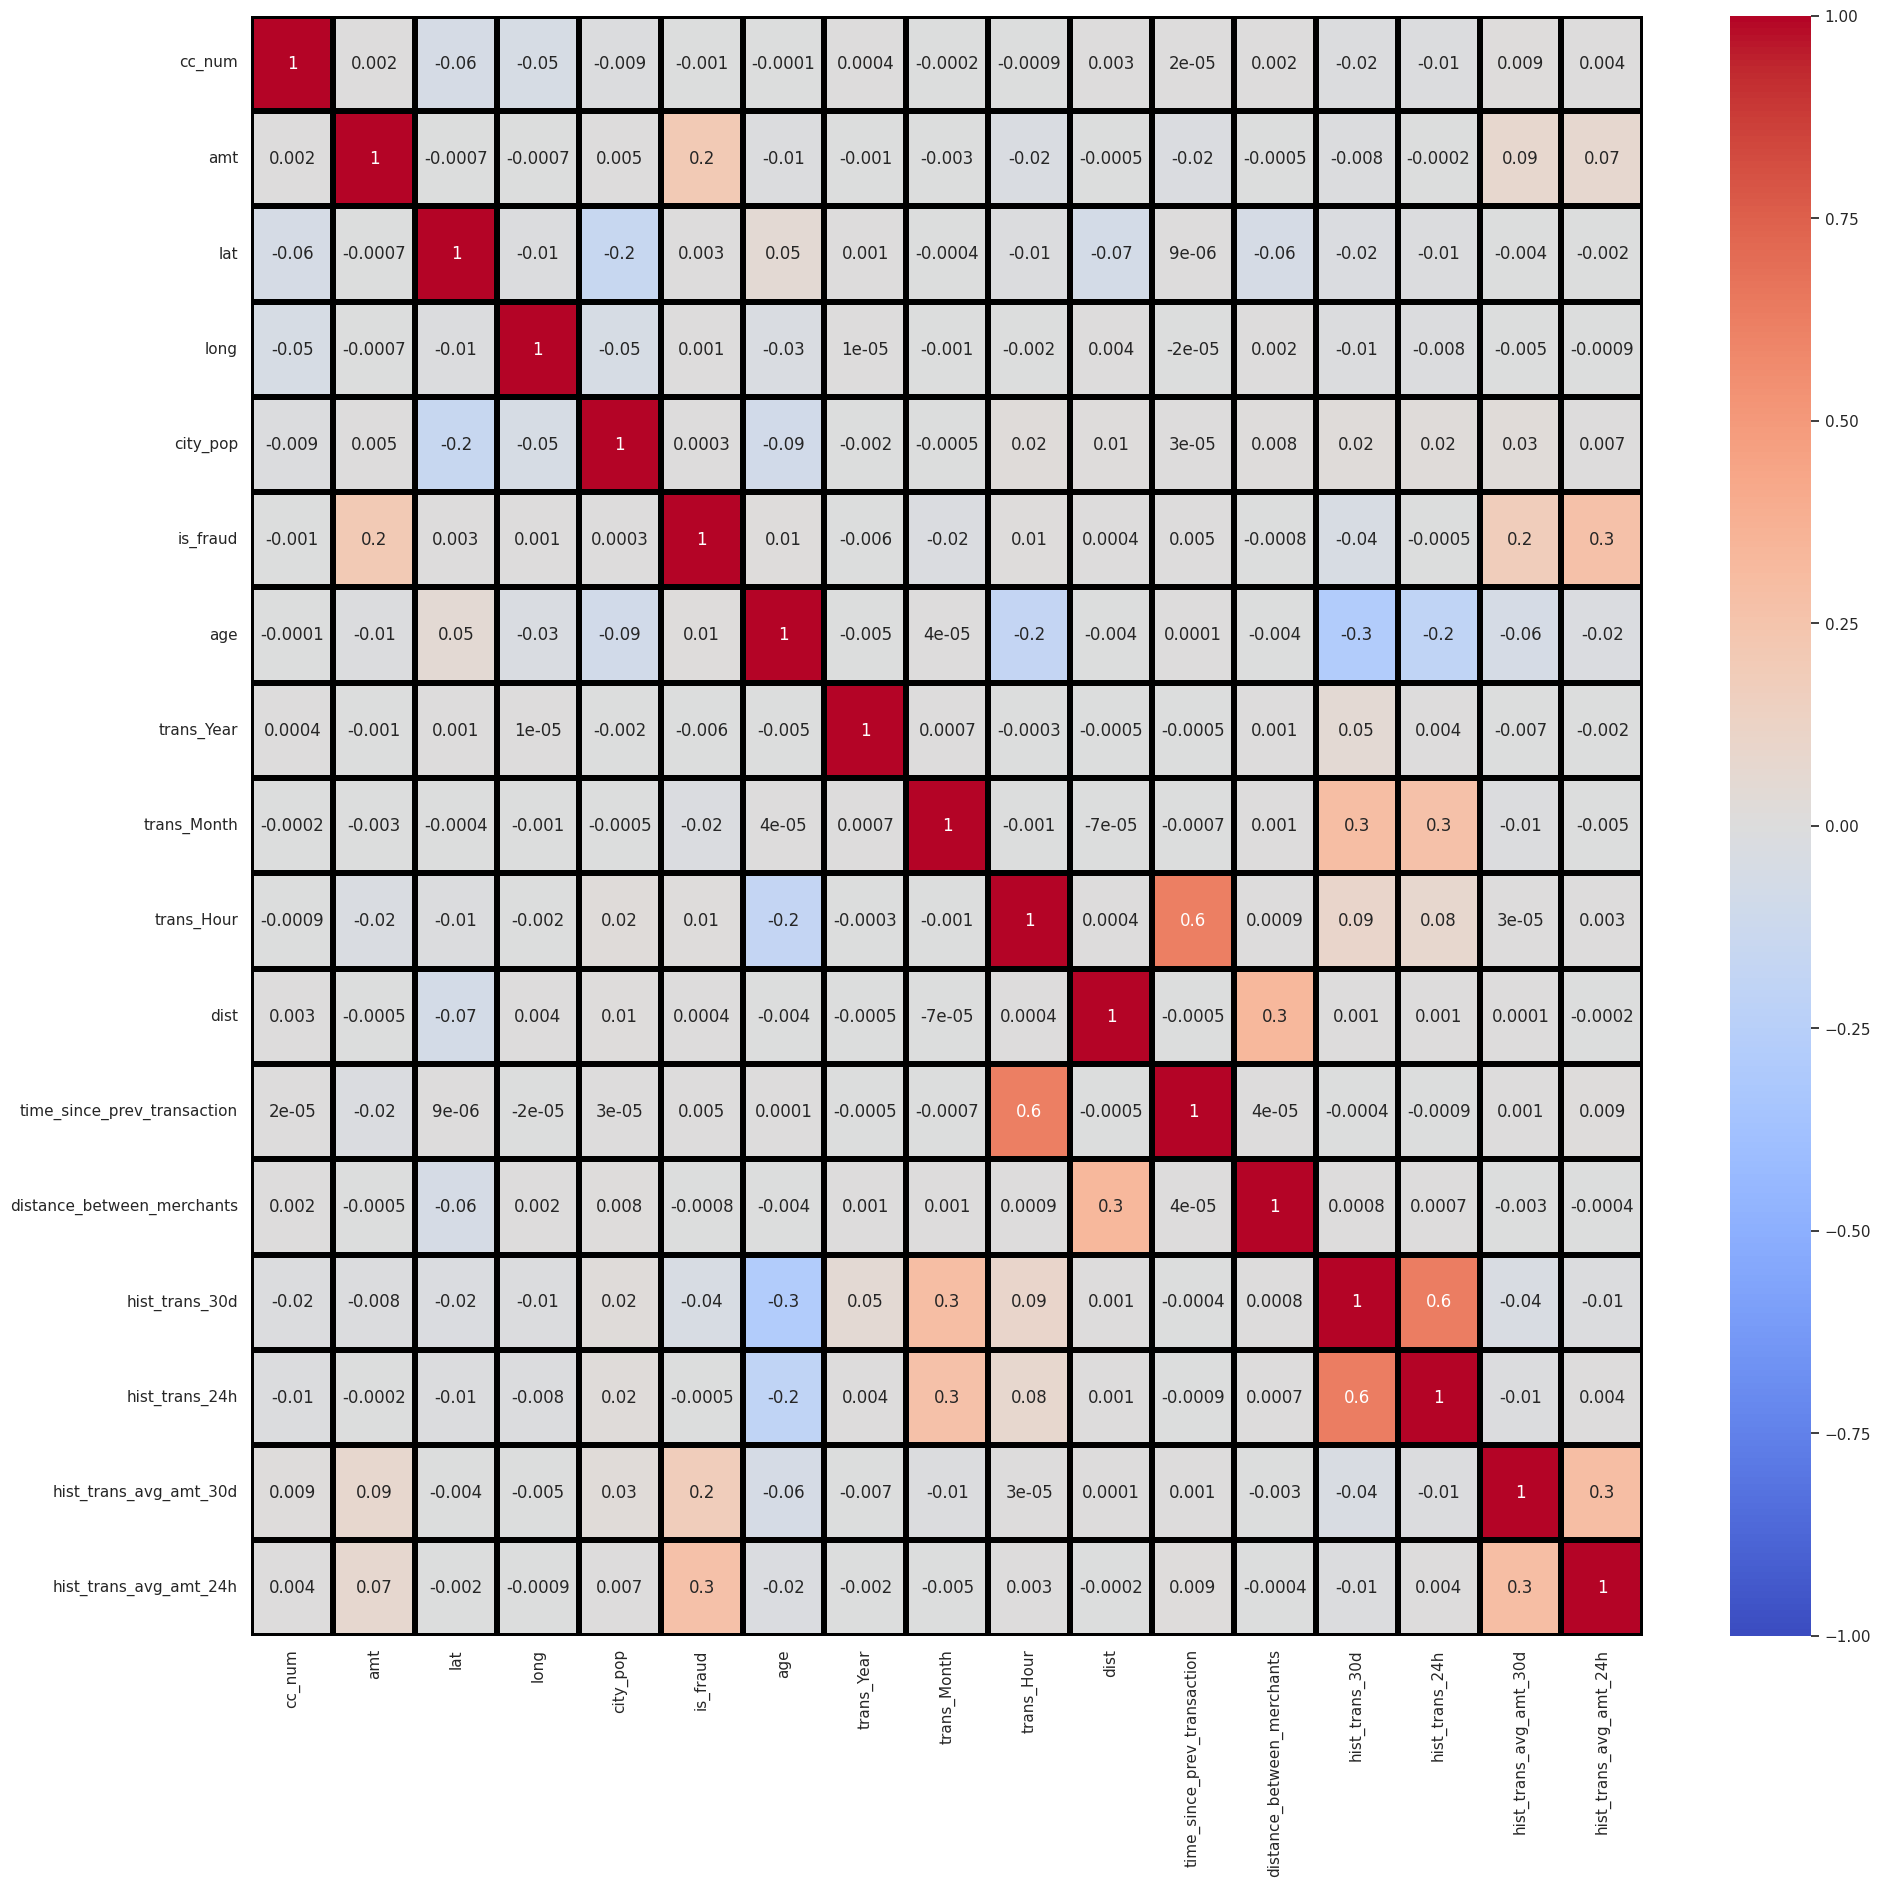

In [227]:

# Select only the numeric columns
numeric_df = df_data.select_dtypes(include=['number'])

# Compute the correlation matrix
cor = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(cor, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, linewidths=3, linecolor='black', cmap='coolwarm')
plt.show()

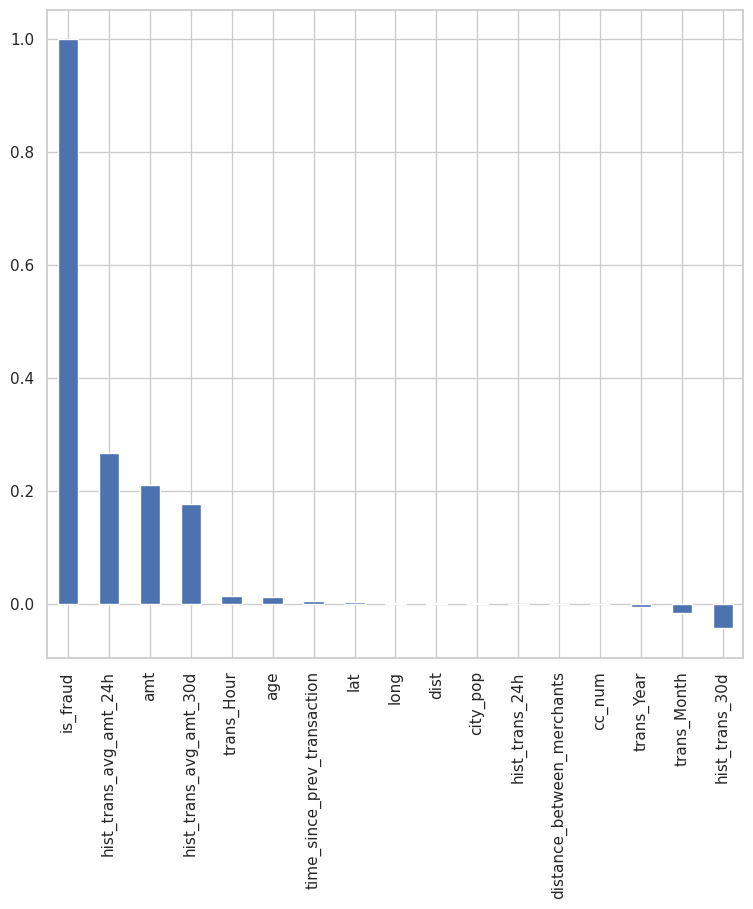

In [228]:
# Select only the numeric columns
numeric_df = df_data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation values for 'is_fraud'
plt.figure(figsize=(8, 8))
correlation_matrix['is_fraud'].sort_values(ascending=False).plot(kind='bar')
plt.show()


In [229]:
df_data.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'lat', 'long', 'city_pop', 'job', 'trans_num', 'is_fraud',
       'age', 'trans_Year', 'trans_Month', 'trans_Hour', 'trans_weekday',
       'dist', 'time_since_prev_transaction', 'distance_between_merchants',
       'hist_trans_30d', 'hist_trans_24h', 'hist_trans_avg_amt_30d',
       'hist_trans_avg_amt_24h'],
      dtype='object')

In [230]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 26 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   cc_num                       int64  
 1   merchant                     object 
 2   category                     object 
 3   amt                          float64
 4   gender                       object 
 5   street                       object 
 6   city                         object 
 7   state                        object 
 8   lat                          float64
 9   long                         float64
 10  city_pop                     int64  
 11  job                          object 
 12  trans_num                    object 
 13  is_fraud                     int64  
 14  age                          int64  
 15  trans_Year                   int32  
 16  trans_Month                  int32  
 17  trans_Hour                   int32  
 18  trans_weekday                object 
 19  

### Dummy creation

In [231]:
# Creating a dummy variable for 'Category' variable and dropping the first one.
Catg_dummy = pd.get_dummies(df_data['category'], drop_first=True, prefix='catg')

# Creating a dummy variable for 'Gender' variable and dropping the first one.
gender_dummy = pd.get_dummies(df_data['gender'], drop_first=True, prefix='gender')

# Creating a dummy variable for 'Weekday' variable and dropping the first one.
week_dummy = pd.get_dummies(df_data['trans_weekday'], drop_first=True, prefix='weekday')

# Creating a dummy variable for 'Month' variable and dropping the first one.
month_dummy = pd.get_dummies(df_data['trans_Month'], drop_first=True, prefix='month')

# Creating a dummy variable for 'Year' variable and dropping the first one.
year_dummy = pd.get_dummies(df_data['trans_Year'], drop_first=True, prefix='year')

# Adding the results to the master dataframe
df_data = pd.concat([df_data, Catg_dummy, gender_dummy, week_dummy, month_dummy, year_dummy], axis=1)

# We have created dummies for the variable, so we can drop them
df_data= df_data.drop(['category', 'gender', 'trans_weekday', 'trans_Month', 'trans_Year'], axis=1)
df_data.shape

(1852394, 53)

In [232]:
df_data

cc_num                            merchant     amt  \
0        2703186189652095          fraud_Rippin, Kub and Mann    4.97   
1            630423337322     fraud_Heller, Gutmann and Zieme  107.23   
2          38859492057661                fraud_Lind-Buckridge  220.11   
3        3534093764340240  fraud_Kutch, Hermiston and Farrell   45.00   
4         375534208663984                 fraud_Keeling-Crist   41.96   
...                   ...                                 ...     ...   
1852389    30560609640617               fraud_Reilly and Sons   43.77   
1852390  3556613125071656                fraud_Hoppe-Parisian  111.84   
1852391  6011724471098086                     fraud_Rau-Robel   86.88   
1852392     4079773899158               fraud_Breitenberg LLC    7.99   
1852393  4170689372027579                   fraud_Dare-Marvin   38.13   

                               street            city state      lat  \
0                      561 Perry Cove  Moravian Falls    NC  36.0788   
1        43039 Riley Greens Suite 393          Orient    WA  48.8878   
2            594 White Dale Suite 530      Malad City    ID  42.1808   
3         9443 Cynthia Court Apt. 038         Boulder    MT  46.2306   
4                    408 Bradley Rest        Doe Hill    VA  38.4207   
...                               ...             ...   ...      ...   
1852389           558 Michael Estates           Luray    MO  40.4931   
1852390           572 Davis Mountains    Lake Jackson    TX  29.0393   
1852391    144 Evans Islands Apt. 683         Burbank    WA  46.1966   
1852392    7020 Doyle Stream Apt. 951            Mesa    ID  44.6255   
1852393      830 Myers Plaza Apt. 384          Edmond    OK  35.6665   

             long  city_pop             job  ... month_4  month_5  month_6  \
0        -81.1781      3495    Psychologist  ...   False    False    False   
1       -118.2105       149         Teacher  ...   False    False    False   
2       -112.2620      4154         Officer  ...   False    False    False   
3       -112.1138      1939          OTHERS  ...   False    False    False   
4        -79.4629        99       Therapist  ...   False    False    False   
...           ...       ...             ...  ...     ...      ...      ...   
1852389  -91.8912       519    Town planner  ...   False    False    False   
1852390  -95.4401     28739  Futures trader  ...   False    False    False   
1852391 -118.9017      3684        Musician  ...   False    False    False   
1852392 -116.4493       129          OTHERS  ...   False    False    False   
1852393  -97.4798    116001           Buyer  ...   False    False    False   

         month_7  month_8  month_9  month_10  month_11  month_12  year_2020  
0          False    False    False     False     False     False      False  
1          False    False    False     False     False     False      False  
2          False    False    False     False     False     False      False  
3          False    False    False     False     False     False      False  
4          False    False    False     False     False     False      False  
...          ...      ...      ...       ...       ...       ...        ...  
1852389    False    False    False     False     False      True       True  
1852390    False    False    False     False     False      True       True  
1852391    False    False    False     False     False      True       True  
1852392    False    False    False     False     False      True       True  
1852393    False    False    False     False     False      True       True  

[1852394 rows x 53 columns]

- We have lots of variables with more unique values like city had 906 distinct values job, street, state and merchant which would make the higher number of features.
- For a feature with 3 levels we might be ok, but for a feature like "city" are introducing 900+ column into a original data set. 
- By doing this we make the dataset triple the size of the dataset, and this spells trouble for machine learning due to "the curse of dimensionality". 

### Label encoding

In [233]:

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encoding labels of following columns.  
df_data['state']= label_encoder.fit_transform(df_data['state']) 
df_data['job']= label_encoder.fit_transform(df_data['job']) 
df_data['merchant']= label_encoder.fit_transform(df_data['merchant'])
df_data['city']= label_encoder.fit_transform(df_data['city'])
df_data['street']= label_encoder.fit_transform(df_data['street'])

In [234]:
df_data

cc_num  merchant     amt  street  city  state      lat  \
0        2703186189652095       514    4.97     576   532     27  36.0788   
1            630423337322       241  107.23     439   619     47  48.8878   
2          38859492057661       390  220.11     610   474     13  42.1808   
3        3534093764340240       360   45.00     945    84     26  46.2306   
4         375534208663984       297   41.96     422   217     45  38.4207   
...                   ...       ...     ...     ...   ...    ...      ...   
1852389    30560609640617       507   43.77     573   471     24  40.4931   
1852390  3556613125071656       264  111.84     583   427     43  29.0393   
1852391  6011724471098086       496   86.88     138   110     47  46.1966   
1852392     4079773899158        75    7.99     711   508     13  44.6255   
1852393  4170689372027579       125   38.13     838   239     36  35.6665   

             long  city_pop  job  ... month_4  month_5  month_6  month_7  \
0        -81.1781      3495   70  ...   False    False    False    False   
1       -118.2105       149   82  ...   False    False    False    False   
2       -112.2620      4154   61  ...   False    False    False    False   
3       -112.1138      1939   59  ...   False    False    False    False   
4        -79.4629        99   87  ...   False    False    False    False   
...           ...       ...  ...  ...     ...      ...      ...      ...   
1852389  -91.8912       519   88  ...   False    False    False    False   
1852390  -95.4401     28739   37  ...   False    False    False    False   
1852391 -118.9017      3684   56  ...   False    False    False    False   
1852392 -116.4493       129   59  ...   False    False    False    False   
1852393  -97.4798    116001   11  ...   False    False    False    False   

         month_8  month_9  month_10  month_11  month_12  year_2020  
0          False    False     False     False     False      False  
1          False    False     False     False     False      False  
2          False    False     False     False     False      False  
3          False    False     False     False     False      False  
4          False    False     False     False     False      False  
...          ...      ...       ...       ...       ...        ...  
1852389    False    False     False     False      True       True  
1852390    False    False     False     False      True       True  
1852391    False    False     False     False      True       True  
1852392    False    False     False     False      True       True  
1852393    False    False     False     False      True       True  

[1852394 rows x 53 columns]

In [235]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 53 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   cc_num                       int64  
 1   merchant                     int64  
 2   amt                          float64
 3   street                       int64  
 4   city                         int64  
 5   state                        int64  
 6   lat                          float64
 7   long                         float64
 8   city_pop                     int64  
 9   job                          int64  
 10  trans_num                    object 
 11  is_fraud                     int64  
 12  age                          int64  
 13  trans_Hour                   int32  
 14  dist                         float64
 15  time_since_prev_transaction  float64
 16  distance_between_merchants   float64
 17  hist_trans_30d               float64
 18  hist_trans_24h               float64
 19  

### Splitting the Data into X & Y

In [236]:

from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df_data.drop(['is_fraud','cc_num', 'trans_num'],axis=1)

# Putting response variable to y
y = df_data['is_fraud']

In [237]:
X

merchant     amt  street  city  state      lat      long  city_pop  \
0             514    4.97     576   532     27  36.0788  -81.1781      3495   
1             241  107.23     439   619     47  48.8878 -118.2105       149   
2             390  220.11     610   474     13  42.1808 -112.2620      4154   
3             360   45.00     945    84     26  46.2306 -112.1138      1939   
4             297   41.96     422   217     45  38.4207  -79.4629        99   
...           ...     ...     ...   ...    ...      ...       ...       ...   
1852389       507   43.77     573   471     24  40.4931  -91.8912       519   
1852390       264  111.84     583   427     43  29.0393  -95.4401     28739   
1852391       496   86.88     138   110     47  46.1966 -118.9017      3684   
1852392        75    7.99     711   508     13  44.6255 -116.4493       129   
1852393       125   38.13     838   239     36  35.6665  -97.4798    116001   

         job  age  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
0         70   36  ...    False    False    False    False    False    False   
1         82   46  ...    False    False    False    False    False    False   
2         61   62  ...    False    False    False    False    False    False   
3         59   57  ...    False    False    False    False    False    False   
4         87   38  ...    False    False    False    False    False    False   
...      ...  ...  ...      ...      ...      ...      ...      ...      ...   
1852389   88   58  ...    False    False    False    False    False    False   
1852390   37   25  ...    False    False    False    False    False    False   
1852391   56   43  ...    False    False    False    False    False    False   
1852392   59   59  ...    False    False    False    False    False    False   
1852393   11   31  ...    False    False    False    False    False    False   

         month_10  month_11  month_12  year_2020  
0           False     False     False      False  
1           False     False     False      False  
2           False     False     False      False  
3           False     False     False      False  
4           False     False     False      False  
...           ...       ...       ...        ...  
1852389     False     False      True       True  
1852390     False     False      True       True  
1852391     False     False      True       True  
1852392     False     False      True       True  
1852393     False     False      True       True  

[1852394 rows x 50 columns]

In [238]:
X.shape, y.shape

((1852394, 50), (1852394,))

#### Test-Train Split

In [239]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,stratify = y,random_state=100)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (1296675, 50)
y_train:  (1296675,)
X_test:  (555719, 50)
y_test:  (555719,)


In [240]:
X_train

merchant     amt  street  city  state      lat     long  city_pop  \
1489446       415  108.23     952   811     18  30.5668 -90.4820      8512   
887864        155   60.29     782   580     14  39.3036 -89.2853      3458   
115189        384    9.81     866   421     34  43.2363 -78.3138       275   
108605         30   27.15     613   730     23  44.9913 -92.9487    753116   
67953         222  234.47     164   352     35  41.2419 -81.7453      7646   
...           ...     ...     ...   ...    ...      ...      ...       ...   
1003268       235  434.59     675   371      1  34.7789 -86.5438    190178   
1088777       381   96.75     608   733     43  29.3641 -98.4924   1595797   
1529779        28   18.68     181   815     48  45.4963 -89.7273      9594   
1217915       546   11.44      35   542     24  40.1362 -95.2138      1631   
1433227       229   69.01     307   353     46  44.3346 -73.0980      4542   

         job  age  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
1489446   12   73  ...    False    False    False    False     True    False   
887864    80   39  ...    False    False    False    False    False    False   
115189    82   60  ...    False    False    False    False    False    False   
108605    61   53  ...    False    False    False    False    False    False   
67953     51   36  ...    False    False    False    False    False    False   
...      ...  ...  ...      ...      ...      ...      ...      ...      ...   
1003268    6   51  ...    False    False    False    False    False    False   
1088777   59   29  ...    False    False    False    False    False    False   
1529779   59   27  ...    False    False    False    False    False     True   
1217915   59   71  ...    False     True    False    False    False    False   
1433227   16   26  ...    False    False    False    False     True    False   

         month_10  month_11  month_12  year_2020  
1489446     False     False     False       True  
887864      False     False      True      False  
115189      False     False     False      False  
108605      False     False     False      False  
67953       False     False     False      False  
...           ...       ...       ...        ...  
1003268     False     False     False       True  
1088777     False     False     False       True  
1529779     False     False     False       True  
1217915     False     False     False       True  
1433227     False     False     False       True  

[1296675 rows x 50 columns]

In [241]:
X_test

merchant     amt  street  city  state      lat      long  city_pop  \
84212           8    6.19     432   120     35  40.8027  -81.3739    192805   
679039        571   72.98     517   328     43  30.2816  -99.2410      2395   
1552913       210  101.37     188   877     29  41.4193  -99.3844        73   
1146122       548   62.08     818    76      4  39.8127 -120.6405      1725   
1813821       408  116.45     959   649      1  34.3470  -87.7154      5778   
...           ...     ...     ...   ...    ...      ...       ...       ...   
177055        151    8.11      78   651      3  33.8155 -112.1202   1312922   
1122272       669    6.88     170   905     43  31.1569  -94.3871      2836   
1273837       316   68.89     504   123     15  38.9763  -87.3667      4081   
1034715       683    6.42     949   817     16  39.1329  -95.7023    163415   
1000922       198    6.37     342     3     22  45.3637  -84.4695       937   

         job  age  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
84212     80   61  ...    False    False    False    False    False    False   
679039    64   31  ...    False    False    False    False    False    False   
1552913   23   89  ...    False    False    False    False    False     True   
1146122   30   57  ...     True    False    False    False    False    False   
1813821   29   72  ...    False    False    False    False    False    False   
...      ...  ...  ...      ...      ...      ...      ...      ...      ...   
177055    70   25  ...     True    False    False    False    False    False   
1122272   23   39  ...     True    False    False    False    False    False   
1273837   29   86  ...    False    False     True    False    False    False   
1034715   82   20  ...    False    False    False    False    False    False   
1000922   83   66  ...    False    False    False    False    False    False   

         month_10  month_11  month_12  year_2020  
84212       False     False     False      False  
679039       True     False     False      False  
1552913     False     False     False       True  
1146122     False     False     False       True  
1813821     False     False      True       True  
...           ...       ...       ...        ...  
177055      False     False     False      False  
1122272     False     False     False       True  
1273837     False     False     False       True  
1034715     False     False     False       True  
1000922     False     False     False       True  

[555719 rows x 50 columns]

#### Checking for Class imbalance in Train & Test

In [242]:
y_train.value_counts(normalize=True)

is_fraud
0    0.99479
1    0.00521
Name: proportion, dtype: float64

In [243]:
y_test.value_counts(normalize=True)

is_fraud
0    0.994791
1    0.005209
Name: proportion, dtype: float64

### Checking for Class imbalance in Train & Test and treating it

### SMOTE 


Process: -

    -Identify the feature vector and its nearest neighbour
    -Take the difference between the two
    -Multiply the difference with a random number between 0 and 1
    -Identify a new point on the line segment by adding the random number to feature vector
    -Repeat the process for identified feature vectors

In [244]:
import collections
from collections import Counter
print("Before SMOTE, counts of label '0'&'1': {} \n".format(sorted(Counter(y_train).items())))

# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
print("After SMOTE, counts of label '0'&'1': {}".format(sorted(Counter(y_resampled_smt).items())))
print(len(X_resampled_smt))

Before SMOTE, counts of label '0'&'1': [(0, 1289919), (1, 6756)] 

After SMOTE, counts of label '0'&'1': [(0, 1289919), (1, 1289919)]
2579838


### ADASYN

In [245]:
print("Before ADASYN, counts of label '0'&'1': {} \n".format(sorted(Counter(y_train).items())))
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
print("After ADASYN, counts of label '0'&'1': {}".format(sorted(Counter(y_resampled_ada).items())))
print(len(X_resampled_ada))

Before ADASYN, counts of label '0'&'1': [(0, 1289919), (1, 6756)] 



# Model Building

In [246]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, RocCurveDisplay, roc_auc_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score

### Using Decision Trees (Default Hyperparameters) for SMOTE data

In [247]:
# Lets import decision tree libraries
from sklearn.tree import DecisionTreeClassifier

# Lets create a decision tree with the default hyper parameters for SMOTE data
dt_smt_default = DecisionTreeClassifier(random_state=42)

#### Fitting the decision tree with default hyperparameters

In [248]:
# Lets fit the decision tree with default hyperparameters
dt_smt_default.fit(X_resampled_smt, y_resampled_smt)

DecisionTreeClassifier(random_state=42)

In [249]:
y_train_pred_dt_smt = dt_smt_default.predict(X_resampled_smt)
y_test_pred_dt_smt = dt_smt_default.predict(X_test)

In [249]:
print(classification_report(y_resampled_smt, y_train_pred_dt_smt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



#### Making predictions on the test set

Accuracy:  99.6%
F1 score:  66.5%
Recall:  84.7%
Precision:  54.8%
ROC for the test dataset: 92.2%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.55      0.85      0.67      2895

    accuracy                           1.00    555719
   macro avg       0.77      0.92      0.83    555719
weighted avg       1.00      1.00      1.00    555719



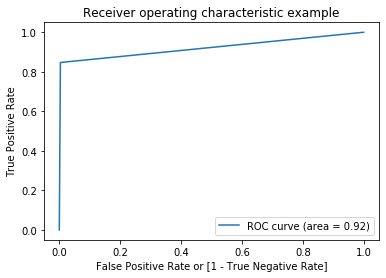


 Confussion Matrix:
 [[550802   2022]
 [   443   2452]]


In [250]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_smt)))
pred_probs_test = dt_smt_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_dt_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_smt))

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.92, our model seems to be doing excellent on the test dataset.

In [251]:
confusion_dt_smt = metrics.confusion_matrix( y_test, y_test_pred_dt_smt)

TN = confusion_dt_smt[0,0] # true negatives 
TP = confusion_dt_smt[1,1] # true positives
FP = confusion_dt_smt[0,1] # false positives
FN = confusion_dt_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  84.7%
Specificity:  99.6%
False postive rate: 0.4%
Positive predictive value: 54.8%
Negative predictive value: 99.9%


### Using Decision Trees (Default Hyperparameters) for ADASYN data

In [253]:
# Lets import decision tree libraries
from sklearn.tree import DecisionTreeClassifier

# Lets create a decision tree with the default hyper parameters for ADASYN Data
dt_ada_default = DecisionTreeClassifier(random_state=42)

## Fitting the decision tree with default hyperparameters

In [254]:
# Lets fit the Random Forest with default hyperparameters
dt_ada_default.fit(X_resampled_ada, y_resampled_ada)

DecisionTreeClassifier(random_state=42)

In [256]:
y_train_pred_dt_ada = dt_ada_default.predict(X_resampled_ada)
y_test_pred_dt_ada = dt_ada_default.predict(X_test)

In [257]:
print(classification_report(y_resampled_ada, y_train_pred_dt_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1290809

    accuracy                           1.00   2580728
   macro avg       1.00      1.00      1.00   2580728
weighted avg       1.00      1.00      1.00   2580728



## Making predictions on the test set

Accuracy:  99.6%
F1 score:  67.4%
Recall:  84.1%
Precision:  56.3%
ROC for the test dataset: 91.9%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.56      0.84      0.67      2895

    accuracy                           1.00    555719
   macro avg       0.78      0.92      0.84    555719
weighted avg       1.00      1.00      1.00    555719



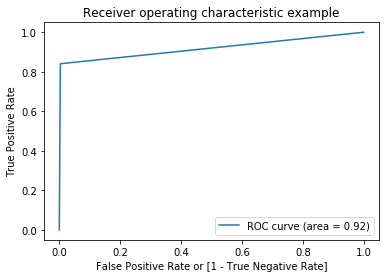


 Confussion Matrix:
 [[550932   1892]
 [   461   2434]]


In [258]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_ada)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_ada)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_ada)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_ada)))
pred_probs_test = dt_ada_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_dt_ada))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_ada))

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

<b>Inferences: </b><br>
        Since we got a value of 0.92, our model seems to be doing excellent on the test dataset.




In [260]:
confusion_dt_ada = confusion_matrix( y_test, y_test_pred_dt_ada)

TN = confusion_dt_ada[0,0] # true negatives 
TP = confusion_dt_ada[1,1] # true positives
FP = confusion_dt_ada[0,1] # false positives
FN = confusion_dt_ada[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  84.1%
Specificity:  99.7%
False postive rate: 0.3%
Positive predictive value: 56.3%
Negative predictive value: 99.9%


### Conclusion:- From Decision Tree (Default Hyperparameters) 

## For SMOTE data    

###   Classification Report for Test data
                     
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.55      0.85      0.67      2895

           
#### Accuracy:  99.6%
#### F1 score:  66.5%
#### Recall:  84.7%
#### Precision:  54.8%
#### ROC for the test dataset: 92.2%

## For ADASYN data    

###   Classification Report for Test data

                precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.56      0.84      0.67      2895

           
#### Accuracy:  99.6%
#### F1 score:  67.4%
#### Recall:  84.1%
#### Precision:  56.3%
#### ROC for the test dataset: 91.9%

###   Classification Report for Target (1) from Decision Tree(default Hyperparameter) on Test data
                         
         precision(%)  |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative 
    Positive predictive|(sensitivity)|            |            |          |              |  rate (%)    | predictive 
           value(%)    |             |            |            |          |              |              | value(%)
    -------------------|-------------|------------|------------|----------|--------------|--------------|------------- 
    SMOTE data =>  54.8|    84.7     |   66.5     |   99.6     |    92.2  |     99.6     |     0.4      |   99.9
    -------------------|-------------|------------|------------|----------|--------------|--------------|-------------
    ADASYN data => 56.3|    84.1     |   67.4     |   99.6     |    91.9  |     99.7     |     0.3      |   99.9

### Hyper-parameter tuning for the Decision Tree for SMOTE data

#### Since we are getting high recall and ROC for SMOTE test dataset, so we will do the hyparameter tuning on SMOTE data

In [261]:
dt = DecisionTreeClassifier(random_state=42)

In [262]:
params = {
    'max_depth': [10,20],
    'min_samples_leaf': [5,10],
    'min_samples_split': [5,10],
     }

In [263]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           verbose=1,
                            cv=4,
                            n_jobs=-1,
                            scoring="recall")

In [264]:
%%time
grid_search.fit(X_resampled_smt, y_resampled_smt)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed: 12.2min finished


Wall time: 14min 6s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10]},
             scoring='recall', verbose=1)

#### Grid_search.cv_results_ :- This function helps us to try out different combinations of hyperparameters which ultimately eased our process of figuring out these best values.

In [271]:
score_dt = pd.DataFrame(grid_search.cv_results_)
score_dt.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     145.941714      1.987122         2.499245        1.585409   
1     146.945459      1.855993         3.979874        1.843723   
2     127.112324      2.212928         1.747052        0.150201   
3     134.259265      2.491003         2.873650        0.260476   
4     218.352833      1.445518         2.098555        0.348976   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0              10                      5                       5   
1              10                      5                      10   
2              10                     10                       5   
3              10                     10                      10   
4              20                      5                       5   

                                              params  split0_test_score  \
0  {'max_depth': 10, 'min_samples_leaf': 5, 'min_...           0.971570   
1  {'max_depth': 10, 'min_samples_leaf': 5, 'min_...           0.971570   
2  {'max_depth': 10, 'min_samples_leaf': 10, 'min...           0.971508   
3  {'max_depth': 10, 'min_samples_leaf': 10, 'min...           0.971508   
4  {'max_depth': 20, 'min_samples_leaf': 5, 'min_...           0.992620   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.972463           0.973415           0.974107         0.972889   
1           0.972463           0.973415           0.974107         0.972889   
2           0.972414           0.973344           0.974039         0.972826   
3           0.972414           0.973344           0.974039         0.972826   
4           0.995249           0.995643           0.996254         0.994942   

   std_test_score  rank_test_score  
0        0.000959                5  
1        0.000959                5  
2        0.000955                7  
3        0.000955                7  
4        0.001387                1

In [273]:
grid_search.best_score_

0.9949415433849597

In [274]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [276]:
y_train_pred_dt_hp_smt = dt_best.predict(X_resampled_smt)
y_test_pred_dt_hp_smt = dt_best.predict(X_test)

In [277]:
print(classification_report(y_resampled_smt, y_train_pred_dt_hp_smt))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1289919
           1       0.99      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



#### Making predictions on the test set

Accuracy:  99.3%
F1 score:  56.5%
Recall:  88.8%
Precision:  41.4%
ROC for the test dataset: 95.5%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    552824
           1       0.41      0.89      0.56      2895

    accuracy                           0.99    555719
   macro avg       0.71      0.94      0.78    555719
weighted avg       1.00      0.99      0.99    555719



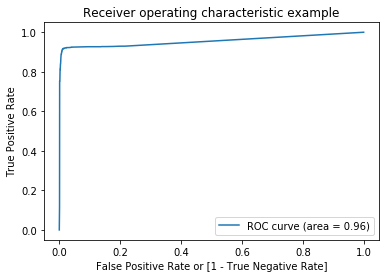


 Confussion Matrix:
 [[549181   3643]
 [   323   2572]]


In [278]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_hp_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_hp_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_hp_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_hp_smt)))
pred_probs_test = dt_best.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_dt_hp_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_hp_smt))

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

 <b>Inferences: </b><br>
  Since we got a value of 0.96, our model seems to be doing excellent on the test dataset.



In [280]:
confusion_dt_hp_smt = metrics.confusion_matrix( y_test, y_test_pred_dt_hp_smt)

TN = confusion_dt_hp_smt[0,0] # true negatives 
TP = confusion_dt_hp_smt[1,1] # true positives
FP = confusion_dt_hp_smt[0,1] # false positives
FN = confusion_dt_hp_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  88.8%
Specificity:  99.3%
False postive rate: 0.7%
Positive predictive value: 41.4%
Negative predictive value: 99.9%


In [281]:
dt_best.feature_importances_

array([1.12636573e-03, 2.11219167e-01, 1.65165053e-03, 1.84128851e-03,
       1.26779059e-03, 1.21797232e-03, 1.91327287e-03, 5.57677791e-03,
       1.19037945e-03, 4.12579631e-03, 1.01478745e-02, 6.63002170e-04,
       5.81409339e-03, 8.12325686e-04, 3.75678675e-03, 1.81086360e-02,
       2.35403249e-03, 6.47043841e-01, 3.40359194e-03, 1.10166409e-02,
       3.50301655e-03, 7.70879449e-03, 1.81641371e-03, 4.27150867e-03,
       2.19156985e-03, 7.34506422e-03, 9.92497041e-03, 1.72356039e-03,
       6.09754449e-03, 1.00112293e-02, 6.47410560e-03, 1.15928897e-03,
       2.44774535e-04, 1.11407573e-04, 4.42699265e-04, 8.60381381e-05,
       1.79141387e-04, 1.50700157e-04, 3.26882782e-04, 5.94288529e-05,
       1.31531012e-04, 7.80412848e-05, 1.96781561e-04, 7.60577081e-05,
       1.78913167e-04, 5.41632317e-04, 9.72837696e-05, 3.79382371e-05,
       1.04211098e-04, 4.78183967e-04])

In [282]:
imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": dt_best.feature_importances_
})

In [283]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(15)

Varname       Imp
17       hist_trans_avg_amt_24h  0.647044
1                           amt  0.211219
15               hist_trans_24h  0.018109
19           catg_gas_transport  0.011017
10                   trans_Hour  0.010148
29            catg_shopping_pos  0.010011
26                catg_misc_pos  0.009925
21             catg_grocery_pos  0.007709
25                catg_misc_net  0.007345
30                  catg_travel  0.006474
28            catg_shopping_net  0.006098
12  time_since_prev_transaction  0.005814
7                      city_pop  0.005577
23                    catg_home  0.004272
9                           age  0.004126

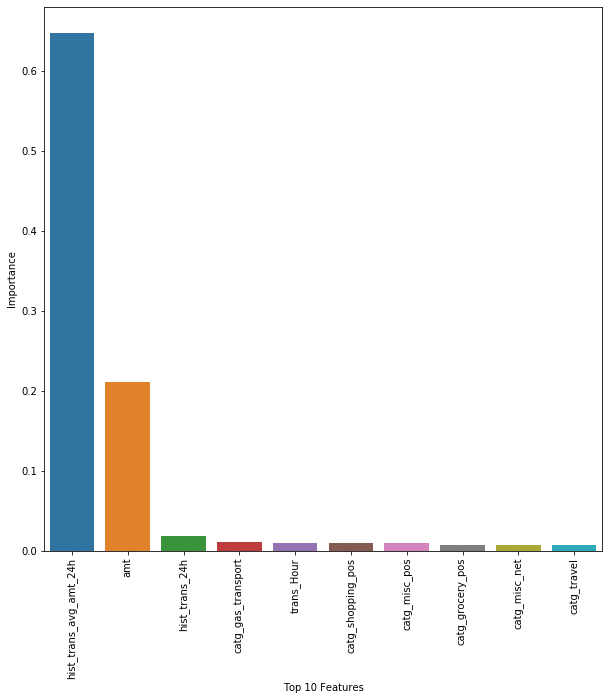

In [285]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

### Conclusion

Based on our Decision Tree (Hyperparameter Tuning) model, some features are identified which will help to find a fradulent transcation.
  
1)  hist_trans_avg_amt_24h:	0.647<br>
2)	amt: 0.211<br>
3)	hist_trans_24h:	0.018<br>
4)	catg_gas_transport:	0.011<br>
5)	trans_Hour:	0.010<br>
6)	catg_shopping_pos:	0.010<br>
7)	catg_misc_pos:	0.010<br>
8)	catg_grocery_pos:	0.008<br>
9)	catg_misc_net:	0.007<br>
10)	catg_travel:	0.006<br>

### Conclusions from Decision Tree (Hyperparameter Tuning) :- 

###     Classification Report for Test data
                  
                precision    recall  f1-score   support

           0       1.00      0.99      1.00    552824
           1       0.41      0.89      0.56      2895
                               
#### Accuracy:  99.3%
#### F1 score:  56.5%
#### Recall:  88.8%
#### Precision: 41.4%
#### ROC for the test dataset: 95.5%

###   Classification Report for Target (1) from Decision Tree(Hyperparameter Tunning) on SMOTE Test data
                     
         precision(%)  |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative 
    Positive predictive|(sensitivity)|            |            |          |              |  rate (%)    | predictive 
           value(%)    |             |            |            |          |              |              | value(%)
    -------------------|-------------|------------|------------|----------|--------------|--------------|------------- 
    SMOTE data   41.4  |    88.8     |   56.5     |   99.3     |    95.5  |   99.3       |     0.7      |  99.9

### Model 2:  Random Forest

### Using Random Forest (Default Hyperparameters) for SMOTE data

In [286]:
# Lets import Random Forest libraries
from sklearn.ensemble import RandomForestClassifier

# Lets create a Random Forest with the default hyper parameters for SMOTE Data
rf_smt_default = RandomForestClassifier(random_state=100, oob_score=True)

#### Fitting the Random Forest with default hyperparameters

In [287]:
# Lets fit the Random Forest with default hyperparameters
rf_smt_default.fit(X_resampled_smt, y_resampled_smt)

RandomForestClassifier(oob_score=True, random_state=100)

In [288]:
rf_smt_default.oob_score_

0.9995007438451562

In [289]:
y_train_pred_rf_smt = rf_smt_default.predict(X_resampled_smt)
y_test_pred_rf_smt = rf_smt_default.predict(X_test)

In [290]:
print(classification_report(y_resampled_smt, y_train_pred_rf_smt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



#### Making predictions on the test set

Accuracy:  99.8%
F1 score:  84.3%
Recall:  80.0%
Precision:  89.1%
ROC for the test dataset: 99.6%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.89      0.80      0.84      2895

    accuracy                           1.00    555719
   macro avg       0.95      0.90      0.92    555719
weighted avg       1.00      1.00      1.00    555719



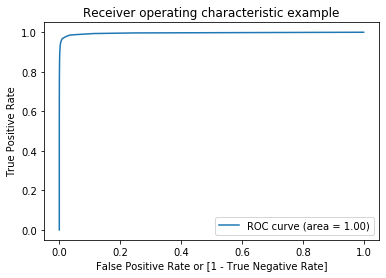


 Confussion Matrix:
 [[552541    283]
 [   580   2315]]


In [291]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf_smt)))
pred_probs_test = rf_smt_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_rf_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf_smt))

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 1, our model seems to be doing excellent on the test dataset.

In [292]:
confusion_rf_smt = confusion_matrix( y_test, y_test_pred_rf_smt)

TN = confusion_rf_smt[0,0] # true negatives
TP = confusion_rf_smt[1,1] # true positives
FP = confusion_rf_smt[0,1] # false positives
FN = confusion_rf_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  80.0%
Specificity:  99.9%
False postive rate: 0.1%
Positive predictive value: 89.1%
Negative predictive value: 99.9%


#### Using Random Forest (Default Hyperparameters) for ADASYN data


#### Using Random Forest (Default Hyperparameters) for ADASYN data

In [293]:
# Lets import Random Forest libraries
from sklearn.ensemble import RandomForestClassifier

# Lets create a Random Forest with the default hyper parameters for ADASYN Data
rf_ada_default = RandomForestClassifier(random_state=100, oob_score=True)

#### Fitting the Random Forest with default hyperparameters

In [294]:
# Lets fit the Random Forest with default hyperparameters
rf_ada_default.fit(X_resampled_ada, y_resampled_ada)

RandomForestClassifier(oob_score=True, random_state=100)

In [298]:
rf_ada_default.oob_score_

0.9995129281350069

In [300]:
y_train_pred_rf_ada = rf_ada_default.predict(X_resampled_ada)
y_test_pred_rf_ada = rf_ada_default.predict(X_test)

In [301]:
print(classification_report(y_resampled_ada, y_train_pred_rf_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1290809

    accuracy                           1.00   2580728
   macro avg       1.00      1.00      1.00   2580728
weighted avg       1.00      1.00      1.00   2580728



#### Making predictions on the test set

Accuracy:  99.8%
F1 score:  83.6%
Recall:  77.6%
Precision:  90.6%
ROC for the test dataset: 99.5%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.91      0.78      0.84      2895

    accuracy                           1.00    555719
   macro avg       0.95      0.89      0.92    555719
weighted avg       1.00      1.00      1.00    555719



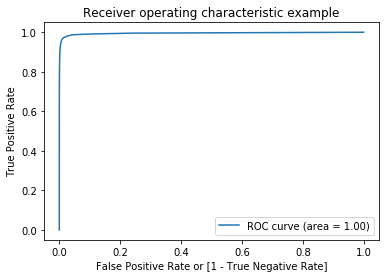


 Confussion Matrix:
 [[552592    232]
 [   649   2246]]


In [303]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf_ada)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf_ada)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf_ada)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf_ada)))
pred_probs_test = rf_ada_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_rf_ada))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf_ada))

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 1, our model seems to be doing excellent on the test dataset.

In [304]:
confusion_rf_ada = confusion_matrix( y_test, y_test_pred_rf_ada)

TN = confusion_rf_ada[0,0] # true negatives
TP = confusion_rf_ada[1,1] # true positives
FP = confusion_rf_ada[0,1] # false positives
FN = confusion_rf_ada[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  77.6%
Specificity:  100.0%
False postive rate: 0.0%
Positive predictive value: 90.6%
Negative predictive value: 99.9%


### Conclusion:- From Random Forest (Default Hyperparameters) 

## For SMOTE data    

###   Classification Report for Test data
                     
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.89      0.80      0.84      2895
         
#### Accuracy:  99.8%
#### F1 score:  84.3%
#### Recall:  80.0%
#### Precision:  89.1%
#### ROC for the test dataset: 99.6%


## For ADASYN data    

###   Classification Report for Test data

                precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.91      0.78      0.84      2895

#### Accuracy:  99.8%
#### F1 score:  83.6%
#### Recall:  77.6%
#### Precision:  90.6%
#### ROC for the test dataset: 99.5%

###   Classification Report for Target (1) from Random Forest(Default Hyperparameters) on Test data
                     
         precision(%)  |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative 
    Positive predictive|(sensitivity)|            |            |          |              |  rate (%)    | predictive 
           value(%)    |             |            |            |          |              |              | value(%)
    -------------------|-------------|------------|------------|----------|--------------|--------------|-------------
    SMOTE data   89.1  |    80.0     |   84.3     |   99.8     |    99.6  |   99.9       |      0.1     |    99.9
    -------------------|-------------|------------|------------|----------|--------------|--------------|-------------
    ADASYN data  90.6  |    77.6     |   83.6     |   99.8     |    99.5  |   100        |      0.0     |    99.9

### Hyper-parameter tuning for the Random Forest for SMOTE data¶

#### Since we are getting high recall, F1 score and Roc for SMOTE test dataset, so we will do the hyparameter tuning on SMOTE data

In [305]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [306]:
params = {
    'max_depth': [10,20],
    'min_samples_leaf': [5,10],
    'n_estimators': [50,100],
    'min_samples_split': [5,10],
     }

In [307]:
from sklearn.model_selection import RandomizedSearchCV
Randomized_search = RandomizedSearchCV(estimator=rf,
                           param_distributions=params,
                           verbose=1,
                            cv=4,
                            return_train_score=True,
                            n_jobs=-1,
                            n_iter=50,
                            scoring="recall")

In [308]:
%%time
Randomized_search.fit(X_resampled_smt, y_resampled_smt)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 94.7min
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed: 213.9min finished


Wall time: 3h 40min 34s


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20],
                                        'min_samples_leaf': [5, 10],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [50, 100]},
                   return_train_score=True, scoring='recall', verbose=1)

#### Grid_search.cv_results_ :- This function helps us to try out different combinations of hyperparameters which ultimately eased our process of figuring out these best values.

In [310]:
score_rf = pd.DataFrame(Randomized_search.cv_results_)
score_rf.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     880.585090     28.005914        22.631009        0.956583   
1    1535.873988     15.712813        29.466243        2.760626   
2     770.891273     19.223823        22.967695        2.340401   
3    1409.004206      7.200449        28.999730        2.553321   
4     828.954341     11.772879        25.295787        3.179258   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                 50                       5                      5   
1                100                       5                      5   
2                 50                      10                      5   
3                100                      10                      5   
4                 50                       5                     10   

  param_max_depth                                             params  \
0              10  {'n_estimators': 50, 'min_samples_split': 5, '...   
1              10  {'n_estimators': 100, 'min_samples_split': 5, ...   
2              10  {'n_estimators': 50, 'min_samples_split': 10, ...   
3              10  {'n_estimators': 100, 'min_samples_split': 10,...   
4              10  {'n_estimators': 50, 'min_samples_split': 5, '...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.953386           0.954729           0.953399           0.955746   
1           0.953144           0.954261           0.952617           0.954887   
2           0.953386           0.954729           0.953399           0.955746   
3           0.953144           0.954261           0.952617           0.954887   
4           0.953833           0.952602           0.954955           0.956317   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.954315        0.000990               11            0.954417   
1         0.953727        0.000895               15            0.954123   
2         0.954315        0.000990               11            0.954417   
3         0.953727        0.000895               15            0.954123   
4         0.954427        0.001372                9            0.954778   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.955134            0.953410            0.955116   
1            0.954633            0.952616            0.954284   
2            0.955134            0.953410            0.955116   
3            0.954633            0.952616            0.954284   
4            0.953269            0.954976            0.955593   

   mean_train_score  std_train_score  
0          0.954519         0.000703  
1          0.953914         0.000772  
2          0.954519         0.000703  
3          0.953914         0.000772  
4          0.954654         0.000854

In [313]:
Randomized_search.best_score_

0.9938833371142983

#### Grid_search.best_estimator

In [314]:
rf_best = Randomized_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                       n_jobs=-1, random_state=42)

In [317]:
y_train_pred_rf_hp_smt = rf_best.predict(X_resampled_smt)
y_test_pred_rf_hp_smt = rf_best.predict(X_test)

In [318]:
print(classification_report(y_resampled_smt, y_train_pred_rf_hp_smt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



#### Making predictions on the test set

Accuracy:  99.7%
F1 score:  74.0%
Recall:  85.9%
Precision:  65.0%
ROC for the test dataset: 99.5%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.65      0.86      0.74      2895

    accuracy                           1.00    555719
   macro avg       0.82      0.93      0.87    555719
weighted avg       1.00      1.00      1.00    555719



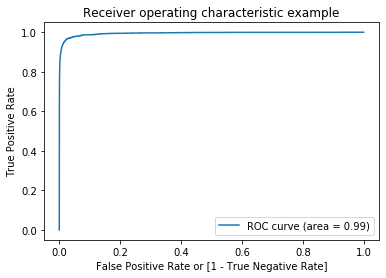


 Confussion Matrix:
 [[551484   1340]
 [   409   2486]]


In [319]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf_hp_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf_hp_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf_hp_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf_hp_smt)))
pred_probs_test = rf_best.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_rf_hp_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf_hp_smt))

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.99, our model seems to be doing excellent on the test dataset.

In [320]:
confusion_rf_hp_smt = confusion_matrix( y_test, y_test_pred_rf_hp_smt)

TN = confusion_rf_hp_smt[0,0] # true negatives 
TP = confusion_rf_hp_smt[1,1] # true positives
FP = confusion_rf_hp_smt[0,1] # false positives
FN = confusion_rf_hp_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  85.9%
Specificity:  99.8%
False postive rate: 0.2%
Positive predictive value: 65.0%
Negative predictive value: 99.9%


In [321]:
rf_best.feature_importances_

array([2.28617517e-03, 2.91628814e-01, 3.77889078e-03, 4.01043678e-03,
       2.78343475e-03, 3.78086307e-03, 3.58011678e-03, 6.47651683e-03,
       3.07568668e-03, 5.00427225e-03, 3.66527219e-02, 1.71910378e-03,
       1.59407962e-02, 1.90981243e-03, 2.52038338e-02, 3.39583614e-02,
       6.53650918e-02, 3.54511610e-01, 6.32717221e-03, 4.86428460e-03,
       2.24495109e-03, 7.22398253e-03, 4.78691269e-03, 1.06714522e-02,
       8.13921446e-03, 2.28343901e-03, 6.36045810e-03, 3.37905913e-03,
       3.46437237e-03, 5.56962093e-03, 3.73057480e-03, 3.44468987e-03,
       1.47950495e-02, 6.28468179e-03, 1.31358302e-02, 3.66134129e-03,
       7.41607731e-03, 3.61691411e-03, 2.96966549e-04, 2.85900519e-04,
       4.55829604e-04, 4.03694248e-04, 7.55128867e-04, 1.12071766e-03,
       5.19583568e-04, 3.74903633e-04, 3.76230206e-04, 5.31078407e-04,
       4.78081922e-03, 7.03253115e-03])

In [323]:
imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": rf_best.feature_importances_
})

In [324]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

Varname       Imp
17       hist_trans_avg_amt_24h  0.354512
1                           amt  0.291629
16       hist_trans_avg_amt_30d  0.065365
10                   trans_Hour  0.036653
15               hist_trans_24h  0.033958
14               hist_trans_30d  0.025204
12  time_since_prev_transaction  0.015941
32               weekday_Monday  0.014795
34               weekday_Sunday  0.013136
23                    catg_home  0.010671

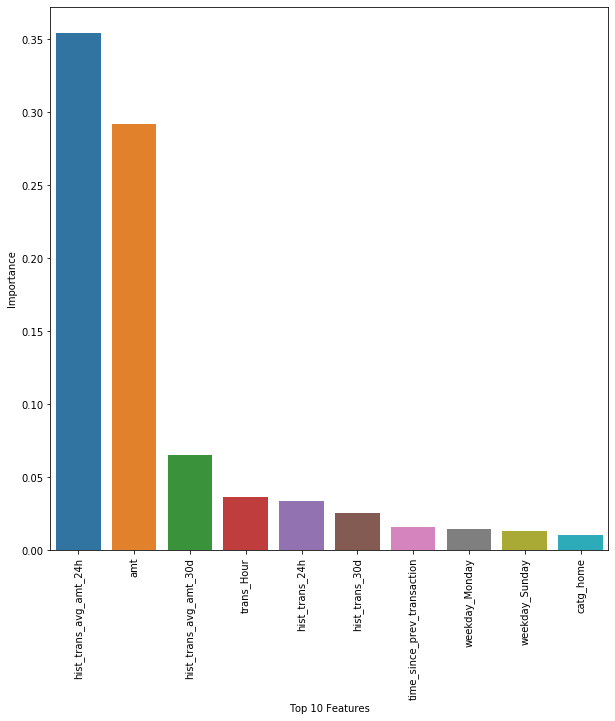

In [326]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

### Conclusion

Based on our Random Forest (Hyperparameters Tuning) model, some features are identified which will help to find a fradulent transcation.
   
1)  hist_trans_avg_amt_24h:	0.35<br>
2)	amt:	0.29<br>
3)	hist_trans_avg_amt_30d:	0.065<br>
4)	trans_Hour:	0.036<br>
5)	hist_trans_24h:	0.033958<br>
6)	hist_trans_30d:	0.025204<br>
7)	time_since_prev_transaction:	0.015941<br>
8)	weekday_Monday:	0.014795<br>
9)	weekday_Sunday:	0.013136<br>
10)	catg_home:	0.010671<br>

### Conclusions from Random Forest (Hyperparameters Tuning) :- 

###   Classification Report for Test data
                                  
                precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.65      0.86      0.74      2895
           
#### Accuracy:  99.7%
#### F1 score:  74.0%
#### Recall:  85.9%
#### Precision:  65.0%
#### ROC for the test dataset: 99.5%

###   Classification Report for Target (1) from Random Forest(Hyperparameter Tunning) on SMOTE Test data
                     
         precision(%)  |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative 
    Positive predictive|(sensitivity)|            |            |          |              |  rate (%)    | predictive 
           value(%)    |             |            |            |          |              |              | value(%)
    -------------------|-------------|------------|------------|----------|--------------|--------------|-------------
    SMOTE data   65.0  |    85.9     |   74.0     |   99.7     |    99.5  |   99.8       |      0.2     |  99.9

### Model 3: Xgboost

#### Using Xgboost (Default Hyperparameters) for SMOTE data

In [328]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
# Lets Supress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [330]:
# fit model on training data with default hyperparameters
model_xgb = XGBClassifier(random_state=100)

# Fitting the model on Train SMOTE data 
model_xgb.fit(X_resampled_smt, y_resampled_smt)

[07:09:09] WARNING: /usr/lib/python3/dist-packages/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [331]:
y_train_pred_xgb = model_xgb.predict(X_resampled_smt)
y_test_pred_xgb = model_xgb.predict(X_test)

In [332]:
print(classification_report(y_resampled_smt, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



#### Making predictions on the test set

Accuracy:  99.9%
F1 score:  87.4%
Recall:  89.6%
Precision:  85.2%
ROC for the test dataset: 99.8%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.85      0.90      0.87      2895

    accuracy                           1.00    555719
   macro avg       0.93      0.95      0.94    555719
weighted avg       1.00      1.00      1.00    555719



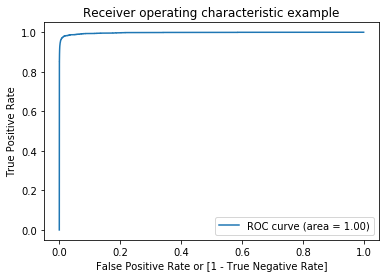


 Confussion Matrix:
 [[552373    451]
 [   300   2595]]


In [333]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_xgb)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_xgb)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_xgb)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_xgb)))
pred_probs_test = model_xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_xgb))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb))

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 1, our model seems to be doing excellent on the test dataset.

In [334]:
confusion_xgb = confusion_matrix( y_test, y_test_pred_xgb)

TN = confusion_xgb[0,0] # true negatives 
TP = confusion_xgb[1,1] # true positives
FP = confusion_xgb[0,1] # false positives
FN = confusion_xgb[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  89.6%
Specificity:  99.9%
False postive rate: 0.1%
Positive predictive value: 85.2%
Negative predictive value: 99.9%


#### Using  Xgboost (Default Hyperparameters) for ADASYN data

In [335]:
# Fitting the model on Train ADASYN data 
model_xgb.fit(X_resampled_ada, y_resampled_ada)

[07:17:00] WARNING: /usr/lib/python3/dist-packages/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [336]:
y_train_pred_xgb = model_xgb.predict(X_resampled_ada)
y_test_pred_xgb = model_xgb.predict(X_test)

In [337]:
print(classification_report(y_resampled_ada, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1290809

    accuracy                           1.00   2580728
   macro avg       1.00      1.00      1.00   2580728
weighted avg       1.00      1.00      1.00   2580728



#### Making predictions on the test set

Accuracy:  99.9%
F1 score:  86.7%
Recall:  89.1%
Precision:  84.4%
ROC for the test dataset: 99.7%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.84      0.89      0.87      2895

    accuracy                           1.00    555719
   macro avg       0.92      0.94      0.93    555719
weighted avg       1.00      1.00      1.00    555719



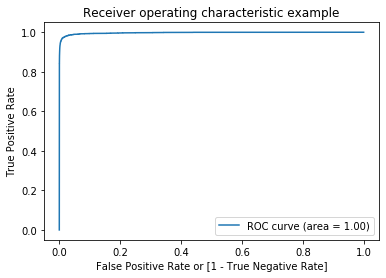


 Confussion Matrix:
 [[552347    477]
 [   317   2578]]


In [338]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_xgb)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_xgb)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_xgb)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_xgb)))
pred_probs_test = model_xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_xgb))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb))

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 1, our model seems to be doing excellent on the test dataset.

In [339]:
confusion_xgb = confusion_matrix( y_test, y_test_pred_xgb)

TN = confusion_xgb[0,0] # true negatives 
TP = confusion_xgb[1,1] # true positives
FP = confusion_xgb[0,1] # false positives
FN = confusion_xgb[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  89.1%
Specificity:  99.9%
False postive rate: 0.1%
Positive predictive value: 84.4%
Negative predictive value: 99.9%


### Conclusion:- From XGBOOST (Default Hyperparameters)

## For SMOTE data    

###   Classification Report for Test data
                     
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.85      0.90      0.87      2895
           
#### Accuracy:  99.9%
#### F1 score:  87.4%
#### Recall:  89.6%
#### Precision:  85.2%
#### ROC for the test dataset: 99.8%


## For ADASYN data    

###   Classification Report for Test data

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.84      0.89      0.87      2895
           
#### Accuracy:  99.9%
#### F1 score:  86.7%
#### Recall:  89.1%
#### Precision:  84.4%
#### ROC for the test dataset: 99.7%

###   Classification Report for Target (1) from XGBOOST (Default Hyperparameters) on Test data
                     
         precision(%)  |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative 
    Positive predictive|(sensitivity)|            |            |          |              |  rate (%)    | predictive 
           value(%)    |             |            |            |          |              |              | value(%)
    -------------------|-------------|------------|------------|----------|--------------|--------------|-------------
    SMOTE data   85.2  |    89.6     |   87.4     |   99.9     |    99.8  |    99.8      |      0.1     |     99.9
    -------------------|-------------|------------|------------|----------|--------------|--------------|-------------
    ADASYN data  84.4  |    89.1     |   86.7     |   99.9     |    99.7  |    99.7      |      0.1     |     99.9

####  Hyper-parameter tuning of XGBOOST for SMOTE data

##### Since we are getting high recall, F1 score and Roc for SMOTE test dataset, so we will do the hyparameter tuning on SMOTE data

Let's now try tuning the hyperparameters using k-fold CV. We'll then use grid search CV to find the optimal values of hyperparameters.

In [340]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
             'max_depth':[10, 20],
             'n_estimators':[50, 100]}          


# specify model
xgb_model = XGBClassifier(objective='binary:logistic', random_state=100)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



In [341]:
# fit the model
model_cv.fit(X_resampled_smt, y_resampled_smt)   

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[07:24:03] WARNING: /usr/lib/python3/dist-packages/xgboost//src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:27:57] WARNING: /usr/lib/python3/dist-packages/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:32:04] WARNING: /usr/lib/python3/dist-packages/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:35:57] WARNING: /usr/lib/python3/dist-packages/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metri

[10:30:41] WARNING: /usr/lib/python3/dist-packages/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:45:23] WARNING: /usr/lib/python3/dist-packages/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:59:55] WARNING: /usr/lib/python3/dist-packages/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:58] WARNING: /usr/lib/python3/dist-packages/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric

[14:34:45] WARNING: /usr/lib/python3/dist-packages/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:14] WARNING: /usr/lib/python3/dist-packages/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:02] WARNING: /usr/lib/python3/dist-packages/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:54:49] WARNING: /usr/lib/python3/dist-packages/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 607.0min finished


[17:31:17] WARNING: /usr/lib/python3/dist-packages/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=100,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [343]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      233.792496      6.348060         1.427080        0.079761   
1      257.481368      5.894900         1.415427        0.082911   
2      255.273022      5.237045         1.300691        0.061173   
3      461.991693     10.569936         1.837336        0.229295   
4      509.898763      7.233002         1.646966        0.037217   
5      501.296357      8.011253         1.832442        0.032099   
6      462.692234     12.582148         1.564984        0.057652   
7      487.715391      5.203647         1.597270        0.045693   
8      516.420631      6.254008         1.780984        0.085548   
9      859.228451     14.630841         2.122034        0.080999   
10     904.211931     26.827272         2.117081        0.050085   
11     934.705398     26.570313         2.323596        0.068848   
12     233.543677      8.888699         1.275896        0.034632   
13     251.458410      5.810659         1.352449        0.049373   
14     245.934815      4.702295         1.498462        0.103169   
15     444.516451      8.385892         1.692159        0.056546   
16     488.865226      8.677550         1.765518        0.127039   
17     470.077338     10.191596         1.677990        0.026676   
18     397.091129     12.167235         1.524428        0.099473   
19     421.024316     13.861988         1.590929        0.054081   
20     439.536484     31.258591         1.745595        0.295410   
21     739.399213     54.789438         2.090545        0.151687   
22     754.419393     54.668704         2.446047        0.269531   
23     741.528451     35.137094         2.108962        0.126014   

   param_learning_rate param_max_depth param_n_estimators param_subsample  \
0                  0.2              10                 50             0.3   
1                  0.2              10                 50             0.6   
2                  0.2              10                 50             0.9   
3                  0.2              10                100             0.3   
4                  0.2              10                100             0.6   
5                  0.2              10                100             0.9   
6                  0.2              20                 50             0.3   
7                  0.2              20                 50             0.6   
8                  0.2              20                 50             0.9   
9                  0.2              20                100             0.3   
10                 0.2              20                100             0.6   
11                 0.2              20                100             0.9   
12                 0.6              10                 50             0.3   
13                 0.6              10                 50             0.6   
14                 0.6              10                 50             0.9   
15                 0.6              10                100             0.3   
16                 0.6              10                100             0.6   
17                 0.6              10                100             0.9   
18                 0.6              20                 50             0.3   
19                 0.6              20                 50             0.6   
20                 0.6              20                 50             0.9   
21                 0.6              20                100             0.3   
22                 0.6              20                100             0.6   
23                 0.6              20                100             0.9   

                                               params  split0_test_score  \
0   {'learning_rate': 0.2, 'max_depth': 10, 'n_est...           0.998456   
1   {'learning_rate': 0.2, 'max_depth': 10, 'n_est...           0.998521   
2   {'learning_rate': 0.2, 'max_depth': 10, 'n_est...           0.998391   
3   {'learning_rate': 0.2, 'max_depth': 10, 'n_est...           0.998363 

In [344]:
model_cv.best_score_

0.9996139292467202

XGBoost has resulted in the highest rank_test_score obtained (across various hyperparameters) from a subsample size of 0.6, max depth of 20, n_estimators of 50 and learning_rate of about 0.2. 

Let's build a final model with the chosen hyperparameters.

In [345]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 20, 
          'n_estimators':50,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgboost_best = XGBClassifier(params = params)
xgboost_best.fit(X_resampled_smt, y_resampled_smt)

[18:20:59] WARNING: /usr/lib/python3/dist-packages/xgboost/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:21:06] WARNING: /usr/lib/python3/dist-packages/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 50,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [346]:
y_train_pred_xgb_hp = xgboost_best.predict(X_resampled_smt)
y_test_pred_xgb_hp = xgboost_best.predict(X_test)

In [347]:
print(classification_report(y_resampled_smt, y_train_pred_xgb_hp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



## Making predictions on the test set

Accuracy:  99.9%
F1 score:  87.4%
Recall:  89.6%
Precision:  85.2%
ROC for the test dataset: 99.8%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.85      0.90      0.87      2895

    accuracy                           1.00    555719
   macro avg       0.93      0.95      0.94    555719
weighted avg       1.00      1.00      1.00    555719



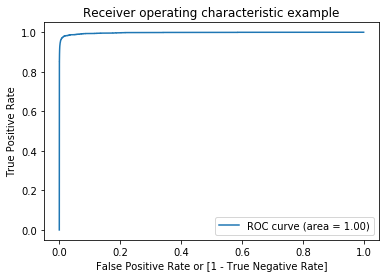


 Confussion Matrix:
 [[552373    451]
 [   300   2595]]


In [348]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_xgb_hp)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_xgb_hp)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_xgb_hp)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_xgb_hp)))
pred_probs_test = xgboost_best.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_xgb_hp))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb_hp))

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 1, our model seems to be doing excellent on the test dataset.

In [350]:
confusion_xgb_hp = confusion_matrix( y_test, y_test_pred_xgb_hp)

TN = confusion_xgb_hp[0,0] # true positive 
TP = confusion_xgb_hp[1,1] # true negatives
FP = confusion_xgb_hp[0,1] # false positives
FN = confusion_xgb_hp[1,0] # false negatives


# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  89.6%
Specificity:  99.9%
False postive rate: 0.1%
Positive predictive value: 85.2%
Negative predictive value: 99.9%


Finally, let's also look at the feature importances.

In [351]:
xgboost_best.feature_importances_

array([0.00103722, 0.04841204, 0.00084232, 0.00198108, 0.00160764,
       0.00142225, 0.00197384, 0.00196374, 0.00134041, 0.00164755,
       0.01024197, 0.00096415, 0.00675447, 0.00047003, 0.00299379,
       0.02114916, 0.00121787, 0.19865513, 0.024674  , 0.03269474,
       0.02258752, 0.03562544, 0.03277486, 0.04282039, 0.02787061,
       0.03186064, 0.02987565, 0.02375105, 0.02721718, 0.04172197,
       0.02700479, 0.00524006, 0.04090082, 0.04695648, 0.0293919 ,
       0.05075207, 0.03201314, 0.01154007, 0.00223543, 0.00278716,
       0.00438864, 0.00700594, 0.00836739, 0.0082677 , 0.00600553,
       0.00242752, 0.00401747, 0.00462418, 0.01873259, 0.00919242],
      dtype=float32)

In [352]:
imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": xgboost_best.feature_importances_
})

In [353]:
imp_feat_xgboost= imp_df.sort_values(by="Imp", ascending=False)
imp_feat_xgboost.head(15)

Varname       Imp
17  hist_trans_avg_amt_24h  0.198655
35        weekday_Thursday  0.050752
1                      amt  0.048412
33        weekday_Saturday  0.046956
23               catg_home  0.042820
29       catg_shopping_pos  0.041722
32          weekday_Monday  0.040901
21        catg_grocery_pos  0.035625
22     catg_health_fitness  0.032775
19      catg_gas_transport  0.032695
36         weekday_Tuesday  0.032013
25           catg_misc_net  0.031861
26           catg_misc_pos  0.029876
34          weekday_Sunday  0.029392
24          catg_kids_pets  0.027871

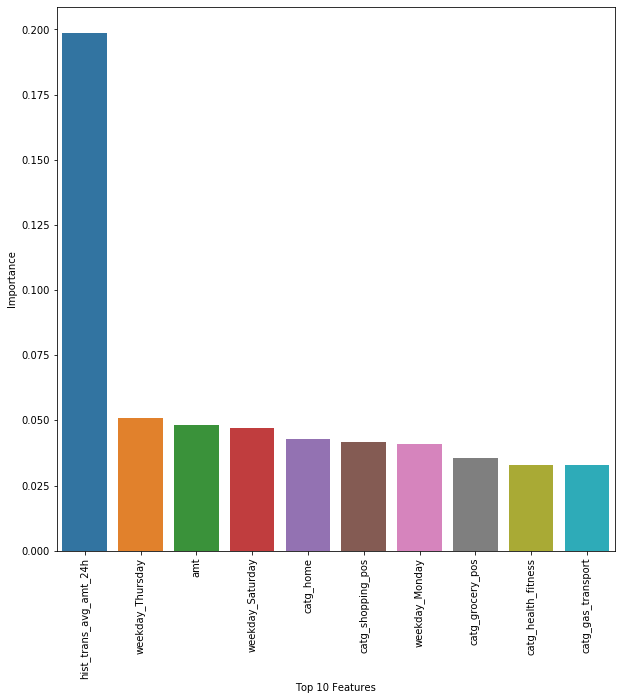

In [354]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat_xgboost[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

### For cost benefit Analysis we have to find how model have predicted train True positive and False positive, So lets calculate that

In [355]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 20, 
          'n_estimators':50,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgboost_best = XGBClassifier(params = params)
xgboost_best.fit(X_train, y_train)

[22:45:13] WARNING: /usr/lib/python3/dist-packages/xgboost/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:45:17] WARNING: /usr/lib/python3/dist-packages/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 50,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [356]:
pred_train = xgboost_best.predict(X_train)

print('\n Confussion Matrix:\n', confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))


 Confussion Matrix:
 [[1289908      11]
 [     90    6666]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      0.99      0.99      6756

    accuracy                           1.00   1296675
   macro avg       1.00      0.99      1.00   1296675
weighted avg       1.00      1.00      1.00   1296675



## Conclusion

Based on our XGBOOST for SMOTE data (Hyperparameters Tuning) model, some features are identified which will help to find a fradulent transcation.
   
1)	hist_trans_avg_amt_24h:	0.199<br>
2)	weekday_Thursday:	0.051<br>
3)	amt:	0.048<br>
4)	weekday_Saturday:	0.047<br>
5)	catg_home:	0.043<br>
6)	catg_shopping_pos:	0.042<br>
7)	weekday_Monday:	0.041<br>
8)	catg_grocery_pos:	0.036<br>
9)	catg_health_fitness:	0.033<br>
10)	catg_gas_transport:	0.033<br>

### Conclusions from XGBOOST (Hyperparameters Tuning) :- 

###   Classification Report for Test data
                                  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.85      0.90      0.87      2895

           
#### Accuracy: 99.9%
#### F1 score: 87.4%
#### Recall: 89.6%
#### Precision: 85.2%
#### ROC for the test dataset: 99.8%

###   Classification Report for Target (1) from XGBOOST (Hyperparameters Tuning) on SMOTE Test data
                     
         precision(%)  |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative 
    Positive predictive|(sensitivity)|            |            |          |              |  rate (%)    | predictive 
           value(%)    |             |            |            |          |              |              | value(%)
    -------------------|-------------|------------|------------|----------|--------------|--------------|-------------
    SMOTE data   85.2  |    89.6     |   87.4     |   99.9     |    99.8  |   99.9       |       0.1    |  99.9

### Compilation of models For Test data

###   1. Classification Report for Target (1) from Decision Tree (default Hyperparameter) on Test data
                     
         precision(%)  |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative 
    Positive predictive|(sensitivity)|            |            |          |              |  rate (%)    | predictive 
           value(%)    |             |            |            |          |              |              | value(%)
    -------------------|-------------|------------|------------|----------|--------------|--------------|------------- 
    SMOTE data =>  54.8|    84.7     |   66.5     |   99.6     |    92.2  |     99.6     |     0.4      |  99.9
    -------------------|-------------|------------|------------|----------|--------------|--------------|-------------
    ADASYN data => 56.3|    84.1     |   67.4     |   99.6     |    91.9  |     99.7     |     0.3      |   99.9
               
###   Classification Report for Target (1) from Decision Tree (Hyperparameter Tunning) on SMOTE Test data

        precision(%)  |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative 
    Positive predictive|(sensitivity)|            |            |          |              |  rate (%)    | predictive 
           value(%)    |             |            |            |          |              |              | value(%)
    -------------------|-------------|------------|------------|----------|--------------|--------------|------------- 
    SMOTE data   41.4  |    88.8     |   56.5     |   99.3     |    95.5  |   99.3       |     0.7      |  99.9
                     
### ------------------------------------------------------------------------------------------------------------------------------------------------

###   2. Classification Report for Target (1) from Random forest (Default Hyperparameters) on Test data

         precision(%)  |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative 
    Positive predictive|(sensitivity)|            |            |          |              |  rate (%)    | predictive 
           value(%)    |             |            |            |          |              |              | value(%)
    -------------------|-------------|------------|------------|----------|--------------|--------------|-------------
    SMOTE data   89.1  |    80.0     |   84.3     |   99.8     |    99.6  |   99.9       |      0.1     |    99.9
    -------------------|-------------|------------|------------|----------|--------------|--------------|-------------
    ADASYN data  90.6  |    77.6     |   83.6     |   99.8     |    99.5  |   100        |      0.0     |    99.9
              
###   Classification Report for Target (1) from Random Forest(Hyperparameter Tunning) on SMOTE Test data
                     
         precision(%)  |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative 
    Positive predictive|(sensitivity)|            |            |          |              |  rate (%)    | predictive 
           value(%)    |             |            |            |          |              |              | value(%)
    -------------------|-------------|------------|------------|----------|--------------|--------------|-------------
    SMOTE data   65.0  |    85.9     |   74.0     |   99.7     |    99.5  |   99.8       |      0.2     |  99.9
               
### --------------------------------------------------------------------------------------------------------------------------------------------------

###   3. Classification Report for Target (1) from XGBOOST (Default Hyperparameters) on Test data

         precision(%)  |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative 
    Positive predictive|(sensitivity)|            |            |          |              |  rate (%)    | predictive 
           value(%)    |             |            |            |          |              |              | value(%)
    -------------------|-------------|------------|------------|----------|--------------|--------------|-------------
    SMOTE data   85.2  |    89.6     |   87.4     |   99.9     |    99.8  |    99.8      |      0.1     |     99.9
    -------------------|-------------|------------|------------|----------|--------------|--------------|-------------
    ADASYN data  84.4  |    89.1     |   86.7     |   99.9     |    99.7  |    99.7      |      0.1     |     99.9
                   
###   Classification Report for Target (1) from XGBOOST (Hyperparameter Tunning) on SMOTE Test data 
                     
         precision(%)  |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative 
    Positive predictive|(sensitivity)|            |            |          |              |  rate (%)    | predictive 
           value(%)    |             |            |            |          |              |              | value(%)
    -------------------|-------------|------------|------------|----------|--------------|--------------|-------------
    SMOTE data   85.2  |    89.6     |   87.4     |   99.9     |    99.8  |   99.9       |       0.1    |  99.9        

### From the above Compilation of models, it is clear that XGBOOST for SMOTE data is the best model from 3 models i.e
    
 Model 1.1: Decision Tree  (Default Hyperparameters) for SMOTE and ADASYN data<br>
 Model 1.2: Decision Tree  (Hyperparameter Tuning) for SMOTE data<br>
 Model 2.1: Random Forest (Default Hyperparameters) for SMOTE and ADASYN data<br>
 Model 2.2: Random Forest (Hyperparameters Tuning) for SMOTE data<br>
 Model 3.1: XGBOOST (Default Hyperparameters) for SMOTE and ADASYN data<br>
 Model 3.2: XGBOOST (Hyperparameter Tuning) for SMOTE data<br>
    
### Model Consideration:-
    
- Based on the accuracy, ROC, precision and recall of different models, we will consider XGBOOST (Hyperparameter Tuning) for SMOTE data as our final model.
- The test accuracy is 99.9%, recall is 89.6% and ROC is 99.8% .
- The recall for fraudulent transaction is 89.6%, which is highest among all other models. <b>Since our buisness objective is more important to identify fraudulent transaction than the non-fraudulent transaction accurately. High recall means model will correctly identify almost all fraudulent transaction.</b>
- Hence XGBOOST (Hyperparameter Tuning) model for SMOTE data is chosen based on its performance on `Recall metric`. 

### 8.4. Final Conclusion on basis of Best Model

### Final Conclusion on basis of Best Model (XGBOOST (Hyperparameter Tuning) for SMOTE data)

In [357]:
# lets find the most important predictor variables on basis of their coefficient to predict fradulent transcation.

imp_feat_xgboost.head(15)

Varname       Imp
17  hist_trans_avg_amt_24h  0.198655
35        weekday_Thursday  0.050752
1                      amt  0.048412
33        weekday_Saturday  0.046956
23               catg_home  0.042820
29       catg_shopping_pos  0.041722
32          weekday_Monday  0.040901
21        catg_grocery_pos  0.035625
22     catg_health_fitness  0.032775
19      catg_gas_transport  0.032695
36         weekday_Tuesday  0.032013
25           catg_misc_net  0.031861
26           catg_misc_pos  0.029876
34          weekday_Sunday  0.029392
24          catg_kids_pets  0.027871

<b> Inference:  We could see the Top 15 features which contribute most towards to identify which will help to find a fradulent transcation.</b>   
</div>

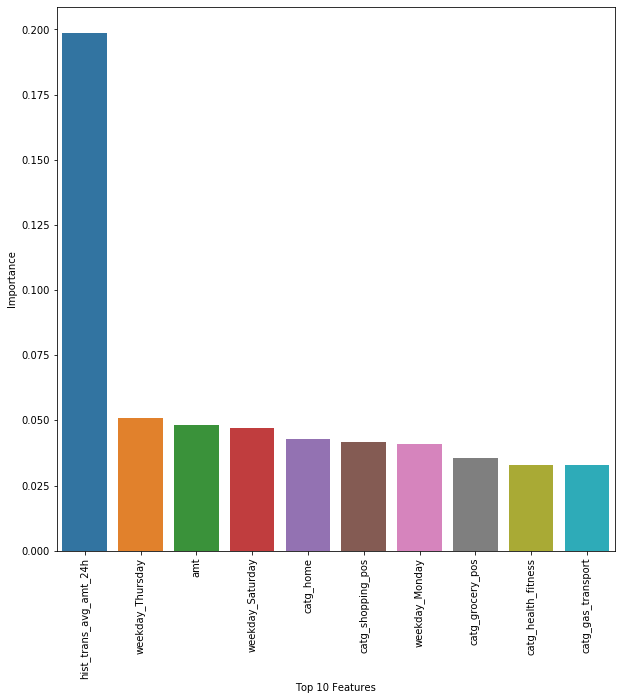

In [358]:
# Plot to show the most important predictor variables with their coefficient to predict fradulent transcation.

plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat_xgboost[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

    
Based on our XGBOOST for SMOTE data (Hyperparameters Tuning) model, some features are identified which will help to find a fradulent transcation.

The fraudulent transaction probability of a customer increases with increase in values of the following features in descending order:<br>

#### Features with Positive Coefficient:<br>
      
1)	hist_trans_avg_amt_24h:	0.199<br>
2)	weekday_Thursday:	0.051<br>
3)	amt:	0.048<br>
4)	weekday_Saturday:	0.047<br>
5)	catg_home:	0.043<br>
6)	catg_shopping_pos:	0.042<br>
7)	weekday_Monday:	0.041<br>
8)	catg_grocery_pos:	0.036<br>
9)	catg_health_fitness:	0.033<br>
10)	catg_gas_transport:	0.033<br>

<a id="Part2"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
           8.5. Cost Benefit Analysis(Part 2)
            </span>   
        </font>    
</h2>

#### For test Data

In [359]:
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb_hp))


 Confussion Matrix:
 [[552373    451]
 [   300   2595]]


In [360]:
confusion_xgb_hp = confusion_matrix( y_test, y_test_pred_xgb_hp)

TN = confusion_xgb_hp[0,0] # true negatives 
TP = confusion_xgb_hp[1,1] # true positives
FP = confusion_xgb_hp[0,1] # false positives
FN = confusion_xgb_hp[1,0] # false negatives

print('True_Negatives:', TN)
print('True_Positives:', TP)
print('False_Positives:', FP)
print('False_Negatives:', FN)

True_Negatives: 552373
True_Positives: 2595
False_Positives: 451
False_Negatives: 300


#### For train Data

In [361]:
train_confusion_xgb_hp= confusion_matrix(y_train, pred_train)

TN = train_confusion_xgb_hp[0,0] # true negatives 
TP = train_confusion_xgb_hp[1,1] # true positives
FP = train_confusion_xgb_hp[0,1] # false positives
FN = train_confusion_xgb_hp[1,0] # false negatives

print('True_Negatives for train data:', TN)
print('True_Positives for train data:', TP)
print('False_Positives for train data:', FP)
print('False_Negatives for train data:', FN)

True_Negatives for train data: 1289908
True_Positives for train data: 6666
False_Positives for train data: 11
False_Negatives for train data: 90


In [362]:
# Average number of transactions per month detected as fraudulent by the model (TF)= TP+FP/24

(2595+451+6666+11)/24

405.125

In [363]:
# Total cost of providing customer support per month for fraudulent transactions detected by the model(TF*$1.5)

405.125*1.5

607.6875

In [364]:
# Average number of transactions per month that are fraudulent but not detected by the model (FN)

(90+300)/24

16.25

In [365]:
# Cost incurred due to fraudulent transactions left undetected by the model (FN*c). c=530.661412288881

16.25*530.661412288881

8623.247949694316

In [366]:
# Cost incurred per month after the model is built and deployed (4+6) 

607.6875+8623.247949694316

9230.935449694316

In [367]:
# Cost incurred per month before the model was deployed (b*c)

402.125*530.661412288881

213392.22041666627

In [368]:
# Final savings = Cost incurred before - Cost incurred after(1-7)	204161.28
213392.22041666627-9230.935449694316

204161.28496697196

In [369]:
# Average number of transactions per month detected as fraudulent by the model (TF)
print("1)Average number of transactions per month detected as fraudulent by the model (TF)---------------------------:",(2595+451+6666+11)/24)
print("-------------------------------------------------------------------------------------------------------------------------------")
# Total cost of providing customer support per month for fraudulent transactions detected by the model(TF*$1.5)
print("2)Total cost of providing customer support per month for fraudulent transactions detected by the model(TF*$1.5):",405.125*1.5)
print("-------------------------------------------------------------------------------------------------------------------------------")
# Average number of transactions per month that are fraudulent but not detected by the model (FN)
print("3)Average number of transactions per month that are fraudulent but not detected by the model (FN)-------------:",(90+300)/24)
print("-------------------------------------------------------------------------------------------------------------------------------")
# Cost incurred due to fraudulent transactions left undetected by the model (FN*c). c=530.661412288881
print("4)Cost incurred due to fraudulent transactions left undetected by the model (FN*c)----------------------------:",16.25*530.661412288881)
print("-------------------------------------------------------------------------------------------------------------------------------")
# Cost incurred per month after the model is built and deployed (2+4) 2= 607.6875, 4= 8623.247949694316
print("5)Cost incurred per month after the model is built and deployed (2+4) ----------------------------------------:",607.6875+8623.247949694316)
print("-------------------------------------------------------------------------------------------------------------------------------")
# Final savings = Cost incurred before - Cost incurred after(1-7) 1= 213392.2204, 7=9230.935449694316
print("6)Final savings = Cost incurred before - Cost incurred after(1-5)---------------------------------------------:",213392.2204-9230.935449694316)

1)Average number of transactions per month detected as fraudulent by the model (TF)---------------------------: 405.125
-------------------------------------------------------------------------------------------------------------------------------
2)Total cost of providing customer support per month for fraudulent transactions detected by the model(TF*$1.5): 607.6875
-------------------------------------------------------------------------------------------------------------------------------
3)Average number of transactions per month that are fraudulent but not detected by the model (FN)-------------: 16.25
-------------------------------------------------------------------------------------------------------------------------------
4)Cost incurred due to fraudulent transactions left undetected by the model (FN*c)----------------------------: 8623.247949694316
------------------------------------------------------------------------------------------------------------------------------


    
### Cost Benefit Analysis(Part 2)
                          Questions                                                                                     Answer
    1. Cost incurred per month before the model was deployed (b*c)-------------------------------------------------------: 213392.2204
    2. Average number of transactions per month detected as fraudulent by the model (TF)---------------------------------: 405.125
    3. Cost of providing customer executive support per fraudulent transaction detected by the model---------------------: 1.5
    4. Total cost of providing customer support per month for fraudulent transactions detected by the model(TF*$1.5)-----: 607.69  
    5. Average number of transactions per month that are fraudulent but not detected by the model (FN)-------------------: 16.25
    6. Cost incurred due to fraudulent transactions left undetected by the model (FN*c)----------------------------------: 8623.24795
    7. Cost incurred per month after the model is built and deployed (4+6)-----------------------------------------------: 9230.94
    8. Final savings = Cost incurred before - Cost incurred after(1-7)---------------------------------------------------: 204161.2804


## <b>Conclusion: </b><br>
         Approx 405 average number of fraud transactions are identified through using XGBoost model. Banks can send messages to such customers and can verify the transactions done by the credit card holders or its a fraud transaction. With the help of this bank would be able to find or trace the fraud transactions which can save them by occuring the financial loss of repaying the same.  


<b>Inference: </b><br>
          This analysis helps us to compare the costs incurred before the model is deployed was 213392 . So bank had to pay the entire transaction amount to the customer for every fraudulent transaction which accounted for a heavy loss to the bank <br>
        After the model is deployed Bank's final savings were amounted to dollar '$204161'.<br>

# Business Insights


1. Fraud Transactions are done in both gender male and female card holders, whereas the count of fraud transaction are slightly on higher side regards to female card holders. But maximum amount spend for fraudulent transactions are more against Male Credit card holders.

2. The maximum amount spend for fruad transactions belongs to credit card holders "0-20", "60-70" and "70-80" age bin. The increased count of fraud transactions are noticed in the age group of 50-60.

3. The maximum amount spend for fraud transactions were people with the job of credit card holders of Researcher & Assistant.

4. Fraud Transactions are noticed  more on Saturday ,Sunday, Monday & Thursday whereas the  normal transaction observed are lesser  on Saturday & Thursday and more on  Sunday and Monday. Also as we see the spending pattern for fraud transactions are same throughout  Week.

5. Fraud transactions are majorly done during odd hours of the day i.e. between 22 - 3 Hr. But the maximum amount spend for doing  fraudulent  transactions are majorly between 12 to 23 Hr. Major fraudulent  transactions happened at lower amount.


6. Fraud transactions are done more at grocery_pos, shopping_net, misc_net, shopping_pos, gas_transport Categories.But the maximum fraud transaction amount spend were more  on shopping_net, shopping_pos, misc_net category and entertainment.

7. Frauds transactions were observed more in NY, TX and PA States. The maximum amount spend for fraud transactions were at RI, HI, DE and VT State.



## Business Strategies Recommended to Bank:


### BUSINESS STRATEGIES RECOMMENDED TO BANK FOR ADOPTING OPTIMAL WAYS TO MITIGATE FRAUD RISKS BY DETECTING THE FRAUDULENT TRANSACTION BASED ON OUR MODEL  OBSERVATIONS.

1. The fraudulent transaction probability of a transaction increases with increase in `hist_trans_avg_amt_24h` values. Based upon past spending pattern we have derived`hist_trans_avg_amt_24h` which is actually average amount spent through transactions in last 24 hours by the credit card holder's. So if comparable amount spent in last 24hrs v/s past spent data gets increased then its ideal for Bank to sent an SMS ALERT! to customer confirming about the transactions.
    
2. The fraudulent transaction probability of a transaction increases with increase in `weekday_Thursday`, `weekday_Saturday` and `weekday_Monday` values. As per the pattern model shows that major fraud transactions are noticed in `weekday_Thursday`, `weekday_Saturday` and `weekday_Monday`. So banks need to be extra cautious and high alert on this specific days to avoid fradulent transactions

3. The fraudulent transaction probability of a transaction increases with increase in `amt` values. At any point in time if bank notices the nature of amount spent is higher then regular spending pattern in such cases bank should noticed the same at early stage by sending neccessary alerts to customers.
   
4. The fraudulent transaction probability of a transaction increases with increase in `catg_home`, `catg_shopping_pos`, `catg_grocery_pos`, `catg_health_fitness`, `catg_gas_transport` values. Model predicted that major fraud transactions are occurred in the catg_home, catg_shopping_pos, catg_grocery_pos, catg_health_fitness`, `catg_gas_transports as these are the platform where any customer would spend large transactional amount so as fraudsters also follows the same trend. In such case its always recommended to bank to keep an eye on the track record of spend amount through FLASH SMS ALERT mentioning the detailed transaction history to respective credit card holders.    
      
5. The fraud transactions are majorly done during odd hours of the day i.e. between 22 - 3 Hr, So banks needs to ensure to send an SMS ALERT during such odd hours.